<a id='toc'></a>
# Аналитика данных облачного сервиса для автоматизации управления строительством и ремонтом

### Проект выполнила Марина Орленко 
Telegram: @lma82

**Цель исследования**

Необходимо:
- провести предобработку имеющихся данных;
- исследовательский анализ данных;
- проверку гипотез;
- составить портрет наиболее типичных клиентов;
- разобраться в причинах оттока клиентов;
- предложить решения по его минимизации.

**Описание данных**

Мы будем работать с данными из следующих файлов:
- activities.csv,
где:
      
| Название колонки              | Описание                                                                    |
|:----------------------------- |:--------------------------------------------------------------------------- |
| company_id                    | идентификатор компании                                                      |   
| month                         | отчетный месяц                                                              |
| company-month-billing         | количество счетов, выставляемых в приложении компанией за месяц             |
| company-month-stocks          | месячное количество складов (аренда, заказы и т.д.), используемых компанией |
| company-month-backups         | месячное количество бэкапов компании                                        |
| company-month-projects        | месячное количество проектов компании                                       |
| company-month-contractors     | месячное количество контрагентов компании                                   |
| company-month-resource_orders | месячное количество заказов материалов компании                             |     

- billing.csv,
где:
    
| Название колонки       | Описание                                            |
|:---------------------- |:--------------------------------------------------- |
| Unnamed:0              | старый индекс                                       |   
| id                     | уникальный идентификатор платежа                    |             
| user_id                | идентификатор пользователя                          |
| company_id             | идентификатор компании пользователя                 |
| billing_tariff_id      | тарифный план:                                      |
|                        | - тарифы 1, 18, 22 - тестовые, бесплатные и пробные |
|                        | - тарифы 4, 7, 8, 11, 19 - группа "старт"           |
|                        | - тарифы 2, 17 - группа "базовый"                   |
|                        | - тарифы 9, 20 - группа "бизнес"                    |
|                        | - тарифы 3, 10, 13, 21 - группа "профи"             |
|                        | - тариф 6 - "архивный", более не продается          |
| payed_until            | дата, до которой действует подписка компании        |
| is_payed               | статус оплаты                                       |     
| created_at             | дата создания                                       |     
| updated_at             | дата обновления                                     |
| billing_tariff_price_id| уникальный идентификатор стоимости тарифа           |
| comment                | комментарии                                         |
| pay_date               | дата платежа                                        |
  
- companies.csv,
где:

| Название колонки        | Описание                                         |
|:----------------------- |:------------------------------------------------ |
| id                      | уникальный идентификатор компании                |             
| working_direction       | сфера деятельности                               |
| employer_count_interval | уникальный идентификатор количества сотрудников: |
|                         | - 1: 1-4 сотрудника                              |
|                         | - 2: 5-10 сотрудников                            |
|                         | - 3: 11-20 сотрудников                           |
|                         | - 4: 21-30 сотрудников                           |
|                         | - 5: 31-50 сотрудников                           |
|                         | - 6: 51-100 сотрудников                          |
|                         | - 7: 101-200 сотрудников                         |
|                         | - 8: >201 сотрудника                             |
| created_at              | дата создания компании в системе                 |
| updated_at              | дата обновления информации о компании            |     
| billing_tariff_id       | уникальный идентификатор тарифа                  |     
| billing_is_over         | истекла ли оплата                                |
  
- people.csv,
где:

| Название колонки | Описание                                  |
|:---------------- |:----------------------------------------- |
| id               | индекс                                    |             
| company_id       | уникальный идентификатор компании         |
| user_id          | уникальный идентификатор пользователя     |
| role_id          | уникальный идентификатор роли (должности) |
| created_at       | дата создания пользователя                |     
| updated_at       | дата обновления информации о пользователе |     
| is_ deleted      |  удален ли пользовател                    |
| deleted_at       | дата удаления                             |

Заказчик – облачный сервис для автоматизации управления строительством и ремонтом. Компания продает софт с платной подпиской в сегменте B2B (наиболее частый срок подписки 12-24 месяца), предназначенный для управления процессами в сфере строительства и ремонта.

О качестве данных ничего не известно. Поэтому перед исследованием данных понадобится их обзор.

**Ход исследования**

Изучим общую информацию о датасетах. Что можно сказать о каждом столбце? Значения какого типа они хранят?

Проверим данные на ошибки, и оценим их влияние на исследование, затем, на этапе предобработки, изучим возможность исправить самые критичные ошибки в данных.

Далее проведем необходимые вычисления, на основании которых проанализируем данные и, таким образом, исследование пройдёт в 6 этапов:

- [Загрузка и базовый анализ данных.](#1)
- [Предобработка данных:](#2)
  - [Датасет activities;](#3)
  - [Датасет billing;](#4)
  - [Датасет companies;](#5)
  - [Датасет people.](#6)
- [Исследовательский анализ данных:](#7)
  - [Подготовка целевой переменной;](#8)
  - [Объединение датасетов;](#9)
  - [Анализ числовых признаков;](#10)
  - [Анализ категориальных признаков;](#11)
  - [Корреляция c целевой переменной.](#12)
- [Проверка гипотез и анализ признаков оттока:](#13)
  - [Портрет массовой компании-клиента;](#14)
  - [Формирование гипотез:](#15)
    - [Первая гипотеза;](#16)
    - [Вторая гипотеза;](#17)
    - [Динамика ухода с разных тарифов по годам;](#18)
    - [Третья гипотеза.](#19)
  - [Исследование активностей:](#20)
    - [Анализ суммарной активности компаний за весь период;](#21)
    - [Анализ активности компаний помесячно;](#22)
    - [Анализ связи активности компаний с целевой переменной;](#23)
    - [Четвертая гипотеза.](#24)
- [Дополнительное исследование.](#25)
- [Общий вывод.](#26)
- Презентация: https://docs.google.com/presentation/d/1VIvGydcfW6CMA6gzwGd8KzMFPdEslrfh/edit?usp=sharing&ouid=100598750445050576183&rtpof=true&sd=true
- Материалы, использованные в работе:
  - сайт компании;
  - сервис по поиску архивных данных Waybackmachine.

<a id="1"></a>
## Загрузка и обзор данных

In [1]:
#!pip install phik

In [2]:
# Импорт библиотек
import pandas as pd
import numpy as np
import math
import re
import os
from urllib.parse import urlencode
import requests
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta
from tabulate import tabulate
import phik
from phik.report import plot_correlation_matrix
from PIL import Image
from io import BytesIO
from IPython.display import display
from IPython.core.display import HTML
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import warnings; warnings.filterwarnings(action = 'ignore')

In [3]:
# Выравниваем расположение таблиц в ячейках markdown по левому краю
table_css = 'table {align:left;display:block} '
HTML('<style>{}</style>'.format(table_css))

In [4]:
# Устанавливаем длину вывода текста
pd.options.display.max_colwidth = 300

In [5]:
# Устанавливаем ширину столбца
pd.set_option('display.max_colwidth', 100)

In [6]:
# Перенос заголовков
pd.set_option('expand_frame_repr', False)

In [7]:
# Чтение файлов

# Создаем путь к каталогу datasets
datasets_path = os.path.join('/Users/marina/CSV_files/', 'datasets')

# Проверяем существование каталога datasets и переходим в него
if os.path.exists(datasets_path):
    os.chdir(datasets_path)
else:
    print(f'Каталог "{datasets_path}" не существует')

# Проверяем существование каждого файла и читаем его, если он существует
if os.path.exists('activities.csv'):
    activities = pd.read_csv('activities.csv', index_col=0).reset_index(drop=True)
else:
    print(f'Файл "activities.csv" не существует')

if os.path.exists('billing.csv'):
    billing = pd.read_csv('billing.csv', index_col=0).reset_index(drop=True)
else:
    print(f'Файл "billing.csv" не существует')

if os.path.exists('companies.csv'):
    companies = pd.read_csv('companies.csv', index_col=0).reset_index(drop=True)
else:
    print(f'Файл "companies.csv" не существует')

if os.path.exists('people.csv'):
    people = pd.read_csv('people.csv', index_col=0).reset_index(drop=True)
else:
    print(f'Файл "people.csv" не существует')

In [8]:
# Выводим основную информацию по датасету activities
display(activities.head())
print()
display(activities.info())
print()
display(activities.describe(include='all'))
print()
print('Минимальная дата:', activities['month'].min(), '\n')
print('Максимальная дата:', activities['month'].max(), '\n')

# Выводим количество пропущенных значений для датасета и отсортируем их по возрастанию
print('Количество пропущенных значений:')
display(activities.isna().sum().sort_values())

company_id                      month  company-month-billing  company-month-stocks  company-month-backups  company-month-projects  company-month-contractors  company-month-resource_orders
0           1  2019-09-01 00:00:00+00:00                    1.0                   0.0                    0.0                     7.0                        0.0                            0.0
1           1  2019-12-01 00:00:00+00:00                    1.0                   0.0                    0.0                     2.0                        1.0                            0.0
2           1  2020-04-01 00:00:00+00:00                    4.0                   1.0                    0.0                     1.0                        6.0                            0.0
3           1  2020-07-01 00:00:00+00:00                    1.0                   7.0                    3.0                     5.0                        0.0                            0.0
4          21  2020-01-01 00:00:00+00:00                    3.0                   0.0                    0.0                     1.0                        0.0                            0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   company_id                     6316 non-null   int64  
 1   month                          6316 non-null   object 
 2   company-month-billing          6316 non-null   float64
 3   company-month-stocks           6316 non-null   float64
 4   company-month-backups          6316 non-null   float64
 5   company-month-projects         6316 non-null   float64
 6   company-month-contractors      6316 non-null   float64
 7   company-month-resource_orders  6316 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 394.9+ KB


None

company_id                      month  company-month-billing  company-month-stocks  company-month-backups  company-month-projects  company-month-contractors  company-month-resource_orders
count   6316.000000                       6316            6316.000000           6316.000000            6316.000000             6316.000000                6316.000000                    6316.000000
unique          NaN                         63                    NaN                   NaN                    NaN                     NaN                        NaN                            NaN
top             NaN  2023-10-01 00:00:00+00:00                    NaN                   NaN                    NaN                     NaN                        NaN                            NaN
freq            NaN                        200                    NaN                   NaN                    NaN                     NaN                        NaN                            NaN
mean    4280.338505                        NaN               0.375079              7.408486               1.178277                7.262666                   7.906428                      10.346105
std     2413.005439                        NaN               0.800281             13.107824               3.135253               13.899203                  27.966199                      40.569956
min        1.000000                        NaN               0.000000              0.000000               0.000000                0.000000                   0.000000                       0.000000
25%     2459.000000                        NaN               0.000000              1.000000               0.000000                1.000000                   0.000000                       0.000000
50%     4112.000000                        NaN               0.000000              3.000000               0.000000                2.000000                   2.000000                       0.000000
75%     6080.000000                        NaN               1.000000              8.000000               0.000000                7.000000                   7.000000                       4.000000
max     9931.000000                        NaN              16.000000            166.000000              22.000000              221.000000                1014.000000                    1182.000000


Минимальная дата: 2019-01-01 00:00:00+00:00 

Максимальная дата: 2024-03-01 00:00:00+00:00 

Количество пропущенных значений:


company_id                       0
month                            0
company-month-billing            0
company-month-stocks             0
company-month-backups            0
company-month-projects           0
company-month-contractors        0
company-month-resource_orders    0
dtype: int64

В датасете activities 8 столбцов, 6316 строк.

Согласно документации к данным:
- company_id - идентификатор компании;
- month - отчетный месяц;
- company-month-billing - количество счетов, выставляемых в приложении компанией за месяц;
- company-month-stocks - месячное количество складов (аренда, заказы и т.д.), используемых компанией;
- company-month-backups - месячное количество бэкапов компании;
- company-month-projects - месячное количество проектов компании;
- company-month-contractors - месячное количество контрагентов компании;
- company-month-resource_orders - месячное количество заказов материалов компании.

Необходимо поменять тип данных в столбце month на datetime, во всех остальных столбцах, кроме company_id на integer. В названиях столбцов исправим тире на нижнее подчеркивание.

По статистическим данным пока сложно что-то сказать, много минимальных значений в разных столбцах, равных 0, возможно, так проявляется разность в тарифных планах, не всем доступны какие-то опции. Стандартное отклонение сильно отличается от среднего, что свидетельствует от наличии выбросов.

Минимальная дата в датасете: 01-01-2019.

Максимальная дата в датасете: 01-03-2024.

Пропущенных значений нет.

In [9]:
# Выводим основную информацию по датасету billing
display(billing.head())
print()
display(billing.info())
print()
display(billing.describe(include='all'))
print()
print('Самый часто встречающийся тариф:', billing['billing_tariff_id'].mode(), '\n')

# Выводим количество пропущенных значений для датасета и отсортируем их по возрастанию
print('Количество пропущенных значений:')
display(billing.isna().sum().sort_values())

Unnamed: 0    id  user_id  company_id  billing_tariff_id  payed_until  is_payed  created_at  updated_at  billing_tariff_price_id comment      pay_date
0           4  3050      567         512                  3   1640153302     False  1608617302  1608617302                     12.0     NaN           NaN
1           6  3051     2861        2474                  7   1640131200      True  1608626162  1608626181                     23.0     NaN  1.608626e+09
2          16  3059     1902        1645                  2   1616577484     False  1608801484  1608801484                      6.0     NaN           NaN
3          18  3065     2352        2035                  7   1643500799     False  1608883175  1608883175                     23.0     NaN           NaN
4          24  3062     1074         926                  3   1611964800      True  1608814072  1608899674                      9.0     NaN  1.609200e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               3480 non-null   int64  
 1   id                       3480 non-null   int64  
 2   user_id                  3480 non-null   int64  
 3   company_id               3480 non-null   int64  
 4   billing_tariff_id        3480 non-null   int64  
 5   payed_until              3480 non-null   int64  
 6   is_payed                 3480 non-null   bool   
 7   created_at               3480 non-null   int64  
 8   updated_at               3480 non-null   int64  
 9   billing_tariff_price_id  3480 non-null   float64
 10  comment                  745 non-null    object 
 11  pay_date                 1108 non-null   float64
dtypes: bool(1), float64(2), int64(8), object(1)
memory usage: 302.6+ KB


None

Unnamed: 0            id       user_id    company_id  billing_tariff_id   payed_until is_payed    created_at    updated_at  billing_tariff_price_id comment      pay_date
count    3480.000000   3480.000000   3480.000000   3480.000000        3480.000000  3.480000e+03     3480  3.480000e+03  3.480000e+03              3480.000000     745  1.108000e+03
unique           NaN           NaN           NaN           NaN                NaN           NaN        2           NaN           NaN                      NaN     650           NaN
top              NaN           NaN           NaN           NaN                NaN           NaN    False           NaN           NaN                      NaN    18+2           NaN
freq             NaN           NaN           NaN           NaN                NaN           NaN     2364           NaN           NaN                      NaN      35           NaN
mean     6549.516379   6864.148851   5478.769253   4285.715517           4.906897  1.677516e+09      NaN  1.642912e+09  1.644665e+09                21.017529     NaN  1.651651e+09
std      3769.009467   3380.401713   3265.944556   2388.415074           3.212232  4.389429e+07      NaN  3.259095e+07  3.313595e+07                 9.953845     NaN  2.909755e+07
min         4.000000    376.000000      1.000000      1.000000           2.000000  1.568246e+09      NaN  1.563874e+09  1.563874e+09                 1.000000     NaN  1.608123e+09
25%      3356.750000   4438.500000   2952.250000   2546.000000           2.000000  1.649203e+09      NaN  1.623417e+09  1.624480e+09                10.000000     NaN  1.625011e+09
50%      6763.500000   6814.500000   5535.500000   4396.000000           4.000000  1.685880e+09      NaN  1.642289e+09  1.643115e+09                23.000000     NaN  1.648598e+09
75%      9276.500000   9234.000000   7556.500000   5833.000000           7.000000  1.706573e+09      NaN  1.661777e+09  1.666106e+09                26.000000     NaN  1.677542e+09
max     18953.000000  18932.000000  14517.000000  10851.000000          21.000000  1.996790e+09      NaN  1.710325e+09  1.710326e+09                66.000000     NaN  1.710461e+09


Самый часто встречающийся тариф: 0    2
Name: billing_tariff_id, dtype: int64 

Количество пропущенных значений:


Unnamed: 0                    0
id                            0
user_id                       0
company_id                    0
billing_tariff_id             0
payed_until                   0
is_payed                      0
created_at                    0
updated_at                    0
billing_tariff_price_id       0
pay_date                   2372
comment                    2735
dtype: int64

В датасете billing 12 столбцов, 3480 строк.

Согласно документации к данным:
- Unnamed:0 - старый индекс;
- id - уникальный идентификатор платежа;
- user_id - идентификатор пользователя;
- company_id - идентификатор компании пользователя;
- billing_tariff_id - тарифный план;
- payed_until - дата, до которой действует подписка компании;
- is_payed - статус оплаты;
- created_at - дата создания;
- updated_at - дата обновления;
- billing_tariff_price_id - уникальный идентификатор стоимости тарифа;
- comment - комментарии;
- pay_date - дата платежа.
  
Необходимо поменять тип данных в столбцах payed_until, created_at, updated_at, pay_date на datetime, в billing_tariff_price_id - на integer. В столбце is_payed поменять bool на integer для удобства. Столбец Unnamed:0 удалим.

Самый часто встречающийся тариф: 2 - "базовый".

Добавим в процессе исследования столбец с категоризированными данными по столбцу billing_tariff_id.

Обнаружены пропуски в столбцах pay_date и comment. Изучим их природу и возможность их обработать на этапе предобработки.

In [10]:
# Выводим основную информацию по датасету companies
display(companies.head())
print()
display(companies.info())
print()
display(companies.describe(include='all'))
print()
print('Самый часто встречающийся размер компании:', companies['employer_count_interval'].mode(), '\n')

# Выводим количество пропущенных значений для датасета и отсортируем их по возрастанию
print('Количество пропущенных значений:')
display(companies.isna().sum().sort_values())

id working_direction  employer_count_interval  created_at  updated_at  billing_tariff_id  billing_is_over
0  514                 -                      1.0  1571316635  1670298314                4.0             True
1  383     Строительство                      2.0  1564142565  1676550050                7.0            False
2  495                 -                      1.0  1570535695  1598281714                2.0            False
3  724                 -                      1.0  1579514393  1670298294                4.0             True
4  471                 -                      1.0  1569328017  1670298360                7.0             True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       723 non-null    int64  
 1   working_direction        720 non-null    object 
 2   employer_count_interval  723 non-null    float64
 3   created_at               723 non-null    int64  
 4   updated_at               723 non-null    int64  
 5   billing_tariff_id        716 non-null    float64
 6   billing_is_over          723 non-null    bool   
dtypes: bool(1), float64(2), int64(3), object(1)
memory usage: 34.7+ KB


None

id working_direction  employer_count_interval    created_at    updated_at  billing_tariff_id billing_is_over
count    723.000000               720               723.000000  7.230000e+02  7.230000e+02          716.00000             723
unique          NaN               170                      NaN           NaN           NaN                NaN               2
top             NaN                 -                      NaN           NaN           NaN                NaN            True
freq            NaN               458                      NaN           NaN           NaN                NaN             481
mean    4618.417704               NaN                 1.515906  1.636150e+09  1.680752e+09            5.02095             NaN
std     2612.605345               NaN                 1.027710  3.672116e+07  1.665345e+07            3.44927             NaN
min        1.000000               NaN                 1.000000  1.548252e+09  1.594047e+09            2.00000             NaN
25%     2562.500000               NaN                 1.000000  1.609105e+09  1.670298e+09            2.00000             NaN
50%     4430.000000               NaN                 1.000000  1.634199e+09  1.671444e+09            4.00000             NaN
75%     6679.000000               NaN                 2.000000  1.662978e+09  1.695427e+09            7.00000             NaN
max     9931.000000               NaN                 8.000000  1.707311e+09  1.710327e+09           21.00000             NaN


Самый часто встречающийся размер компании: 0    1.0
Name: employer_count_interval, dtype: float64 

Количество пропущенных значений:


id                         0
employer_count_interval    0
created_at                 0
updated_at                 0
billing_is_over            0
working_direction          3
billing_tariff_id          7
dtype: int64

В датасете companies 7 столбцов, 723 строк.

Согласно документации к данным:
- id - уникальный идентификатор компании;
- working_direction - сфера деятельности;
- employer_count_interval - уникальный идентификатор количества сотрудников;   
- created_at - дата создания компании в системе;
- updated_at - дата обновления информации о компании;
- billing_tariff_id - уникальный идентификатор тарифа;
- billing_is_over - истекла ли оплата.
  
Необходимо поменять тип данных в столбцах created_at, updated_at на datetime, в employer_count_interval, billing_tariff_id - на integer. В столбце billing_is_over поменять bool на integer для удобства. Также для удобства переименуем столбец id в сompany_id.

Самый часто встречающийся размер компании: 1 - от 1 до 4 человек.

Добавим в процессе исследования столбец с категоризированными данными по столбцам working_direction и employer_count_interval.

Обнаружены пропуски в столбцах working_direction и billing_tariff_id. Изучим их природу и возможность их обработать на этапе предобработки.

In [11]:
# Выводим основную информацию по датасету people
display(people.head())
print()
display(people.info())
print()
display(people.describe(include='all'))
print()

# Выводим количество пропущенных значений для датасета и отсортируем их по возрастанию
print('Количество пропущенных значений:')
display(people.isna().sum().sort_values())

id  company_id  user_id  role_id  created_at  updated_at  is_deleted    deleted_at
0  6601         495      NaN     7133  1570535962  1570535962        True  1.594067e+09
1  7025           1      NaN        1  1594120484  1594120484        True  1.594120e+09
2  7165        1255   1734.0    18085  1595438102  1595439391        True  1.633960e+09
3  7130        1470   1703.0        1  1595234824  1595234824       False           NaN
4  7163        1492   1731.0        1  1595429211  1598540644        True  1.620195e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095 entries, 0 to 5094
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          5095 non-null   int64  
 1   company_id  5095 non-null   int64  
 2   user_id     3813 non-null   float64
 3   role_id     5095 non-null   int64  
 4   created_at  5095 non-null   int64  
 5   updated_at  5095 non-null   int64  
 6   is_deleted  5095 non-null   bool   
 7   deleted_at  2180 non-null   float64
dtypes: bool(1), float64(2), int64(5)
memory usage: 283.7 KB


None

id   company_id       user_id        role_id    created_at    updated_at is_deleted    deleted_at
count    5095.000000  5095.000000   3813.000000    5095.000000  5.095000e+03  5.095000e+03       5095  2.180000e+03
unique           NaN          NaN           NaN            NaN           NaN           NaN          2           NaN
top              NaN          NaN           NaN            NaN           NaN           NaN      False           NaN
freq             NaN          NaN           NaN            NaN           NaN           NaN       2912           NaN
mean    14164.075564  4688.915800   7035.175715   46651.671246  1.648600e+09  1.649620e+09        NaN  1.655729e+09
std      4531.502977  2469.629839   3478.281043   42650.542166  3.444633e+07  3.405877e+07        NaN  3.274471e+07
min      2038.000000     1.000000      1.000000       1.000000  1.548252e+09  1.548451e+09        NaN  1.548451e+09
25%     10285.500000  2833.000000   4154.000000       1.000000  1.623084e+09  1.623824e+09        NaN  1.631158e+09
50%     14436.000000  4610.000000   7222.000000   43711.000000  1.649580e+09  1.650356e+09        NaN  1.659507e+09
75%     18003.500000  6805.000000   9982.000000   84975.000000  1.678877e+09  1.680082e+09        NaN  1.684416e+09
max     21904.000000  9538.000000  12992.000000  135350.000000  1.702478e+09  1.702479e+09        NaN  1.702478e+09


Количество пропущенных значений:


id               0
company_id       0
role_id          0
created_at       0
updated_at       0
is_deleted       0
user_id       1282
deleted_at    2915
dtype: int64

В датасете companies 8 столбцов, 5095 строк.

Согласно документации к данным:
- id - индекс;
- company_id - уникальный идентификатор компании;
- user_id - уникальный идентификатор пользователя;
- role_id - уникальный идентификатор роли (должности);
- created_at - дата создания пользователя;
- updated_at - дата обновления информации о пользователе;
- is_ deleted - удален ли пользователь;
- deleted_at - дата удаления.
   
Необходимо поменять тип данных в столбцах created_at, updated_at, deleted_at на datetime, в user_id - на integer. В столбце is_deleted поменять bool на integer для удобства.

Обнаружены пропуски в столбцах user_id и deleted_at. Изучим их природу и возможность их обработать на этапе предобработки.

In [12]:
# Определим функцию для построения первичных гистограмм по нашим датасетам
def histograms(dataset, name, color, exclude_cols):

    # Построим гистограммы для количественных столбцов нашего датасета
    num_features = len([feature for feature in dataset.columns if feature not in exclude_cols and
                        dataset[feature].dtype not in [bool, object]])
    num_rows = (num_features + 1) // 2 # вычисление количества строк в сетке графиков
    num_cols = 2 # по два графика в строке

    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))

    # Выберем столбцы, в которых тип данных не bool и не object
    selected_features = [feature for feature in dataset.columns if feature not in exclude_cols and
                         dataset[feature].dtype not in [bool, object]]
    # Визуализируем данные по выбранным столбцам
    for i, feature in enumerate(selected_features):
        row = i // 2 # вычисление номера строки для текущего графика в сетке
        col = i % 2 # вычисление номера столбца для текущего графика в сетке
        bins_value = min(20, len(dataset[feature].unique()))  # авто расчет количества корзин
        dataset[feature].hist(bins=bins_value, ax=axes[row, col], color=color)
        axes[row, col].axvline(dataset[feature].median(), color='r', linestyle='dashed', linewidth=2,
                              label='Медиана') # линия медианы
        axes[row, col].axvline(dataset[feature].mean(), color='black', linestyle='solid', linewidth=2,
                              label='Среднее') # линия среднего
        axes[row, col].set_title(f'Распределение по столбцу "{feature}"')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel(f'Частота по "{feature}"')
        axes[row, col].legend()

        plt.suptitle(f'Анализ датасета "{name}"', y=1.02, fontsize=16)

    # Скроем пустую рамку в конце вывода
    for i in range(len(selected_features), len(axes.flatten())):
        fig.delaxes(axes.flatten()[i])

    sns.despine()
    plt.tight_layout()
    plt.show()

In [13]:
activities

company_id                      month  company-month-billing  company-month-stocks  company-month-backups  company-month-projects  company-month-contractors  company-month-resource_orders
0              1  2019-09-01 00:00:00+00:00                    1.0                   0.0                    0.0                     7.0                        0.0                            0.0
1              1  2019-12-01 00:00:00+00:00                    1.0                   0.0                    0.0                     2.0                        1.0                            0.0
2              1  2020-04-01 00:00:00+00:00                    4.0                   1.0                    0.0                     1.0                        6.0                            0.0
3              1  2020-07-01 00:00:00+00:00                    1.0                   7.0                    3.0                     5.0                        0.0                            0.0
4             21  2020-01-01 00:00:00+00:00                    3.0                   0.0                    0.0                     1.0                        0.0                            0.0
...          ...                        ...                    ...                   ...                    ...                     ...                        ...                            ...
6311        7882  2023-12-01 00:00:00+00:00                    0.0                   0.0                    0.0                     0.0                        0.0                            1.0
6312        8495  2024-02-01 00:00:00+00:00                    0.0                   0.0                    0.0                     0.0                        0.0                            1.0
6313        8513  2024-02-01 00:00:00+00:00                    0.0                   0.0                    0.0                     0.0                        0.0                            2.0
6314        8603  2023-11-01 00:00:00+00:00                    0.0                   0.0                    0.0                     0.0                        0.0                            2.0
6315        9698  2024-03-01 00:00:00+00:00                    0.0                   0.0                    0.0                     0.0                        0.0                            1.0

[6316 rows x 8 columns]

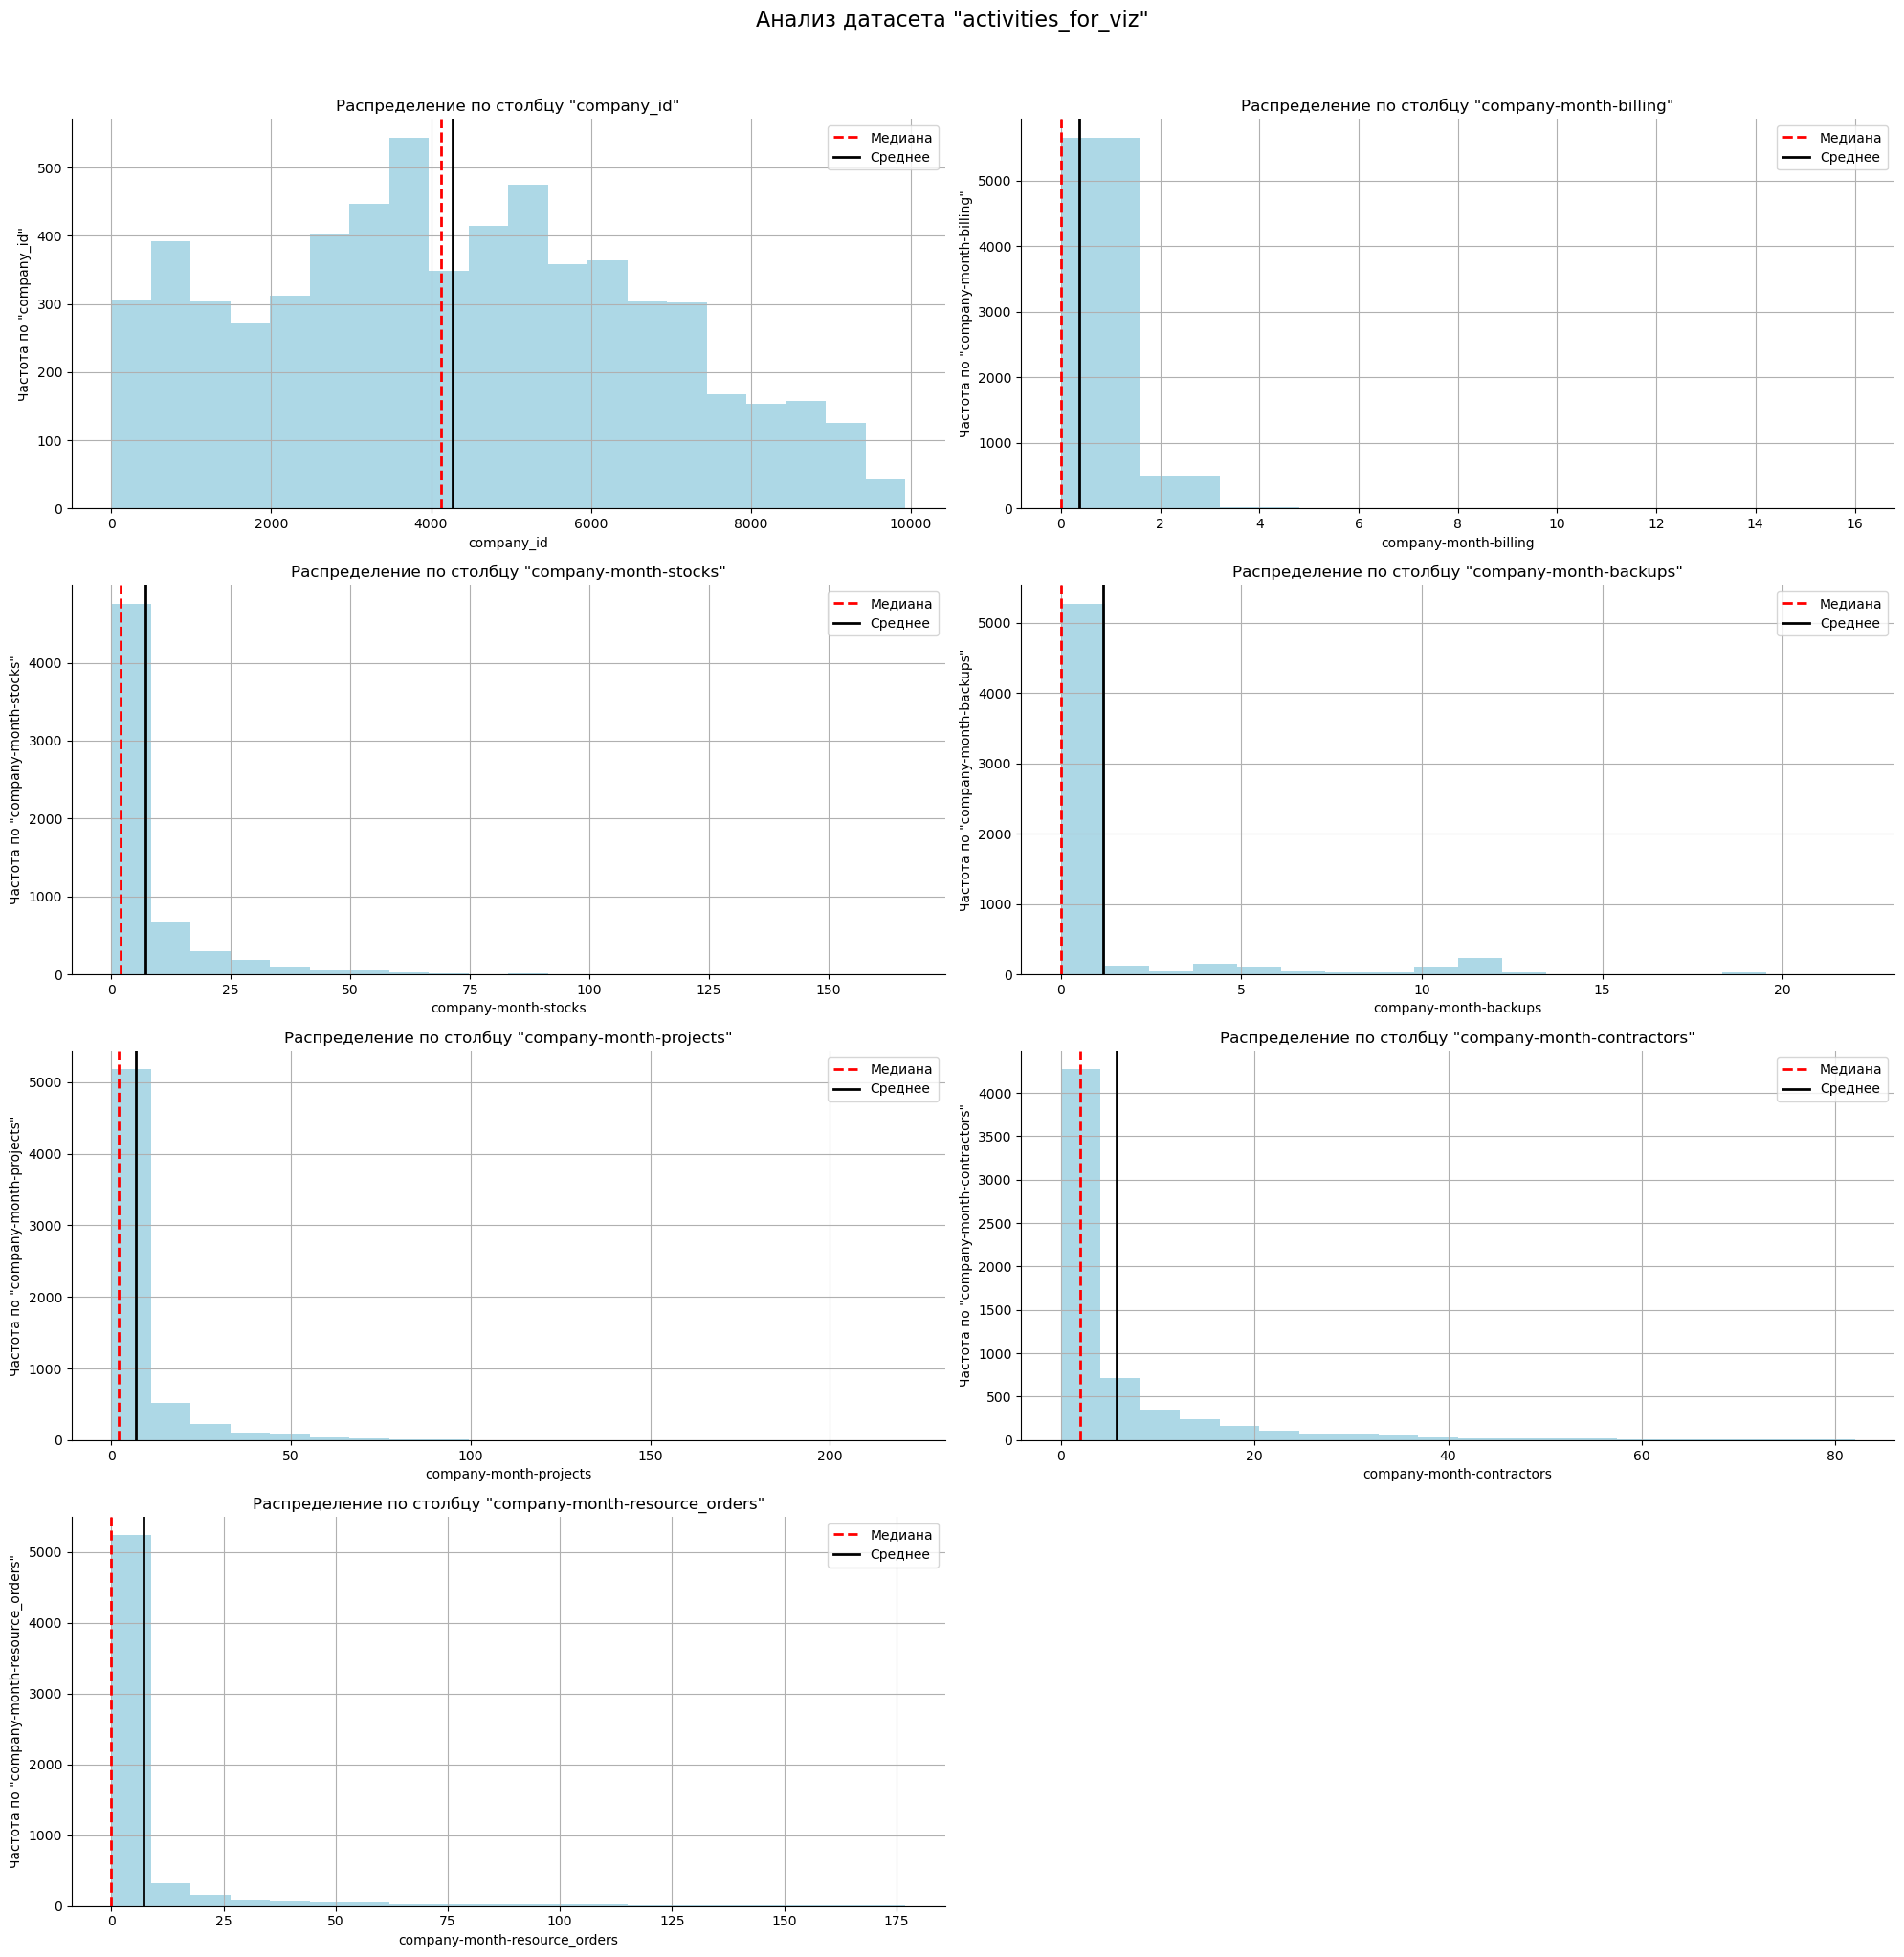

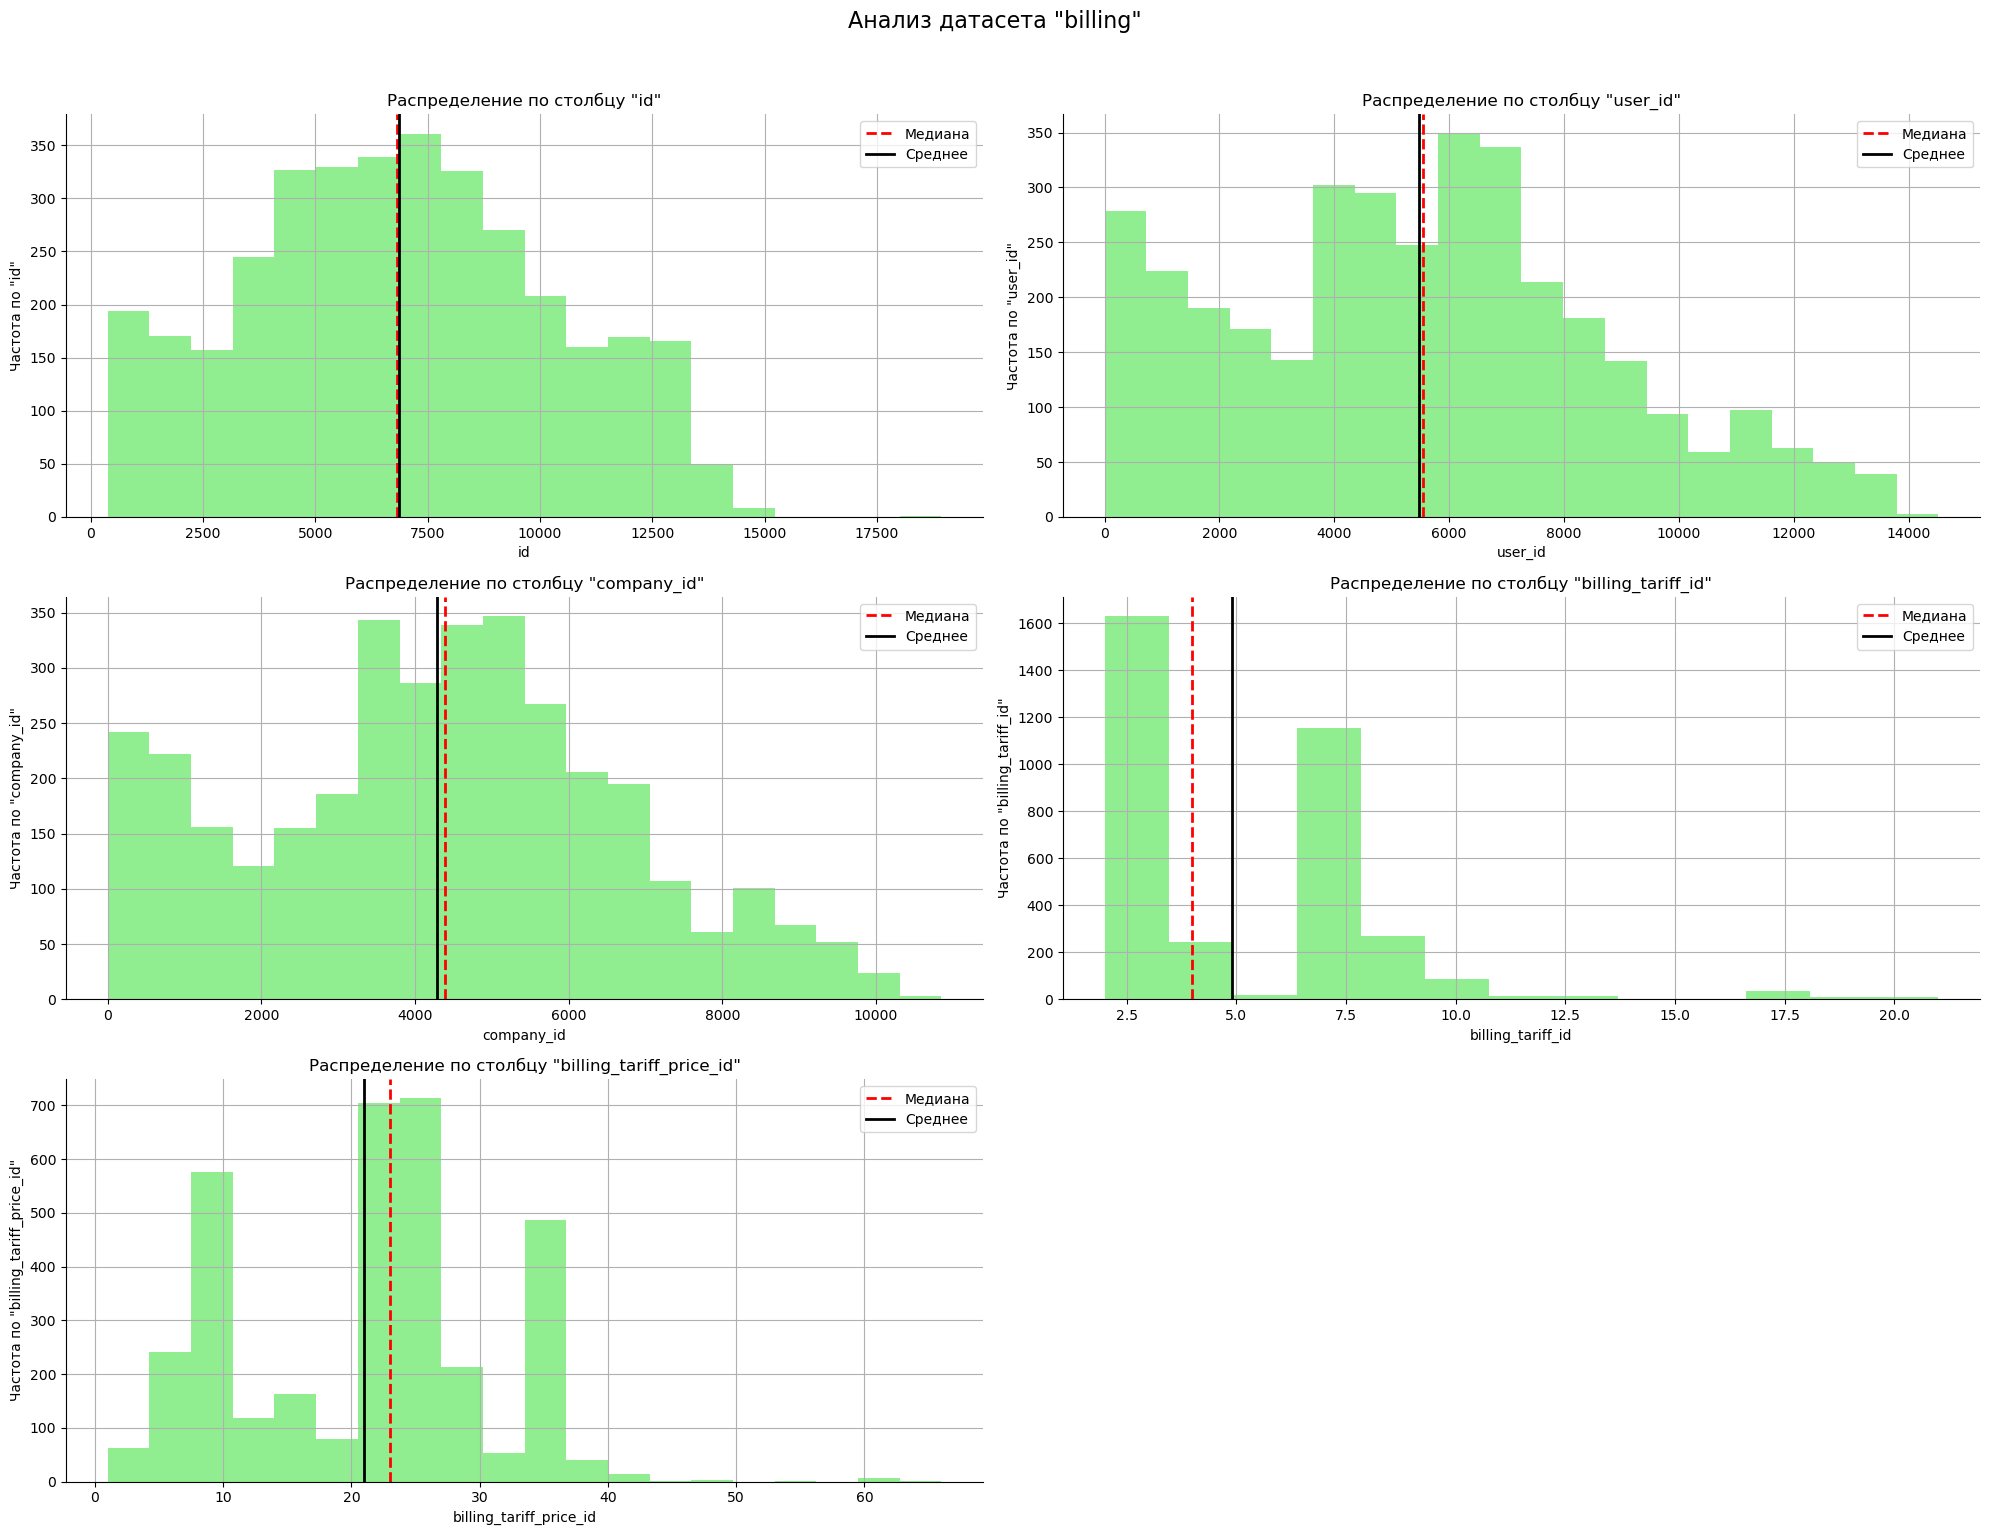

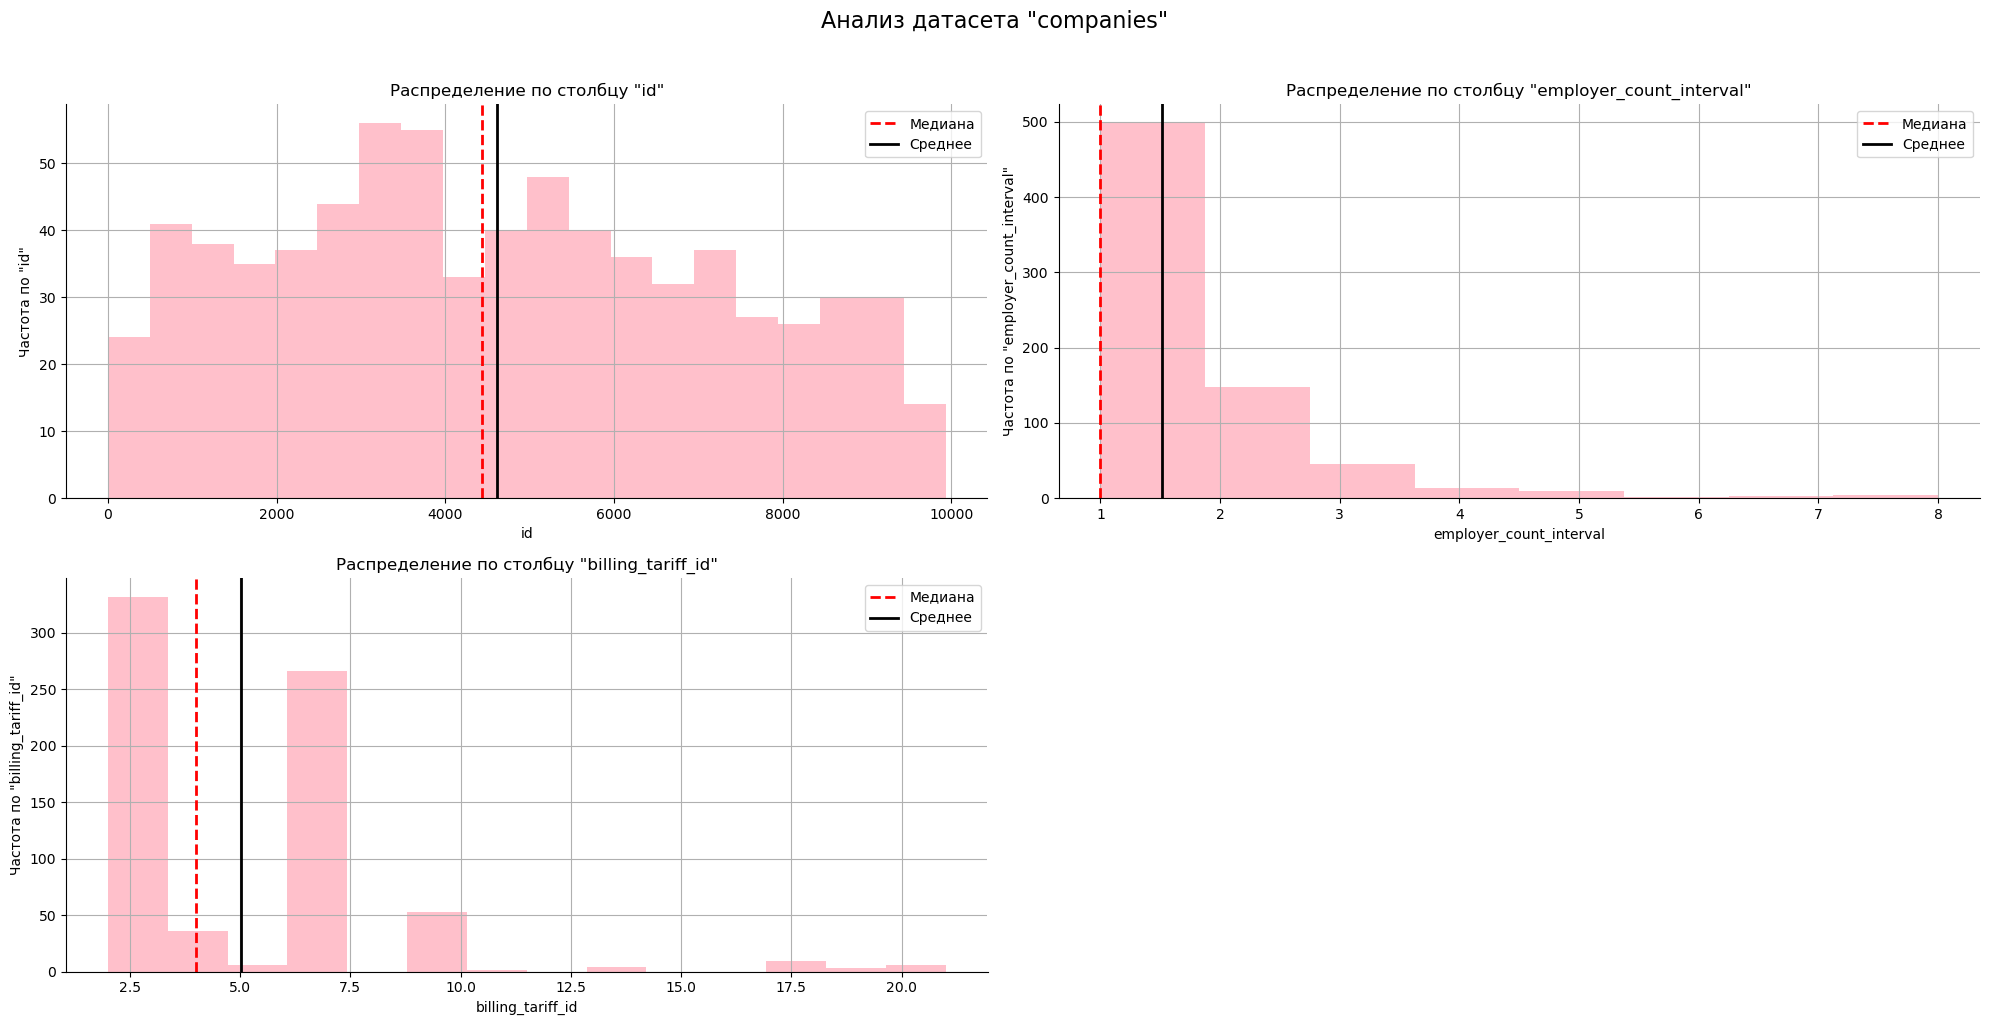

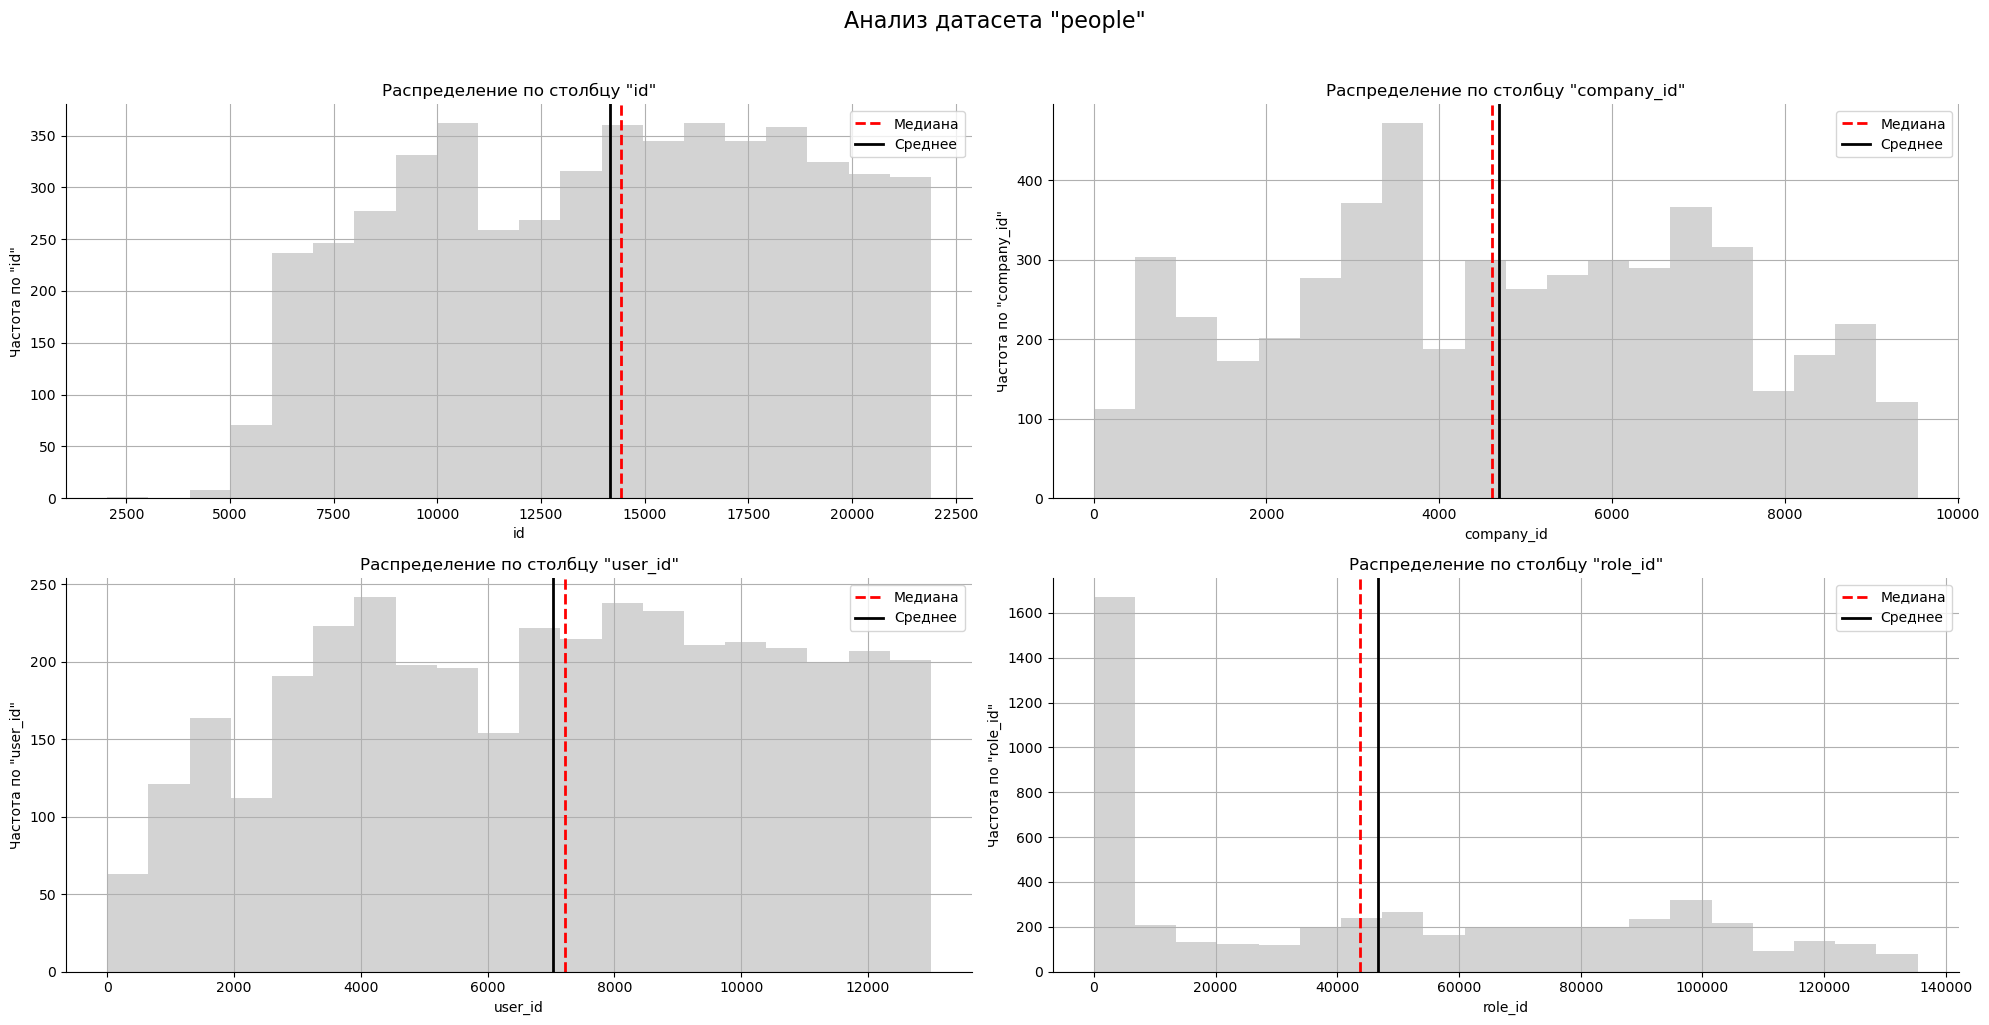

In [14]:
# Выводим гистограммы на экран
# Для построения гистограмм удалим выбросы в activities по company_month_contractors и 
# company_month_resource_orders
percentile_99_contactors = np.percentile(activities['company-month-contractors'], 99)
percentile_99_orders = np.percentile(activities['company-month-resource_orders'], 99)
activities_for_viz = activities.query('`company-month-contractors` <= @percentile_99_contactors \
                                    & `company-month-resource_orders` <= @percentile_99_orders')

exclude_cols = ['Unnamed: 0', 'payed_until', 'pay_date', 'deleted_at', 'created_at', 'updated_at']
datasets = [activities_for_viz, billing, companies, people]
names = ['activities_for_viz', 'billing', 'companies', 'people']
colors = ['lightblue', 'lightgreen', 'pink', 'lightgrey']
for dataset, name, color in zip(datasets, names, colors):
    histograms(dataset, name, color, exclude_cols)

Анализ гистограмм по датасетам:
- activities:
  - company_id: уникальных идентификаторов компаний более 10 тысяч;
  - conpany_month_billing: большая часть клиентов не пользуется опцией выставления счетов в приложении, у тех,  кто пользуется - в среднем 0 счетов в месяц. Возможно, это опция входит не во все тарифные планы;
  - conpany_month_stocks: также большая часть клиентов не фиксирует в приложении количество складов, у тех, кто фиксирует -  в среднем 8-10 складов, есть клиенты, у кого это значение больше, но таких меньшинство;
  - conpany_month_backups: бэкапы делать никто не любит. Мы видим всплески на уровне 1, 4-5, 10-12, но таких компаний немного;
  - conpany_month_projects: если не считать опять же тех, у кого 0 проектов, то в среднем у компании-клиента 8-10 проектов;
  - conpany_month_conractors: медианное значение близко к 1, среднее в пределах 5;
  - conpany_month_resourse_orders: медианное значение близко к 0, среднее в пределах 10.

Все больше складывается впечатление, что доступность различных опций зависит от тарифа, иначе непонятно, почему так много клиентов платит деньги и не пользуется почти никакими опциями.

- billing:
  - user_id: разброс большой, пользователей (сотрудников компаний) больше 14 тыс. Непонятно пока, почему график неравномерный, возможно, в каких-то интервалах пользователей меньше, потому что их удаляли;
  - company_id: уникальных идентификаторов компаний более 10 тысяч;
  - billing_tariff_id: большинство компаний используют тарифы 2 и 7, это базовый и стартовый тарифы;
  - billing_tariff_price_id: непонятный пока столбец, по вводным данным цены могут быть для одного и того же тарифа для разных клиентов или в разное время разные.

- companies:
  - id: уникальных идентификаторов компаний около 10 тыс.
  - employer_count_interval: большиство клиентов - это небольшие компании (от 1 до 4х человек);
  - billing_tariff_id: снова видим, что тарифы 2 и 7 наиболее популярны;
  
- people:
  - company_id: уникальных идентификаторов компаний около 9800;
  - user_id: около 13 тыс. уникальных идентификаторов;
  - role_id: в большинстве случаев роль представителя клиента не указана, но возможных вариантов более 130 тыс.

**Выводы:**

На данном этапе мы:
- Прочитали файлы с данными;
- Вывели и изучили общую информацию о них.

Впереди предобработка данных.

[Возврат к описанию проекта](#toc)

<a id="2"></a>
## Предобработка данных

#### Установим дату начала исследования: 2024-03-28

In [15]:
analyse_date = datetime(2024, 3, 28)

#### Объявление функций для предобработки данных

In [16]:
# Определим функцию для проверки данных на наличие явных дубликатов
def find_explicit_duplicates(dataset):

    # Находим явные дубликаты
    explicit_duplicates_cnt = display(f'Количество явных дубликатов: {dataset.duplicated().sum()}')

    explicit_duplicates = None
    explicit_duplicates_cnt = 0

    # Выводим дубликаты в виде таблицы, если они есть
    if dataset.duplicated().sum() > 0:
        explicit_duplicates = display(dataset[dataset.duplicated(keep=False)])

    else:
        display('Явные дубликаты не найдены')

In [17]:
# Определим функцию для проверки данных на наличие неявных дубликатов
def find_implicit_duplicates(dataset, columns_to_compare):

    # Находим неявные дубликаты
    implicit_duplicates = dataset[dataset.duplicated(subset=columns_to_compare, keep=False)]
    if implicit_duplicates.empty:
        print('Неявных дубликатов нет.')

    else:
        display(implicit_duplicates)

In [18]:
# Определим функцию, которая будет выводить описание данных в столбце, количество уникальных значений и
# топ-5 лист самых популярных значений
def unique_describe(dataset):
    return  display(dataset.describe(),
                    f'Количество уникальных значений: {len(dataset.unique())}',
                    dataset.value_counts().head())

In [19]:
# Определим функцию для построения корреляционного анализа данных на предмет поиска зависимостей между признаками
# и пропущенными значениями с помощью phik_matrix
def phik_correlation(data, data_interval_cols):
    matrix = data.phik_matrix(interval_cols = data_interval_cols)

    # Строим тепловую карту
    plt.figure(figsize=(7, 7))
    sns.heatmap(matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5, square=True, cbar=False)
    plt.title('Матрица корреляции')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.show()

In [20]:
# Определим функцию для визуализации количества значений по столбцам c помощью столбчатой диаграммы
def cols_value_counts_viz(data, feature):
    # Подсчет количества значений в столбце
    data_counts = data[feature].value_counts()

    # Создание столбчатой диаграммы
    plt.figure(figsize=(12, 6))
    sns.barplot(x=data_counts.index, y=data_counts.values, color='skyblue')
    plt.xlabel(f'Количество {feature}')
    plt.ylabel('Частота')
    plt.title(f'Распределение количества {feature} по компаниям')
    plt.xticks(rotation=45)

    plt.tight_layout()
    sns.despine()

    plt.show()

In [21]:
# Определим функцию для визуализации количества значений по столбцам c помощью круговой диаграммы
def cols_value_counts_viz_pie(data, feature):
    # Подсчет количества значений в столбце
    data_counts = data[feature].value_counts()

    # Создание круговой диаграммы
    plt.figure(figsize=(5, 5))
    plt.pie(data_counts.values, labels=None, autopct='%1.1f%%', startangle=140, explode=(0.01, 0), 
            colors=['#87CEEB', '#90EE90'])
    plt.legend(labels=data_counts.index, loc="center left", bbox_to_anchor=(1, 0.5))

    plt.axis('equal') 
    plt.title(f'Распределение количества {feature} по компаниям')
    

    plt.tight_layout()
    sns.despine()

    plt.show()

In [22]:
# Определим функцию для загрузки изображений по url
def img_load(url):
    url = url

    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    # Конвертируем изображение в формат RGB
    img = img.convert('RGB')

    # Отображаем изображение
    display(img)

In [23]:
# Создадим копии датасетов до преобразований, чтобы проконтролировать процент удаления данных
temp1 = activities.copy()
display(len(temp1))
temp2 = billing.copy()
display(len(temp2))
temp3 = companies.copy()
display(len(temp3))
temp4 = people.copy()
display(len(temp4))

6316

3480

723

5095

<a id="3"></a>
### Датасет activities

#### Преобразуем типы данных, где необходимо

In [24]:
# Изменим тип данных в столбце month на datetime и извлечем дату
activities['month'] = pd.to_datetime(activities['month'], format='ISO8601').dt.tz_localize(None)

# Изменим типы данных в столбцах company-month-billing, company-month-stocks, company-month-backups,
# company-month-projects, company-month-contractors, company-month-resource_orders на integer
cols_to_change = ['company-month-billing', 'company-month-stocks', 'company-month-backups',
                  'company-month-projects', 'company-month-contractors', 'company-month-resource_orders']

for col in cols_to_change:
    activities[col] = activities[col].astype('int')

#### Приведем названия столбцов к единообразию

In [25]:
activities.rename(columns=lambda x: x.replace('-', '_'), inplace=True)

#### Изучим дубликаты  в датасете

In [26]:
# Проверим явные дубликаты в датасете
dataset = activities
find_explicit_duplicates(dataset)

'Количество явных дубликатов: 0'

'Явные дубликаты не найдены'

In [27]:
# Проверим неявные дубликаты в датасете
dataset = activities
columns_to_compare = ['company_id', 'month']
find_implicit_duplicates(dataset, columns_to_compare)

Неявных дубликатов нет.


Явные и неявные дубликаты не найдены.

#### Изучим уникальные значения в столбцах

In [28]:
dataset = activities['company_id']
unique_describe(dataset)

count    6316.000000
mean     4280.338505
std      2413.005439
min         1.000000
25%      2459.000000
50%      4112.000000
75%      6080.000000
max      9931.000000
Name: company_id, dtype: float64

'Количество уникальных значений: 716'

company_id
1255    46
1088    46
2771    38
2919    37
2265    36
Name: count, dtype: int64

Интересно, что уникальных значений всего 716, а самый большой company_id - 9931. Видимо, последняя цифра означает общее количество компаний, когда либо использовавших сервис. 716 компаний в списке сейчас, получается не ушло из сервиса около 7.2% от общего числа.

In [29]:
dataset = activities['month']
unique_describe(dataset)

count                             6316
mean     2022-06-08 03:06:57.226092288
min                2019-01-01 00:00:00
25%                2021-08-01 00:00:00
50%                2022-07-01 00:00:00
75%                2023-06-01 00:00:00
max                2024-03-01 00:00:00
Name: month, dtype: object

'Количество уникальных значений: 63'

month
2023-10-01    200
2023-08-01    181
2023-09-01    177
2023-11-01    175
2022-02-01    171
Name: count, dtype: int64

Уникальных значений 63, как я уже отмечала выше, минимальная дата в датасете - 2019-01-01, максимальная - 2024-03-01. По количеству уникальных значений мы можем сказать, что по каждому месяцу указанного периода есть записи. Самые активные месяцы- октябрь, август и сентябрь 2023 года.

In [30]:
# Добавим в датасет столбец year
activities['year'] = activities['month'].dt.year

In [31]:
dataset = activities['company_month_billing']
unique_describe(dataset)

count    6316.000000
mean        0.375079
std         0.800281
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        16.000000
Name: company_month_billing, dtype: float64

'Количество уникальных значений: 10'

company_month_billing
0    4708
1    1067
2     404
3     103
4      21
Name: count, dtype: int64

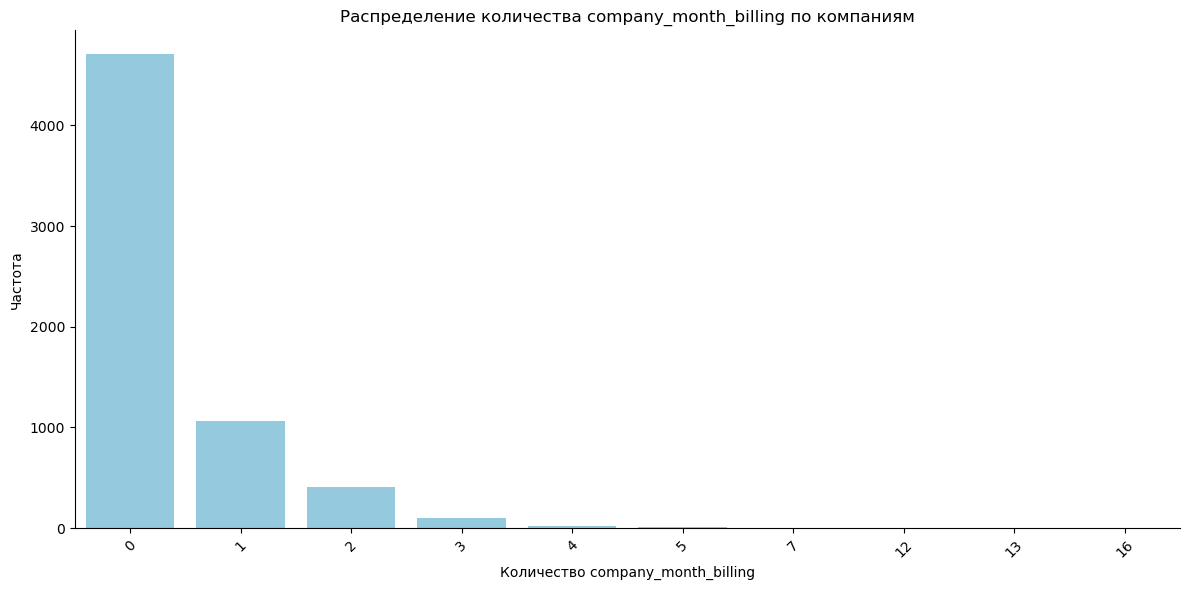

In [32]:
# Визуализируем количество значений в столбце по их уникальности
cols_value_counts_viz(activities, 'company_month_billing')

Судя по количеству уникальных значений столбца и максимальному значению, данная услуга может быть доступна не для всех тарифов.

In [33]:
dataset = activities['company_month_stocks']
unique_describe(dataset)

count    6316.000000
mean        7.408486
std        13.107824
min         0.000000
25%         1.000000
50%         3.000000
75%         8.000000
max       166.000000
Name: company_month_stocks, dtype: float64

'Количество уникальных значений: 101'

company_month_stocks
0    1412
1    1033
2     681
3     473
4     375
Name: count, dtype: int64

101 уникальное значение, самое большое количество заказов, аренды и т.д. для компаний - 166. Но большинство компаний вообще не пользуются этой опцией или ничего не отметили. Посмотрим на компанию, которая поставила такой рекорд по складам в месяц.

In [34]:
activities.query('company_month_stocks == 166')['company_id']

2047    1330
Name: company_id, dtype: int64

In [35]:
activities.query('company_id == 1330')

company_id      month  company_month_billing  company_month_stocks  company_month_backups  company_month_projects  company_month_contractors  company_month_resource_orders  year
341         1330 2020-06-01                      2                     5                      0                       5                          6                              0  2020
342         1330 2020-09-01                      3                     1                      0                       1                          0                              0  2020
2047        1330 2020-07-01                      0                   166                      7                     166                         74                              0  2020
2048        1330 2020-08-01                      0                    68                      0                      68                         72                              0  2020

Компания пользовалась сервисом с июня по сентябрь 2020 года. При большом количестве проектов совсем мало выставленных счетов, нет никаких данных о заказах материалов. Не очень понятно, насколько эти проекты были успешны.

In [36]:
# Посмотрим на аномальные значения по этому столбцу с помощью 99-го перцентиля
display(np.percentile(activities['company_month_stocks'], 99))

66.0

In [37]:
# Посмотрим у скольких компаний company_month_stocks > 66
activities.query('company_month_stocks > 66')['company_id'].nunique()

29

Удалять эти строки как выбросы сейчас я не буду. Недостаточно информации о клиентах сервиса, чтобы это сделать.

In [38]:
dataset = activities['company_month_backups']
unique_describe(dataset)

count    6316.000000
mean        1.178277
std         3.135253
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        22.000000
Name: company_month_backups, dtype: float64

'Количество уникальных значений: 18'

company_month_backups
0     5123
1      244
11     217
4      161
2      121
Name: count, dtype: int64

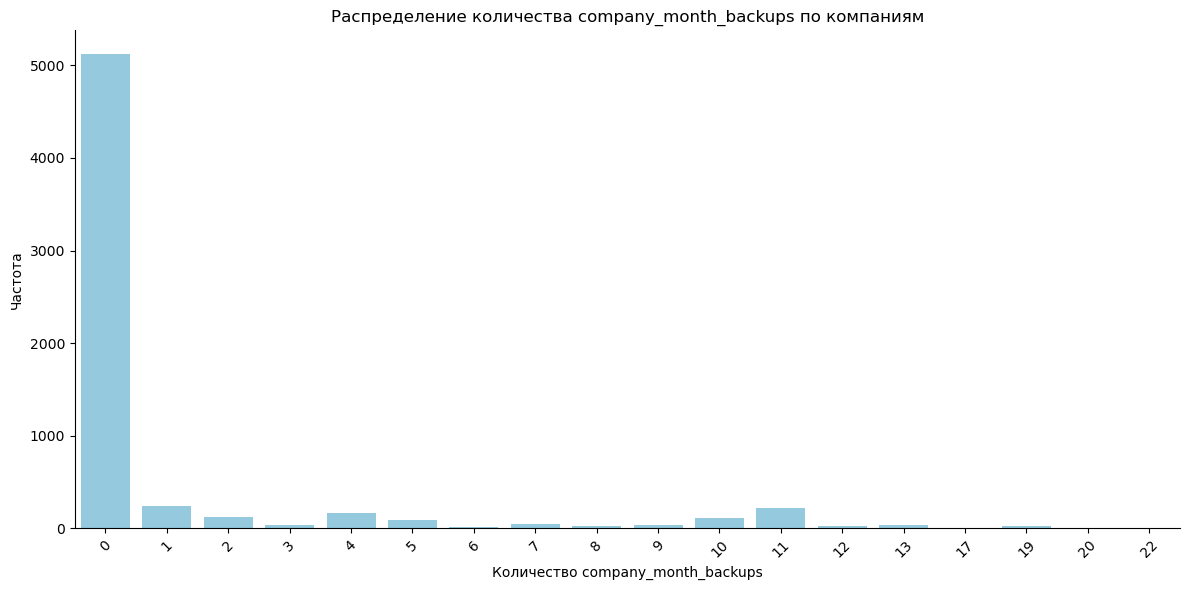

In [39]:
# Визуализируем количество значений в столбце по их уникальности
cols_value_counts_viz(activities, 'company_month_backups')

Уникальных значений - 18, максимальное количество бэкапов в месяц - 22, но подавляющее большинство компаний их не делает. Посмотрим на компанию с максимальным количеством бэкапов.

In [40]:
activities.query('company_month_backups == 22')

company_id      month  company_month_billing  company_month_stocks  company_month_backups  company_month_projects  company_month_contractors  company_month_resource_orders  year
5080        8276 2023-12-01                      0                     4                     22                      16                          2                             66  2023
5741        8276 2024-01-01                      0                     0                     22                       0                          0                              0  2024

Могу предположить, что компания ответственно подошла к вопросу и делала бэкап каждый будний день, даже когда не было никаких проектов. Возникает также вопрос к заказчику: должны ли клиенты сами следить за сохранностью своих данных в сервисе? Есть ли какие-то напоминания со стороны сервиса о необходимости бэкапа?

In [41]:
dataset = activities['company_month_projects']
unique_describe(dataset)

count    6316.000000
mean        7.262666
std        13.899203
min         0.000000
25%         1.000000
50%         2.000000
75%         7.000000
max       221.000000
Name: company_month_projects, dtype: float64

'Количество уникальных значений: 107'

company_month_projects
0    1314
1    1200
2     712
3     488
4     366
Name: count, dtype: int64

Уникальных значений - 107, максимальное количество проектов в месяц - 221, в 1314 записей - 0. Интересно, с какой целью ими используется сервис в таком случае. Посмотрим на компанию, у которой максимальное число проектов.

In [42]:
activities.query('company_month_projects == 221')['company_id']

2976    3518
Name: company_id, dtype: int64

In [43]:
activities.query('company_id == 3518').sort_values(by='month')

company_id      month  company_month_billing  company_month_stocks  company_month_backups  company_month_projects  company_month_contractors  company_month_resource_orders  year
763         3518 2021-06-01                      1                    19                      1                       9                         47                              7  2021
2957        3518 2021-07-01                      0                    25                      5                       6                          3                              0  2021
2958        3518 2021-08-01                      0                    28                      4                      10                          4                              0  2021
2959        3518 2021-09-01                      0                    35                      4                      11                          6                              0  2021
2960        3518 2021-10-01                      0                    21                      5                      22                          3                              1  2021
2961        3518 2021-11-01                      0                    32                      4                      18                          2                              0  2021
2962        3518 2021-12-01                      0                    35                      4                      26                        123                              0  2021
2963        3518 2022-01-01                      0                    10                      5                       4                         10                              0  2022
2964        3518 2022-02-01                      0                    19                      4                      31                         15                              0  2022
2965        3518 2022-03-01                      0                    28                      4                      16                         22                              0  2022
2966        3518 2022-04-01                      0                    31                      5                      19                          6                              0  2022
2967        3518 2022-05-01                      0                    37                      4                      28                          4                              1  2022
2968        3518 2022-06-01                      0                    39                      4                      26                         25                              4  2022
2969        3518 2022-07-01                      0                    20                      5                      10                         29                             14  2022
2970        3518 2022-08-01                      0                    27                      4                      12                         13                            101  2022
2971        3518 2022-09-01                      0                    55                      4                      35                         17                             20  2022
2972        3518 2022-10-01                      0                    55                      5                      41                          7                             40  2022
2973        3518 2022-11-01                      0                    33                      7                      15                          3                              3  2022
764         3518 2022-12-01                      3                    43                      5                      17                          3                             24  2022
2974        3518 2023-01-01                      0                    41                      5                      36                          0                              0  2023
765         3518 2023-02-01                      1                    30                      2                      15                       

Компания активно использует сервис с июня 2021 года. Но удивительно, что столбец со счетами снова почти не заполнен. Действительно ли, эта опция зависит от тарифа или просто компании не хотят афишировать (хранить в облаке) какую-либо финансовую информацию?

In [44]:
# Посмотрим на аномальные значения по этому столбцу с помощью 99-го перцентиля
display(np.percentile(activities['company_month_projects'], 99))

66.0

In [45]:
# Посмотрим, сколько компаний с company_month_projects > 66
activities.query('company_month_projects > 66')['company_id'].nunique()

26

Возможно, это те же самые компании, что и в столбце company_month_stocks. Проверим, есть ли пересечения.

In [46]:
activities_stocks = activities.query('company_month_stocks > 66')['company_id'].unique()
activities_projects = activities.query('company_month_projects > 66')['company_id'].unique()

# Проверим пересечения
intersection = np.intersect1d(activities_stocks, activities_projects)

print('Пересечение company_id:', intersection)
print('Количество совпадений:', len(intersection))

Пересечение company_id: [ 430  483  981 1255 1330 1339 2227 2354 2771 2919 3471 3518 3623 3654
 4479 4902 5050 6254 6341 7999 9243]
Количество совпадений: 21


Действительно, 21 company_id одинаковое в двух столбцах для значений выше 99 перцентиля. Соответственно, значения хоть и выше, чем у других клиентов, но имеют право на сущестовование, возможно, эти компании крупнее или успешнее остальных, и поэтому у них отчетные цифры выше.

In [47]:
dataset = activities['company_month_contractors']
unique_describe(dataset)

count    6316.000000
mean        7.906428
std        27.966199
min         0.000000
25%         0.000000
50%         2.000000
75%         7.000000
max      1014.000000
Name: company_month_contractors, dtype: float64

'Количество уникальных значений: 135'

company_month_contractors
0    2061
1     849
2     664
3     403
4     297
Name: count, dtype: int64

Уникальных значений - 135, максимальное количество контрагентов в месяц - 1014, в 2061 записей - 0. Разница между стандартным отклонением и средним очень большая. Посмотрим на компанию с максимальным количеством контрагентов.

In [48]:
activities.query('company_month_contractors == 1014')['company_id']

4222    5790
Name: company_id, dtype: int64

In [49]:
activities.query('company_id == 5790').sort_values(by='month')

company_id      month  company_month_billing  company_month_stocks  company_month_backups  company_month_projects  company_month_contractors  company_month_resource_orders  year
4209        5790 2022-04-01                      0                     4                      0                       2                          7                              5  2022
1177        5790 2022-05-01                      2                     1                      0                       1                          0                              0  2022
4210        5790 2022-06-01                      0                     1                      0                       0                          0                              0  2022
5997        5790 2022-07-01                      0                     0                      0                       1                          0                              4  2022
4211        5790 2022-09-01                      0                     4                      1                       3                          5                              1  2022
5640        5790 2022-10-01                      0                     0                      1                       0                          2                              3  2022
5641        5790 2022-11-01                      0                     0                      1                       0                          0                              0  2022
4212        5790 2022-12-01                      0                     1                      1                       0                          7                             11  2022
4213        5790 2023-01-01                      0                     1                      1                       0                          4                             14  2023
6191        5790 2023-02-01                      0                     0                      0                       0                          3                             10  2023
4214        5790 2023-03-01                      0                     1                      0                       0                          0                              4  2023
4215        5790 2023-04-01                      0                     2                      0                       5                          5                              0  2023
4216        5790 2023-05-01                      0                     4                      0                       0                         11                             22  2023
4217        5790 2023-06-01                      0                     5                      0                       5                          5                             26  2023
4218        5790 2023-07-01                      0                     3                      1                       2                          6                             17  2023
4219        5790 2023-08-01                      0                     3                      1                       7                          6                              4  2023
4220        5790 2023-09-01                      0                     9                      2                       3                         17                             59  2023
4221        5790 2023-10-01                      0                     3                      1                       2                         20                             85  2023
4222        5790 2023-11-01                      0                     2                      0                       1                       1014                            142  2023
4223        5790 2023-12-01                      0                     2                      0                      10                         25                            188  2023
5998        5790 2024-01-01                      0                     0                      0                       1                       

Если сравнить показатели компании по этому столбцу, то закрадывается мысль, что 1014 - это опечатка. Очень похоже на какую-то аномалию.

In [50]:
# Посмотрим на аномальные значения по этому столбцу с помощью 99-го перцентиля
display(np.percentile(activities['company_month_contractors'], 99))

82.0

In [51]:
# Посмотрим, сколько компаний с company_month_contractors > 200
activities.query('company_month_contractors > 200')['company_id'].nunique()

18

In [52]:
# Выведем компании с цифрой по столбцу выше 300
activities.query('company_month_contractors > 300')

company_id      month  company_month_billing  company_month_stocks  company_month_backups  company_month_projects  company_month_contractors  company_month_resource_orders  year
546         2444 2020-11-01                      1                     2                      0                       0                        320                              0  2020
818         3674 2021-07-01                      3                     5                      0                       3                        767                              5  2021
1400        7423 2023-03-01                      2                     0                      0                       1                        847                              5  2023
4222        5790 2023-11-01                      0                     2                      0                       1                       1014                            142  2023
4834        7211 2023-07-01                      0                     2                      0                       2                        369                            151  2023
5251        9243 2023-12-01                      0                    73                      0                       8                        536                              1  2023

Стало пока еще непонятнее, как при количестве проектов -  0, количество контрагентов  - 320. Удалять я, конечно, сейчас ничего не буду. Но возникает два вопроса:
- контролирует ли как-то сервис после оплаты доступа то, какие данные клиент вносит, какие не вносит, пользуется всеми доступными опциями или все это на усмотрение клиента?
- зачем клиенту платить за сервис, если  пока картина похожа на то, что когда (если) клиент вспомнил про то, что у него есть доступ к сервису, тогда и внес данные (если внес). Или клиент не обучил своих представителей работать с сервисом, не объяснил, что важно вносить данные своевременно.

In [53]:
dataset = activities['company_month_resource_orders']
unique_describe(dataset)

count    6316.000000
mean       10.346105
std        40.569956
min         0.000000
25%         0.000000
50%         0.000000
75%         4.000000
max      1182.000000
Name: company_month_resource_orders, dtype: float64

'Количество уникальных значений: 213'

company_month_resource_orders
0    3905
1     328
5     246
3     211
2     210
Name: count, dtype: int64

Уникальных значений - 213, максимальное количество заказов материалов в месяц - 1182, в 3905 записей - 0. Разница между стандартным отклонением и средним также очень большая. Посмотрим на максимальное значение.

In [54]:
activities.query('company_month_resource_orders == 1182')['company_id']

697    3224
Name: company_id, dtype: int64

In [55]:
activities.query('company_id == 3224').sort_values(by='month')

company_id      month  company_month_billing  company_month_stocks  company_month_backups  company_month_projects  company_month_contractors  company_month_resource_orders  year
694         3224 2021-04-01                      1                     1                      0                       1                          2                              0  2021
695         3224 2021-05-01                      1                    10                      0                       1                          1                              0  2021
2754        3224 2021-06-01                      0                    15                      0                       3                         19                             12  2021
2755        3224 2021-07-01                      0                    14                      0                       6                         10                              0  2021
2756        3224 2021-08-01                      0                     3                      0                       0                         19                              1  2021
2757        3224 2021-09-01                      0                    16                      0                      27                         24                             27  2021
2758        3224 2021-10-01                      0                    14                      0                       2                         16                             41  2021
2759        3224 2021-11-01                      0                    13                      0                       4                         14                             85  2021
2760        3224 2021-12-01                      0                    11                      0                       6                         15                             99  2021
2761        3224 2022-01-01                      0                    13                      0                       0                         23                              9  2022
2762        3224 2022-02-01                      0                    10                      0                       1                         23                             60  2022
2763        3224 2022-03-01                      0                    22                      0                       2                         23                             50  2022
2764        3224 2022-04-01                      0                    16                      0                       3                         21                            106  2022
696         3224 2022-05-01                      1                    15                      0                       3                         28                            196  2022
2765        3224 2022-06-01                      0                    18                      0                      19                         29                           1002  2022
697         3224 2022-07-01                      1                     8                      0                      44                         24                           1182  2022
2766        3224 2022-08-01                      0                    14                      0                      25                         17                            486  2022
2767        3224 2022-09-01                      0                    19                      0                      33                         28                            528  2022
2768        3224 2022-10-01                      0                    21                      0                      12                         26                            318  2022
2769        3224 2022-11-01                      0                    14                      0                      15                         12                            277  2022
2770        3224 2022-12-01                      0                    10                      0                       0                       

Тут цифры похожи на правду, компания даже для небольшого количества проектов заказывает достаточно много материалов.

<a id="4"></a>
### Датасет billing

#### Проверим пропуски в датасете

In [56]:
# Вычислим долю пропусков данных в столбцах
pd.DataFrame(round(billing.isna().mean() * 100, 3)).sort_values(by = 0).style.background_gradient()

В столбцах comment и pay_date мы видим большое количество пропусков (78.6% и 68.2%, соответственно). Далее попробуем определить природу пропусков:
- MCAR (Missing Completely at Random (Отсутствуют совершенно случайно), т.е. вероятность появления пропусков не зависит от значений других переменных или от самого пропущенного значения;
- MAR (Missing at Random (Отсутствуют случайно), но, несмотря на перевод, вероятность появления пропусков зависит от значений других переменных, но не зависит от самого пропущенного значения;
- MNAR (Missing Not at Random (Отсутствуют неслучайно), т.е. вероятность появления пропусков зависит от самого пропущенного значения.

#### Удалим ненужные столбцы

In [57]:
billing.drop('Unnamed: 0', axis=1, inplace=True)

####  Корреляционный анализ данных на предмет поиска зависимостей между признаками и пропущенными значениями с помощью phik_matrix по датасету billing

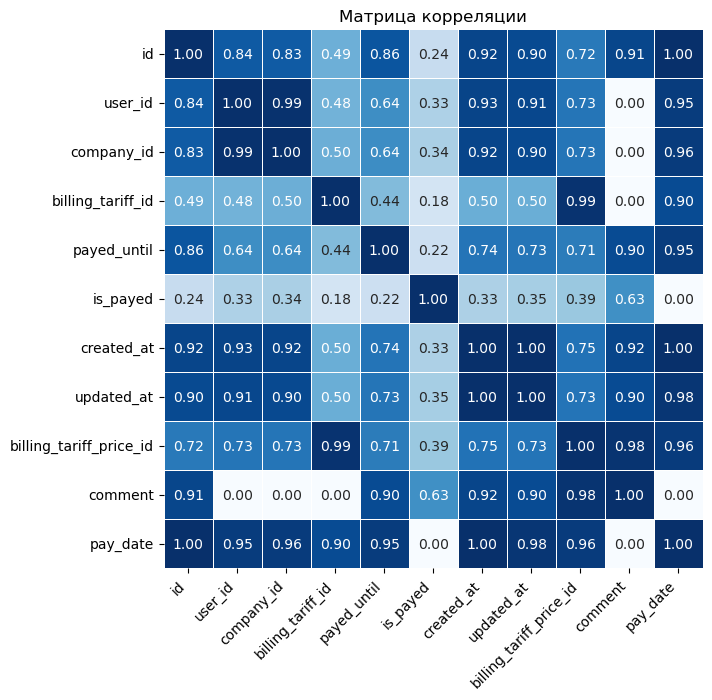

In [58]:
# Построим phik_matrix
data_interval_cols=['id', 'user_id', 'company_id', 'payed_until', 'created_at', 'updated_at']
matrix = phik_correlation(billing, data_interval_cols)
matrix

<div class="alert alert-info" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px ">
<b> Таблица интерпретации значений корреляции:</b>

![avatar](https://www.ok-t.ru/studopediaru/baza17/1942458671852.files/image012.gif)
</div>


Пропуски в столбце comment имеют весьма высокую корреляцию с такими признаками как id, payed_until, created_at, updated_at, billing_tariff_price_id и заметную с признаком is_payed. Эти пропуски явно можно отнести к категории MAR. Пропуски скорее всего зависят от статуса оплаты очередной подписки. Комментарий вносится в случае поступления оплаты или необходимости зафиксировать какие-либо договоренности, но сам пропуск на другие признаки не влияет. Соответственно, ничего с этими пропусками не делаем.

Пропуски в столбце pay_date имеют весьма высокую корреляцию с такими признаками как id, user_id, company_id, billing_tariff_id, payed_until, created_at, updated_at, billing_tariff_price_id. Эти пропуски также можно отнести к категории MAR. В случае, если счет оплачен, но в столбце payed_id информация не зафиксирована, это может вызвать проблему с доступом к аккаунту, например. Но пропуски скорее всего зависят от факта оплаты компанией очередной подписки, чем какого-то умышленного сокрытия информации. Если заполнение данных об оплате происходит автоматически, то пропуск означает, что оплаты нет. Если вручную, то возможны варианты, могли не успеть внести, могли случайно пропустить, ну или опять же оплаты нет. Я не буду ничего с ними делать.

#### Преобразуем типы данных, где необходимо

In [59]:
# Изменим тип данных в payed_until, created_at, updated_at, pay_date на datetime
cols_to_change = ['payed_until', 'created_at', 'updated_at']

for col in cols_to_change:
    billing[col] = pd.to_datetime(billing[col], unit='s')

billing['pay_date'] = pd.to_datetime(billing['pay_date'], unit='s', errors='coerce')

# Изменим тип данных в столбцах is_payed, billing_tariff_price_id на integer
billing['is_payed'] = billing['is_payed'].replace({False: 0, True: 1})
billing['billing_tariff_price_id'] = billing['billing_tariff_price_id'].astype(int)

#### Изучим дубликаты  в датасете

In [60]:
# Проверим явные дубликаты в датасете
dataset = billing
find_explicit_duplicates(dataset)

'Количество явных дубликатов: 0'

'Явные дубликаты не найдены'

In [61]:
# Проверим неявные дубликаты в датасете
dataset = billing
columns_to_compare = ['user_id', 'company_id', 'payed_until', 'created_at']
find_implicit_duplicates(dataset, columns_to_compare)

id  user_id  company_id  billing_tariff_id         payed_until  is_payed          created_at          updated_at  billing_tariff_price_id comment pay_date
2143  7855     5832        4603                  7 2023-03-30 11:46:49         0 2022-03-30 11:46:49 2022-03-30 11:46:49                       23     NaN      NaT
2144  7856     5832        4603                  7 2023-03-30 11:46:49         0 2022-03-30 11:46:49 2022-03-30 11:46:49                       23     NaN      NaT

Думаю, что это неявный дубликат, произошел сбой в системе и задвоение. Удалим второе вхождение.

In [62]:
billing = billing[billing['id'] != 7856]

#### Изучим уникальные значения в столбцах

In [63]:
dataset = billing['id']
unique_describe(dataset)

count     3479.000000
mean      6863.863754
std       3380.845804
min        376.000000
25%       4438.000000
50%       6812.000000
75%       9235.000000
max      18932.000000
Name: id, dtype: float64

'Количество уникальных значений: 3479'

id
3050    1
8349    1
8303    1
8299    1
8327    1
Name: count, dtype: int64

В данном столбце у нас предположительно уникальный идентификатор платежа. Уникальные значения не повторяются. Довольно непонятный столбец, минимальное значение - 376, максимальное - 18932. При количестве строк 3479. Хотелось бы узнать у заказчика, почему такая выгрузка и что это все-таки за данные, в противном случае столбец не представляет интереса для исследования, я удалю его.

In [64]:
billing.drop('id', axis=1, inplace=True)

In [65]:
dataset = billing['user_id']
unique_describe(dataset)

count     3479.000000
mean      5478.667721
std       3266.408544
min          1.000000
25%       2946.500000
50%       5535.000000
75%       7557.000000
max      14517.000000
Name: user_id, dtype: float64

'Количество уникальных значений: 1841'

user_id
3942    61
4980    40
6       31
9179    30
3924    29
Name: count, dtype: int64

На 3480 строк уникальных значений - 1841, посмотрим сколько будет уникальных значений в столбце company_id. Ясно также, что на пользователя в датасете может приходится не одна запись, максимум 61.

In [66]:
dataset = billing['company_id']
unique_describe(dataset)

count     3479.000000
mean      4285.624317
std       2388.752350
min          1.000000
25%       2545.000000
50%       4395.000000
75%       5834.000000
max      10851.000000
Name: company_id, dtype: float64

'Количество уникальных значений: 1841'

company_id
3276    61
4004    40
5       31
6939    30
3260    29
Name: count, dtype: int64

Похоже, что user_id и company_id связаны. Одинаковое количество уникальных значений и одинаковые цифры  в топ-5 повторяющихся значений. Но также понятно, что уникальных значений company_id в данном датасете явно больше, чем в activities.

In [67]:
dataset = billing['billing_tariff_id']
unique_describe(dataset)

count    3479.000000
mean        4.906295
std         3.212498
min         2.000000
25%         2.000000
50%         4.000000
75%         7.000000
max        21.000000
Name: billing_tariff_id, dtype: float64

'Количество уникальных значений: 13'

billing_tariff_id
2    1539
7    1153
9     269
4     242
3      91
Name: count, dtype: int64

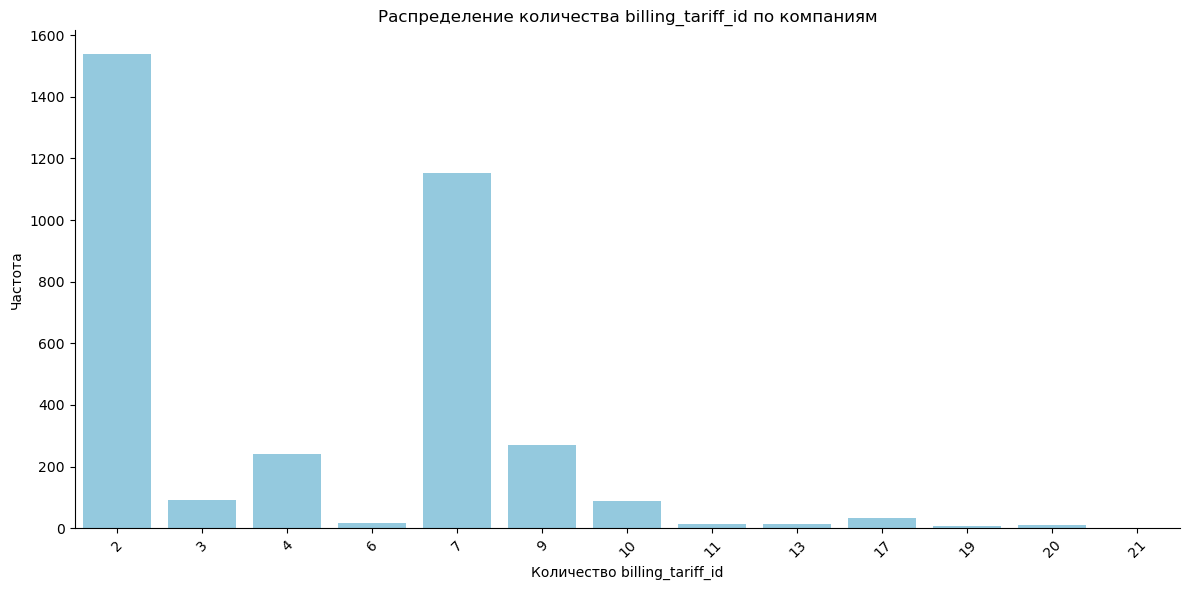

In [68]:
# Визуализируем количество значений в столбце по их уникальности
cols_value_counts_viz(billing, 'billing_tariff_id')

Максимальное значение - 21, уникальных значений 13. С большим отрывом лидируют тарифы 2 и 7. Проверим, на всякий случай, чтобы в данных не осталось тарифов 1, 18, 22 (без оплаты).

In [69]:
billing.query('billing_tariff_id == 1 | billing_tariff_id == 18 | billing_tariff_id == 22')

Empty DataFrame
Columns: [user_id, company_id, billing_tariff_id, payed_until, is_payed, created_at, updated_at, billing_tariff_price_id, comment, pay_date]
Index: []

Таких планов не найдено.

In [70]:
# Определим функцию для категоризации тарифов
def categorization_tariff(tariff):
    if tariff in [4, 7, 8, 11, 19]:
        return 'старт'
    elif tariff in [2, 17]:
        return 'базовый'
    elif tariff in [9, 20]:
        return 'бизнес'
    elif tariff in [3, 10, 13, 21]:
        return 'профи'
    else:
        return 'архивный'

billing['tariff'] = billing['billing_tariff_id'].apply(categorization_tariff)

In [71]:
# Посмотрим на распределение тарифов поближе
billing['tariff'].value_counts()

tariff
базовый     1573
старт       1416
бизнес       279
профи        194
архивный      17
Name: count, dtype: int64

Итак, лидирует группа тарифов "базовый" (2, 17). Описание на сайте gectaro.com:
- бесплатный период: 7 дней;
- до 8 пользователей;
- неограниченно проектов;
- резервные копии на e-mail;
- импорт из Гранд-Сметы, Смета.Ру, РИК и др.
- интеграции по API;
- стоимость на период исследования: 33 333 руб. в месяц, при оплате на год.

На втором месте группа тарифов "старт" (4, 7, 8, 11, 19).  Описание на сайте:
- бесплатный период: 7 дней;
- до 3 пользователей;
- стоимость на период исследования: 21 166 руб. в месяц, при оплате на год.

Эти два тарифа лидируют с большим отрывом.

Далее идет группа тарифов "бизнес" (9, 20). Описание на сайте:
- бесплатный период: 7 дней;
- до 15 пользователей;
- неограниченно проектов;
- резервные копии на e-mail;
- импорт из Гранд-Сметы, Смета.Ру, РИК и др.
- интеграции по API;
- приоритетная поддержка;
- стоимость на период исследования: 55 833 руб. в месяц, при оплате на год.

Группа тарифов "профи" (3, 10, 13, 21) на 4ом месте. Описание на сайте:
- бесплатный период: 7 дней;
- до 30 пользователей;
- неограниченно проектов;
- резервные копии на e-mail;
- импорт из Гранд-Сметы, Смета.Ру, РИК и др.
- интеграции по API;
- VIP-поддержка;
- стоимость на период исследования: 81 500 руб. в месяц, при оплате на год.

Тариф "архивный" (6) у 17 компаний. В настоящее время он не используется.

Сразу хотелось бы отметить тот факт, что цены даны за год, вероятно платить за год более выгодно. Но это означает, что при оплате на меньший срок возможны варианты и мы о них не знаем, к сожалению.

In [72]:
# Посмотрим на компании с архивным тарифом, у которых он еще действует
billing.query('tariff == "архивный" & payed_until > @analyse_date')

user_id  company_id  billing_tariff_id payed_until  is_payed          created_at          updated_at  billing_tariff_price_id comment            pay_date    tariff
2483     4458        3640                  6  2024-07-06         1 2022-07-06 15:28:57 2022-07-06 15:41:41                       19     NaN 2022-07-06 15:41:41  архивный

Тариф "архивный" действует до сих пор только у одной компании.

Понятно, что на протяжении времени существования сервиса, цены на услуги менялись, но хотя бы для понимания ценовой политики на период исследования добавим в датасет цены с официального сайта gectaro.com и  с сервиса Wayback Machine (сервис, предоставляемый Интернет-архивом, сохраняет копии веб-страниц через регулярные интервалы времени), в котором текущие цены были зафиксированы 2023-12-19. А на дату 2023-03-14 были зафиксированы другие цены, их также добавим в наш датасет.

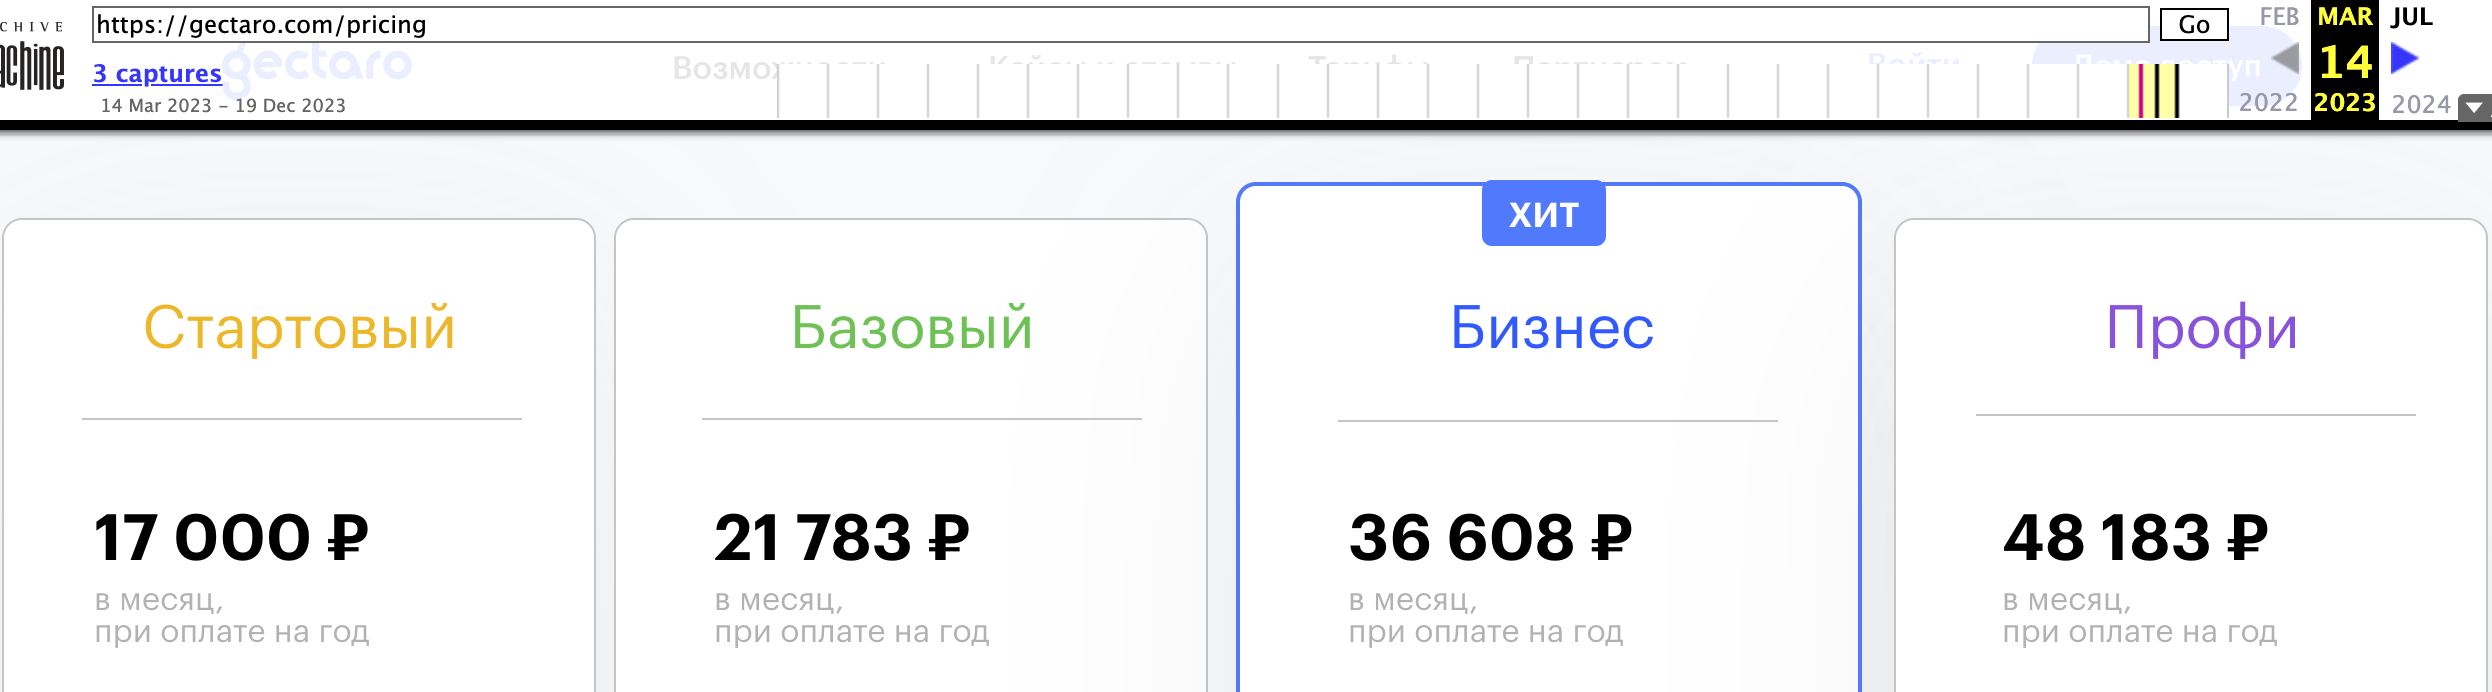

In [73]:
# Данные на 14 марта 2023 года
img_load(url = 'https://drive.google.com/uc?export=view&id=1dKSce7tPZS-JNcn5fTi8hsN46DqZ_cdB')

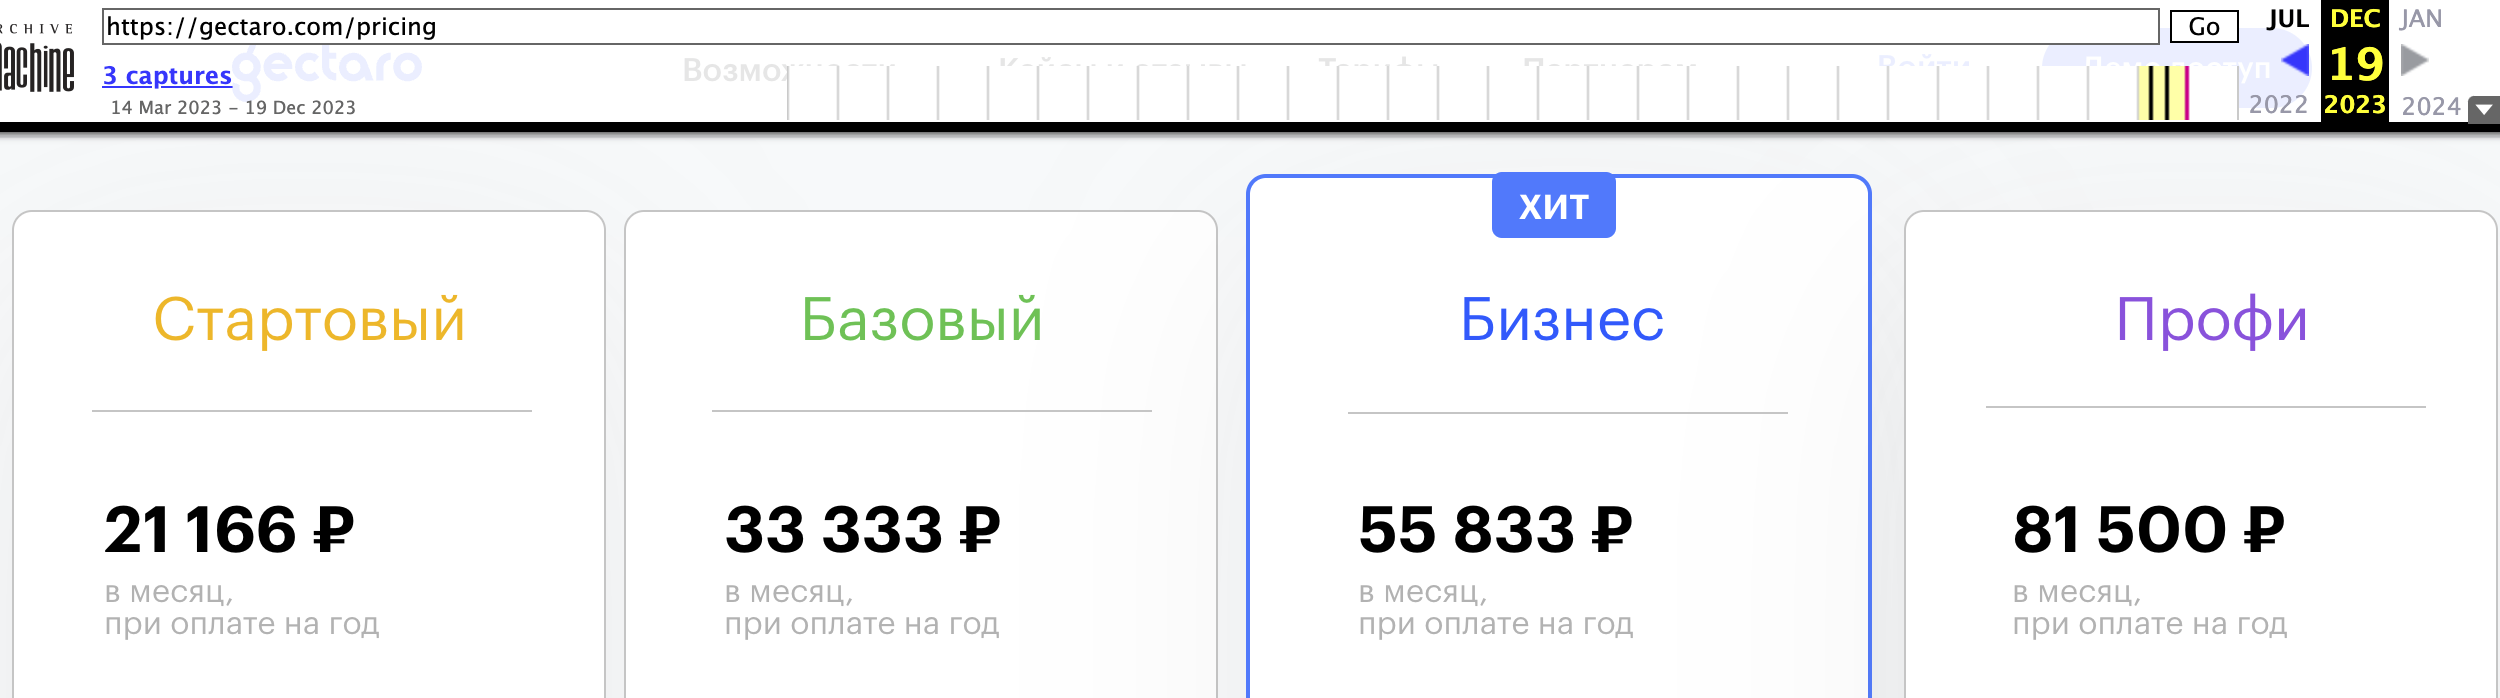

In [74]:
# Данные на 19 декабря 2023 года
img_load(url = 'https://drive.google.com/uc?export=view&id=1rrxXl0xgGI1Xw9FRsuaFDDlWUXaKJ-0C')

In [75]:
# Определим функцию для добавления цен на тарифы в датасет
def add_price(feature):
    tariff = feature['tariff']
    created_at = feature['created_at']
    
    if  created_at < datetime(2023, 12, 19):
        if tariff == 'старт':
            return 17000
        elif tariff == 'базовый':
            return 21783
        elif tariff == 'бизнес':
            return 36608
        elif tariff == 'профи':
            return 48183
        else:
            return 0
    else:
        if tariff == 'старт':
            return 21166
        elif tariff == 'базовый':
            return 33333
        elif tariff == 'бизнес':
            return 55833
        elif tariff == 'профи':
            return 81500
        else:
            return 0

billing['tariff_price'] = billing.apply(add_price, axis=1)

In [76]:
dataset = billing['payed_until']
unique_describe(dataset)

count                             3479
mean     2023-02-27 16:23:41.741879808
min                2019-09-11 23:59:59
25%                2022-04-06 00:00:00
50%                2023-06-06 00:00:00
75%                2024-01-30 00:00:00
max                2033-04-10 23:59:59
Name: payed_until, dtype: object

'Количество уникальных значений: 1841'

payed_until
2023-12-21    11
2023-07-12    10
2022-04-22    10
2023-07-28     9
2023-10-27     9
Name: count, dtype: int64

Записей о сроках истечения подписок столько же, сколько уникальных идентификаторов компаний. Есть подписка, которая будет действовать до 2033 года. Посмотрим на выбросы по 99ому перцентилю и на эту подписку поближе.

In [77]:
# Посмотрим на значения по столбцу по 99ому перцентилю
np.percentile(billing['payed_until'], 99)

numpy.datetime64('2025-10-25T09:22:27.499999890')

Если отриентироваться на него, то все, что после 25 октября 2025 года - аномально.

In [78]:
# Посмотрим на подписку до 2033 года
billing.query('payed_until == "2033-04-10 23:59:59"')

user_id  company_id  billing_tariff_id         payed_until  is_payed          created_at          updated_at  billing_tariff_price_id comment pay_date tariff  tariff_price
101      567         512                  7 2033-04-10 23:59:59         0 2020-12-21 15:05:06 2020-12-21 15:05:06                       23     NaN      NaT  старт         17000

Счет выставлен в декабре 2020 года, не оплачен. Тут явно какая-то ошибка.

In [79]:
# Посмотрим на компанию с этой подпиской
billing.query('company_id == 512')

user_id  company_id  billing_tariff_id         payed_until  is_payed          created_at          updated_at  billing_tariff_price_id comment pay_date    tariff  tariff_price
0        567         512                  3 2021-12-22 06:08:22         0 2020-12-22 06:08:22 2020-12-22 06:08:22                       12     NaN      NaT     профи         48183
55       567         512                  2 2026-01-05 23:59:59         0 2020-12-21 14:47:22 2020-12-21 14:47:22                        1     NaN      NaT   базовый         21783
83       567         512                  6 2021-06-21 14:55:39         0 2020-12-21 14:55:39 2020-12-21 14:55:39                       17     NaN      NaT  архивный             0
101      567         512                  7 2033-04-10 23:59:59         0 2020-12-21 15:05:06 2020-12-21 15:05:06                       23     NaN      NaT     старт         17000
557      567         512                  2 2026-12-05 23:59:59         0 2021-05-11 07:32:19 2021-05-11 07:32:19                        8     NaN      NaT   базовый         21783
829      567         512                  4 2020-04-30 00:00:00         1 2020-01-30 07:23:37 2020-01-30 07:24:15                       14     NaN      NaT     старт         17000
878      567         512                  2 2023-01-26 00:00:00         1 2020-03-04 12:49:11 2023-01-26 15:18:59                        1     NaN      NaT   базовый         21783

Какая-то путаница. 2020-12-21 выставлен счет с продлением подписки до 2026-01-05, в тот же день с разницей в 10 минут до 2033-04-10, при этом мы знаем, что наиболее частые подписки у нас бывают на 12-24 месяца. Примерно через полгода 2021-05-11 снова выставляется счет на подписку до 2026-12-05. Все эти счета не оплачены, тарифы "старт" и "базовый".

In [80]:
# Посмотрим на активность этой компании
activities.query('company_id == 512').groupby('month').sum()

company_id  company_month_billing  company_month_stocks  company_month_backups  company_month_projects  company_month_contractors  company_month_resource_orders  year
month                                                                                                                                                                             
2019-10-01         512                      0                     0                      0                       0                          1                              0  2019
2019-12-01         512                      1                     0                      0                       0                          0                              0  2019
2020-01-01         512                      1                     0                      0                       0                          0                              0  2020
2020-03-01         512                      0                     2                      0                       0                          0                              0  2020
2020-05-01         512                      0                     3                      0                       0                          0                              0  2020
2020-06-01         512                      0                     0                     11                       0                          0                              0  2020
2020-07-01         512                      0                     3                      7                       3                          0                              0  2020
2020-09-01         512                      0                     0                      0                       0                          1                              0  2020
2020-10-01         512                      0                     4                      8                       4                          3                              0  2020
2020-11-01         512                      0                    18                     10                      18                         37                              0  2020
2020-12-01         512                      4                     1                     11                       1                          0                              0  2020
2021-01-01         512                      0                     2                     11                       1                          0                              0  2021
2021-02-01         512                      0                     1                     10                       4                          0                              0  2021
2021-03-01         512                      0                     1                      7                       1                          0                              0  2021
2021-04-01         512                      0                    11                     10                      13                          0                              0  2021
2021-05-01         512                      1                     0                     11                       1                          0                              1  2021
2021-06-01         512                      0                     0                      1                       1                          0                              1  2021
2023-01-01         512                      1                     0                      0                       0                          0                              0  2023

Последняя реальная активность была в мае-июне 2021 года, затем в январе 2023 был выставлен один счет и все.

In [81]:
# Посмотрим, сколько таких компаний с подписками более, чем +24 месяца от даты старта исследовательского проекта
len(billing.query('payed_until > "2026-03-28 23:59:59"'))

17

In [82]:
# Посмотрим, как много записей, когда в столбце pay_date запись есть, а в столбце is_payed - "не оплачено"
len(billing
 .query('pay_date != "NaT" & is_payed == 0')
 .sort_values(by='company_id')
)

237

In [83]:
# Посмотрим на записи, когда в столбце pay_date запись есть, а в столбце is_payed - "не оплачено" и
# нет комментариев
(billing
 .query('pay_date != "NaT" & is_payed == 0 & comment != "No comment yet"')
 .sort_values(by='company_id')
)

user_id  company_id  billing_tariff_id payed_until  is_payed          created_at          updated_at  billing_tariff_price_id        comment            pay_date   tariff  tariff_price
2476       12          11                 11  2023-01-01         0 2022-07-01 16:07:35 2022-07-01 16:07:43                       38            NaN 2022-07-15 00:00:00    старт         17000
2471       12          11                  9  2023-06-30         0 2022-06-30 16:35:50 2022-06-30 16:36:14                       29            NaN 2022-06-16 00:00:00   бизнес         36608
1231      472         430                  2  2020-12-24         0 2020-12-17 14:01:56 2020-12-17 14:03:23                        8            NaN 2020-12-17 14:03:23  базовый         21783
66        689         615                  2  2022-02-12         0 2021-08-12 10:04:24 2021-08-12 11:59:36                        7            NaN 2021-08-12 00:00:00  базовый         21783
431       711         628                  4  2022-04-17         0 2021-04-12 10:45:50 2021-04-12 10:46:08                       16            NaN 2021-04-17 00:00:00    старт         17000
...       ...         ...                ...         ...       ...                 ...                 ...                      ...            ...                 ...      ...           ...
3147    12310        9109                  7  2024-10-24         0 2023-10-24 12:10:17 2023-10-24 12:11:16                       23            NaN 2023-10-31 00:00:00    старт         17000
3267    12431        9195                  7  2024-11-23         0 2023-11-13 09:42:30 2023-11-13 09:45:25                       23            NaN 2023-11-22 00:00:00    старт         17000
3251    12498        9243                  9  2026-04-01         0 2023-10-31 12:36:06 2023-11-02 11:28:13                       36  03,11,23-24+5 2023-11-02 00:00:00   бизнес         36608
3298    12909        9526                  7  2024-12-08         0 2023-12-05 09:32:20 2023-12-05 09:33:13                       23            NaN 2023-12-07 00:00:00    старт         17000
3477    13378        9841                  7  2025-03-13         0 2024-03-12 17:52:29 2024-03-12 17:53:29                       23            NaN 2024-03-15 00:00:00    старт         21166

[237 rows x 12 columns]

Выявлены следующие тенденции:
- если меняется тарифный план в процессе знакомства с системой, то запись со старым вариантом остается, и создается новая с другим планом, это задваивает данные и создает неразбериху, как в строках 3551-3252;
- 237 строк, когда в столбце pay_date запись есть, а в столбце is_payed - 0 - могу предположить, что или запись по оплате меняется после полной оплаты (возможно, можно платить частями) или эти все строки подлежат удалению/исправлению.
- нет четкой тарифной сетки. Вероятно, есть акции, личные договоренности с отделом продаж, какие-то непонятные дополнительные месяцы и заморозка. По заморозке вообще непонятно, какие правила. Насколько можно замораживать неясно. Поэтому удалять строки со слишком пролонгированными датами по подписке я не буду, хотя это выглядит аномально, но без четкого понимания как работает отдел продаж считаю неправильным их удалять. Позволю себе удалить только строку с подпиской до 2033 года.

In [84]:
# Удалим строку с подпиской до 2033 года по столбцу payed_until
billing = billing[billing['payed_until'] != '2033-04-10 23:59:59']

In [85]:
dataset = billing['is_payed']
unique_describe(dataset)

count    3478.000000
mean        0.320874
std         0.466880
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_payed, dtype: float64

'Количество уникальных значений: 2'

is_payed
0    2362
1    1116
Name: count, dtype: int64

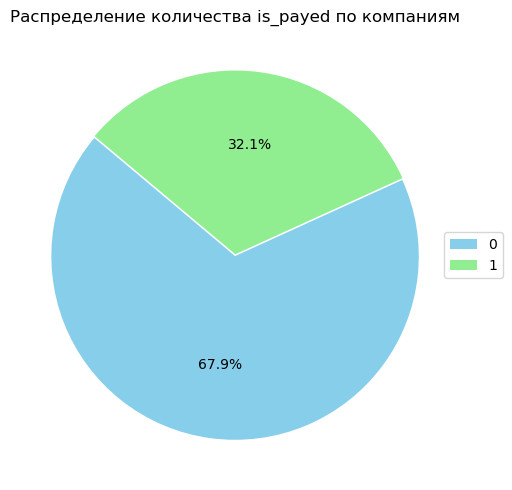

In [86]:
# Визуализируем количество значений в столбце по их уникальности
cols_value_counts_viz_pie(billing, 'is_payed')

Около 2/3 подписок не оплачено, судя по этому столбцу. Выше мы уже видели, что есть расхождения по нему и столбцу pay_date. В дальнейшем исследовании ориентироваться на эти данные мы не будем.

In [87]:
dataset = billing['created_at']
unique_describe(dataset)

count                             3478
mean     2022-01-23 06:44:33.530189568
min                2019-07-23 09:32:39
25%      2021-06-12 06:01:39.750000128
50%         2022-01-15 23:21:57.500000
75%      2022-08-29 13:49:13.750000128
max                2024-03-13 10:24:06
Name: created_at, dtype: object

'Количество уникальных значений: 3478'

created_at
2020-12-22 06:08:22    1
2022-05-16 20:07:39    1
2022-05-13 11:43:06    1
2022-05-13 10:05:58    1
2022-05-16 08:19:52    1
Name: count, dtype: int64

Последний выставленный счет был 2024-03-13. Ничего необычного. Все значения уникальны.

In [88]:
dataset = billing['updated_at']
unique_describe(dataset)

count                             3478
mean     2022-02-12 13:52:10.191489280
min                2019-07-23 09:32:39
25%                2021-06-23 20:37:07
50%         2022-01-25 12:46:59.500000
75%      2022-10-20 13:33:22.249999872
max                2024-03-13 10:26:17
Name: updated_at, dtype: object

'Количество уникальных значений: 3478'

updated_at
2020-12-22 06:08:22    1
2022-05-16 20:07:45    1
2022-05-16 07:09:13    1
2022-05-16 07:21:57    1
2022-05-16 08:20:01    1
Name: count, dtype: int64

Также все значения уникальны. Ничего необычного. Назначение столбца не совсем ясно. Что именно апдейтится? Перевыставляется счет? Или это апдейт факта предоплаты/оплаты по счету?

In [89]:
dataset = billing['billing_tariff_price_id']
unique_describe(dataset)

count    3478.000000
mean       21.016389
std         9.956594
min         1.000000
25%        10.000000
50%        23.000000
75%        26.000000
max        66.000000
Name: billing_tariff_price_id, dtype: float64

'Количество уникальных значений: 47'

billing_tariff_price_id
23    555
8     515
24    479
35    264
26    224
Name: count, dtype: int64

In [90]:
# Посмотрим на уникальные значения столбца
print(sorted(billing['billing_tariff_price_id'].unique()))

[1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 47, 48, 54, 60, 61, 66]


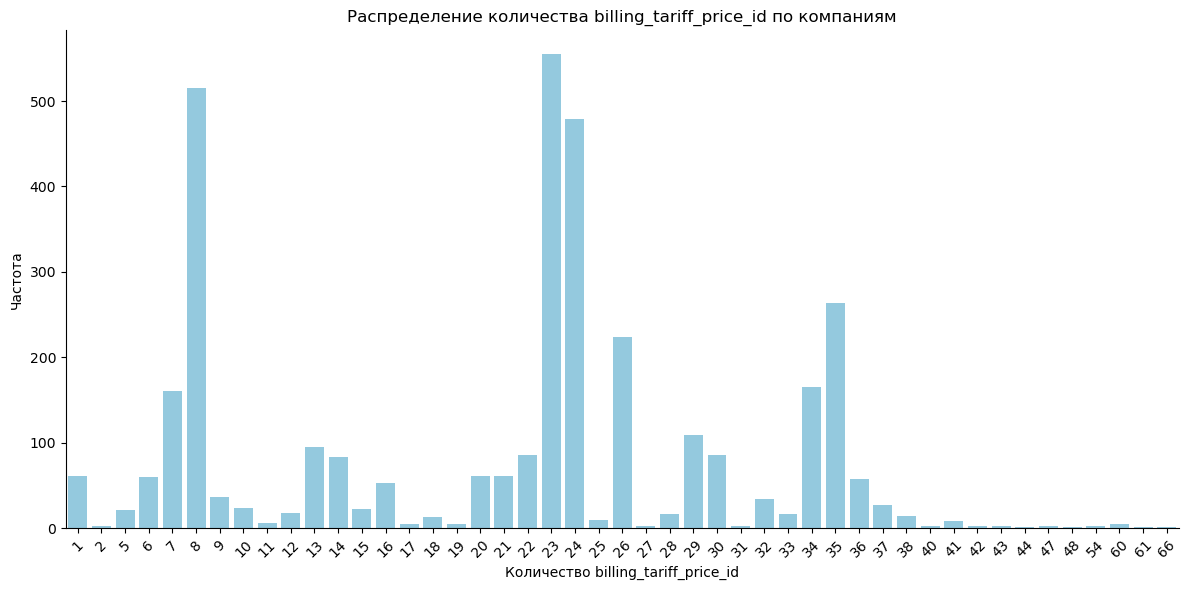

In [91]:
# Визуализируем количество значений в столбце по их уникальности
cols_value_counts_viz(billing, 'billing_tariff_price_id')

Ни о чем пока эти цифры не говорят мне, кроме того, что мы знаем из вводных данных, что в разное время и для разных клиентов один и тот же тариф может стоить по-разному. Самые популярные id цены - 8, 23, 24, 35, 26. Попробуем сопоставить данные по столбцам с tariff и billing_tariff_price_id.

In [92]:
prices_tariff = (billing
                 .pivot_table(index='tariff', values='billing_tariff_price_id',
                              aggfunc=lambda x: sorted(x.unique()))
                 .reset_index())
display(prices_tariff)

tariff                                                  billing_tariff_price_id
0  архивный                                                         [17, 18, 19, 27]
1   базовый                                   [1, 2, 5, 6, 7, 8, 15, 24, 25, 35, 48]
2    бизнес                                         [18, 19, 28, 29, 30, 36, 38, 47]
3     профи  [9, 10, 11, 12, 25, 31, 32, 33, 37, 40, 41, 42, 43, 44, 54, 60, 61, 66]
4     старт                         [13, 14, 15, 16, 19, 20, 21, 22, 23, 26, 34, 38]

id цены 8, 24, 35 - это тарифная группа "базовый", 23, 26 - "старт".

In [93]:
# Посмотрим на совпадающие значения
match = billing.groupby('billing_tariff_price_id', as_index=False)['tariff'].unique()
match.query('tariff.str.len() > 1')

billing_tariff_price_id                     tariff
12                       15           [старт, базовый]
15                       18         [архивный, бизнес]
16                       19  [архивный, старт, бизнес]
22                       25           [профи, базовый]
35                       38            [старт, бизнес]

Итак, мы видим, что некоторые billing_tariff_price_id совпадают в разных тарифных группах. Думаю, что эти id показывают нам изменение цен на тариф. Похоже у заказчика гибкая система ценообразования.

In [94]:
# Посмотрим на компании с billing_tariff_price_id == 15
billing.query('billing_tariff_price_id == 15').sort_values(by='company_id')

user_id  company_id  billing_tariff_id         payed_until  is_payed          created_at          updated_at  billing_tariff_price_id                                                                                              comment   pay_date   tariff  tariff_price
857        27          30                  4 2020-09-19 00:00:00         1 2020-03-12 12:15:37 2020-03-17 07:36:03                       15                                                                                                  NaN        NaT    старт         17000
913       116         108                  4 2020-10-28 23:59:59         0 2020-04-27 11:53:51 2020-04-27 11:53:51                       15                                                                                                  NaN        NaT    старт         17000
741       255         228                  4 2020-01-26 23:59:59         0 2019-07-26 12:00:50 2019-07-26 12:00:50                       15                                                                                                  NaN        NaT    старт         17000
967       641         575                  4 2020-12-26 00:00:00         1 2020-06-11 14:40:38 2020-06-23 12:20:07                       15                                                                                                  NaN        NaT    старт         17000
882       839         724                  4 2020-10-06 00:00:00         1 2020-04-06 05:29:58 2020-04-06 05:31:56                       15                  06,04 - активация 6 мес. по тарифу Стартовый по акции, стоимость тарифа 11700 руб.         NaT    старт         17000
853       956         824                  4 2020-09-25 23:59:59         0 2020-03-11 22:21:40 2020-03-11 22:21:40                       15                                                                                                  NaN        NaT    старт         17000
911      1067         920                  4 2020-10-30 00:00:00         1 2020-04-24 13:32:45 2020-04-27 06:35:23                       15                        оплата от ИП МАТВЕЕВА ОЛЬГА ВИКТОРОВНА  по счету № 1187 от 24 апреля 2020 г.         NaT    старт         17000
1094     1082         932                  4 2020-11-18 00:00:00         1 2020-04-21 08:24:12 2020-09-10 07:22:12                       15                                              10,09,20 - на 14 дней продлили после прохождения опроса        NaT    старт         17000
1180     1082         932                  4 2021-05-18 23:59:59         0 2020-11-16 13:02:01 2020-11-16 13:02:01                       15                                                                                                  NaN        NaT    старт         17000
1066     1134         981                  4 2021-02-26 23:59:59         0 2020-08-20 11:43:18 2020-08-20 11:43:18                       15                                                                                                  NaN        NaT    старт         17000
992      1206        1043                  4 2021-02-12 23:59:59         0 2020-07-03 10:17:02 2020-07-03 10:17:02                       15                                                                                                  NaN        NaT    старт         17000
1046     1219        1056                  4 2021-02-13 23:59:59         0 2020-08-11 08:17:50 2020-08-11 08:17:50                       15                                                                                                  NaN        NaT    старт         17000
944      1346        1157                  4 2020-12-03 23:59:59         0 2020-05-20 11:20:25 2020-05-20 11:20:25                       15                                                                                                  NaN        NaT    старт         17000
303      2566        2227                  4 2021-09-23 00:00:00         0 2021-03-23 15:17:58 2021-03-23 15:18:10                       15                 

Возможно, судя по комментариям, тарифные группы меняются, а оплата остается той же в том случае, если, например, клиенту предоставляется пробный период с доступом к каким-либо опциям от другого тарифа. Но почему нельзя сделать доп. столбец для фиксирования таких изменений и откатов их при необходимости при сборе данных? Сейчас никакой ясности нет по итогу внесенных изменений.

In [95]:
dataset = billing['comment']
unique_describe(dataset)

count      745
unique     650
top       18+2
freq        35
Name: comment, dtype: object

'Количество уникальных значений: 651'

comment
18+2        35
12+1        22
24+4         9
12+2         7
18+2 мес     5
Name: count, dtype: int64

Около 3/4 данных не имеют комментариев. Посмотрим на сами уникальные значения по столбцу.

In [96]:
billing['comment'].tail(15)

3465                                                                                                    NaN
3466                                                                             06.03.24- Cсв гр на неделю
3467                                                                                                    NaN
3468                                                                                                    NaN
3469                                                                                                    NaN
3470                                                                                                    NaN
3471               15,01,23 активировали, 12+3\r\n11,03,24- оформили возрат клиенту (тариф был до 15,04,25)
3472                                                                                                    NaN
3473                                                                                                    NaN
3474                        

Довольно интересно изучить этот список. К сожалению, со стилистикой проблемы, исправлять ошибки не считаю целесообразным в данном случае. Из этого списка мы узнали, что:
- можно опатить, но активировать тариф по запросу;
- с компаниями идет постоянная работа, поддерживается связь, видимо, происходит обзвон должников и сервис довольно лояльно относится к небольшим задержкам в оплате;
- при необходимости возможен перерасчет и возврат денежных средств;
- бонусы в виде дополнительного бесплатного периода, например, за видео-кейс (явно какие-то маркетинговые акции);
- бывают скидки;
- тариф можно заморозить по запросу;
- можно оплачивать тариф частями;
- есть пробный 7-дневный базовый тариф;
- тариф можно поменять уже после оплаты с доплатой и без доплаты (по какой-то личной договоренности с сотрудником компании);
- компенсация недопонимания между клиентом и службой поддержки в виде бонусных месяцев;
- можно перенести доступ на другую компанию по запросу и т.д.

In [97]:
dataset = billing['pay_date']
unique_describe(dataset)

count                             1108
mean     2022-05-04 07:52:33.683213056
min                2020-12-16 12:43:27
25%                2021-06-30 00:00:00
50%                2022-03-30 00:00:00
75%                2023-02-28 00:00:00
max                2024-03-15 00:00:00
Name: pay_date, dtype: object

'Количество уникальных значений: 802'

pay_date
2022-05-31    10
2021-05-31     7
2021-04-30     7
2021-12-30     7
2021-06-25     7
Name: count, dtype: int64

Около 3/4 значений пропущено. Уникальных дат - 802. Последняя оплата была 2024-03-15. Означают ли пропуски, что сервис неоплачен? Или оплата еще не дошла? Или информация вносится вручную и возможны технические накладки, когда в этой колонке данных нет, а в колонке is_paid статус - 1, то есть "оплачено".

<a id="5"></a>
### Датасет companies

#### Переименуем столбец id в company_id

In [98]:
companies = companies.rename(columns={'id':'company_id'})

#### Проверим пропуски в датасете

In [99]:
# Вычислим долю пропусков данных в столбцах
pd.DataFrame(round(companies.isna().mean() * 100, 5)).sort_values(by = 0).style.background_gradient()

У нас 3 пропуска (0.41%) в столбце working_direction и 7 пропусков (0.97%) в billing_tariff_id, изучим их.

In [100]:
# Посмотрим на пропуски в стобце working_direction
mask1 = companies['working_direction'].isna()
rows_with_missing_values1 = companies[mask1]
display(rows_with_missing_values1)

company_id working_direction  employer_count_interval  created_at  updated_at  billing_tariff_id  billing_is_over
155        8364               NaN                      2.0  1689327108  1692179928                2.0            False
514        6927               NaN                      1.0  1668598253  1709727143               17.0            False
623        7527               NaN                      2.0  1678794273  1686130137                9.0            False

In [101]:
# Посмотрим на пропуски в стобце billing_tariff_id
mask2 = companies['billing_tariff_id'].isna()
rows_with_missing_values2 = companies[mask2]
display(rows_with_missing_values2)

company_id working_direction  employer_count_interval  created_at  updated_at  billing_tariff_id  billing_is_over
70         1394           ремонты                      2.0  1594046967  1594046967                NaN            False
122        2366                 -                      1.0  1605598351  1605598351                NaN            False
615        7478                 -                      1.0  1678133266  1678133266                NaN            False
616        7479                 -                      1.0  1678174074  1678174074                NaN            False
617        7480                 -                      1.0  1678174873  1678174873                NaN            False
618        7481                 -                      1.0  1678175908  1678175908                NaN            False
642        7944                 -                      1.0  1684149633  1684149633                NaN            False

####  Корреляционный анализ данных на предмет поиска зависимостей между признаками и пропущенными значениями с помощью phik_matrix по датасету companies

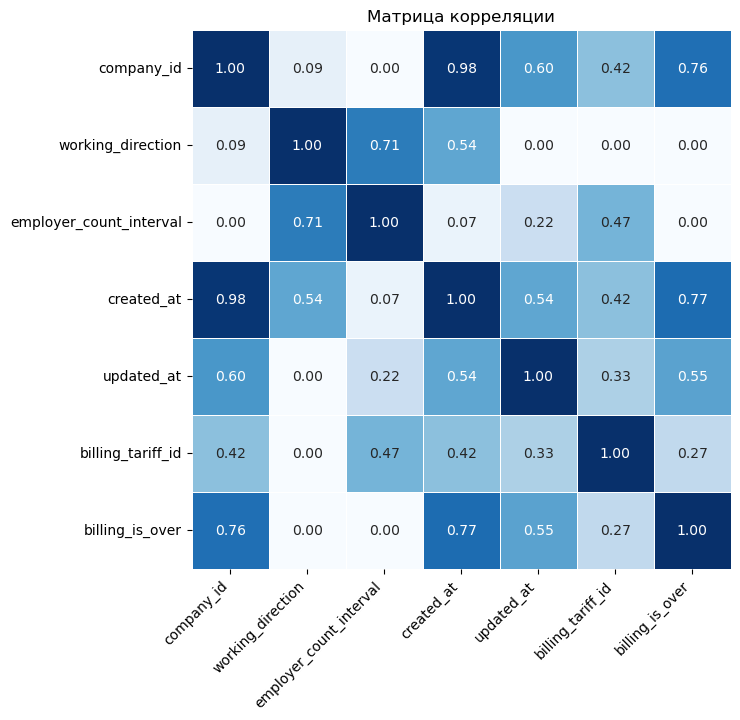

In [102]:
# Построим phik matrix
data_interval_cols=['company_id', 'created_at', 'updated_at']
matrix = phik_correlation(companies, data_interval_cols)
matrix

Мы видим заметную и высокую корреляцию между working_direction и created_at (54%), employer_count_interval (71%). Вероятно, эти пропуски из категории MAR, сфера деятельности зависит от того, насколько компания крупная по численности сотрудников. Возможно, мелкие компании не знали, как определить сферу деятельности. В любом случае, пропусков слишком мало, чтобы делать какие-то выводы. В данном стобце, в целом по данным, либо определена сфера деятельности, либо стоит прочерк, вряд ли мы можем заполнить как-то эти данные, кроме как прочерком.

У признака billing_tariff_id сколько-нибудь заметных корреляций с другими данными не обнаружено, скорее всего это случайные пропуски MCAR. Для заполнения пропусков попробуем поискать информацию по компаниям из пропущенных строк, но тут тоже нет гарантии, что мы сможем заполнить пропуски, так как в разное время тариф у одной и той же компании мог меняться.

In [103]:
# Заполняем пропуски в столбце working_direction прочерком
companies['working_direction'].fillna('-', inplace=True)

In [104]:
# Проверим компании с пропущенными значениями в столбце billing_tariff_id по таблицe billing
billing.query('company_id in [1394, 2366, 7478, 7479, 7480, 7481, 7944]')

Empty DataFrame
Columns: [user_id, company_id, billing_tariff_id, payed_until, is_payed, created_at, updated_at, billing_tariff_price_id, comment, pay_date, tariff, tariff_price]
Index: []

In [105]:
# Проверим компании с пропущенными значениями в столбце billing_tariff_id по таблицe activities
activities.query('company_id in [1394, 2366, 7478, 7479, 7480, 7481, 7944]')

Empty DataFrame
Columns: [company_id, month, company_month_billing, company_month_stocks, company_month_backups, company_month_projects, company_month_contractors, company_month_resource_orders, year]
Index: []

In [106]:
# Проверим компании с пропущенными значениями в столбце billing_tariff_id по таблицe people
people.query('company_id in [1394, 2366, 7478, 7479, 7480, 7481, 7944]')

id  company_id  user_id  role_id  created_at  updated_at  is_deleted  deleted_at
492    2038        1394    751.0        1  1594046968  1594046968       False         NaN
3755  17903        7478  10027.0        1  1678133266  1678133266       False         NaN
3757  17904        7479  10029.0        1  1678174074  1678174074       False         NaN
3758  17905        7480  10030.0        1  1678174873  1678174873       False         NaN
3759  17906        7481  10031.0        1  1678175908  1678175908       False         NaN
4086  18743        7944  10676.0        1  1684149633  1684149633       False         NaN

Только в датасете people есть такие id, кроме 2366, эта строка точно подлежит удалению. Посмотрю, есть ли пользователи из среза по датасету people в датасете billing.

In [107]:
billing.query('user_id in [751, 10027, 10029, 10030, 10031, 10676]')

Empty DataFrame
Columns: [user_id, company_id, billing_tariff_id, payed_until, is_payed, created_at, updated_at, billing_tariff_price_id, comment, pay_date, tariff, tariff_price]
Index: []

Таких пользователей нет нигде, удалю 7 строк с несуществующими id компаний из companies, тоже самое сделаю и для people.

In [108]:
# Удаляем пропуски в billing_tariff_id датасета companies
companies = companies.dropna(subset=['billing_tariff_id'])
companies.reset_index(drop=True, inplace=True)

In [109]:
# Удаляем строки с company_id 1394, 7478, 7479, 7480, 7481, 7944 в датасете people
people = people.query('company_id not in [1394, 7478, 7479, 7480, 7481, 7944]')

In [110]:
# Проверим, является ли company_id для всех таблиц первичным ключом по 5 случайным строкам из датасета companies
companies.sample(5)

company_id              working_direction  employer_count_interval  created_at  updated_at  billing_tariff_id  billing_is_over
622        7607                              -                      1.0  1679993799  1682664367                7.0            False
421        2791                  строительство                      2.0  1612681846  1703714401                2.0             True
507        3892                              -                      1.0  1627977757  1667887804                2.0            False
160        2851                              -                      1.0  1613990814  1670298329                7.0             True
472        5742  Проектирование, строительство                      3.0  1649167323  1704578401                7.0             True

In [111]:
display(len(billing.query('company_id in [6341, 4743, 8862, 1642, 8955]')))
display(len(activities.query('company_id in [6341, 4743, 8862, 1642, 8955]')))
display(len(people.query('company_id in [6341, 4743, 8862, 1642, 8955]')))

12

49

58

Отлично, в остальных 3х таблицах найдены совпадения по заданным id из датасета companies, мы сможем использовать столбец company_id как первичный ключ для всех датасетов.

#### Преобразуем типы данных, где необходимо

In [112]:
# Изменим тип данных в created_at, updated_at на datetime
companies['created_at'] = pd.to_datetime(companies['created_at'], unit='s', origin='unix')
companies['updated_at'] = pd.to_datetime(companies['updated_at'], unit='s')

# Изменим тип данных в столбцах billing_is_over на integer, employer_count_interval, billing_tariff_id на integer
companies['billing_is_over'] = companies['billing_is_over'].replace({False: 0, True: 1})

cols_to_change = ['employer_count_interval', 'billing_tariff_id']
for col in cols_to_change:
    companies[col] = companies[col].astype(int)

#### Изучим дубликаты  в датасете

In [113]:
# Проверим явные дубликаты в датасете
dataset = companies
find_explicit_duplicates(dataset)

'Количество явных дубликатов: 0'

'Явные дубликаты не найдены'

In [114]:
# Проверим неявные дубликаты в датасете
dataset = companies
columns_to_compare = ['employer_count_interval', 'created_at']
find_implicit_duplicates(dataset, columns_to_compare)

Неявных дубликатов нет.


Дубликаты не обнаружены.

#### Изучим уникальные значения в столбцах

In [115]:
dataset = companies['company_id']
unique_describe(dataset)

count     716.000000
mean     4605.438547
std      2609.494951
min         1.000000
25%      2563.750000
50%      4410.000000
75%      6625.500000
max      9931.000000
Name: company_id, dtype: float64

'Количество уникальных значений: 716'

company_id
514     1
6759    1
5742    1
1255    1
6571    1
Name: count, dtype: int64

Количество уникальных значений (id компаний) - 716, столько же, сколько в датасете activities.

In [116]:
dataset = companies['working_direction']
unique_describe(dataset)

count     716
unique    169
top         -
freq      455
Name: working_direction, dtype: object

'Количество уникальных значений: 169'

working_direction
-                            455
Строительство                 55
строительство                 10
Малоэтажное строительство      5
-строительство                 4
Name: count, dtype: int64

Так, тут кто во что горазд. Строительство разными способами написано. Посмотрю уникальные данные и приведу все, что можно к единой стилистике.

In [117]:
companies['working_direction'].tail(15)

701                              -Отделочные работы МОП, ТЦ, Офисы
702                                                              -
703                                                              -
704                              Строительство объектов энергетики
705                                                              -
706                                                              -
707                                       загородное строительство
708                                                 Строительство 
709                                                      Генподряд
710                                Создание объектов СПА и ВЕЛНЕСС
711                                                              -
712                                                              -
713                                                              -
714                                                              -
715    Строительство частной и коммерческой недвижимости с 200

In [118]:
# Определим функцию, с помощью которой произведем первичную обработку данных
def standardization_data(value):

    # Удаление лишних пробелов перед и после запятых
    value = re.sub(r'\s*,\s*', ', ', value)

    # Удаление пробелов до и после текста
    value = ' '.join(value.split())

    # Удаление дефисов перед текстом
    value = re.sub(r'^-(?=[a-zA-Zа-яА-Я])', '', value)

    # Удаление дефисов перед пробелом и текстом
    value = re.sub(r'^- (?=[a-zA-Zа-яА-Я])', '', value)

    # Заменим / на дефис
    value = re.sub(r'\/', '-', value)

    return value

companies['working_direction'] = companies['working_direction'].apply(standardization_data)

In [119]:
# Приведем сначала текст к нижнему регистру, затем сделаем первые буквы заглавными, уберем запятые в конце текста
companies['working_direction'] = companies['working_direction'].str.lower()
companies['working_direction'] = companies['working_direction'].str.capitalize()
companies['working_direction'] = companies['working_direction'].str.rstrip('.')

In [120]:
# Исправляем орфографические и пунктуационные ошибки
companies = companies.apply(lambda x:
                            x.replace({
                                'Строительство спортивных и детски площадок':
                                'Строительство спортивных и детских площадок',
                                'Ремонтно строительная компания':'Ремонтно-строительная компания',
                                'Архитектура строительство':'Архитектура, строительство',
                                'Проектирование. строительство. вентилируемые фасады. производство каркасных домов':
                                'Проектирование, строительство, вентилируемые фасады, производство каркасных домов',
                                'Строительство молоэтажных домов':'Строительство малоэтажных домов',
                                'Стройтельство':'Строительство',
                                'Строительство. ремонт. дизайн.':'Строительство, ремонт, дизайн',
                                'Ремонт/отделка помещений':'Ремонт-отделка помещений',
                                'Фасады остекление':'Фасады, остекление',
                                'Строительство жилых и не жилых зданий':
                                'Строительство жилых и нежилых зданий',
                                'Строительно-монтажное направление. электроснабжение электрификация ':
                                'Строительно-монтажное направление, электроснабжение, электрификация',
                                      }, regex=True))

In [121]:
len(companies['working_direction'].unique())

140

Количество уникальных значений после обработки удалось сократить со 169 до 140.

In [122]:
# Категоризируем данные в столбце work_direction с помощью функции и создадим новый столбец working_category
work_direction_dict = {
    'Дизайн':['Дизайн', 'интерьер'],
    'Девелопмент':['Девелопмент'],
    'Ремонт и отделка':['Ремонт', 'отдел'],
    'Отраслевое строительство':['рыбовод', 'забор', 'детских', 'дом', 'ресторан', 'малоэтаж', 'коттедж', 'каркас',
                                'загород', 'спорт', 'Частное', 'кедр', 'мост', 'Ландшафт', 'бань', 'спа',
                                'бассейн', 'велнесс'],
    'Инженерные cистемы':['электромонтаж', 'демонтаж', 'Электроэнергетика', 'Монолит', 'Вентиляция',
                          'кондиционирование', 'Инженерные', 'Архитектура', 'безопасност', 'автоматизации',
                          'Наружные', 'бетонные', 'Монтаж', 'Водоподготовка', 'Покраска', 'утепление', 'Фасад',
                          'спк', 'Светопрозрачные', 'Слаботочные', 'Металлоконструкции', 'шумозащитн',
                          'остекление'],
    'Строительство':['Строитель', 'подряд', 'строение'],

}

# Определим функцию для категоризации данных в столбце working_direction
def category(name):
    name = name.lower()  # приводим все символы к нижнему регистру
    if '-' in name:  # проверяем наличие только символа '-'
        return 'Без категории'
    for category, items_list in work_direction_dict.items():
        for item in items_list:
            if item.lower() in name:
                return category
    return 'Другое'

companies['working_category'] = companies['working_direction'].apply(category)

In [123]:
# Посмотрим на распределение категорий поближе
companies['working_category'].value_counts()

working_category
Без категории               468
Строительство               113
Ремонт и отделка             46
Отраслевое строительство     45
Инженерные cистемы           32
Другое                        5
Дизайн                        4
Девелопмент                   3
Name: count, dtype: int64

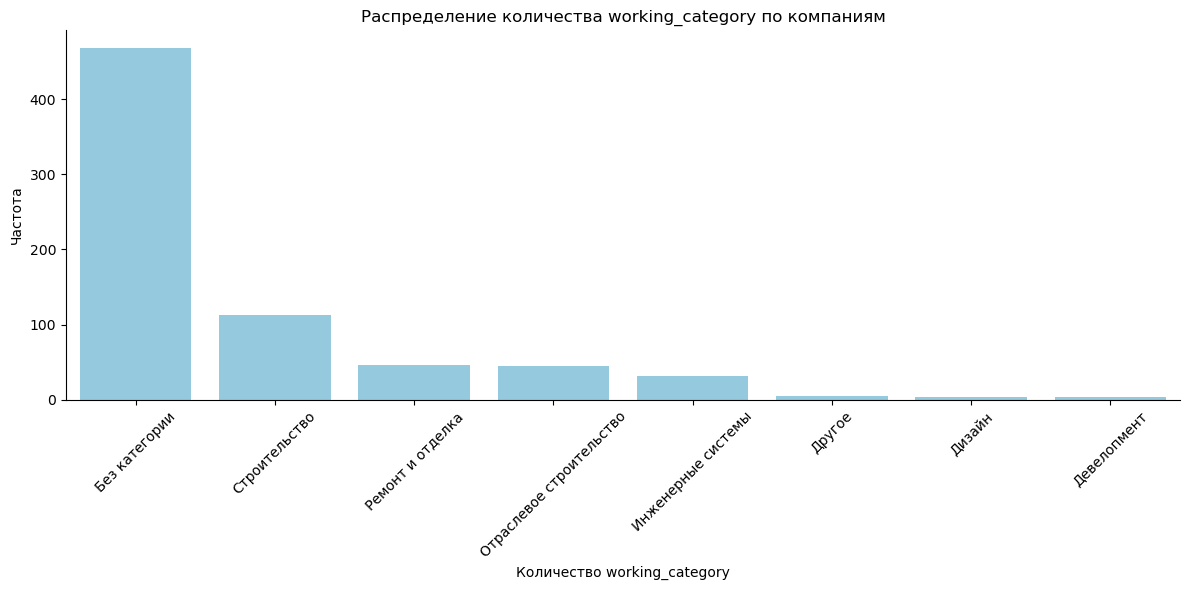

In [124]:
# Визуализируем количество значений в столбце по их уникальности
cols_value_counts_viz(companies, 'working_category')

In [125]:
dataset = companies['employer_count_interval']
unique_describe(dataset)

count    716.000000
mean       1.519553
std        1.031481
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        8.000000
Name: employer_count_interval, dtype: float64

'Количество уникальных значений: 8'

employer_count_interval
1    492
2    146
3     46
4     14
5      9
Name: count, dtype: int64

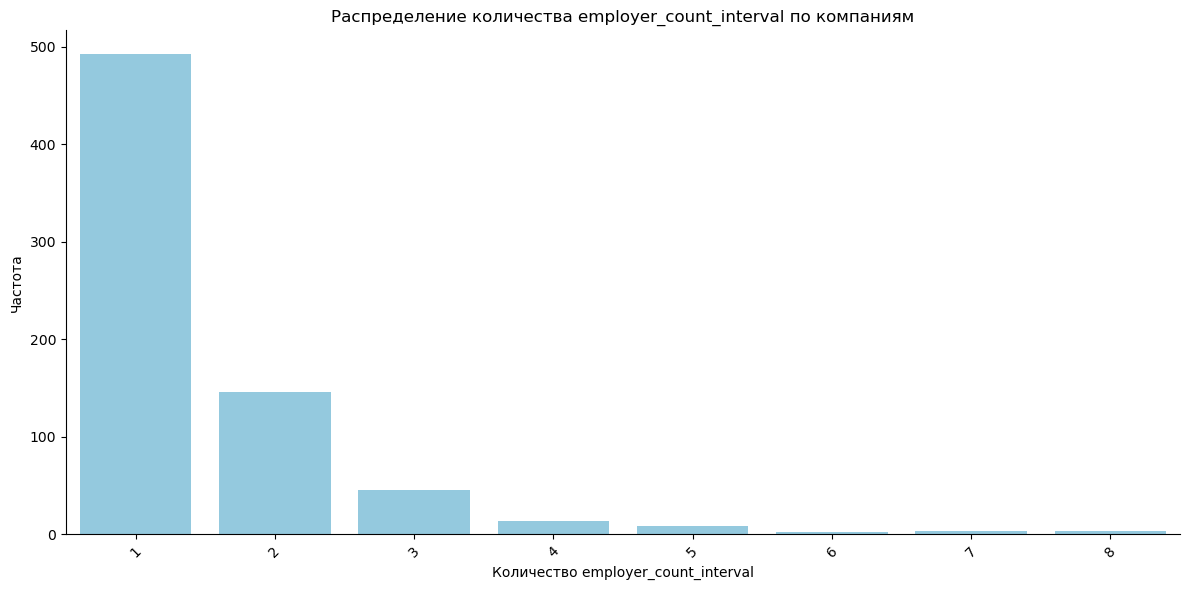

In [126]:
# Визуализируем количество значений в столбце по их уникальности
cols_value_counts_viz(companies, 'employer_count_interval')

Чаще всего сервисом пользуются небольшие компании численностью от 1 до 4 человек. Добавим столбец с разъяснениями по количеству человек согласно известному интервалу.

In [127]:
# Определим функцию для категоризации количества сотрудников компаний
def add_employer_interval(employer_count_interval):
    if employer_count_interval == 1:
        return '1-4'
    elif employer_count_interval == 2:
        return '5-10'
    elif employer_count_interval == 3:
        return '11-20'
    elif employer_count_interval == 4:
        return '21-30'
    elif employer_count_interval == 5:
        return '31-50'
    elif employer_count_interval == 6:
        return '51-100'
    elif employer_count_interval == 7:
        return '101-200'
    else:
        return '>201'

companies['employer_interval'] = companies['employer_count_interval'].apply(add_employer_interval)

In [128]:
dataset = companies['created_at']
unique_describe(dataset)

count                              716
mean     2021-11-03 14:34:25.917597696
min                2019-01-23 14:00:51
25%      2020-12-28 01:21:36.750000128
50%         2021-10-12 09:56:09.500000
75%      2022-09-01 18:31:36.249999872
max                2024-02-07 12:56:09
Name: created_at, dtype: object

'Количество уникальных значений: 716'

created_at
2019-10-17 12:50:35    1
2022-10-05 08:58:49    1
2022-04-05 14:02:03    1
2020-06-10 17:10:02    1
2022-08-19 08:27:02    1
Name: count, dtype: int64

Первая компания в системе была зарегистрирована 2019-01-23, по датасету activities первый отчетный месяц у нас как раз 2019-01-01.

In [129]:
dataset = companies['updated_at']
unique_describe(dataset)

count                              716
mean     2023-04-08 21:00:40.752793344
min                2020-08-24 15:08:34
25%      2022-12-06 03:45:22.750000128
50%                2022-12-15 17:27:35
75%                2023-09-24 04:00:01
max                2024-03-13 10:44:24
Name: updated_at, dtype: object

'Количество уникальных значений: 507'

updated_at
2022-12-06 03:45:53    6
2022-12-06 03:44:29    6
2022-12-06 03:45:13    5
2022-12-06 03:45:19    5
2022-12-06 03:45:33    5
Name: count, dtype: int64

In [130]:
# Посмотрим на одну из повторяющихся дат
companies.query('updated_at == "2022-12-06 03:44:29"')

company_id working_direction  employer_count_interval          created_at          updated_at  billing_tariff_id  billing_is_over    working_category employer_interval
530        3463     Электромонтаж                        1 2021-05-29 20:51:17 2022-12-06 03:44:29                  7                1  Инженерные cистемы               1-4
531         667                 -                        3 2019-12-22 04:25:50 2022-12-06 03:44:29                  3                1       Без категории             11-20
532        3717                 -                        1 2021-07-07 17:27:51 2022-12-06 03:44:29                  7                1       Без категории               1-4
533        1848                 -                        1 2020-09-16 09:22:37 2022-12-06 03:44:29                  7                1       Без категории               1-4
534         589                 -                        1 2019-11-22 05:25:44 2022-12-06 03:44:29                  3                1       Без категории               1-4
535        1167                 -                        1 2020-05-29 00:01:47 2022-12-06 03:44:29                  7                1       Без категории               1-4

In [131]:
# Посмотрим на одну из компаний из среза выше в датасете billing
billing.query('company_id == 932')

user_id  company_id  billing_tariff_id         payed_until  is_payed          created_at          updated_at  billing_tariff_price_id                                                  comment pay_date tariff  tariff_price
901      1082         932                  4 2020-08-04 23:59:59         0 2020-04-21 07:53:14 2020-04-21 07:53:14                       14                                                      NaN      NaT  старт         17000
1094     1082         932                  4 2020-11-18 00:00:00         1 2020-04-21 08:24:12 2020-09-10 07:22:12                       15  10,09,20 - на 14 дней продлили после прохождения опроса      NaT  старт         17000
1180     1082         932                  4 2021-05-18 23:59:59         0 2020-11-16 13:02:01 2020-11-16 13:02:01                       15                                                      NaN      NaT  старт         17000
1189     1082         932                  4 2021-03-02 00:00:00         1 2020-11-16 13:01:55 2020-12-01 06:48:46                       14            01,12 - активировали пакет стартовый на 3 мес      NaT  старт         17000
1195     1082         932                  4 2021-02-24 23:59:59         0 2020-11-24 13:28:16 2020-11-24 13:28:16                       14                                                      NaN      NaT  старт         17000

Складывается впечатление, что в ночное время с какой-то периодичностью система сервиса обновляет данные о компаниях: истекла оплата или нет.

In [132]:
dataset = companies['billing_tariff_id']
unique_describe(dataset)

count    716.00000
mean       5.02095
std        3.44927
min        2.00000
25%        2.00000
50%        4.00000
75%        7.00000
max       21.00000
Name: billing_tariff_id, dtype: float64

'Количество уникальных значений: 13'

billing_tariff_id
2    321
7    266
9     46
4     36
3     11
Name: count, dtype: int64

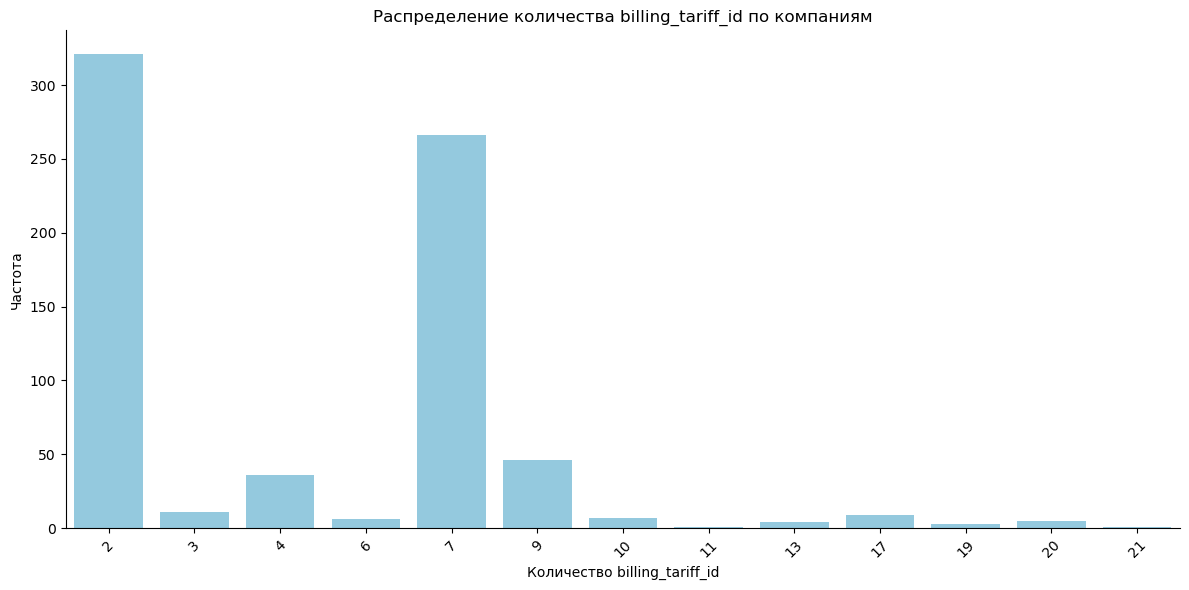

In [133]:
# Визуализируем количество значений в столбце по их уникальности
cols_value_counts_viz(companies, 'billing_tariff_id')

Тарифов 13, ранее мы уже изучили этот вопрос на примере датасета billing. Посмотрим, совпадают ли уникальные значения  в данном столбце в датасетах billing и companies.

In [134]:
print(sorted(billing['billing_tariff_id'].unique()) == sorted(companies['billing_tariff_id'].unique()))

True


Значения совпадают. Данные в столбце одни и те же.

In [135]:
dataset = companies['billing_is_over']
unique_describe(dataset)

count    716.000000
mean       0.671788
std        0.469891
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: billing_is_over, dtype: float64

'Количество уникальных значений: 2'

billing_is_over
1    481
0    235
Name: count, dtype: int64

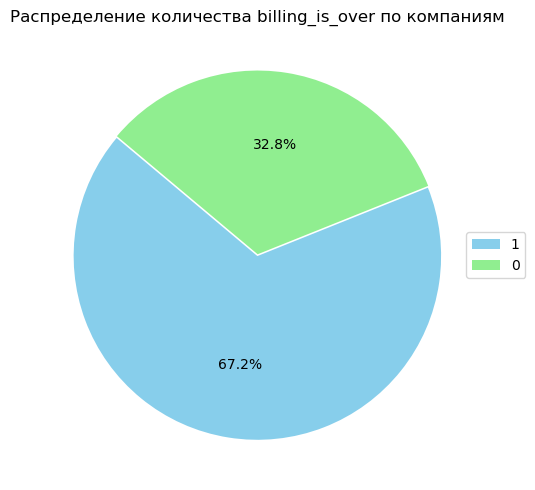

In [136]:
# Визуализируем количество значений в столбце по их уникальности
cols_value_counts_viz_pie(companies, 'billing_is_over')

Оплата не истекла у 32.8% клиентов. Если этим данным можно доверять, конечно.

<a id="6"></a>
### Датасет people

#### Проверим пропуски в датасете

In [137]:
# Вычислим долю пропусков данных в столбцах
pd.DataFrame(round(people.isna().mean() * 100, 5)).sort_values(by = 0).style.background_gradient()

В столбце user_id 25.2% пропусков, в deleted_at - 57.2% пропусков.

####  Корреляционный анализ данных на предмет поиска зависимостей между признаками и пропущенными значениями с помощью phik_matrix по датасету people

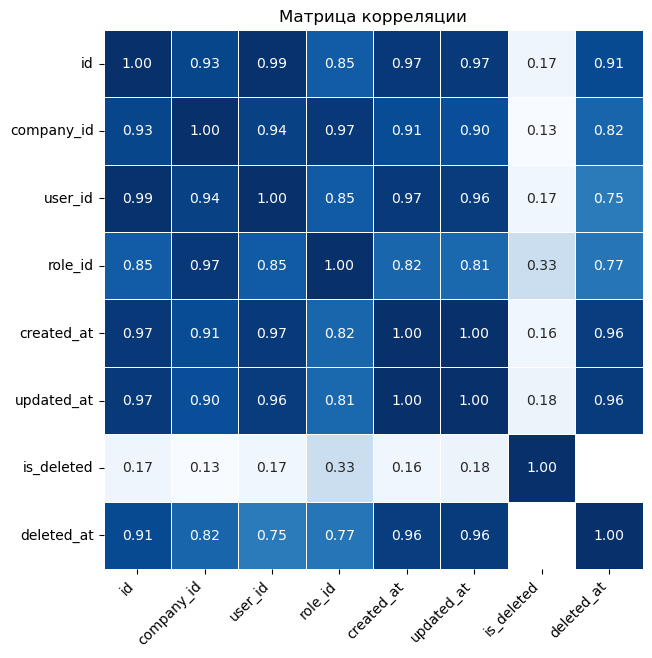

In [138]:
# Построим phik matrix
data_interval_cols=['id', 'company_id', 'user_id', 'role_id', 'created_at', 'updated_at', 'deleted_at']
matrix = phik_correlation(people, data_interval_cols)
matrix

По обоим столбцам user_id и deleted_at обнаружен весьма высокий уровеь корелляции со всеми признаками кроме is_deleted. Столбецы user_id и deleted_at несут довольно важную информацию о том, кто представляет компанию на платформе. Поэтому я бы отнесла данные пропуски к категории MAR или даже MNAR. Попробуем выделить company_id компаний, где есть пропуски в поле user_id и дозаполнить их, по возможности.

In [139]:
# Выделим id компаний, у которых есть пропуск в поле user_id
missing = people.query('user_id != user_id').company_id.unique()
print(missing[:5])

[ 495    1  667  694 1255]


In [140]:
# Посмотрим на информацию по одной из таких компаний
people.query('company_id == 495')

id  company_id  user_id  role_id  created_at  updated_at  is_deleted    deleted_at
0    6601         495      NaN     7133  1570535962  1570535962        True  1.594067e+09
501  4959         495    548.0        1  1570535695  1583435119       False           NaN
641  6614         495      NaN     7133  1570907087  1570907097        True  1.577265e+09
642  6615         495      NaN     7133  1570907113  1570907113        True  1.577265e+09
643  6616         495      NaN     7133  1570907164  1570907164        True  1.577265e+09
644  6679         495    506.0     7133  1574863949  1591867774       False           NaN
649  6710         495      NaN     7133  1577714217  1577714217        True  1.594067e+09
650  6712         495    768.0     7133  1577719935  1577719992        True  1.594067e+09

Мы видим, что помимо пропущенных значений есть строки, где user_id присутствует, даже 3 разных. Поэтому вряд ли получится дозаполнить пропуски таким образом. Попробуем с еще одной компанией.

In [141]:
people.query('company_id == 1')

id  company_id  user_id  role_id  created_at  updated_at  is_deleted    deleted_at
1    7025           1      NaN        1  1594120484  1594120484        True  1.594120e+09
525  5331           1      1.0        1  1548252051  1568036509       False           NaN
592  6222           1      NaN        5  1548450729  1548450729        True  1.548451e+09
593  6231           1      NaN        5  1548752398  1548752398        True  1.548752e+09
594  6233           1      NaN        5  1548752487  1548752487        True  1.548752e+09
595  6238           1      2.0        5  1548937386  1576065611       False           NaN
596  6339           1      NaN        5  1550310202  1550310202        True  1.557399e+09
597  6350           1      NaN        5  1550488319  1550488319        True  1.550488e+09
598  6472           1    382.0        5  1561462097  1561462208        True  1.587896e+09
599  6789           1      NaN        5  1584544684  1584544684        True  1.594116e+09
600  6272           1     81.0        5  1548949550  1549546368        True  1.594718e+09
601  6398           1    224.0        5  1551609547  1551620216        True  1.594718e+09
602  6223           1      NaN        5  1548450828  1548450828        True  1.594718e+09
603  6448           1      NaN        5  1558607431  1558607431        True  1.594718e+09
604  6463           1      NaN        5  1560759984  1560759984        True  1.594718e+09
605  6351           1      NaN        5  1550488479  1550488479        True  1.594718e+09
606  6230           1      NaN        5  1548685573  1548685573        True  1.594718e+09
607  6234           1      NaN        5  1548872939  1587847508        True  1.594718e+09
608  6237           1      NaN        5  1548937210  1576065615        True  1.594718e+09

Та же история. Оставляем эти пропуски как есть. В столбце deleted_at заполнить пропуски также не представляется возможным. Возможное количество сотрудников и ролей в компаниях изучим позднее.

#### Преобразуем типы данных, где необходимо

In [142]:
# Изменим тип данных в created_at, updated_at, deleted_at на datetime
cols_to_change = ['created_at', 'updated_at']
for col in cols_to_change:
    people[col] = pd.to_datetime(people[col], unit='s')
people['deleted_at'] = pd.to_datetime(people['deleted_at'], unit='s', errors='coerce')

# Изменим тип данных в столбцах is_deleted, user_id на integer
people['is_deleted'] = people['is_deleted'].replace({False: 0, True: 1})
people['user_id'] = pd.to_numeric(people['user_id'], errors='coerce').astype('Int32')

#### Изучим дубликаты  в датасете

In [143]:
# Проверим явные дубликаты в датасете
dataset = people
find_explicit_duplicates(dataset)

'Количество явных дубликатов: 0'

'Явные дубликаты не найдены'

In [144]:
# Проверим неявные дубликаты в датасете
dataset = people
columns_to_compare = ['company_id', 'created_at', 'updated_at', 'deleted_at']
find_implicit_duplicates(dataset, columns_to_compare)

id  company_id  user_id  role_id          created_at          updated_at  is_deleted          deleted_at
618  6400         218     <NA>     3126 2019-03-09 11:51:18 2019-03-09 11:51:18           0                 NaT
619  6401         218     <NA>     3126 2019-03-09 11:51:18 2019-03-09 11:51:18           0                 NaT
665  6992         589     <NA>     8479 2020-06-20 18:14:39 2020-06-20 18:14:39           0                 NaT
666  6993         589     <NA>     8479 2020-06-20 18:14:39 2020-06-20 18:14:39           0                 NaT
667  6994         589     <NA>     8479 2020-06-20 18:14:40 2020-06-20 18:14:40           0                 NaT
668  6995         589     <NA>     8479 2020-06-20 18:14:40 2020-06-20 18:14:40           0                 NaT
669  6996         589     <NA>     8479 2020-06-20 18:14:40 2020-06-20 18:14:40           0                 NaT
670  6997         589     <NA>     8479 2020-06-20 18:14:40 2020-06-20 18:14:40           0                 NaT
677  6681         639     <NA>     9215 2019-11-30 12:56:02 2019-11-30 12:56:02           0                 NaT
678  6682         639     <NA>     9215 2019-11-30 12:56:02 2019-11-30 12:56:02           0                 NaT
687  6737         667     <NA>     9614 2020-01-16 10:34:28 2020-01-16 10:34:28           1 2020-04-16 09:04:10
688  6738         667     <NA>     9614 2020-01-16 10:34:28 2020-01-16 10:34:28           1 2020-04-16 09:04:10

Судя по всему, перед нами неявные дубликаты, т.к. в одну и туже секунду нельзя завести двух разных пользователей в сервисе. Удалим компании с индексами 6401, 6993, 6995, 6996, 6997, 6682, 6738.

In [145]:
people = people.query('id not in [6401, 6993, 6995, 6996, 6997, 6682, 6738]')

#### Изучим уникальные значения в столбцах

In [146]:
dataset = people['id']
unique_describe(dataset)

count     5082.000000
mean     14172.720189
std       4524.236122
min       4828.000000
25%      10292.250000
50%      14443.000000
75%      18005.750000
max      21904.000000
Name: id, dtype: float64

'Количество уникальных значений: 5082'

id
6601     1
16849    1
16854    1
16847    1
16852    1
Name: count, dtype: int64

В данном столбце у нас предположительно индекс. Уникальные значения не повторяются. Довольно непонятный столбец, минимальное значение - 4828, максимальное - 21904. При количестве строк 5089. Хотелось бы узнать у заказчика, почему такая выгрузка и что это все-таки за данные, в противном случае столбец не представляет интереса для исследования, я удалю его.

In [147]:
people.drop('id', axis=1, inplace=True)

In [148]:
dataset = people['company_id']
unique_describe(dataset)

count    5082.000000
mean     4692.422275
std      2465.914158
min         1.000000
25%      2834.250000
50%      4610.000000
75%      6805.000000
max      9538.000000
Name: company_id, dtype: float64

'Количество уникальных значений: 706'

company_id
6806    55
3518    54
1255    48
3623    47
7527    45
Name: count, dtype: int64

Уникальных названий компаний у нас 706, на 10 меньше, чем в остальных трех датасетах.

In [149]:
dataset = people['user_id']
unique_describe(dataset)

count         3807.0
mean     7032.724192
std      3477.675301
min              1.0
25%           4150.0
50%           7214.0
75%           9973.5
max          12992.0
Name: user_id, dtype: Float64

'Количество уникальных значений: 3524'

user_id
1845     6
11726    5
718      5
9546     4
4885     4
Name: count, dtype: Int64

In [150]:
# Посмотрим на самый часто повторяющийся user_id
people.query('user_id == 1845')

company_id  user_id  role_id          created_at          updated_at  is_deleted          deleted_at
120          694     1845     9992 2020-08-10 12:02:41 2020-08-10 12:04:58           1 2020-08-10 12:05:30
121          694     1845     9992 2020-08-10 12:05:41 2020-08-10 12:05:41           1 2020-08-10 12:07:41
124          694     1845     9993 2020-08-10 14:00:42 2020-08-10 14:00:42           1 2020-08-10 14:36:04
126          694     1845     9995 2020-08-10 14:46:02 2020-08-10 14:46:02           1 2020-08-10 14:49:45
164          694     1845     9992 2020-08-10 12:08:47 2020-08-10 12:08:47           1 2020-08-10 14:00:31
1389         694     1845     9992 2020-08-10 14:50:50 2020-08-10 14:50:50           1 2021-07-08 12:13:49

Похоже, что тот, кто вносил данные не смог сразу определиться с ролью представителя компании. Если я права, то в сервисе нет возможности редактировать профиль? Можно только все время заново данные вводить?

In [151]:
# Посчитаем сколько пользователей регистрировалось на компанию
people_user_count = people.groupby('company_id')['user_id'].apply(lambda x: sum(pd.notnull(x))).reset_index()
people_user_count.columns = ['company_id', 'user_count']
people_user_count.sort_values(by='user_count', ascending=False)

company_id  user_count
279        3518          45
288        3623          44
87         1255          38
546        6806          38
306        3705          37
..          ...         ...
175        2507           1
421        5206           1
177        2547           1
419        5191           1
272        3473           1

[706 rows x 2 columns]

В некоторых компаниях пользователи добавлялись в больших количествах и некоторых их больше 30 (максимум по тарифу "профи").

In [152]:
# Посмотрим на компании, у которых пользователей более 30
people_user_count_more_30 = (people_user_count
                             .query('user_count >= 30')
                             .sort_values(by='user_count', ascending=False))
people_user_count_more_30

company_id  user_count
279        3518          45
288        3623          44
87         1255          38
546        6806          38
306        3705          37
281        3524          32

In [153]:
# Посчитаем, сколько из них было удалено (не считая пропусков в данных)
(people
 .query('company_id in [3518, 3623, 1255, 6806, 3705, 3524] & user_id.notna()')
 .groupby(['company_id', 'is_deleted'])
 .size()
 .unstack(fill_value=0)
)

is_deleted   0   1
company_id        
1255        14  24
3518        15  30
3524         3  29
3623        15  29
3705         1  36
6806        25  13

Больше 30 пользователей ни у кого не осталось. Интересно посмотреть на тарифы, похоже, что у компании 6806 тариф "профи", у 3623, 3518, 1255 может быть "бизнес" или тоже "профи".

In [154]:
(billing
 .query('company_id in [3518, 3623, 1255, 6806, 3705, 3524]')[['company_id', 'tariff']]
 .sort_values(by='company_id'))

company_id   tariff
3467        1255   бизнес
2750        1255   бизнес
3343        1255   бизнес
3288        1255   бизнес
2433        1255  базовый
1677        1255  базовый
1183        1255    старт
1197        1255  базовый
1136        1255  базовый
1128        1255  базовый
1007        1255  базовый
227         1255  базовый
1151        1255    старт
2708        3518    профи
3308        3518   бизнес
3314        3518   бизнес
2799        3518   бизнес
3325        3518    профи
2715        3518   бизнес
2714        3518   бизнес
60          3524    профи
2644        3524    старт
2643        3524    профи
189         3524    профи
2636        3524    старт
3307        3623   бизнес
1643        3705    профи
330         3705    профи
2625        6806    профи
2697        6806    профи

И вот я не угадала ничего кроме 6806. Что говорит нам о том, что в процессе lifetime компании на сервисе тарифы у компании могут меняться неоднократно в соответствии с запросом.

In [155]:
dataset = people['role_id']
unique_describe(dataset)

count      5082.000000
mean      46760.013381
std       42650.620940
min           1.000000
25%           1.000000
50%       44170.000000
75%       84976.500000
max      135350.000000
Name: role_id, dtype: float64

'Количество уникальных значений: 1411'

role_id
1        1596
65311      28
9614       23
96350      22
51380      21
Name: count, dtype: int64

О данных в этом столбце остается только гадать. Количество уникальных значений 1411 при максимуме 135350...Какая профессия скрывается под номером - непонятно, могу предположить, что под самым часто используемым номером 1 скрывается владелец компании или ее директор. Возникает вопрос: если какой-то выпадающий список с role_id для выбора или клиент сам вписывает что захочет? И кто заполняет профиль, представитель сервиса или клиент?

In [156]:
# Посчитаем сколько ролей регистрировалось на компанию
people_role_count = people.groupby('company_id')['role_id'].apply(lambda x: sum(pd.notnull(x))).reset_index()
people_role_count.columns = ['company_id', 'role_count']
people_role_count.sort_values(by='role_count', ascending=False)

company_id  role_count
546        6806          55
279        3518          54
87         1255          48
288        3623          47
597        7527          45
..          ...         ...
438        5380           1
23          496           1
272        3473           1
285        3596           1
378        4651           1

[706 rows x 2 columns]

In [157]:
# Посмотрим на компании, у которых ролей более 30
people_role_count_more_30 = (people_role_count
                             .query('role_count >= 30')
                             .sort_values(by='role_count', ascending=False))
people_role_count_more_30

company_id  role_count
546        6806          55
279        3518          54
87         1255          48
288        3623          47
597        7527          45
281        3524          44
306        3705          41
561        7052          37
374        4610          35
396        4902          33
558        6989          33
541        6712          32
434        5322          31
242        3224          30

Частично присутствуют все те же компании, что и с user_id, но значения отличаются. Что говорит о том, что роли у одного пользователя, вероятно, могли меняться.

In [158]:
# Посчитаем уникальные значения в role_id
people['role_id'].value_counts()

role_id
1         1596
65311       28
9614        23
96350       22
51380       21
          ... 
66140        1
42716        1
30050        1
67972        1
131246       1
Name: count, Length: 1411, dtype: int64

In [159]:
# Посмотрим на миниальное значение после 1
people.query('role_id != 1')['role_id'].min()

5

In [160]:
# Проверим, у каждой ли компании есть role_id = 1
# Получаем уникальные компании
unique_companies = companies['company_id'].unique()

# Создаем список для хранения результатов проверки
companies_with_role_1 = []

# Перебираем уникальные компании
for company_id in unique_companies:
    # Проверяем наличие хотя бы одного role_id равного 1 для текущей компании
    if 1 in people.loc[people['company_id'] == company_id, 'role_id'].values:
        companies_with_role_1.append(company_id)

print('Количество уникальных компаний:', len(unique_companies))
print('Количество компаний с role_id = 1:', len(companies_with_role_1))

Количество уникальных компаний: 716
Количество компаний с role_id = 1: 706


У нас изначально в таблице people, откуда столбец role_id было на 10 уникальных значений company_id меньше. И я предполагаю, что role_id = 1 - это вообще главный человек, несущий ответственность за компанию на платформе.
Остановлюсь на мысли, что 1 - это главный представитель клиента/владелец/директор/главный бухгалтер/человек, уполномоченный принимать решения. Также понятно, что нумерация у нас идет не по порядку, есть пробелы. Возникла мысль, что эти id могут быть id ролей, выгруженных из какой-то другой системы, например, "Общероссийского классификатора профессий рабочих, должностей служащих и тарифных разрядов (ОКПДТР)", и выпадающий список у сервиса все-таки есть...Или эти id - это часть номера в "Национальном реестре специалистовв области строительства" (https://nrs.nostroy.ru). Это бы объяснило такой разброс значений.

In [161]:
dataset = people['created_at']
unique_describe(dataset)

count                             5082
mean     2022-03-30 20:25:24.159779584
min                2019-01-23 14:00:51
25%                2021-06-08 03:10:35
50%         2022-04-11 08:00:37.500000
75%      2023-03-15 10:49:41.750000128
max                2023-12-13 14:41:23
Name: created_at, dtype: object

'Количество уникальных значений: 5013'

created_at
2022-08-31 12:43:11    5
2020-07-15 13:38:22    3
2023-06-02 10:38:38    3
2020-04-24 05:41:40    3
2021-08-12 04:07:52    3
Name: count, dtype: int64

Первая запись в датасете создана в тот же день и время, что и в датасете companies в аналогичном столбце. Можно предположить, что данные в них заполняются одновременно.

In [162]:
dataset = people['updated_at']
unique_describe(dataset)

count                             5082
mean     2022-04-11 16:20:49.062180096
min                2019-01-25 21:12:09
25%                2021-06-17 05:50:43
50%                2022-04-19 10:41:01
75%      2023-03-29 12:32:16.750000128
max                2023-12-13 14:42:02
Name: updated_at, dtype: object

'Количество уникальных значений: 5056'

updated_at
2022-08-31 12:43:11    4
2021-08-12 04:07:52    3
2020-07-15 13:38:22    3
2020-04-19 09:24:10    2
2022-02-17 12:02:08    2
Name: count, dtype: int64

Ничего необычного пока не вижу, кроме того, что апдейтов много. Что именно апдейтят, пользователей или роли?

In [163]:
dataset = people['is_deleted']
unique_describe(dataset)

count    5082.000000
mean        0.429359
std         0.495033
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: is_deleted, dtype: float64

'Количество уникальных значений: 2'

is_deleted
0    2900
1    2182
Name: count, dtype: int64

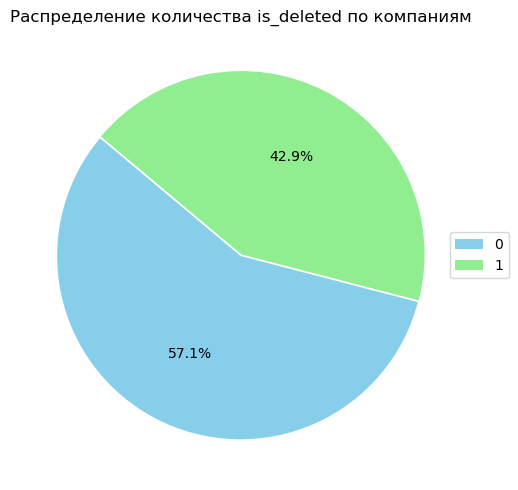

In [164]:
# Визуализируем количество значений в столбце по их уникальности
cols_value_counts_viz_pie(people, 'is_deleted')

Неудаленных представителей компаний больше, чем удаленных.

In [165]:
dataset = people['deleted_at']
unique_describe(dataset)

count                             2179
mean     2022-06-20 21:20:38.350160640
min                2019-01-25 21:13:48
25%                2021-09-09 11:48:22
50%                2022-08-03 06:08:55
75%                2023-05-18 13:38:56
max                2023-12-13 14:37:32
Name: deleted_at, dtype: object

'Количество уникальных значений: 2171'

deleted_at
2019-12-25 09:10:58    3
2020-06-17 11:57:32    3
2020-04-16 09:04:10    3
2019-12-25 09:11:37    2
2020-04-07 06:21:53    2
Name: count, dtype: int64

В данном столбце тоже пока ничего необычного.

In [166]:
# Сверяем наши данные по количеству строк по окончанию обработки данных в датасетах
a1, b1 = len(temp1), len(activities)
print(len(temp1), len(activities), round((a1 - b1) / a1 * 100, 2))

a2, b2 = len(temp2), len(billing)
print(len(temp2), len(billing), round((a2 - b2) / a2 * 100, 2))

a3, b3 = len(temp3), len(companies)
print(len(temp3), len(companies), round((a3 - b3) / a3 * 100, 2))

a4, b4 = len(temp4), len(people)
print(len(temp4), len(people), round((a4 - b4) / a4 * 100, 2))

6316 6316 0.0
3480 3478 0.06
723 716 0.97
5095 5082 0.26


**Вывод:**

В рамках этапа предобработки данных были сделаны следующие изменения:
- датасет activities:
  - был изменен тип данных в столбце month на datetime, в столбцах company-month-billing, company-month-stocks, company-month-backups, company-month-projects, company-month-contractors, company-month-resource_orders на integer;
  - названия столбцов приведены к единой стилистике;
  - данные проверены на пропуски. Пропуски не обнаружены;
  - данные проверены на явные и неявные дубликаты. Дубликаты не обнаружены.
  - изучены уникальные значения в столбцах;
  - добавлен столбец year с выделенным из даты годом;
  - потенциально наиболее полезные столбцы: company_id, month, company_month_projects;
  - потенциально наименее полезные столбцы: company_month_backups (кто-то делал каждый день, даже при отсутствии проектов, кто-то не делал вообще).
- датасет billing:
  - yдалены столбцы 'Unnamed: 0' и 'id';
  - данные проверены на пропуски. В столбцах comment и pay_date обнаружено большое количество пропусков (78.6% и 68.2% соответственно);
  - проведен корреляционный анализ данных на предмет поиска зависимостей между признаками и пропущенными значениями с помощью phik_matrix:
    - пропуски в столбце comment имеют весьма высокую корреляцию с такими признаками как id, payed_until, craeted_at, updated_at, billing_tariff_price_id и заметную с признаком is_payed. Эти пропуски явно можно отнести к категории MAR. Пропуски скорее всего зависят от статуса оплаты очередной подписки. Комментарий вносится в случае поступления оплаты или необходимости зафиксировать каки-либо договоренности, но сам пропуск на другие признаки не влияет. Поставлена заглушка;
    - пропуски в столбце pay_date имеют весьма высокую корреляцию с такими признаками как id, user_id, company_id, billing_tariff_id, payed_until, created_at, updated_at, billing_tariff_price_id. Эти пропуски также можно отнести к категории MAR. В случае, если счет оплачен, но в столбце payed_id информация не зафиксирована, это может вызвать проблему с доступом к аккаунту, например. Но пропуски скорее всего зависят от факта оплаты компанией очередной подписки, чем от какого-то умышленного сокрытия информации. Если заполнение данных об оплате происходит автоматически, то пропуск означает, что оплаты нет. Если вручную, то возможны варианты, могли не успеть внести, могли случайно пропустить, ну или опять же оплаты нет. Оставили пропуски без изменений.
  - был изменен тип данных в столбцах payed_until, created_at, updated_at, pay_date на datetime, в столбцах is_payed, billing_tariff_price_id на integer;
  - данные проверены на явные и неявные дубликаты. Обнаружен и удален один неявный дубликат;
  - изучены уникальные значения в столбцах. По результатам изучения записей в столбце comment можно сделать следующие выводы:
    - можно опатить счет, но активировать тариф по запросу;
    - с компаниями идет постоянная работа, поддерживается связь, видимо, происходит обзвон должников и сервис довольно лояльно относится к небольшим задержкам в оплате;
    - при необходимости возможен перерасчет и возврат денежных средств;
    - бонусы в виде дополнительного бесплатного периода, например, за видео-кейс (явно какие-то маркетинговые акции);
    - бывают скидки;
    - доступ могут заблокировать при невыполнении каких-то обязательных условий пользования сервисом;
    - тариф можно заморозить по запросу;
    - можно оплачивать тариф частями;
    - есть пробный 7-дневный базовый тариф;
    - тариф можно поменять уже после оплаты с доплатой и без доплаты (по какой-то личной договоренности с сотрудником компании);
    - компенсация недопонимания между клиентом и службой поддержки в виде бонусных месяцев;
    - можно перенести доступ на другую компанию по запросу и т.д.
  - добавлены столбцы tariff (тарифная группа) и tariff_price (цена тарифа);
  - потенциально наиболее полезные столбцы: company_id, tariff, billing_tariff_id, billing_price_tariff_id, payed_until, pay_date;
  - потенциально наименее полезные столбцы: user_id, is_payed (не является достоверным фактом оплаты услуги), updated_at (назначение столбца неясно);
- датасет companies:
  - данные проверены на пропуски. В столбце working_direction 3 пропуска и 7 пропусков в billing_tariff_id;
  - проведен корреляционный анализ данных на предмет поиска зависимостей между признаками и пропущенными значениями с помощью phik_matrix:
    - пропуски в столбце working_direction имеют заметную и высокую корреляцию с created_at (54%), employer_count_interval (71%). Вероятно, эти пропуски из категории MAR, сфера деятельности зависит от того, насколько компания крупная по численности сотрудников. Возможно, мелкие компании не знали, как определить сферу деятельности. В любом случае, пропусков слишком мало, чтобы делать какие-то выводы. В данном стобце, в целом по данным, либо определена сфера деятельности, либо стоит прочерк (дефис), поэтому заполним пропуски дефисами;
    - пропуски в столбце billing_tariff_id не показывают сколько-нибудь заметных корреляций с другими данными, скорее всего это случайные пропуски. После проверки id компаний из строк с этими пропусками выяснилось, что 6 из 7 этих компаний присутствуют только в датасете people, пользователей c id этих компаний также нет нигде. Были удалены 7 строк с пропусками.
  - определили, что столбец company_id в датасетах является первичным ключом в случае объединия датасетов;
  - был изменен тип данных в столбцах created_at, updated_at на datetime,  в столбцах billing_is_over, employer_count_interval, billing_tariff_id на integer;
  - данные проверены на явные и неявные дубликаты. Дубликаты не обнаружены;
  - изучены уникальные значения в столбцах. В столбце workind_direction были исправлены орфографические и пунктуационные ошибки, что позволило сократить количество уникальных значений со 169 до 140;
  - добавлен столбец employer_interval с интервалом количества сотрудников, столбец working_category с категорией деятельности компании;
  - потенциально наиболее полезные столбцы: company_id, working_category, employer_interval, created_at, billing_tariff_id;
  - потенциально наименее полезные столбцы: billing_is_over.  
- датасет people:
  - удален столбец 'id';
  - данные проверены на пропуски. В столбце user_id 25.2% пропусков, в deleted_at - 57.2% пропусков;
  - проведен корреляционный анализ данных на предмет поиска зависимостей между признаками и пропущенными значениями с помощью phik_matrix:
    - по обоим столбцам user_id и deleted_at обнаружен весьма высокий уровеь корелляции со всеми признаками кроме is_deleted. Столбецы user_id и deleted_at несут довольно важную информацию о том, кто представляет компанию на платформе. Поэтому я бы отнесла данные пропуски к категории MAR или даже MNAR. Оставила пропуски без изменений.
  - был изменен тип данных в столбцах created_at, updated_at, deleted_at на datetime, в столбцах is_deleted, user_id на integer;
  - данные проверены на явные и неявные дубликаты. Явные дубликаты не обнаружены. Обнаружено и удалено 7 строк с неявными дубликатами;
  - изучены уникальные значения в столбцах;
  - выяснили, что role_id = 1 есть у каждой уникальной компании. Остановлись на мысли, что 1 - это главный представитель клиента/владелец/директор/главный бухгалтер/человек, уполномоченный принимать решения. Также понятно, что нумерация идет не по порядку, есть пробелы. Возникла мысль, что эти id могут быть id ролей, выгруженных из какой-то другой системы, например, "Общероссийского классификатора профессий рабочих, должностей служащих и тарифных разрядов (ОКПДТР)" или "Национального реестра специалистовв области строительства"(https://nrs.nostroy.ru);
  - считаю, что данный датасет наименее полезен для нашего анализа. Максимум, что мы можем получить из него, это количество представителей компании, которые менялись на платформе и возможно, как-то связать их role_id c оттоком.
  
В результате предобработки было удалено 0.06% данных из датасета billing, 0.97% данных из датасета companies, 0.26%  данных из датасета people.

[Возврат к описанию проекта](#toc)

<a id="7"></a>
## Исследовательский анализ данных

<a id="8"></a>
### Подготовка целевой переменной

Поскольку в данном исследовании нас интересует причина оттока пользователей, значит нашей целевой переменной будет именно отток. Создадим в датасете billing столбец churn, будем считать, что клиент ушел в отток, если на дату начала исследования у него закончилась подписка.

In [167]:
# Добавим максимальную дату, до которой оплачен сервис
billing['last_date'] = billing.groupby('company_id')['payed_until'].transform('max')

In [168]:
# Считаем r_score - количество дней между датой анализа и датой, до которой оплачен сервис
billing['r_score'] = (analyse_date - billing['last_date']) / pd.Timedelta('1D')

На основании предыдущего вычисления формируем столбец с оттоком. Если значение в столбце r_score отрицательное, значит оплата еще активна, в противном случае считаем, что клиент ушел из сервиса (churn == 1).

In [169]:
billing['churn'] = billing['r_score'].apply(lambda cell: 0 if cell < 0 else 1)

In [170]:
# Если активность была на дату анализа, то значение в ячейке все равно будет отрицательным, поэтому
# отмечаем его как 1 (первый день)
billing['r_score'] = billing['r_score'].apply(lambda cell: 1 if cell < 0 else cell)

In [171]:
# Изменим тип данных в r_score на integer
billing['r_score'] = billing['r_score'].astype(int)

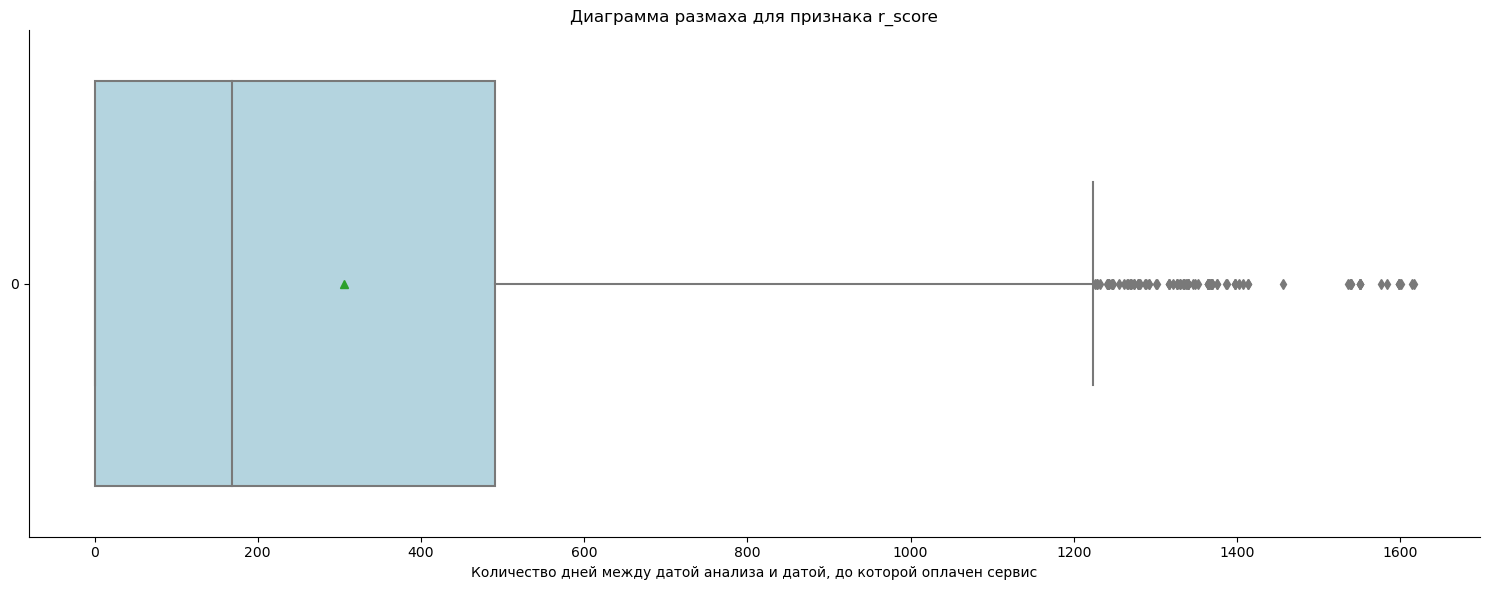

In [172]:
# Построим диаграмму размаха для столбца r_score с целью визуализации выбросов
plt.figure(figsize=(15, 6))

# Построение диаграммы размаха
sns.boxplot(data=billing['r_score'], palette=['lightblue'], showmeans=True, orient='h')
plt.title('Диаграмма размаха для признака r_score')
plt.xlabel('Количество дней между датой анализа и датой, до которой оплачен сервис')

sns.despine()
plt.tight_layout()

plt.show()

Для разбивки на категории мы не будем учитывать выбросы, чтобы определить границы интервалов по чистым данным.

In [173]:
# Рассчитываем первый и третий квартиль (25-й и 75-й перцентили) столбца r_score
q1, q3 = np.percentile(billing['r_score'], [25, 75])

# Вычисляем межквартильный размах как разницу между третьим и первым квартилями
iqr = q3 - q1

# Определяем верхнюю границу выбросов как значение, которое превышает третий квартиль плюс 1.5 межквартильных
# размаха
r_top = round(q3 + iqr * 1.5, 2)
r_top

1225.38

In [174]:
# Cоздаем список интервалов для разбиения данных на категории
r_bins = [0, *np.percentile(billing.query('r_score <= @r_top')['r_score'], [33, 66]), billing['r_score'].max()]
r_bins

[0, 1.0, 296.5400000000009, 1617]

In [175]:
# Cоздаем список меток категорий для каждого интервала
r_labels = [3, 2, 1]

# Разбиваем получившиеся данные по категориям и получаем ранг R (3 - хорошо, 2 - терпимо, 1 - плохо)
billing['R'] = pd.cut(billing['r_score'], labels=r_labels, bins=r_bins)

Компании с рейтингом 1 - это наша целевая аудитория для изучения. Они ушли из сервиса, выделим их в отдельный датасет после объединения датасетов.

<a id="9"></a>
### Объединение датасетов

Ранее мы уже проверили, что столбец company_id в датасетах является первичным ключом, по которому мы можем эти датасеты объединить.

In [176]:
# Посмотрим еще раз на количество уникальных значений по столбцу c уникальными идентификаторами компании
# во всех датасетах
print('activities:',len(activities['company_id'].unique()))
print('billing:',len(billing['company_id'].unique()))
print('companies:',len(companies['company_id'].unique()))
print('people:',len(people['company_id'].unique()))

activities: 716
billing: 1841
companies: 716
people: 706


In [177]:
# Проверим сначала датасеты activities и companies на совпадение уникальных значений, так как по количеству
# уникальных значений они одинаковы
print(sorted(activities['company_id'].unique()) == sorted(companies['company_id'].unique()))

True


Итак, эти два датасета по столбцу company_id совпали.

In [178]:
# Будем ориентироваться на датасет companies, посмотрим, каких id нет в таблице people
print(np.setdiff1d(activities['company_id'].unique(), people['company_id'].unique()))
print(np.setdiff1d(people['company_id'].unique(), companies['company_id'].unique()))

[9623 9626 9683 9698 9742 9777 9802 9815 9817 9931]
[]


In [179]:
# Посмотрим на последние 15 уникальных значений по столбцам сompany_id в датасетах сompanies и people
unique_company_ids_people = sorted(people['company_id'].unique())
print('people:',unique_company_ids_people[-5:])
unique_company_ids_copmanies = sorted(companies['company_id'].unique())
print('companies:',unique_company_ids_copmanies[-15:])

people: [9402, 9457, 9471, 9524, 9538]
companies: [9402, 9457, 9471, 9524, 9538, 9623, 9626, 9683, 9698, 9742, 9777, 9802, 9815, 9817, 9931]


Как и ожидалось, в датасете people не хватает последних 10 id компаний, возможно, не успели внести изменения.

In [180]:
# Проверим расхождения для датасетов companies, billing
print(np.setdiff1d(companies['company_id'].unique(), billing['company_id'].unique()))
print(np.setdiff1d(billing['company_id'].unique(), companies['company_id'].unique()))
print(len(np.setdiff1d(billing['company_id'].unique(), companies['company_id'].unique())))

[]
[    5     6    11 ... 10077 10848 10851]
1125


Итак, все company_id датасета companies входят в company_id billing, но в нем есть 1125 уникальных значений, которых нет в других датасетах.

Я разобью датасет billing на две части. Часть, где значения по company_id совпадают с другими датасетами, я с ними объединю (кроме people) и буду работать с новым датасетом для выявления причин оттока. Из датасета people я присоединю только столбец role_id. Остальные столбцы для нашего исследования, как мне кажется, интереса не представляют.

In [181]:
# Создаем лист уникальных company_id из датасета activities
unique_company_ids_companies = activities['company_id'].unique()

# Фильтруем датасет billing по критерию соответствия company_id
matching_billing = billing[billing['company_id'].isin(unique_company_ids_companies)].reset_index(drop=True)
non_matching_billing = billing[~billing['company_id'].isin(unique_company_ids_companies)].reset_index(drop=True)

# Выводим информацию о длине каждой выборки
print('Длина датасета с совпадающими значениями:', len(matching_billing))
print('Длина датасета с несовпадающими значениями:', len(non_matching_billing))

# Выводим информацию о количестве уникальных значений в каждой выборке
print(len(matching_billing['company_id'].unique()))
print(len(non_matching_billing['company_id'].unique()))

Длина датасета с совпадающими значениями: 1651
Длина датасета с несовпадающими значениями: 1827
716
1125


In [182]:
# Сгруппируем датасет activities перед объединением
cols_for_list = ['year']
cols_for_count = ['month']
cols_for_sum = ['company_month_billing', 'company_month_stocks', 'company_month_backups',
                'company_month_projects', 'company_month_contractors', 'company_month_resource_orders']
activities_grouped = (activities
                   .groupby('company_id')
                   .agg({**{col: lambda x: list(x) for col in cols_for_list},
                         **{col: 'count' for col in cols_for_count},
                         **{col: 'sum' for col in cols_for_sum}})
                   .reset_index()
                     )

In [183]:
# Сгруппируем датасет people перед объединением
people_grouped = people.groupby('company_id').agg(lambda x: list(x)).reset_index()

In [184]:
# Посмотрим на размерность наших датасетов перед объединением
display(activities_grouped.shape)
display(matching_billing.shape)
display(companies.shape)
display(people_grouped.shape)

(716, 9)

(1651, 16)

(716, 9)

(706, 7)

In [185]:
# Объединим датасеты
all_data = (activities_grouped
            .merge(matching_billing, on='company_id', how='left')
            .merge(companies, on='company_id', how='left')
            .merge(people_grouped[['company_id', 'role_id']], on='company_id', how='left')
            .reset_index(drop=True)
           )
# Проверим размерность датасета после объединения
all_data.shape

(1651, 33)

In [186]:
# Выведем список столбцов
all_data.columns

Index(['company_id', 'year', 'month', 'company_month_billing',
       'company_month_stocks', 'company_month_backups',
       'company_month_projects', 'company_month_contractors',
       'company_month_resource_orders', 'user_id', 'billing_tariff_id_x',
       'payed_until', 'is_payed', 'created_at_x', 'updated_at_x',
       'billing_tariff_price_id', 'comment', 'pay_date', 'tariff',
       'tariff_price', 'last_date', 'r_score', 'churn', 'R',
       'working_direction', 'employer_count_interval', 'created_at_y',
       'updated_at_y', 'billing_tariff_id_y', 'billing_is_over',
       'working_category', 'employer_interval', 'role_id'],
      dtype='object')

In [187]:
# Удалим некоторые столбцы: updated_at_x, employer_count_interval, billing_tariff_id_y, working_direction
columns_to_drop = ['updated_at_x', 'employer_count_interval', 'billing_tariff_id_y', 'working_direction',
                  'is_payed', 'billing_is_over', 'comment']
all_data.drop(columns_to_drop, axis=1, inplace=True)

In [188]:
# Переименуем некоторые столбцы
all_data = all_data.rename(columns={'company_month_billing':'month_billing', 'company_month_stocks':'month_stocks',
                                    'company_month_backups':'month_backups',
                                    'company_month_projects':'month_projects',
                                    'company_month_contractors':'month_contractors',
                                    'company_month_resource_orders':'month_resource_orders',
                                    'billing_tariff_id_x':'tariff_id','created_at_x':'b_created_at',
                                    'billing_tariff_price_id':'tariff_price_id',
                                    'created_at_y':'c_created_at', 'updated_at_y':'c_updated_at'})

In [189]:
# Проверим получившийся датасет на пропуски
all_data.isna().sum().sort_values()

company_id                 0
working_category           0
c_updated_at               0
c_created_at               0
R                          0
churn                      0
r_score                    0
last_date                  0
tariff_price               0
tariff                     0
tariff_price_id            0
employer_interval          0
b_created_at               0
tariff_id                  0
user_id                    0
month_resource_orders      0
month_contractors          0
month_projects             0
month_backups              0
month_stocks               0
month_billing              0
month                      0
year                       0
payed_until                0
role_id                   12
pay_date                 788
dtype: int64

In [190]:
# Вычислим долю пропусков данных в столбцах
pd.DataFrame(round(all_data.isna().mean() * 100, 5)).sort_values(by = 0).style.background_gradient()

Как и ожидалось, пропуски у нас есть в столбце pay_date и в role_id, где не хватает 10 уникальных компаний. Ничего с ними не делаем.

Компании с R=1 - это наша целевая аудитория для изучения. Они ушли из сервиса, выделяем их в отдельный датасет.

In [191]:
left_clients = all_data.query('R == 1').reset_index(drop=True)

In [192]:
# Проверяем, есть ли среди них компании с активной оплатой
left_clients[left_clients['churn'] == 0]

Empty DataFrame
Columns: [company_id, year, month, month_billing, month_stocks, month_backups, month_projects, month_contractors, month_resource_orders, user_id, tariff_id, payed_until, b_created_at, tariff_price_id, pay_date, tariff, tariff_price, last_date, r_score, churn, R, c_created_at, c_updated_at, working_category, employer_interval, role_id]
Index: []

[0 rows x 26 columns]

Таких нет.

In [193]:
# Посмотрим на основную информацию о получившемся датасете
left_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   company_id             686 non-null    int64         
 1   year                   686 non-null    object        
 2   month                  686 non-null    int64         
 3   month_billing          686 non-null    int64         
 4   month_stocks           686 non-null    int64         
 5   month_backups          686 non-null    int64         
 6   month_projects         686 non-null    int64         
 7   month_contractors      686 non-null    int64         
 8   month_resource_orders  686 non-null    int64         
 9   user_id                686 non-null    int64         
 10  tariff_id              686 non-null    int64         
 11  payed_until            686 non-null    datetime64[ns]
 12  b_created_at           686 non-null    datetime64[ns]
 13  tarif

In [194]:
# Изменим тип данных в R на integer
all_data['R'] = pd.to_numeric(all_data['R'], errors='coerce').astype('Int32')
left_clients['R'] = pd.to_numeric(left_clients['R'], errors='coerce').astype('Int32')

In [195]:
display(f'Количество уникальных значений company_id: {len(left_clients["company_id"].unique())}')

'Количество уникальных значений company_id: 318'

<a id="10"></a>
### Анализ числовых признаков датасетов left_clients и all_data

Числовые признаки в полученном датасете следующие:
- company_id;
- month;
- month_billing;
- month_stocks;
- month_backups;
- month_projects;
- month_contractors;
- month_resource_orders;  
- user_id;
- tariff_id;
- tariff_price_id;
- tariff_price;
- r_score.

Временные признаки в полученном датасете следующие:
- month;
- payed_until;
- b_created_at;
- pay_date;
- c_created_at;
- c_updated_at;
- last_date.

In [196]:
# Определим функцию для подсчета средних значений
def count_means(continuous_cols, discrete_cols, binary_cols, object_cols, data, column):
    '''
    Функция предназначена для агрегаций значений выбранных солбцов с помощью различных функций:
    - группировка данных по столбцу column;
    - агрегация значений столбцов с помощью различных функций:
      - для непрерывных признаков берется среднее значение;
      - для дискретных признаков берется медиана;
      - для бинарных признаков также берется среднее значение;
      - для категориальных признаков берется мода (наиболее часто встречающееся значение).
    - округление всех значений до двух знаков после запятой;
    - сброс индексов группы и переиндексация для удобства;
    - транспонирование полученной таблицы для удобства чтения и отображения;
    - возвращение результата в виде таблицы.
    '''
    table_name = (data
                 .groupby(column)
                 .agg({**{col: 'median' for col in continuous_cols},
                       **{col: 'mean' for col in discrete_cols},
                       **{col: 'mean' for col in binary_cols},
                       **{col: lambda x: x.mode().iloc[0] for col in object_cols}})
                 .round(2)
                 .reset_index()
                 .T)
    return table_name

In [197]:
# Определим функцию для визуализации данных для столбцов с непрерывными и дискретными данными для датасета
# left_clients
def plots_for_numerical_data_left(data, feature, target_feature):
    '''
    Функция предназначена для визуализации непрерывных и дискретных данных:
    - используем функцию plt.subplots для создания фигуры и массива подзаголовков. Указываем, что у нас
    будет 1 строка и 2 столбца (nrows=1, ncols=2), что означает, что у нас будет два графика рядом друг с другом.
    Также указываем размеры фигуры (figsize=(15, 8));
    - используем sns.kdeplot для построения графика для значений признака feature, разделенных по
    значениям целевого признака target_feature;
    - гистограммы для двух значений target_feature (0 и 1) строятся на одном графике;
    - устанавливаем заголовок (set_title), метки осей (set_xlabel, set_ylabel) и легенду (legend) для
    обозначения соответствия между гистограммами и значениями целевого признака;
    - используем sns.boxplot для построения диаграммы размаха для значений признака feature, разделенных по
    значениям целевого признака target_feature;
    - каждой категории в target_feature (0 и 1) соответствует ящик с усами на графике, отображающий
    интерквартильный размах и медиану. Устанавливаем заголовок (set_title), метки осей (set_xlabel, set_ylabel),
    метки для значений по оси x (set_xticks, set_xticklabels), которые соответствуют значениям целевого признака,
    и название легенды.
    - используем suptitle для добавления общего заголовка к графикам;
    - используем sns.despine() для удаления основных и правых рамок графика;
    - используем plt.tight_layout() для улучшения расположения подзаголовков на графике;
    - используем plt.show() для отображения созданных графиков.
    '''
    fig, axes = plt.subplots(nrows=2, figsize=(8, 5))
    axes = axes.flatten()

    # Построение графиков
    sns.kdeplot(data=data[data[target_feature]==1][feature], ax=axes[0], palette='blue',
                common_norm=False, bw_adjust=0.5, fill=True)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Частота')


    # Построение диаграммы размаха
    sns.boxplot(data=data, y=target_feature, x=feature, ax=axes[1],
                palette=['lightblue'], showmeans=True, orient='h')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Отток')

    plt.suptitle(f'Распределение оттока для признака "{feature}"', y=1.02, fontsize=12)

    sns.despine()
    plt.tight_layout()

    plt.show()

In [198]:
# Определим функцию для визуализации данных для столбцов с непрерывными и дискретными данными для датасета
# all_data
def plots_for_numerical_data_all(data, feature, target_feature, label1, label2):
    '''
    Функция предназначена для визуализации непрерывных и дискретных данных:
    - используем функцию plt.subplots для создания фигуры и массива подзаголовков. Указываем, что у нас
    будет 1 строка и 2 столбца (nrows=1, ncols=2), что означает, что у нас будет два графика рядом друг с другом.
    Также указываем размеры фигуры (figsize=(15, 8));
    - используем sns.kdeplot для построения графика для значений признака feature, разделенных по
    значениям целевого признака target_feature;
    - гистограммы для двух значений target_feature (0 и 1) строятся на одном графике;
    - устанавливаем заголовок (set_title), метки осей (set_xlabel, set_ylabel) и легенду (legend) для
    обозначения соответствия между гистограммами и значениями целевого признака;
    - используем sns.boxplot для построения диаграммы размаха для значений признака feature, разделенных по
    значениям целевого признака target_feature;
    - каждой категории в target_feature (0 и 1) соответствует ящик с усами на графике, отображающий
    интерквартильный размах и медиану. Устанавливаем заголовок (set_title), метки осей (set_xlabel, set_ylabel),
    метки для значений по оси x (set_xticks, set_xticklabels), которые соответствуют значениям целевого признака,
    и название легенды.
    - используем suptitle для добавления общего заголовка к графикам;
    - используем sns.despine() для удаления основных и правых рамок графика;
    - используем plt.tight_layout() для улучшения расположения подзаголовков на графике;
    - используем plt.show() для отображения созданных графиков.
    '''
    fig, axes = plt.subplots(nrows=2, figsize=(8, 5))
    axes = axes.flatten()

    # Построение графиков
    sns.kdeplot(data=data[data[target_feature]==0][feature], ax=axes[0], label=label1,
            color='blue', common_norm=False, bw_adjust=0.5, fill=True)
    sns.kdeplot(data=data[data[target_feature]==1][feature], ax=axes[0], label=label2,
            color='green', common_norm=False, bw_adjust=0.5, fill=True)
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Частота')
    axes[0].legend()

    # Построение диаграммы размаха
    sns.boxplot(data=data, y=target_feature, x=feature, hue=target_feature, ax=axes[1],
                palette=['lightblue', 'lightgreen'], showmeans=True, orient='h')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Отток')

    plt.suptitle(f'Распределение оттока для признака "{feature}"', y=1.02, fontsize=12)
    sns.despine()
    plt.tight_layout()

    plt.show()

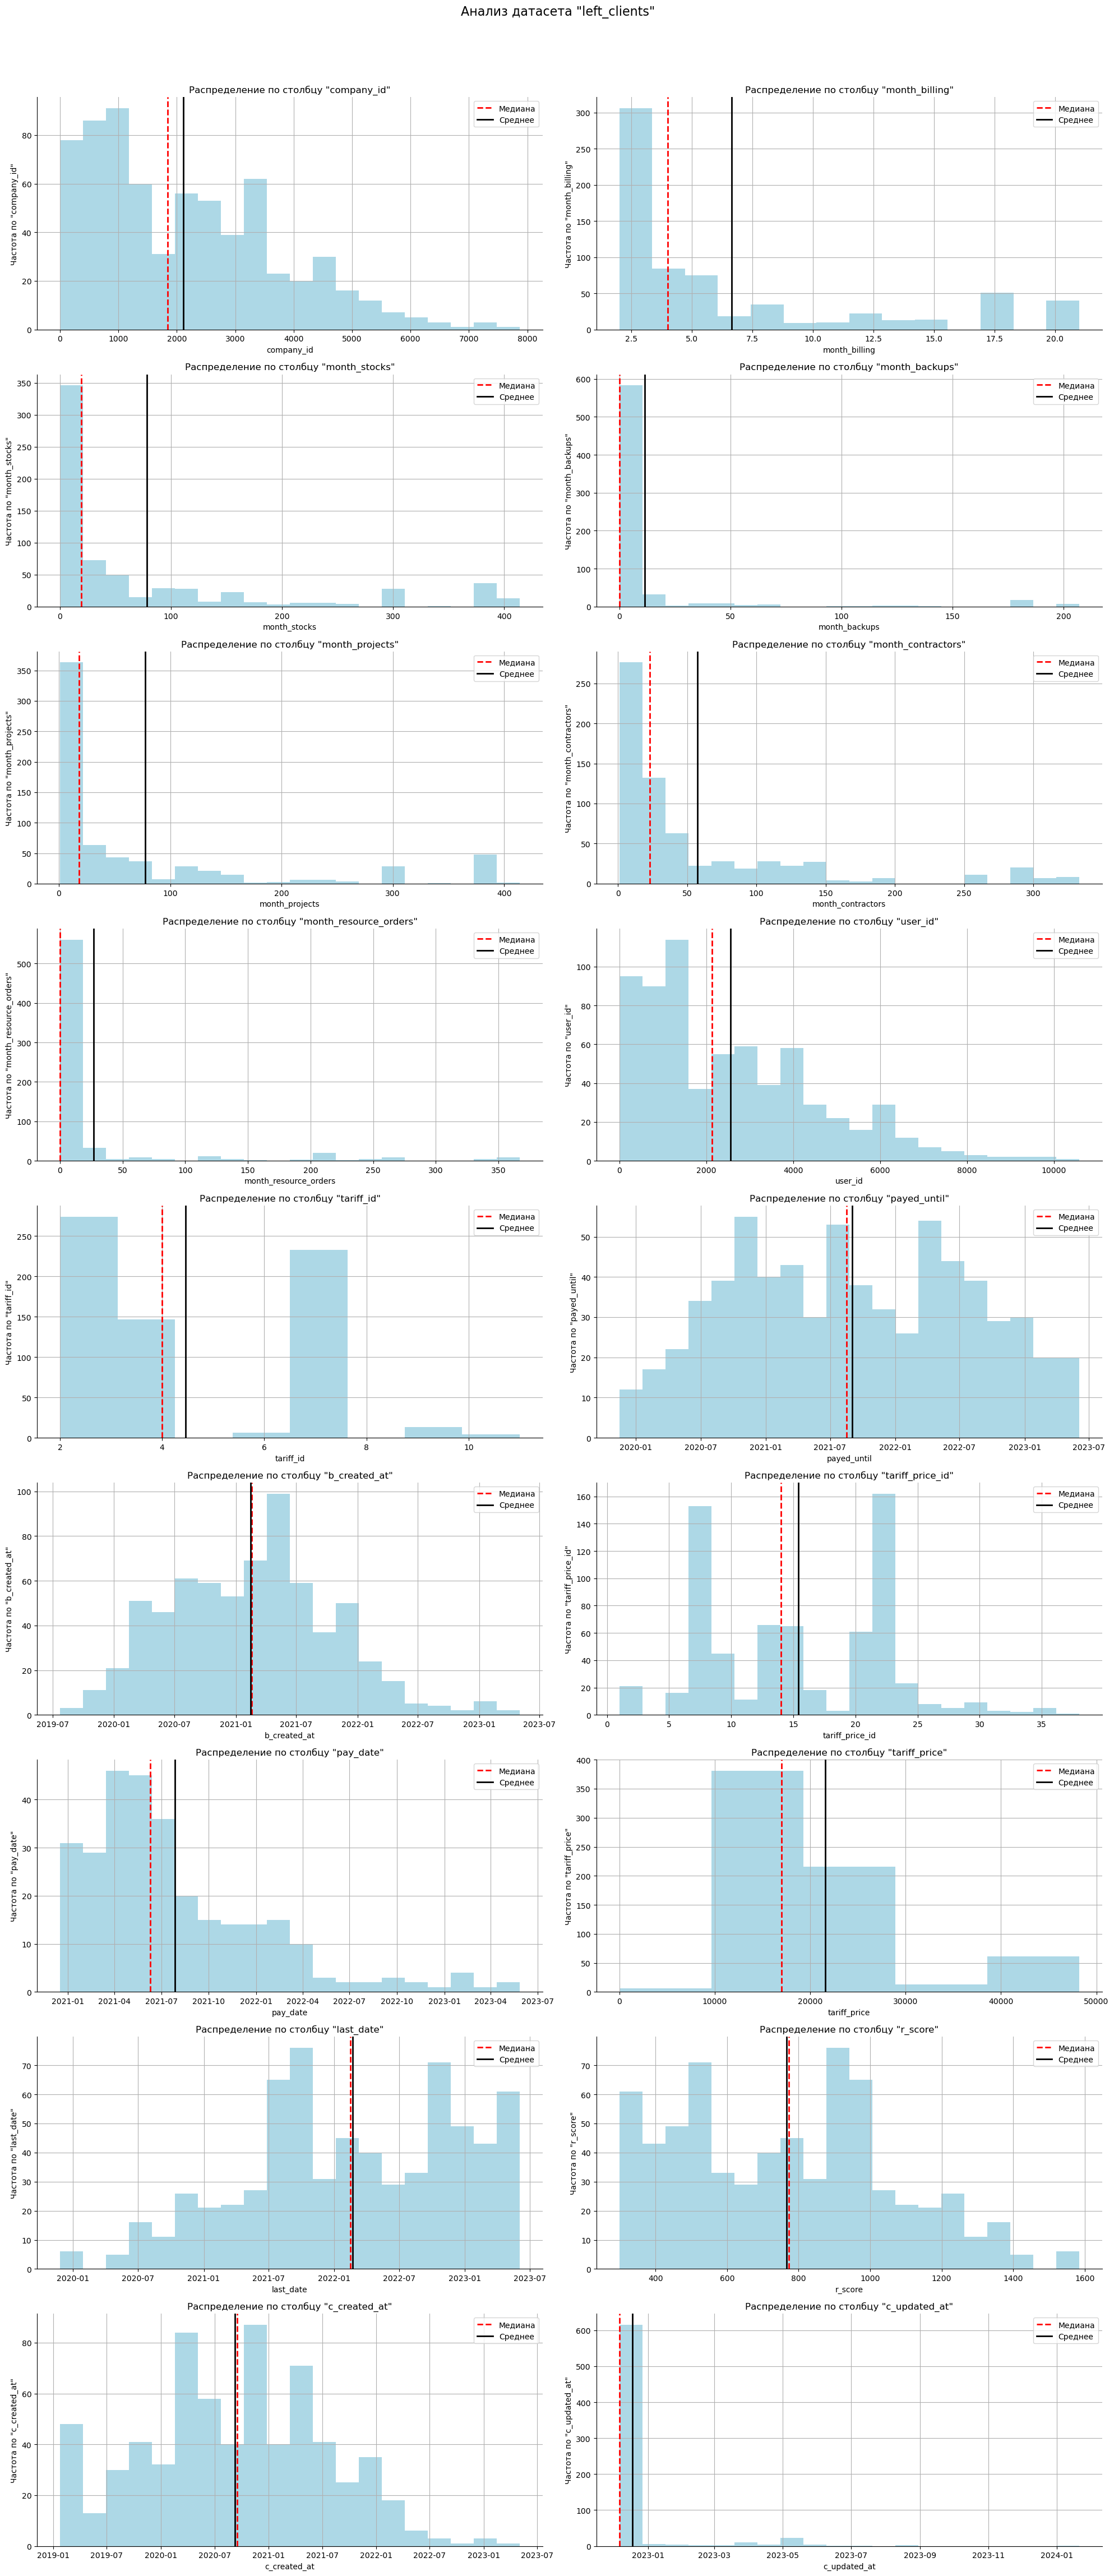

In [199]:
# Построим  гистограммы для датасета с ушедшими компаниями left_сlients
# Для построения гистограмм удалим выбросы в left_clients по month_contractors и month_resource_orders
percentile_99_contactors_left = np.percentile(left_clients['month_contractors'], 99)
percentile_99_orders_left = np.percentile(left_clients['month_resource_orders'], 99)
left_clients_for_viz = left_clients.query('month_contractors <= @percentile_99_contactors_left \
                                    & month_resource_orders <= @percentile_99_orders_left')

exclude_cols = ['churn', 'R', 'month']
datasets = [left_clients_for_viz]
names = ['left_clients']
colors = ['lightblue']
for dataset, name, color in zip(datasets, names, colors):
    histograms(dataset, name, color, exclude_cols)

Анализ гистаграмм датасета с ушедшими компаниями показывает следующее:
- company_id: распределение в столбце смещено вправо. Гистограмма распределения выглядит вытянутой вправо, с большим количеством значений на левой стороне и небольшим количеством на правой стороне. Это типичная ситуация, когда в данных присутствуют аномально высокие значения, которые могут быть результатом различных факторов, таких как ошибки измерения, выбросы или естественная вариативность в данных. В нашем случае, могу предположить, что это произошло, потому что в наш срез данных попали только ушедшие компании, которые, возможно, приходили в сервис на заре его релиза, поэтому имеют id по номеру ниже, чем те, кто приходил позже и еще не ушел;
- month_billing: медианное значение в районе 3-4 счетов за весь период присутствия компании в сервисе;
- month_stocks: по медиане около 20, по среднему значению - около 80 за весь период;
- month_backups: от 0 по медиане, до 10 посреднему значению за весь период;
- month_projects: 10-15 по медиане, около 80 по среднему значению за весь период;
- month_contractors: примерно 20 по медиане, около 55 по среднему значению за весь период;
- month_resource_orders: от 0 по медиане до 20-30 по среднему значению за весь период;
- user_id: ситуация аналогична company_id;
- в tariff_id у нас лидируют 2 (базовый) и 7, 4 (стартовые), в среднем 4ый встречается чаще всего;
- payed_until: распределение, близкое к нормальному, с некоторыми пиковыми значениями. Похоже, что много компаний ушли поздней осенью 2020 года, в июле-августе 2021 года, в мае-июне 2022 года, возможно, это связано пандемией Covid-19 и с политическими событиями;
- b_created_at: распределение, близкое к нормальному, имеет небольшое смещение вправо. Больше всего счетов за услуги среди ушедших клиентов выставлялось в апреле-мае 2021 года. Этот период связан с массовой вакцинацией от Covid-19, люди стали выходить в оффлайн, число заказов на ремонтно-строительные работы могло вырасти;
- tariff_price_id: лидируют судя по всему 7, 13, 23 id тарифов;
- pay_date: распределение смещено вправо, пик оплат - апрель-май 2021 года;
- tariff_price: судя по распределению цен лидируют стартовый или базовый тарифы в зависимости от даты;
- last_date: распределение смещено влево. Видим три пика оттока по датам: осень 2021 года, осень 2022 года и начало лета 2023 года. Строительство, ремонты - область, сильно зависящая от сезонности. Лето - пик активности, возможно, к осени активность снижается, клиенты уходят. Отток летом 2023 года скорее всего связан с возможными снижениями темпов развития строительной отрасли в связи с экономической ситуацией в стране;
- r_score: распределение смещено вправо. Мы видим несколько пиков lifetime компаний: около года, чуть более 1.5 лет, затем около 3х лет;
- c_created_at: распределение смещено вправо, в среднем основная масса ушедших компаний регистрировалась весной-летом 2020 года. Снова вспоминается Covid-19 и изоляция. В этом случае облачный сервис был хорошим решением, чтобы организовать отчетность с удаленным доступом;
- с_updated_at: пик апдейтов приходится на декабрь 2022 года, может быть начало 2023 года. Вероятно, сервис решил провести ревизию клиентов и актуализировать о них информацию.

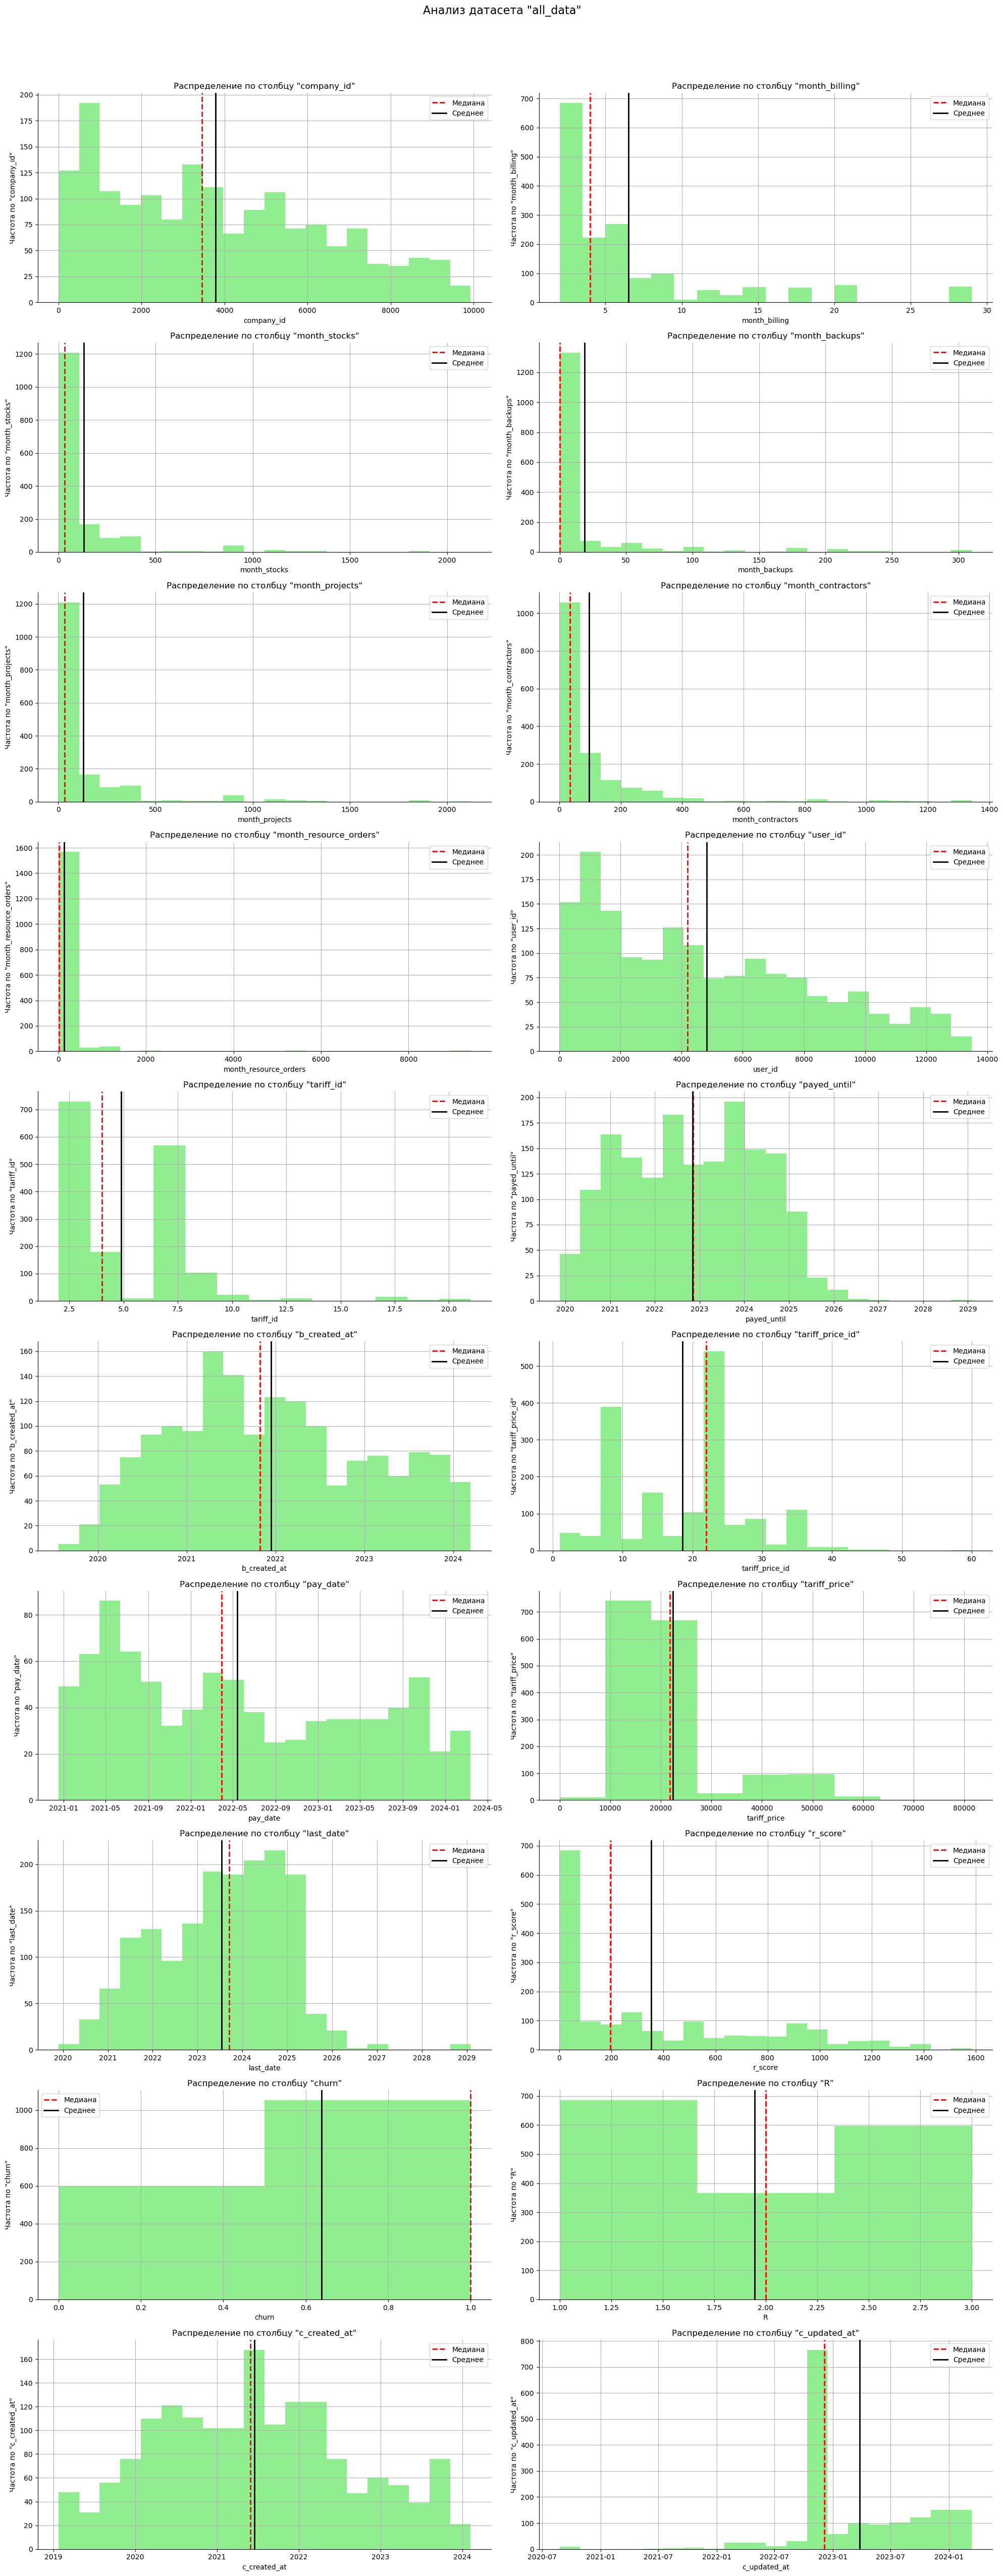

In [200]:
# Построим  гистограммы для датасета со всеми уникальными компаниями компаниями all_data
# Для построения гистограмм удалим выбросы в all_data по month_contractors и month_resource_orders
percentile_99_contactors_all = np.percentile(all_data['month_contractors'], 99)
percentile_99_orders_all = np.percentile(all_data['month_resource_orders'], 99)
all_data_for_viz = all_data.query('month_contractors <= @percentile_99_contactors_all \
                                    & month_resource_orders <= @percentile_99_orders_all')

exclude_cols = ['month']
datasets = [all_data]
names = ['all_data']
colors = ['lightgreen']
for dataset, name, color in zip(datasets, names, colors):
    histograms(dataset, name, color, exclude_cols)

Анализ диаграмм общего датасета показывает следующее:
- company_id: распределение в столбце смещено вправо. Гистограмма распределения выглядит вытянутой вправо, с большим количеством значений на левой стороне и небольшим количеством на правой стороне. Это типичная ситуация, когда в данных присутствуют аномально высокие значения, которые могут быть результатом различных факторов, таких как ошибки измерения, выбросы или естественная вариативность в данных. В нашем случае, могу предположить, что это произошло, потому что в наш срез данных попали только ушедшие компании, которые, возможно, приходили в сервис на заре его релиза, поэтому имеют id по номеру ниже, чем те, кто приходил позже и еще не ушел;
- month_billing: медианное значение в районе 3-4 счетов за весь период присутствия компании в сервисе;
- month_stocks: по медиане около 20, по среднему значению - около 125 за весь период;
- month_backups: от 0 по медиане, до 20 по среднему значению за весь период;
- month_projects: 15-20 по медиане, около 130 по среднему значению за весь период;
- month_contractors: примерно 30 по медиане, около 100 по среднему значению за весь период;
- month_resource_orders: от 0 по медиане до 100 примерно по среднему значению;
- user_id: ситуация аналогична company_id;
- в tariff_id у нас лидируют 2 (базовый) и 7, 4 (стартовые), 10 (профи) почти догнал 4;
- payed_until: распределение со смещением вправо, с некоторыми пиковыми значениями. Похоже, что много компаний ушли зимой 2021, весной-летом 2022 и в конце 2023 года;
- b_created_at: распределение, близкое к нормальному, имеет небольшое смещение вправо. Больше всего счетов за услуги среди ушедших клиентов выставлялось в апреле-мае 2021 года, зимой и летом 2022 года. Возможно, у сервиса конец года - это отчетный период, а весна-лето это сезонное время для строительных работ, количество проектов у клиентов увеличивается, соответственно, поток клиентов тоже растет;
- tariff_price_id: лидируют судя по всему 8-9, 23-25 id тарифов;
- pay_date: распределение смещено вправо, по пикам в принципе совпадает с датами выставления счетов за оплату сервиса;
- tariff_price: судя по распределению цен лидируют стартовый или базовый тарифы в зависимости от даты;
- last_date: распределение смещено вправо. У части клиентов сервис оплачен до середины 2024 года, затем мы видим пик оплат до весны 2025 года, и более редкие случаи с оплатами до 2026 года и далее;
- r_score: распределение смещено вправо. В среднем разница между датой начала проекта и датой окончания подписки проходило около года или около 1.5 лет. Более длинные периоды - это уже аномалии. Но есть и компании, lifetime которых менее 100 дней. Вероятно, после некоторого тестового периода их что-то не устроило;
- churn: оставшихся немногим больше ушедших, разница не выглядит значительной;
- R: категория 1 - ушедшие, категория 3 - оставшиеся, их меньше;
- c_created_at: распределение смещено вправо, основная масса компаний регистрировалась весной-летом 2021 года. Думаю, тут определенно есть влияние пандемии Covid-19;
- с_updated_at: пик апдейтов приходится на декабрь 2022 года, может быть начало 2023 года. Вероятно, сервис решил провести ревизию клиентов и актуализировать о них информацию.

In [201]:
# Посмотрим на статистические данные по датасетам left_clients и all_data, и на выбросы с
# помощью 1, 5, 95 и 99 перцентилей

# Выберем столбцы
selected_columns = ['company_id', 'month_billing', 'month_stocks', 'month_backups', 'month_projects',
                    'month_contractors', 'month_resource_orders', 'tariff_id', 'tariff_price_id',
                    'tariff_price', 'r_score']

display('Left_clients:',(left_clients[selected_columns]
                         .describe([0.01, 0.05, 0.95, 0.99])
                         .T
                         .assign(mean_to_std=lambda row: row["mean"] / row["std"])
                         .round(1)
                        ))
print()
display('All_data:',(all_data[selected_columns]
                         .describe([0.01, 0.05, 0.95, 0.99])
                         .T
                         .assign(mean_to_std=lambda row: row["mean"] / row["std"])
                         .round(1)
                        ))

'Left_clients:'

count     mean     std    min       1%       5%      50%      95%      99%      max  mean_to_std
company_id             686.0   2126.0  1587.0    1.0     21.0     30.0   1854.0   4976.5   6426.2   7870.0          1.3
month_billing          686.0      6.6     5.9    2.0      2.0      2.0      4.0     21.0     21.0     21.0          1.1
month_stocks           686.0     79.3   114.6    0.0      1.0      3.0     20.0    378.0    394.0    414.0          0.7
month_backups          686.0     11.4    38.3    0.0      0.0      0.0      0.0     69.0    187.4    207.0          0.3
month_projects         686.0     78.2   114.1    1.0      1.0      3.0     18.0    377.0    392.0    414.0          0.7
month_contractors      686.0     59.8    81.4    1.0      1.0      2.0     24.0    287.0    333.0    456.0          0.7
month_resource_orders  686.0     35.0   107.8    0.0      0.0      0.0      0.0    217.8    375.7   1394.0          0.3
tariff_id              686.0      4.5     2.2    2.0      2.0      2.0      4.0      7.0      9.0     11.0          2.0
tariff_price_id        686.0     15.4     7.4    1.0      1.0      6.0     14.0     25.0     34.0     38.0          2.1
tariff_price           686.0  21572.2  9135.6    0.0  17000.0  17000.0  17000.0  48183.0  48183.0  48183.0          2.4
r_score                686.0    763.8   299.3  299.0    304.6    332.0    771.0   1274.0   1402.9   1584.0          2.6

'All_data:'

count     mean     std  min       1%       5%      50%      95%      99%      max  mean_to_std
company_id             1651.0   3781.1  2594.7  1.0     21.0    430.0   3463.0   8652.5   9401.0   9931.0          1.5
month_billing          1651.0      6.5     6.3  2.0      2.0      2.0      4.0     21.0     29.0     29.0          1.0
month_stocks           1651.0    129.8   252.8  0.0      1.0      3.5     33.0    621.0   1212.0   2122.0          0.5
month_backups          1651.0     18.6    50.3  0.0      0.0      0.0      0.0    127.0    240.0    310.0          0.4
month_projects         1651.0    128.3   251.9  1.0      1.0      3.0     32.0    619.0   1201.0   2121.0          0.5
month_contractors      1651.0     97.7   175.5  1.0      2.0      3.0     34.0    342.5   1021.0   1343.0          0.6
month_resource_orders  1651.0    132.0   614.2  0.0      0.0      0.0     10.0    483.0   1377.5   9420.0          0.2
tariff_id              1651.0      4.9     3.1  2.0      2.0      2.0      4.0      9.0     17.0     21.0          1.6
tariff_price_id        1651.0     18.6     9.3  1.0      1.0      6.0     22.0     35.0     38.0     60.0          2.0
tariff_price           1651.0  22402.7  8967.5  0.0  17000.0  17000.0  21783.0  48183.0  48183.0  81500.0          2.5
r_score                1651.0    353.1   403.2  1.0      1.0      1.0    195.0   1142.0   1369.0   1584.0          0.9

Похоже, что в датасетах  больше всего аномалий в столбцах, связанных с тарифами, id цен на тарифы, ценами на услуги. Последнее не удивляет, так как цены мы вносили сами, и эти данные требуют уточнения.

In [202]:
# Посмотрим на средние значения наших признаков
continuous_cols = ['company_id', 'user_id', 'r_score']
discrete_cols = ['month', 'month_billing', 'month_stocks', 'month_backups', 'month_projects', 'month_contractors',
                 'month_resource_orders', 'tariff_id', 'payed_until', 'b_created_at', 'tariff_price_id',
                 'pay_date', 'tariff_price', 'c_created_at', 'c_updated_at', 'last_date']
binary_cols = []
object_cols = ['tariff', 'working_category', 'employer_interval', 'year']

# Вызываем функцию для подсчета средних значений в выбранных столбцах all_data
all_data_means = count_means(continuous_cols, discrete_cols, binary_cols, object_cols, all_data, 'churn')

# Посчитаем те же метрики для датасета left_clients
left_clients_means = count_means(continuous_cols, discrete_cols, binary_cols, object_cols, left_clients, 'churn')

# Добавим их к all_data_means
all_data_means = pd.concat([all_data_means, left_clients_means], axis=1)
all_data_means.columns = ['not_left_from_all', 'left_from_all', 'already_left']
all_data_means

not_left_from_all                  left_from_all                   already_left
churn                                                                                                                    0                              1                              1
company_id                                                                                                          5986.0                         2431.0                         1854.0
user_id                                                                                                             7776.0                         2792.0                         2144.0
r_score                                                                                                                1.0                          497.0                          771.0
month                                                                                                                15.92                          11.08                          10.09
month_billing                                                                                                         5.37                           7.19                           6.59
month_stocks                                                                                                         165.1                         109.81                          79.32
month_backups                                                                                                        26.66                          14.09                          11.42
month_projects                                                                                                      162.73                          108.7                          78.23
month_contractors                                                                                                   153.05                          66.34                          59.78
month_resource_orders                                                                                               292.26                          40.97                          35.02
tariff_id                                                                                                              5.2                            4.7                           4.45
payed_until                                                                                  2024-02-01 08:25:10.456521728  2022-02-21 05:57:41.792972544  2021-09-04 13:58:00.644314880
b_created_at                                                                                 2022-10-30 14:22:05.036789248  2021-06-13 07:40:44.234567936  2021-02-17 01:21:40.408163328
tariff_price_id                                                                                                      21.19                          17.13                          15.44
pay_date                                                                                     2023-01-16 18:55:01.562147072  2021-11-22 17:40:15.526522624  2021-07-27 14:35:31.273927424
tariff_price                                                                                                      23857.13                       21576.66                       21572.16
c_created_at                                                                                 2022-04-01 09:33:55.546822912  2021-01-02 07:49:25.848053248  2020-09-09 15:54:36.931486976
c_updated_at                                                                                 2023-05-21 10:35:44.177257472  2023-02-21 14:51:10.046533632  2022-12-18 06:07:13.064139776
last_date                                                                                    2024-12-18 23:49:12.471571968  2022-09-21 23:02:37.796771072  2022-02-23 04:16:11.682215680
tariff                                                                                                             базовый                          старт                          старт
working_category                   

Мы видим тут следующее:
- средние значения user_id, company_id растут от ушедщих к оставшимся. Это понятно, нумерация новых клиентов идет по порядку от 1 и выше (я надеюсь);
- период ухода компаний плюс-минус 1.5-2 года от даты старта исследовательского проекта;
- по активностям компании ситуация следующая: все активности, кроме выставления счетов растут от ушедших к оставшимся, при чем средние по складам, контрагентам и заказу материалов выросли существенно у оставшихся, тогда как среднее количество счетов наоборот упало. Возникает гипотеза ухода: бизнес плохо развивается, нет проектов, сервис не нужен. Это похоже на правду, так как среди клиентов много маленьких компаний численностью до 4 человек;
- средние значения тарифа у нас так и или иначе склоняются к стартовому;
- tariff_price_id скорее всего растут аналогично принципу в столбцах user_id, company_id. Меняется цена тарифа, ей присваивают новый id выше по порядковому номеру;
- цена тарифа также относится или к стартовому, или к базовому в зависимости от даты. Уже явно прослеживается факт, что чаще уходят компании с начальными тарифами;
- вероятно, самый большой отток был в конце 2022 - начале 2023 года, возможно, по причине апдейта данных самим сервисом;
- многие компании приходили в сервис с осени 2020 года. Пандемия Covid-19 опять же? В офис ходить нельзя, удобный сервис в облаке закрывает много вопросов;
- в среднем ушедшие компании пользовались стартовым тарифом, оставшиеся пользуются базовым;
- датасете left_clients клиенты уходили в 2020 году.

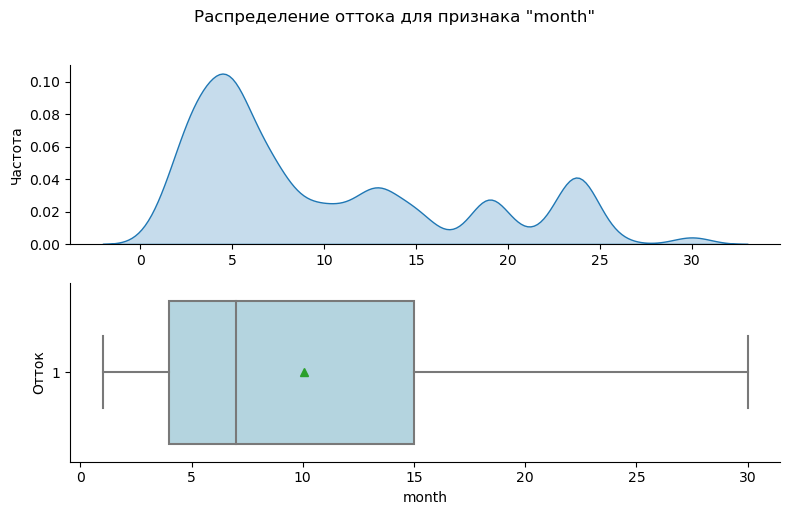

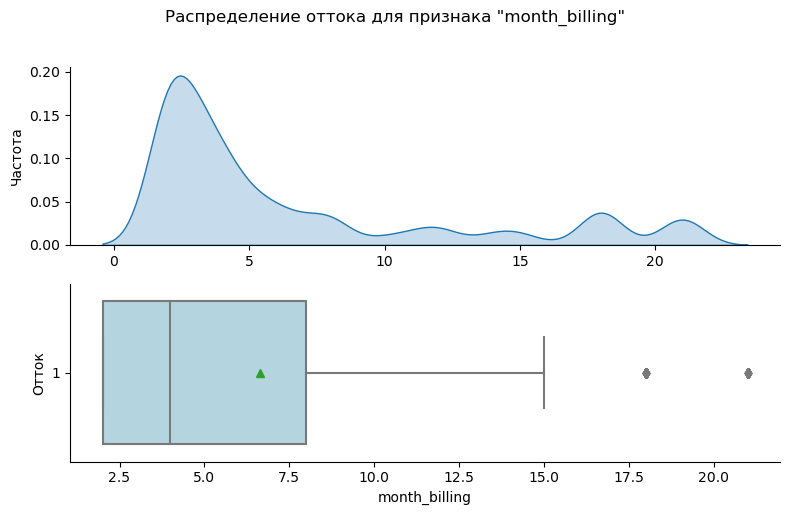

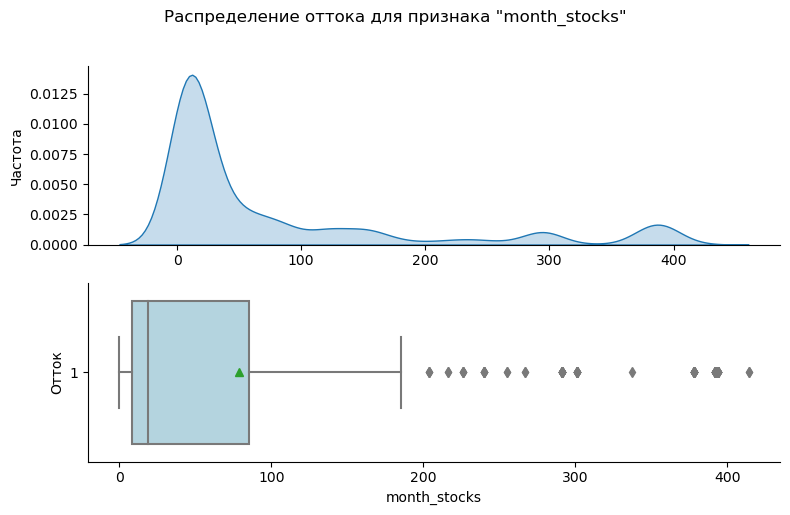

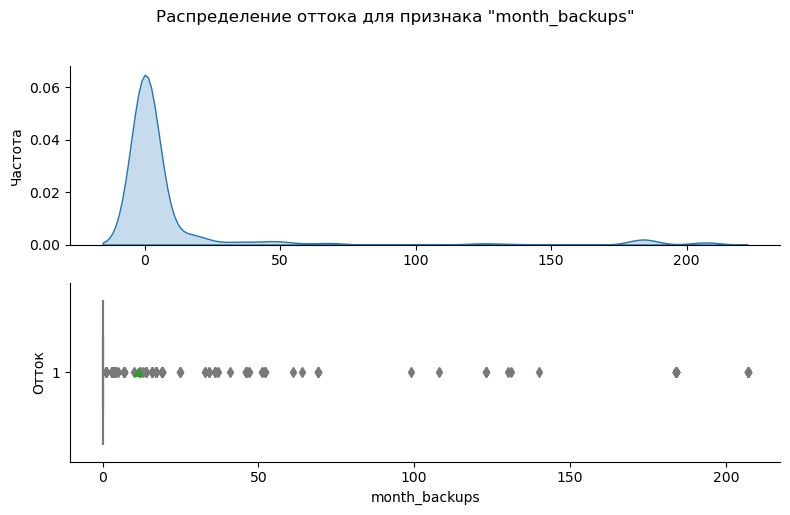

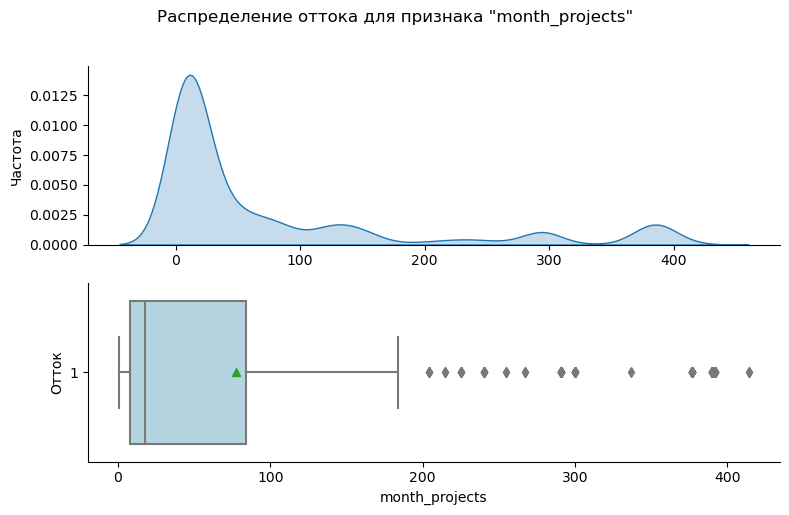

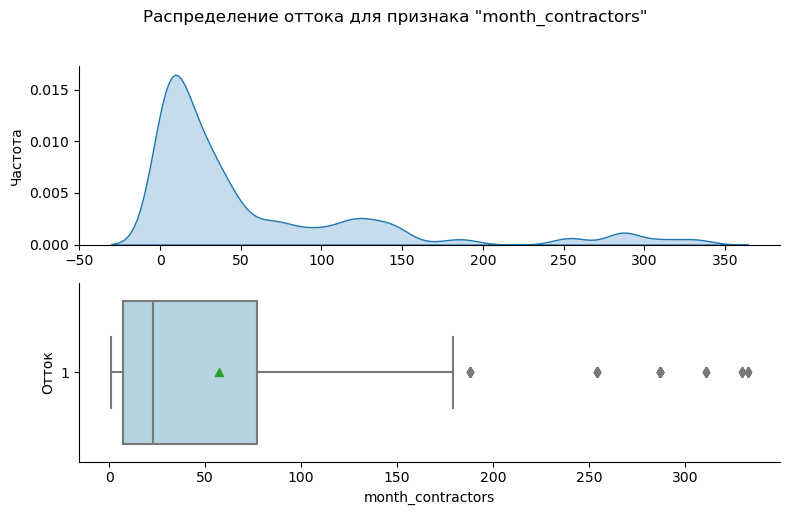

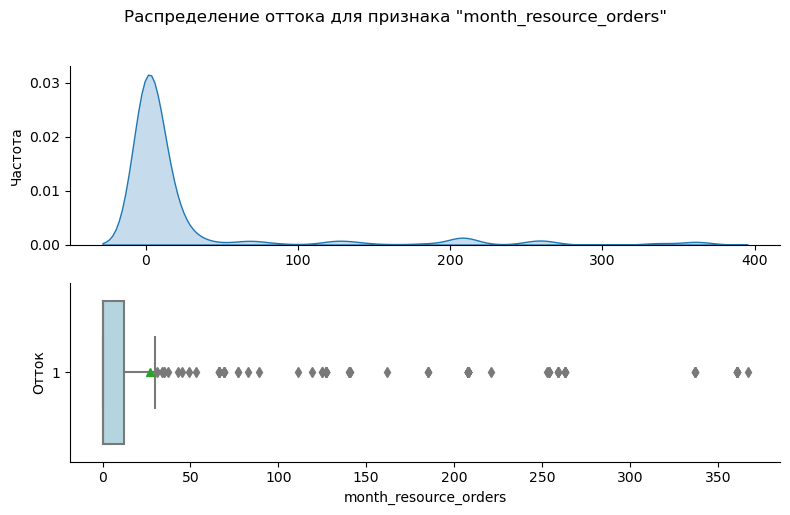

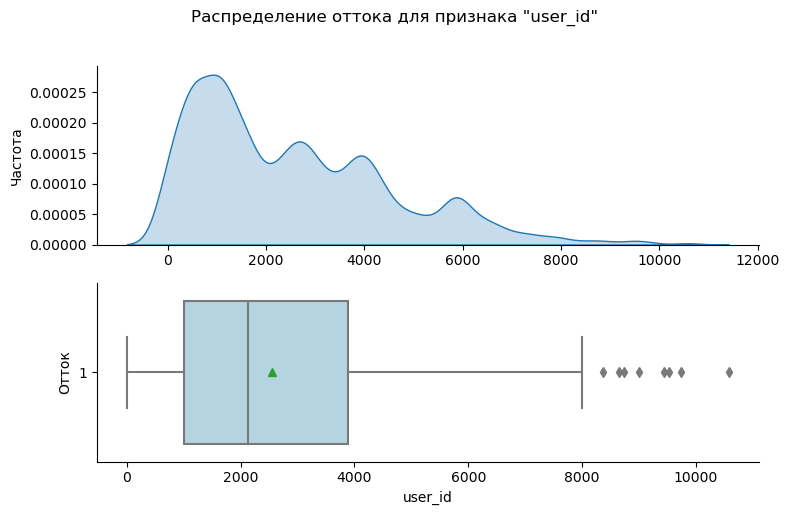

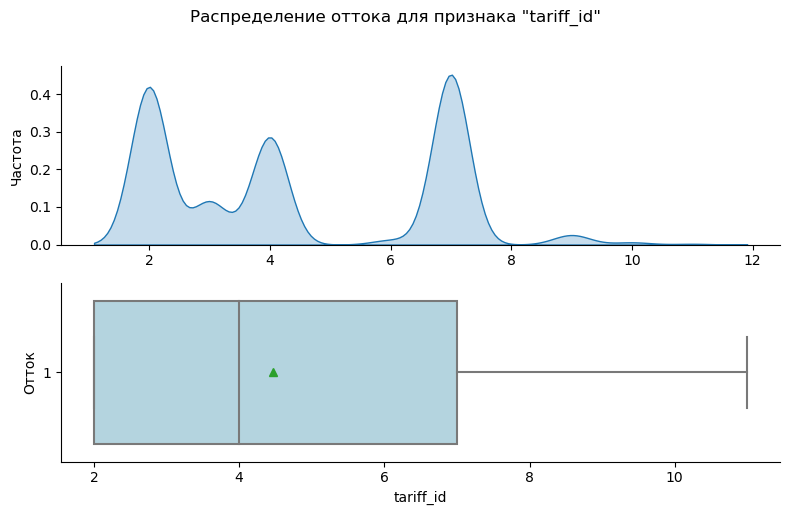

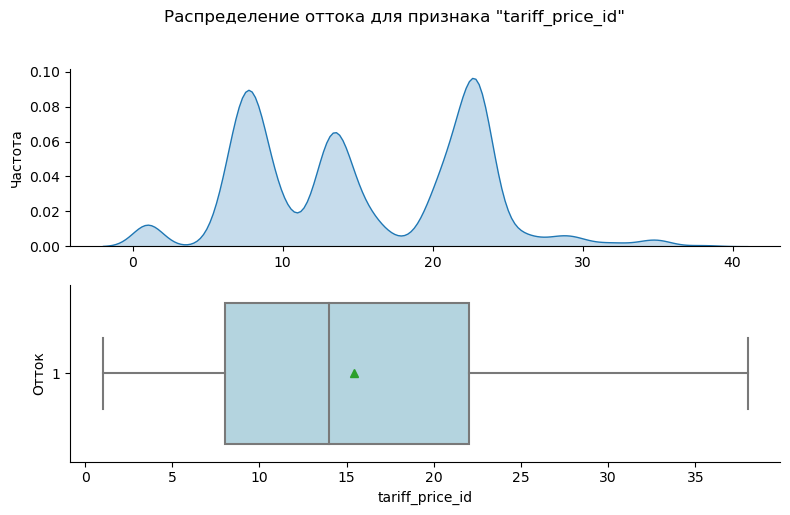

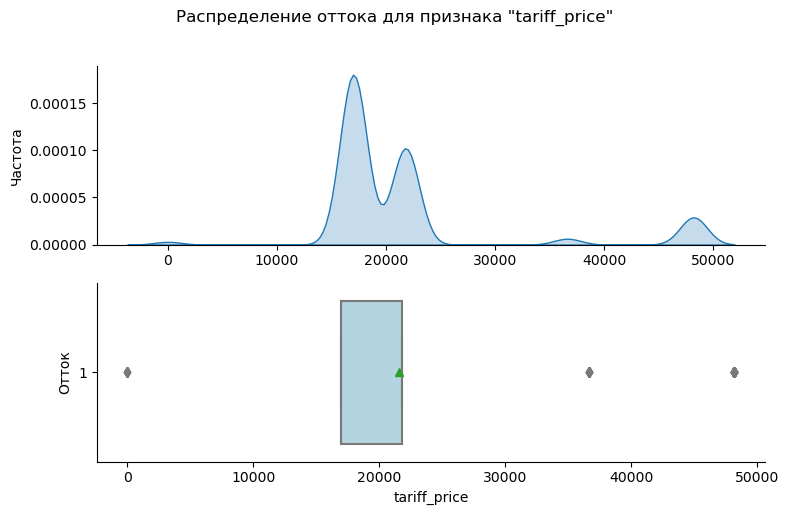

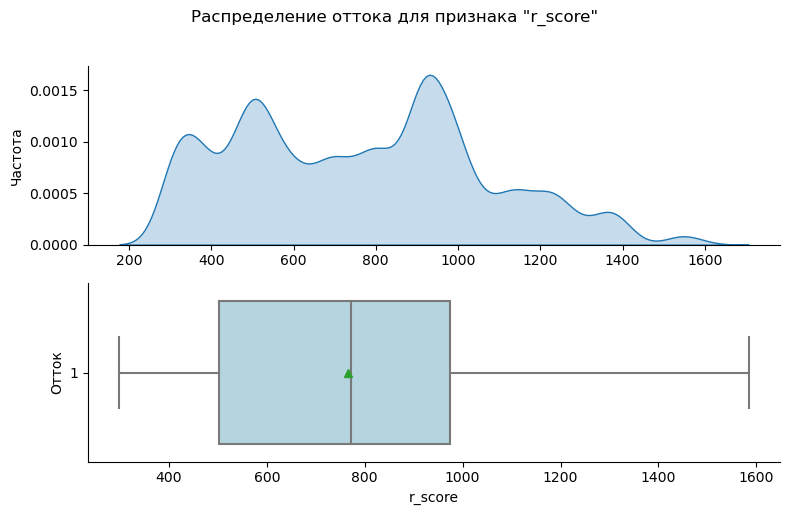

In [203]:
# Визуализируем данные по числовым столбцам датасета left_clients
numerical_cols = ['month', 'month_billing', 'month_stocks', 'month_backups', 'month_projects',
                  'month_contractors', 'month_resource_orders', 'user_id', 'tariff_id',
                  'tariff_price_id', 'tariff_price', 'r_score']

for feature in numerical_cols:
    plots_for_numerical_data_left(left_clients_for_viz, feature, 'churn')

Анализ графиков датасета left_clients:
- пик ухода примерно на 5ом месяце;
- month_billing: от 0 до 3-4;
- month_stocks: от 0 до 12-15, после примерно 200 - выбросы;
- month_backups: все, что не 0 - аномально получается, если небольшие пики в районе 1 и 10-11;
- month_projects: аномалии выше 190, в среднем 10-12 проектов;
- month_contractors: выбросы выше 190, в среднем 12-15 контрагентов;
- month_resource_orders: выбросы выше 20-30, в среднем до 10 заказов;
- user_id: примерно такая же картина как с company_id, правда выбросы начинаются немного позже, примерно с 8000-го id;
- tariff_id: ничего нового. Лидируют 7ой, 2ой, 4ый;
- tariff_price_id: по id цены лидируют 8-9, 23, 13, но эта информация нам, к сожалению, ни о чем особо не говорит;
- tariff_price: по внесенным нам расценкам также лидируют тариф "стартовый"/"базовый", далее с большим отрывом идет "профи" или "бизнес" в зависимости от даты;
- r_score: в среднем от момента старта нашего проекта можно отсчитывать назад около 2х лет или чуть больше, чтобы увидеть основной отток компаний.

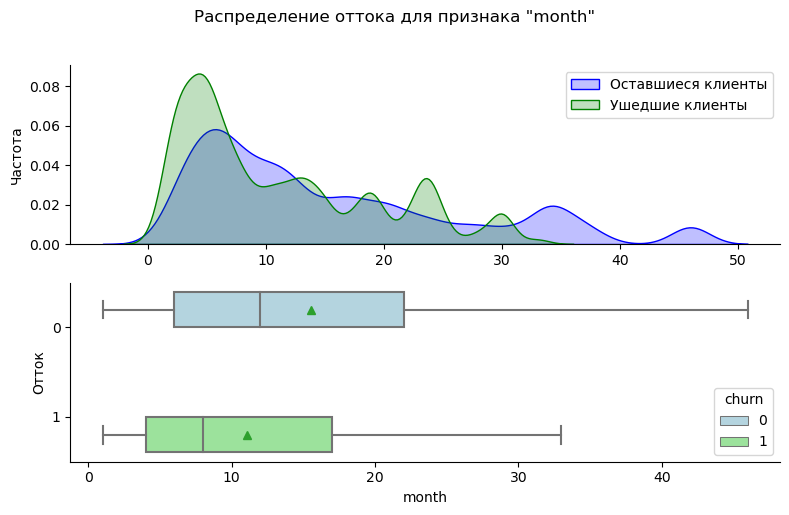

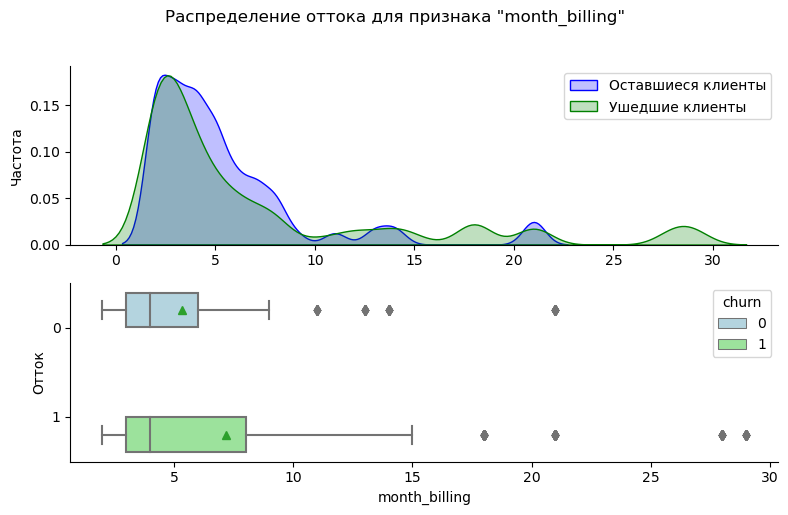

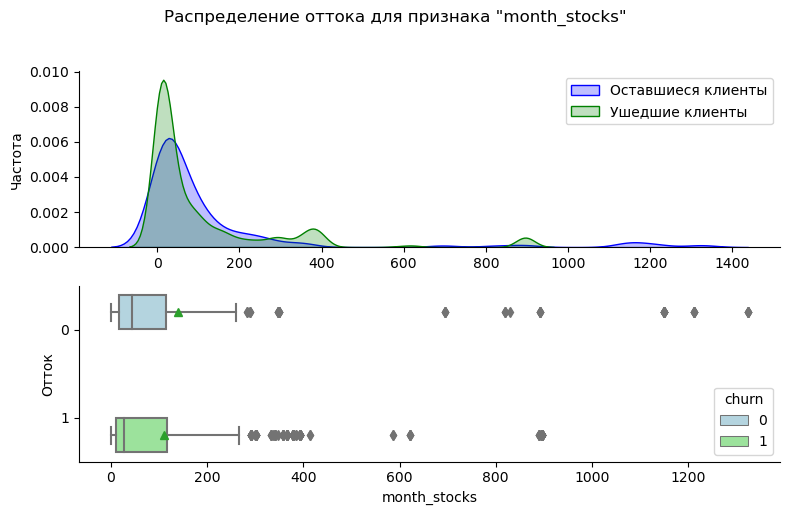

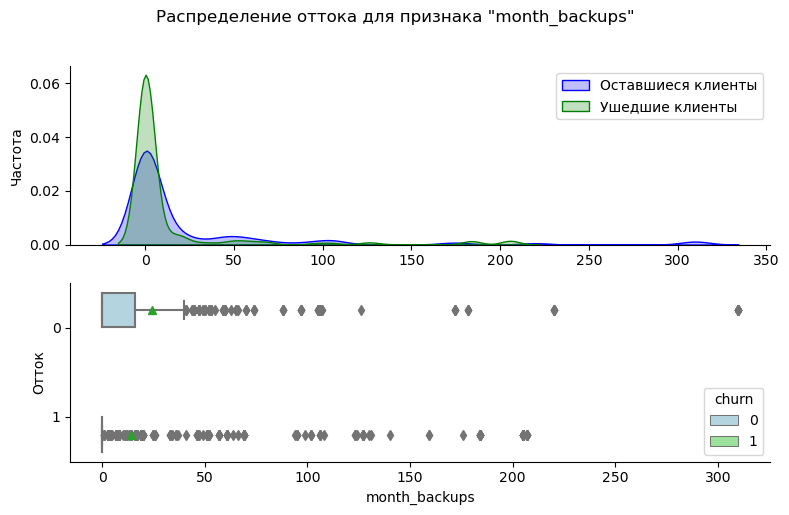

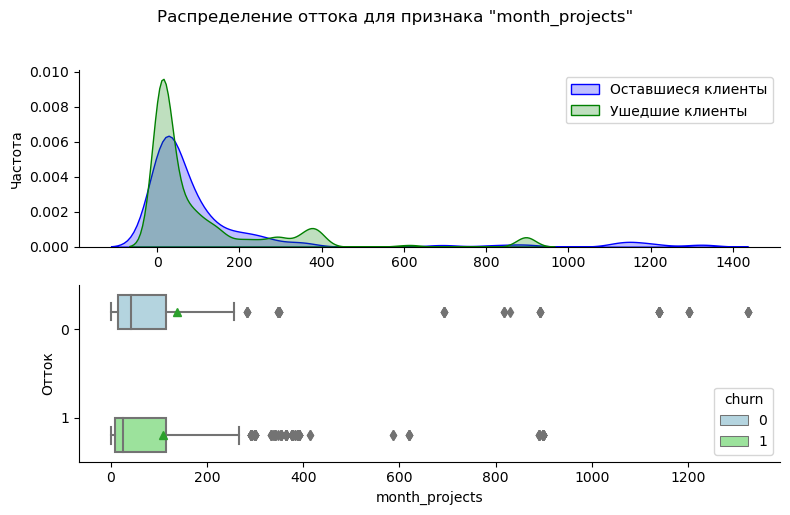

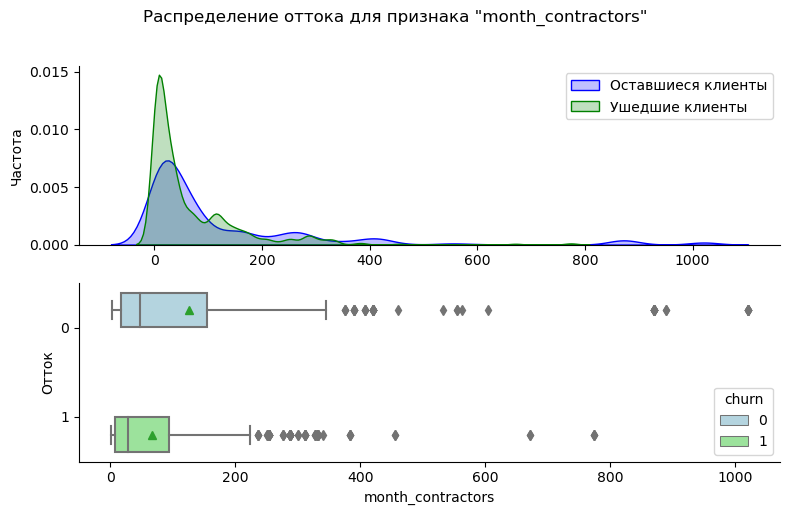

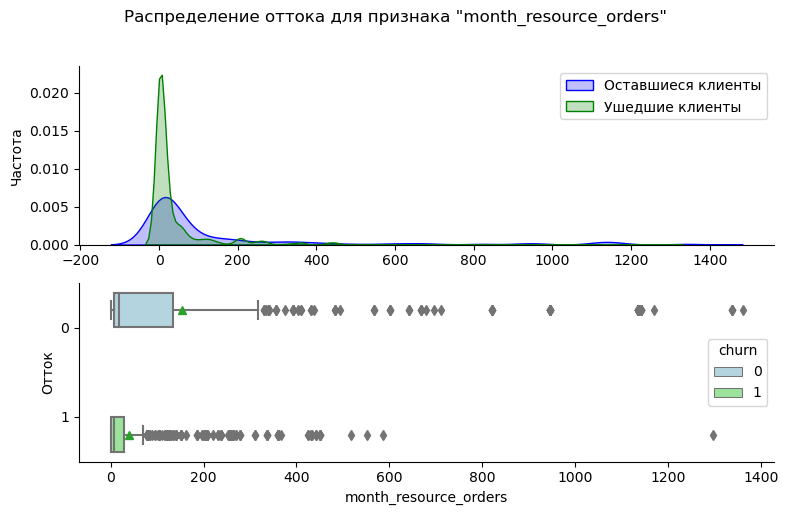

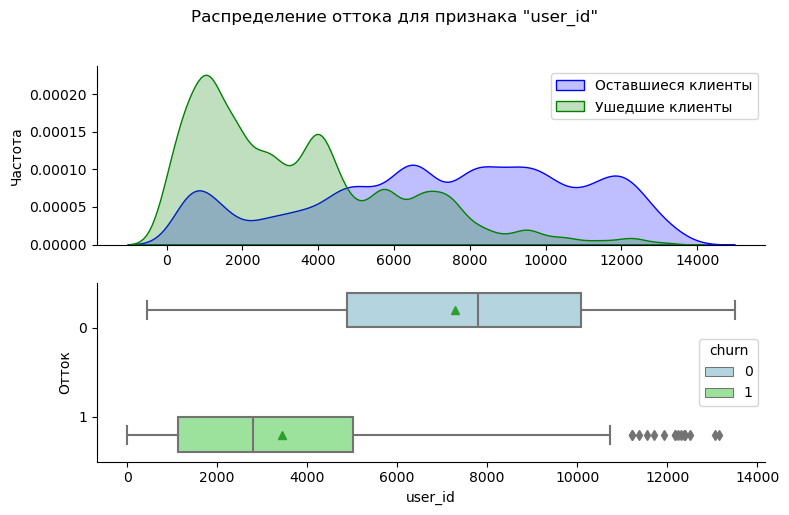

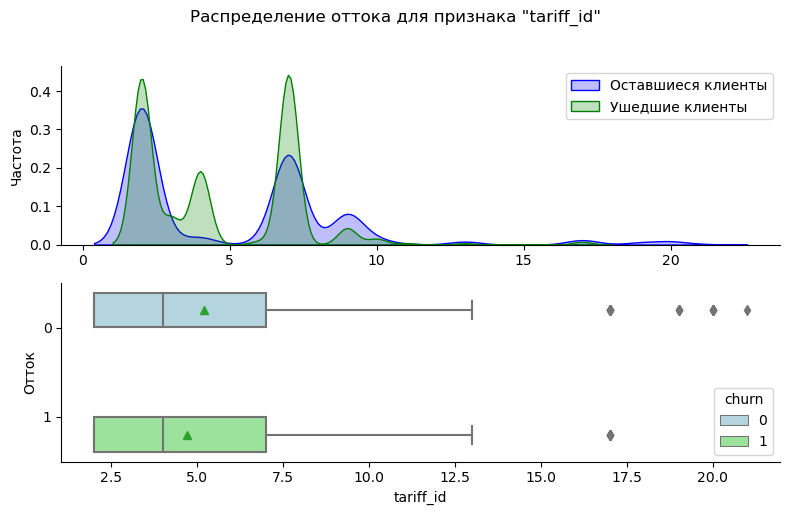

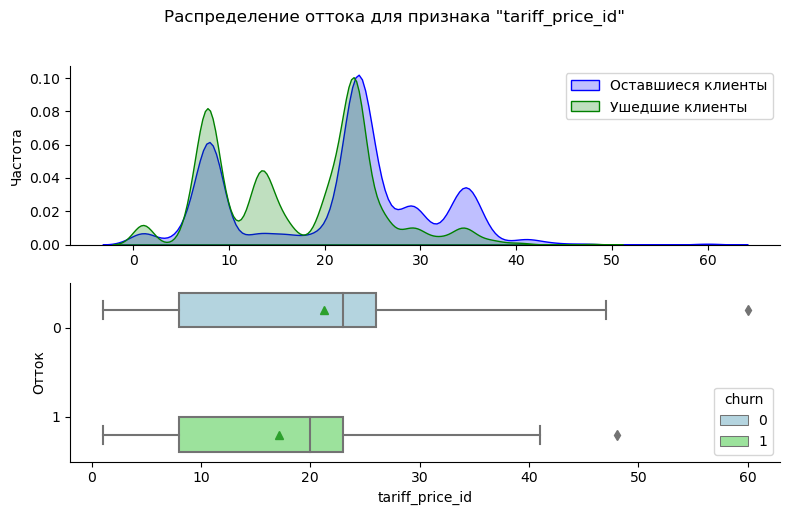

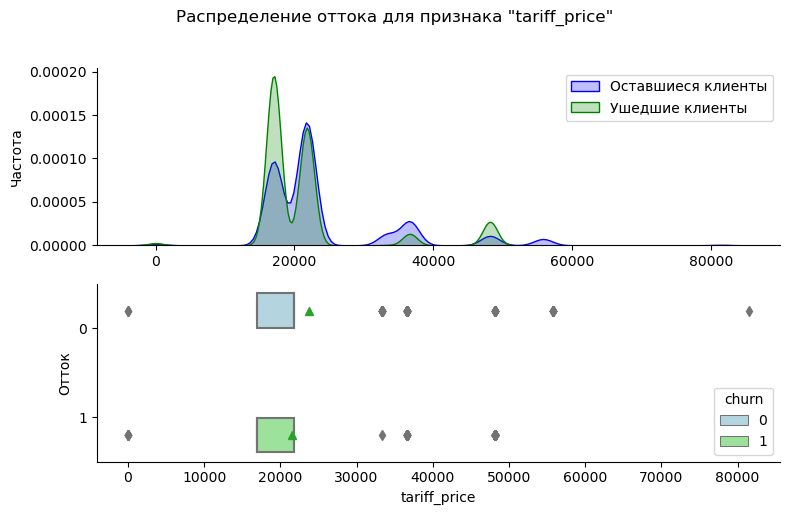

In [204]:
# Визуализируем данные по числовым столбцам датасета all_data
numerical_cols = ['month', 'month_billing', 'month_stocks', 'month_backups', 'month_projects',
                  'month_contractors', 'month_resource_orders', 'user_id', 'tariff_id',
                  'tariff_price_id', 'tariff_price']
for feature in numerical_cols:
    plots_for_numerical_data_all(all_data_for_viz, feature, 'churn', 'Оставшиеся клиенты', 'Ушедшие клиенты')

Анализ графиков датасета all_data:
- видны несколько пиков ухода, 5-6 месяц, 23-24 месяц, 35 месяц;
- month_billing: среди оставшихся клиентов больше тех, кто не загружает счета. Это мы видели уже по сводной таблице со средними;
- month_stocks: оставшиеся клиенты вносят немного больше информации о складах;
- month_backups: оставшиеся клиенты делают бэкап чаще;
- month_projects: разница между ушедшими и оставшимися незначительная, но все же у оставшихся проектов больше;
- month_contractors: у оставшихся компаний существенно больше контрагентов, чем у ушедших;
- month_resource_orders: у ушедших нулевых значений существенно больше, чем у оставшихся;
- user_id: примерно такая же картина как с company_id;
- tariff_id: у оставшихся лидируют 2ой, 7ой, 9ый (это уже "бизнес");
- tariff_price_id: по id цены лидируют 8-9, 24-25, 30, 35, но эта информация нам, к сожалению, ни о чем особенно не говорит;
- tariff_price: по внесенным нам расценкам также лидируют тариф "старт"/"базовый", далее с большим отрывом идет "базовый" или  "бизнес" в зависимости от даты.

<a id="11"></a>
### Анализ категориальных признаков датасетов left_clients и all_data

Категориальные признаки в полученном датасете следующие:
- tariff;
- working_category;
- employer_interval;
- churn;
- role_id;
- R.

In [205]:
# Определим функцию для визуализации данных для категориальных столбцов
def categorical_cols(data, selected_columns):
    # Создаем пустой словарь для хранения результатов
    churn_means = {}

    # Цикл для подсчета среднего оттока для каждого столбца
    for col in selected_columns:
        churn_mean = round(data.groupby(col)['churn'].mean() * 100, 1)
        churn_means[col] = churn_mean

    # Определяем количество строк и столбцов на рисунке
    num_keys = len(churn_means)
    num_cols = 2  # желаемое количество столбцов

    # Вычисляем количество строк
    num_rows = math.ceil(num_keys / num_cols)

    # Создаем фигуру и ось для отображения таблиц
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))


    # Счетчик для размещения таблиц на рисунке
    row = 0
    col = 0

    # Перебираем ключи и значения словаря
    for key, value in churn_means.items():
        # Создаем таблицу для каждой пары ключ-значение
        table = axes[row, col].table(cellText=value.reset_index().values,
                                     colLabels=value.reset_index().columns,
                                     cellLoc='left',
                                     loc='center')
        axes[row, col].axis('off')
        axes[row, col].set_title(key, fontsize=14)

        # Настраиваем цвета шапки таблицы
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        for (i, j), cell in table.get_celld().items():
            if i == 0:
                cell.set_text_props(fontweight='bold')
                cell.set_facecolor('lightblue')

        # Обновляем счетчик для следующей позиции
        col += 1
        if col == num_cols:
            col = 0
            row += 1

    # Скроем пустую рамку в конце вывода
    for i in range(len(selected_columns), len(axes.flatten())):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

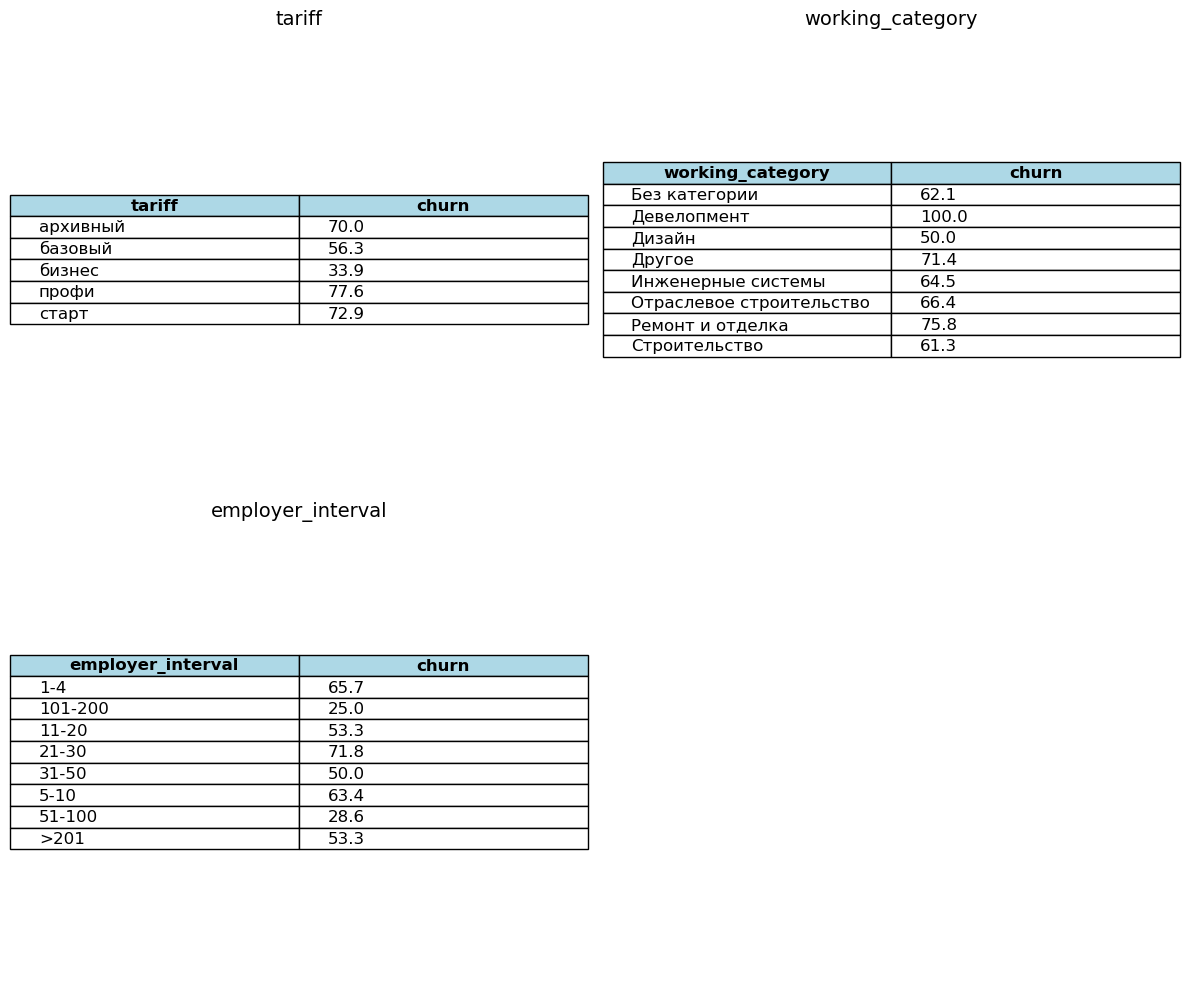

In [206]:
# Используем функцию для визуализации среднего оттока по выбранным столбцам
selected_columns = ['tariff', 'working_category', 'employer_interval']
categorical_cols(all_data, selected_columns)

Что же мы видим тут:
- tariff: самый высокий отток в тарифе "профи" (77.6%), затем "старт" (72.9%) и "базовый" (56.3%), брать в расчет тариф "архивный" мы сейчас не будет, там слишком мало данных. Самый низкий отток у тарифа "бизнес". Надо посмотреть на размеры выборки, но  могу предположить, что если "профи" от "бизнеса" отличается (кроме цены и количества пользователей) только VIP-поддеркой, то либо поддержка нужна не часто, либо качество оказываемых услуг не стоит того, чтобы за это переплачивать. Тоже и со стартовым, но в другую сторону. Можно немного доплатить и получить чуть более расширенный пакет "базовый";
- working_category: в категориях "Девелопмент", "Другое" и "Дизайн" крайне мало значений, поэтому их не берем в расчет при анализе. Таким образом:
  - cамый высокий отток в категории "Ремонт и отделка" - 75.8%. Возможно, ремонтом занимаются небольшие компании, ИП, живут от проекта до проекта, не до таких сервисов;
  - далее, отток  в категории "Отраслевое строительство" - 66.4%. Сюда входит, например, строительство рыбоводных ферм, домов из кедра, детских площадок и т.д. То есть область сама по себе довольно узкая. И отток клиентов может быть связан не с самим сервисом, а отсутствием заказов у клиента;
  - категория "Инженерные работы" - 64.5%. Тоже область сужена (электрика, монтаж фасадов, остекление, водопровод). Я, как заказчик строительных работ, при глобальном ремонте предпочла бы услугу под ключ, а не поиск 10 разных подрядчиков.
  - в категории "Строительство" отток тоже не низкий - 61.3%;
  - категория "Без категории", к сожалению, вряд ли поможет нам выявить причины оттока. Могу только предположить, что клиент, не заполнивший профиль до конца не выглядит серьезно настроенным на работу. Или его деятельность может быть настолько неспециализированной, он занимается всем подряд, что тоже не приносит стабильности.
- employer_interval: чаще всего уходят компании численностью от 21 до 30 человек (71.8%), затем 1-4 (65.7%), на третьем месте 5-10 человек (63.4%). Самые стабильные компании от 51 до 100 человек (28.6%) и от 101 до 200 человек (25%). Возможно, чем меньше компания, тем сложнее ей выжить в конкурентной среде, обеспечить постоянный приток заказов, иначе оплата такого рода сервиса является ненужной тратой денег. Да и объемы работы может не те, таблички в MS Excel для их отчетности достаточно может быть. У очень крупных компаний >200 человек отток уже снова растет (53.3%);
- R: компании с рейтингом 3 пока ожидаемо не ушли.

Если рассматривать причины, не связанные с сервисом, могу предположить, что на отток могут влиять отсутствие проектов в связи с такими фактороми, как высокая конкуренция, сезонность, Covid-19, отток людей из страны в связи с политическими и экономическими событиями, что снизило спрос на услуги, уменьшило возможное количество небольших проектов и др.

In [207]:
# Определим функцию для подсчета доли оттока по признакам
def calculate_churn_rate(data, feature):
    # Сгруппируем данные по признаку и оттоку
    data_churn = (data
                     .groupby([feature, 'churn']).size().unstack(fill_value=0).reset_index()
                     .rename(columns={0: 'not_churn', 1: 'churn'})
                     .rename_axis(None, axis=1))

    # Добавляем столбец для доли оттока
    data_churn['churn_rate'] = round(data_churn['churn'] / \
                                         (data_churn['not_churn'] + data_churn['churn']) * 100, 1)

    return data_churn

In [208]:
# Определим функцию для визуализации данных по оттоку и исследуемому признаку
def churn_viz(data, feature):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

    # Столбчатая диаграмма с накоплением
    data = data
    y1 = data['not_churn']
    y2 = data['churn']
    sns.barplot(data=data, x=feature, y=y1, label='Не отток', palette='viridis', ax=axes[0])
    sns.barplot(data=data, x=feature, y=y2, label='Отток', palette='viridis', ax=axes[0], alpha=0.3, bottom=y1)

    axes[0].set_title(f'Количество клиентов в разрезе оттока и {feature}')
    axes[0].set_xlabel('Количество сотрудников компании')
    axes[0].set_ylabel('Количество клиентов')
    axes[0].legend()
    axes[0].tick_params(rotation=45)

    # Столбчатая диаграмма
    sns.barplot(data=data, x=feature, y='churn_rate',
                palette='viridis', ax=axes[1])

    for i, rect in enumerate(axes[1].patches):
        height = rect.get_height()
        axes[1].text(rect.get_x() + rect.get_width() / 2, height, f"{height:.1f}%",
                 ha='center', color='black', va='bottom', fontsize=12)

    axes[1].set_title(f'Доля оттока клиентов в разрезе {feature}')
    axes[1].set_xlabel('Количество сотрудников компании')
    axes[1].set_ylabel('Доля оттока, %')
    axes[1].set_ylim(0, 110)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    sns.despine()
    plt.show()

In [209]:
# Определим функцию для визуализации данных по оттоку и исследуемому признаку в динамике
def churn_viz_dinamic(data, feature):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

    # Линейные графики
    data = data
    x = data[feature]
    y1 = data['not_churn']
    y2 = data['churn']
    sns.lineplot(data=data, x=x, y=y1, label='Не отток', marker='o', linestyle='-', color='blue', ax=axes[0])
    sns.lineplot(data=data, x=x, y=y2, label='Отток', marker='o', linestyle='-', color='green', ax=axes[0])

    axes[0].set_title(f'Количество клиентов в разрезе оттока и {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Количество клиентов')
    axes[0].set_xticks(x)
    axes[0].legend()
    axes[0].tick_params(axis='x', rotation=45)

    # Столбчатая диаграмма
    sns.barplot(data=data, x=feature, y='churn_rate',
                palette='viridis', ax=axes[1])

    for i, rect in enumerate(axes[1].patches):
        height = rect.get_height()
        axes[1].text(rect.get_x() + rect.get_width() / 2, height, f"{height:.1f}%",
                 ha='center', color='black', va='bottom', fontsize=12)

    axes[1].set_title(f'Доля оттока клиентов в разрезе {feature}')
    axes[1].set_xlabel('Количество сотрудников компании')
    axes[1].set_ylabel('Доля оттока, %')
    axes[1].set_ylim(0, 110)
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    sns.despine()
    plt.show()

In [210]:
# Посмотрим на размер выборок  и отток для working_category
working_category_churn = calculate_churn_rate(all_data, 'working_category')
working_category_churn

working_category  not_churn  churn  churn_rate
0             Без категории        380    622        62.1
1               Девелопмент          0      9       100.0
2                    Дизайн          6      6        50.0
3                    Другое          2      5        71.4
4        Инженерные cистемы         22     40        64.5
5  Отраслевое строительство         37     73        66.4
6          Ремонт и отделка         38    119        75.8
7             Строительство        113    179        61.3

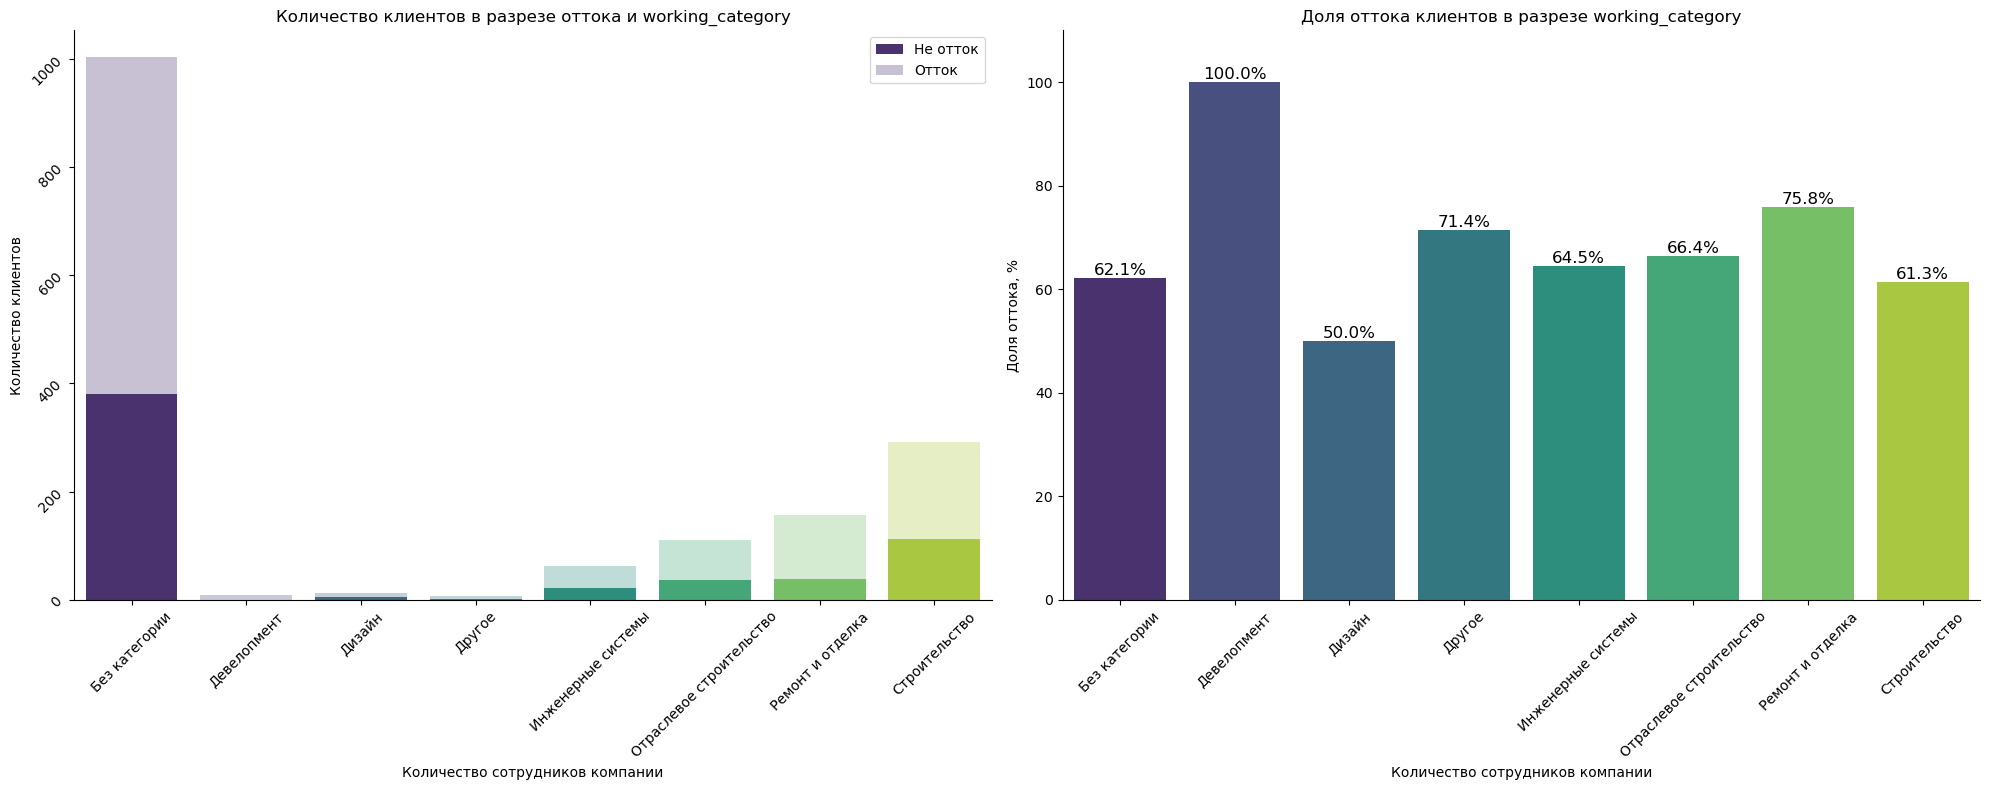

In [211]:
churn_viz(working_category_churn, 'working_category')

Как я отмечала выше, "Девелопмент", "Другое" и "Дизайн" маленькие по размеру, правильно, что мы не взяли их в расчет при формировании shot листа оттока.

In [212]:
# Посмотрим на размер выборок  и отток для employer_interval
employer_interval_churn = calculate_churn_rate(all_data, 'employer_interval')
employer_interval_churn

employer_interval  not_churn  churn  churn_rate
0               1-4        367    704        65.7
1           101-200          3      1        25.0
2             11-20         64     73        53.3
3             21-30         11     28        71.8
4             31-50         10     10        50.0
5              5-10        131    227        63.4
6            51-100          5      2        28.6
7              >201          7      8        53.3

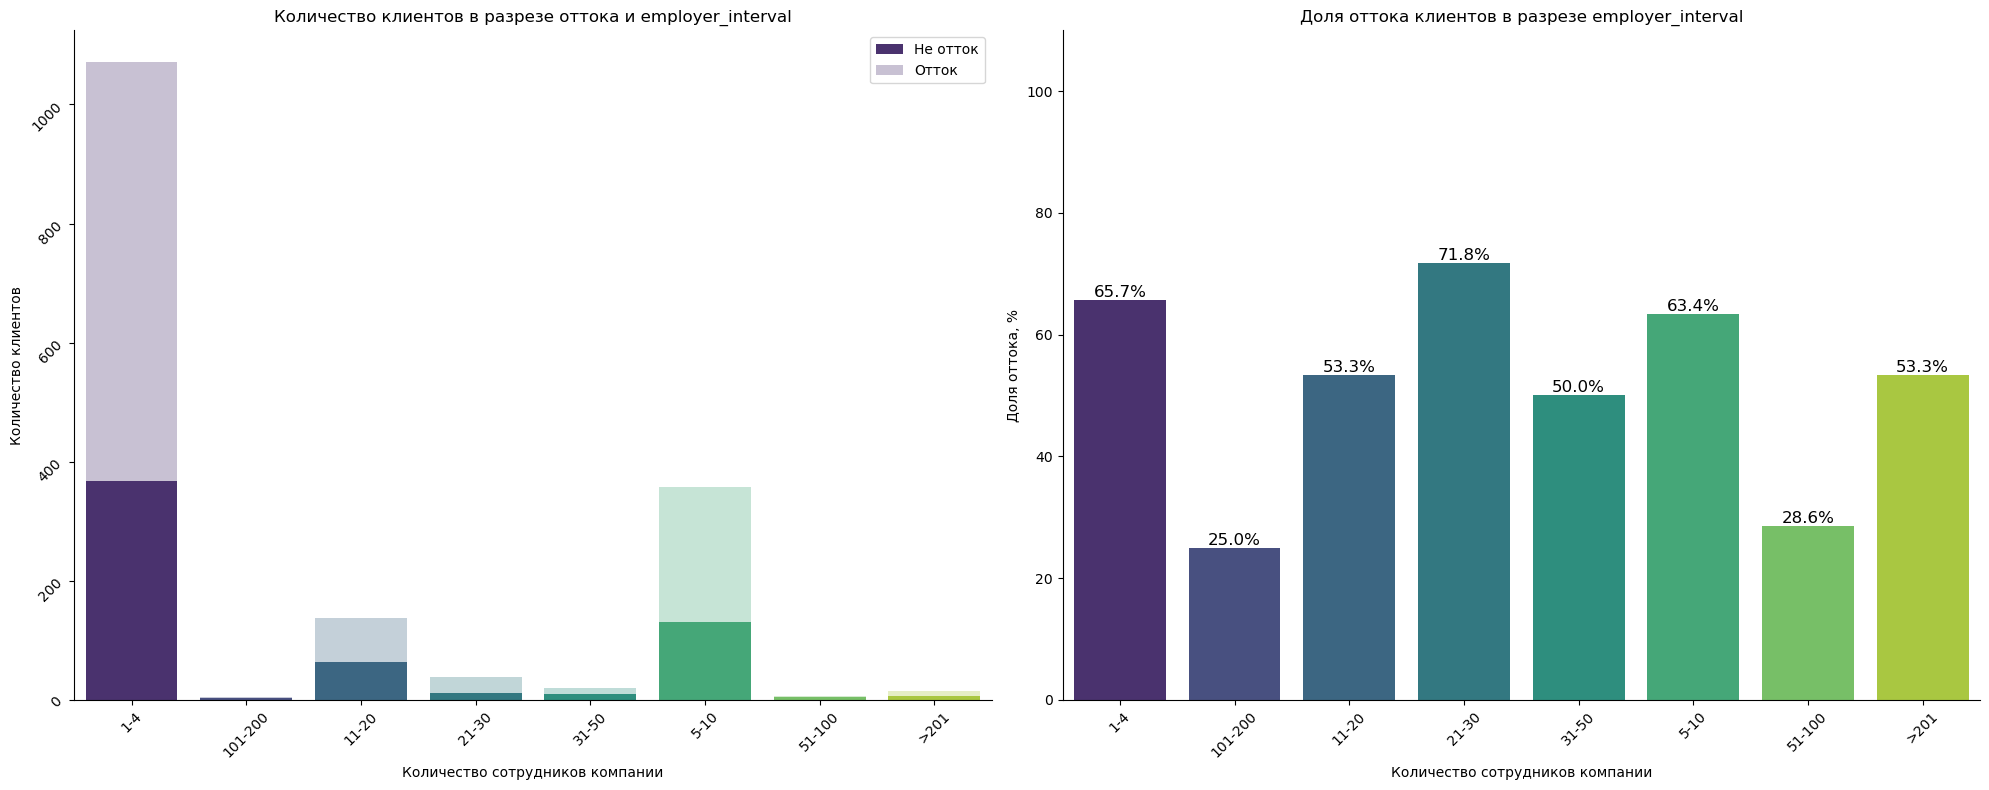

In [213]:
churn_viz(employer_interval_churn, 'employer_interval')

Категории "101-200", "51-100" и ">200" самые маленькие по количеству представителей, так что я бы составила такой топ-3 компаний по оттоку: "1-4", "5-10", "21-30".

In [214]:
# Посмотрим, какие по размеру компании в рабочей категории "Ремонт и отделка" с самым высоким оттоком
all_data.query('working_category == "Ремонт и отделка"')['employer_interval'].value_counts()

employer_interval
1-4      84
5-10     65
21-30     4
31-50     4
Name: count, dtype: int64

Думаю, что моя теория о том, что среди маленьких по размеру компаний много ИП, занимающихся ремонтом подтверждается. И на их отток может влиять огромное количество внешних факторов, не связанных с сервисом, кроме, может быть, его высокой стоимости и ненужности для таких компаний.

In [215]:
# Посмотрим на размер выборок  и отток для tariff
tariff_churn = calculate_churn_rate(all_data, 'tariff')
tariff_churn

tariff  not_churn  churn  churn_rate
0  архивный          3      7        70.0
1   базовый        296    382        56.3
2    бизнес         72     37        33.9
3     профи         22     76        77.6
4     старт        205    551        72.9

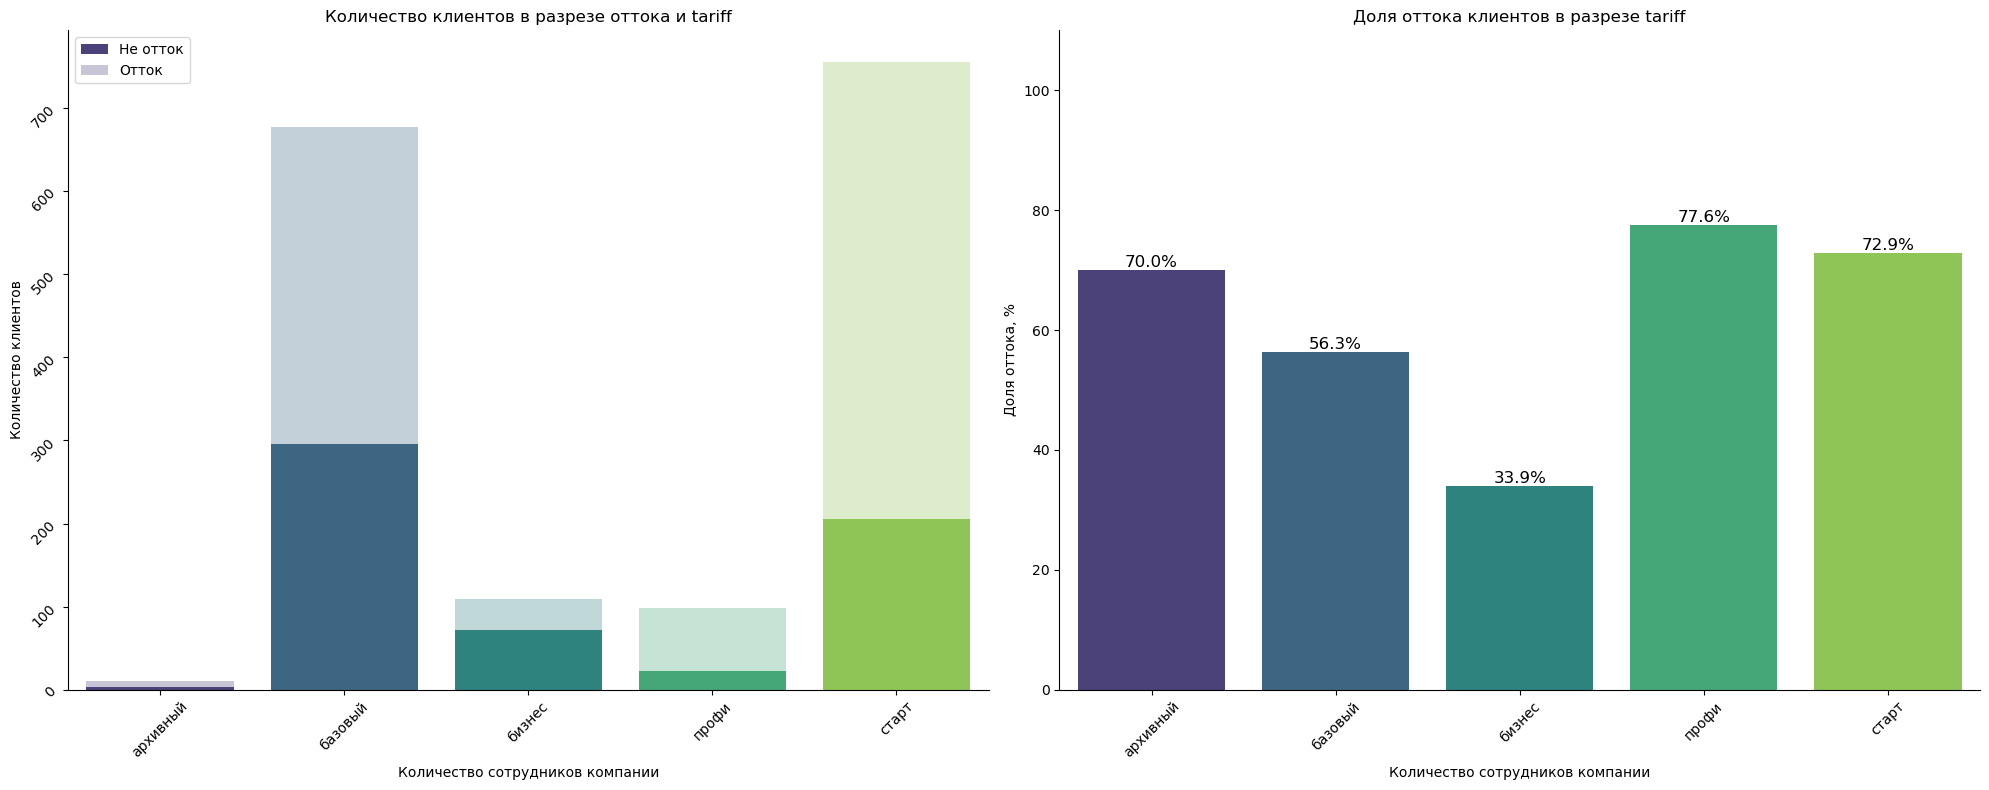

In [216]:
churn_viz(tariff_churn, 'tariff')

Я так и предполагала, что "профи" - одна из самых небольших выборок. Так что в принципе, можем подтвердить то, что увидели на графиках - стартовый и базовый тарифы самые отточные, а вот тариф "бизнес" выглядит перспективно.

In [217]:
# Посмотрим, какие по размеру компании пользуются какими тарифами
all_data.groupby('tariff')['employer_interval'].value_counts()

tariff    employer_interval
архивный  1-4                    9
          5-10                   1
базовый   1-4                  371
          5-10                 219
          11-20                 48
          21-30                 19
          31-50                 11
          >201                   4
          101-200                4
          51-100                 2
бизнес    1-4                   42
          11-20                 31
          5-10                  25
          >201                   4
          31-50                  4
          21-30                  3
профи     1-4                   50
          11-20                 21
          21-30                 11
          5-10                   8
          >201                   6
          51-100                 2
старт     1-4                  599
          5-10                 105
          11-20                 37
          21-30                  6
          31-50                  5
          51-100           

Преобладают тарифы "старт" и "базовый". Удивляет, что категория "1-4" представлена на первом по количеству компаний месте среди тарифов "бизнес" и "профи". Возникает вопрос, как работает отдел продаж платформы Gectaro? Есть ли персональный подход к клиентам? Определение их потребностей перед продажей? Как завязаны KPI отдела продаж на тарифы? Возможно, чтобы получить достойный доход, менеджеру по продажам надо только "профи" продавать, вот они и стараются... а клиенты потом уходят с испорченным впечатлением от соотношения цены/качества/возможностей сервиса?

In [218]:
# Добавляем столбец с оттоком к датасету activities
activities_with_churn = activities.merge(all_data[['company_id', 'churn']], on='company_id', how='left')

# Посчитаем отток для каждого года
year_churn = calculate_churn_rate(activities_with_churn, 'year')
year_churn

year  not_churn  churn  churn_rate
0  2019         77    440        85.1
1  2020        573   2928        83.6
2  2021       1230   4139        77.1
3  2022       2601   2979        53.4
4  2023       4055   1141        22.0
5  2024        983     44         4.3

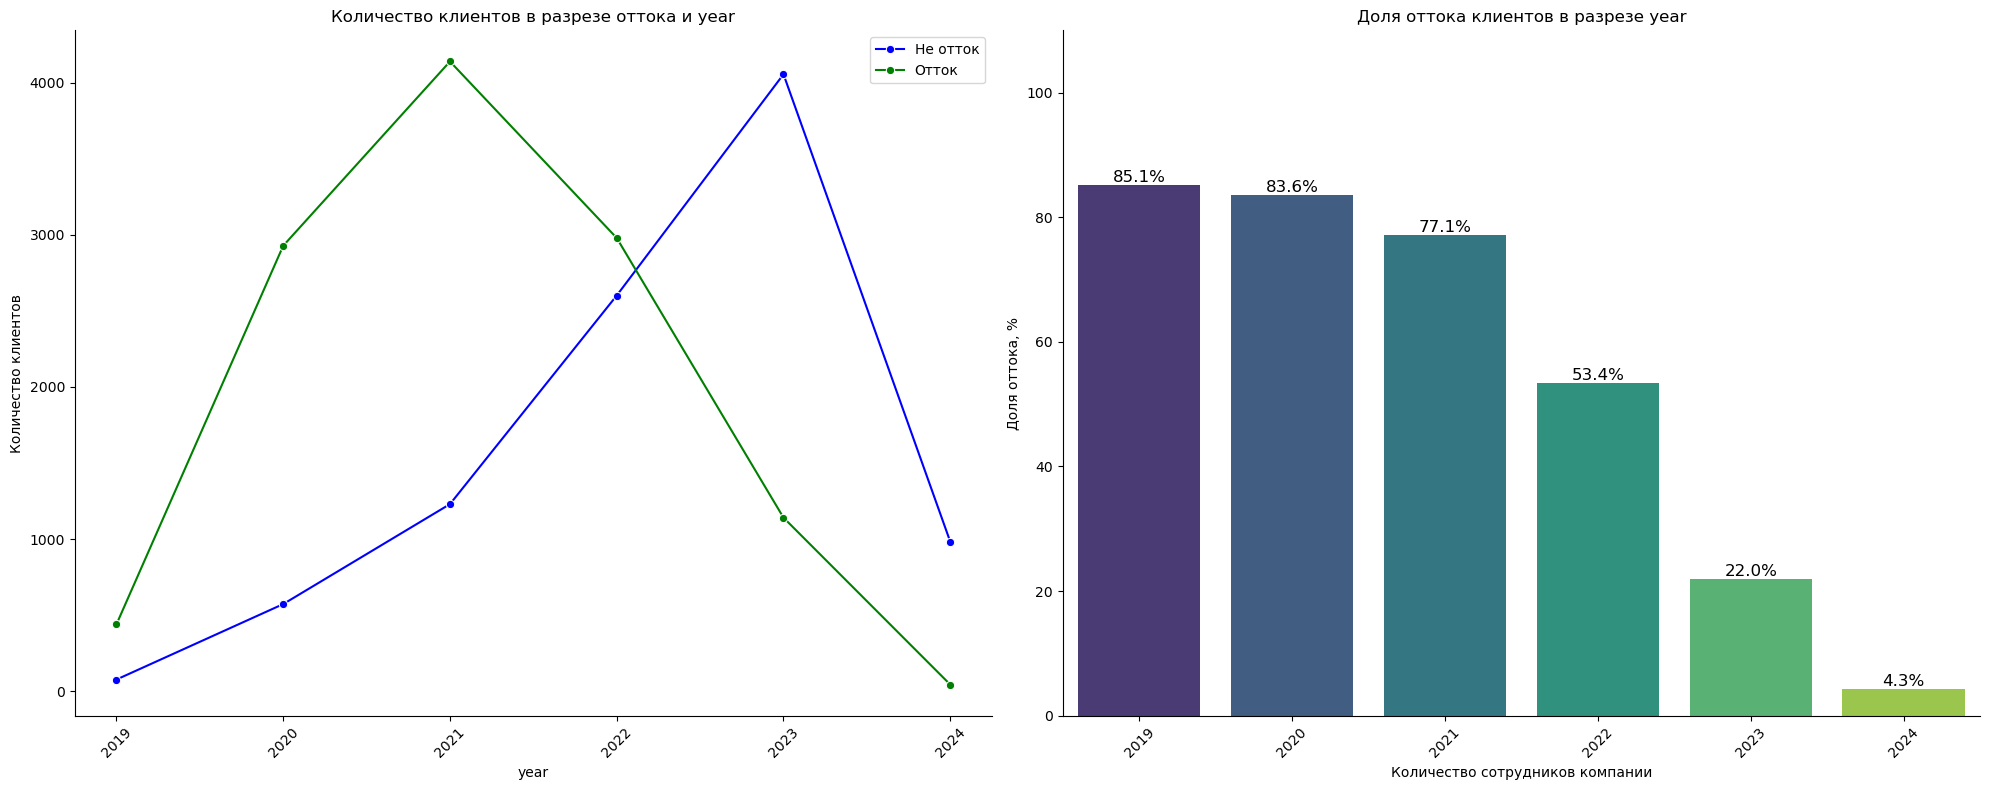

In [219]:
churn_viz_dinamic(year_churn, 'year')

Самая большие выборки у нас по 2021-2023 годам. Но в целом, отток самый высокий в 2019-2020 годах, потом он начинает снижаться и в 2023 году мы получили самый низкий отток 22%). Это говорит о том, что что-то изменилось к этому времени. Или случился бурный рост строительной отрасли, или, возможно, платформа стала отвечать требованиям большинства клиентов.

<a id="12"></a>
### Корреляция с целевой переменной

Увидеть корреляцию с целевой переменной "на глаз" не всегда возможно, особенно когда объем данных большой.
В нашем случае, я могу предположить, что отток клиентов связан с такими признаками как дата регистрации компании, а также с апдейтом данных по компаниям в конце 2023 года, с тарифом и его стоимостью, количеством проектов, контрагентов, заказов материалов, величиной компании.

Существует несколько метрик корреляции, которые используются для измерения силы и направления связи между двумя переменными. Наиболее распространенные метрик корреляции:
- Коэффициент корреляции Пирсона.

Измеряет линейную зависимость между двумя непрерывными переменными.
Принимает значения от -1 до 1, где 1 обозначает полную положительную линейную зависимость, -1 - полную отрицательную линейную зависимость, а 0 - отсутствие линейной зависимости.

- Коэффициент корреляции Спирмена.

Измеряет силу монотонной связи между двумя переменными.
Не требует, чтобы данные были нормально распределены.
Принимает значения от -1 до 1, где 1 обозначает полную монотонную положительную связь, а -1 - полную монотонную отрицательную связь.

- Коэффициент корреляции Кендалла.

Измеряет степень согласованности между ранжированными переменными.
Эффективен при работе с порядковыми данными и выборками с небольшим объемом.
Принимает значения от -1 до 1, где 1 обозначает полное согласование, а -1 - полное несогласование между ранжированными переменными.

- Коэффициент корреляции Мэтьюса.

Используется для оценки силы связи между двумя бинарными переменными.
Принимает значения от -1 до 1, где 1 обозначает полную согласованность, а -1 - полное несогласование между двумя бинарными переменными.

- Также мы можем воспользоваться уже примененной выше матрицей Phik.

Она позволяет оценить корреляцию между множеством различных переменных одновременно, формируя матрицу корреляции для всего набора данных. Значения в матрице Phik интерпретируются аналогично другим коэффициентам корреляции, где близкие к 1 значения указывают на сильную корреляцию между переменными, а близкие к 0 - на отсутствие корреляции.

Поскольку у нас данные смешанного типа, я воспользуюсь снова матрицей Phik.

In [220]:
# Определим функцию для построения корреляционного анализа данных на предмет поиска зависимостей между признаками
# и целевым значением с помощью phik_matrix для объединенных датасетов
def phik_correlation_all_data(data, data_interval_cols):
    matrix = data.phik_matrix(interval_cols = data_interval_cols)

    # Строим тепловую карту
    plt.figure(figsize=(15, 15))
    sns.heatmap(matrix, annot=True, cmap='PuBuGn', fmt='.2f', linewidths=0.5, square=True, cbar=False)
    plt.title('Матрица корреляции')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    plt.show()

In [221]:
# Подготовим датасет all_data к исследованию корреляционной зависимости
all_data_dropped = all_data.copy()

# Удаляем пропуски из датасета для корреляции
all_data_dropped.dropna(axis=0, inplace=True)

# Приведем тип данных во временных столбцах к integer
columns_to_convert = ['payed_until', 'b_created_at', 'pay_date', 'c_created_at', 'c_updated_at']
# Приведение к типу int
for column in columns_to_convert:
    all_data_dropped[column] = all_data_dropped[column].astype(int)

# Удаляем бесполезные или имеющие очевидную корреляцию, на мой взгляд, столбцы
columns_to_drop = ['last_date', 'R', 'r_score', 'role_id', 'year', 'month']
all_data_dropped.drop(columns=columns_to_drop, inplace=True)

# Посчитаем 95ый перцентиль для стобца contractors
percentile_95 = np.percentile(all_data['month_resource_orders'], 95, axis=0)
# Фильтруем данные, оставляя только значения меньше перцентиля 95
all_data_dropped = all_data_dropped.query('month_resource_orders < @percentile_95')

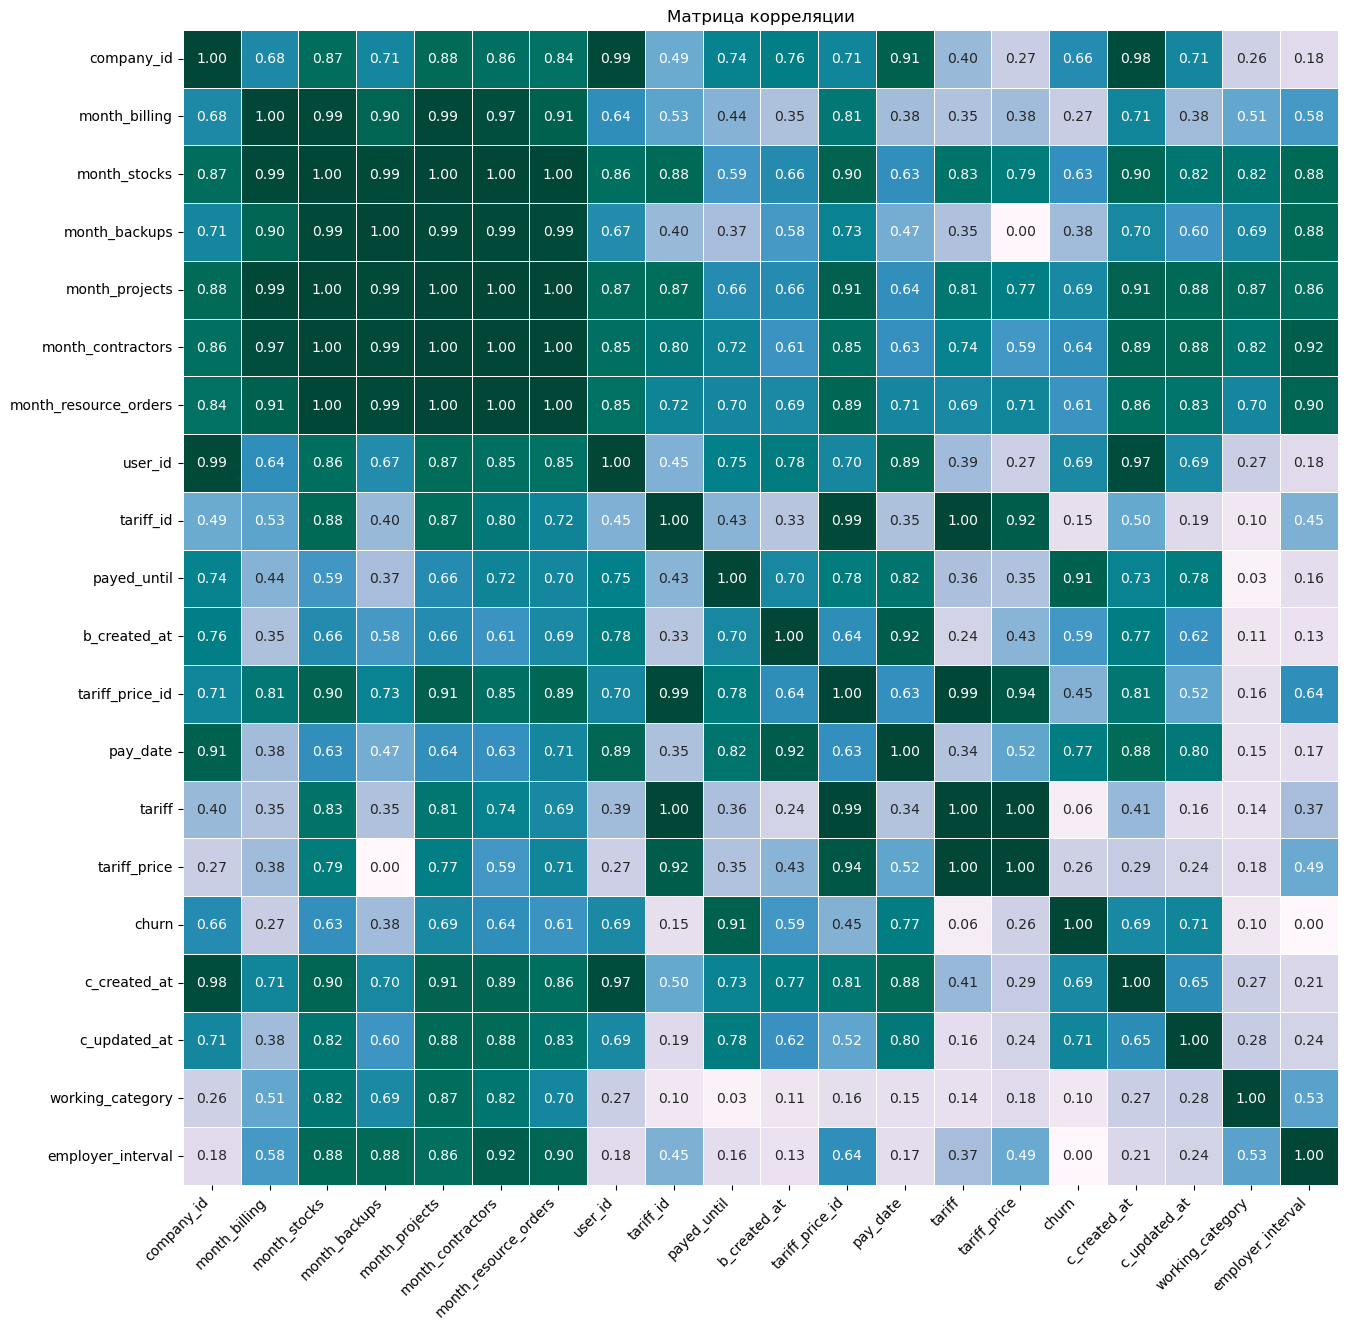

In [222]:
# # Построим phik matrix  для all_data_dropped
data_interval_cols=['company_id', 'user_id', 'payed_until', 'b_created_at', 'pay_date', 'c_created_at',
               'c_updated_at']
phik_correlation_all_data(all_data_dropped, data_interval_cols)

Отберем корреляции выше  или равные 0.3 (самая нижняя граница по "средней" корреляции).

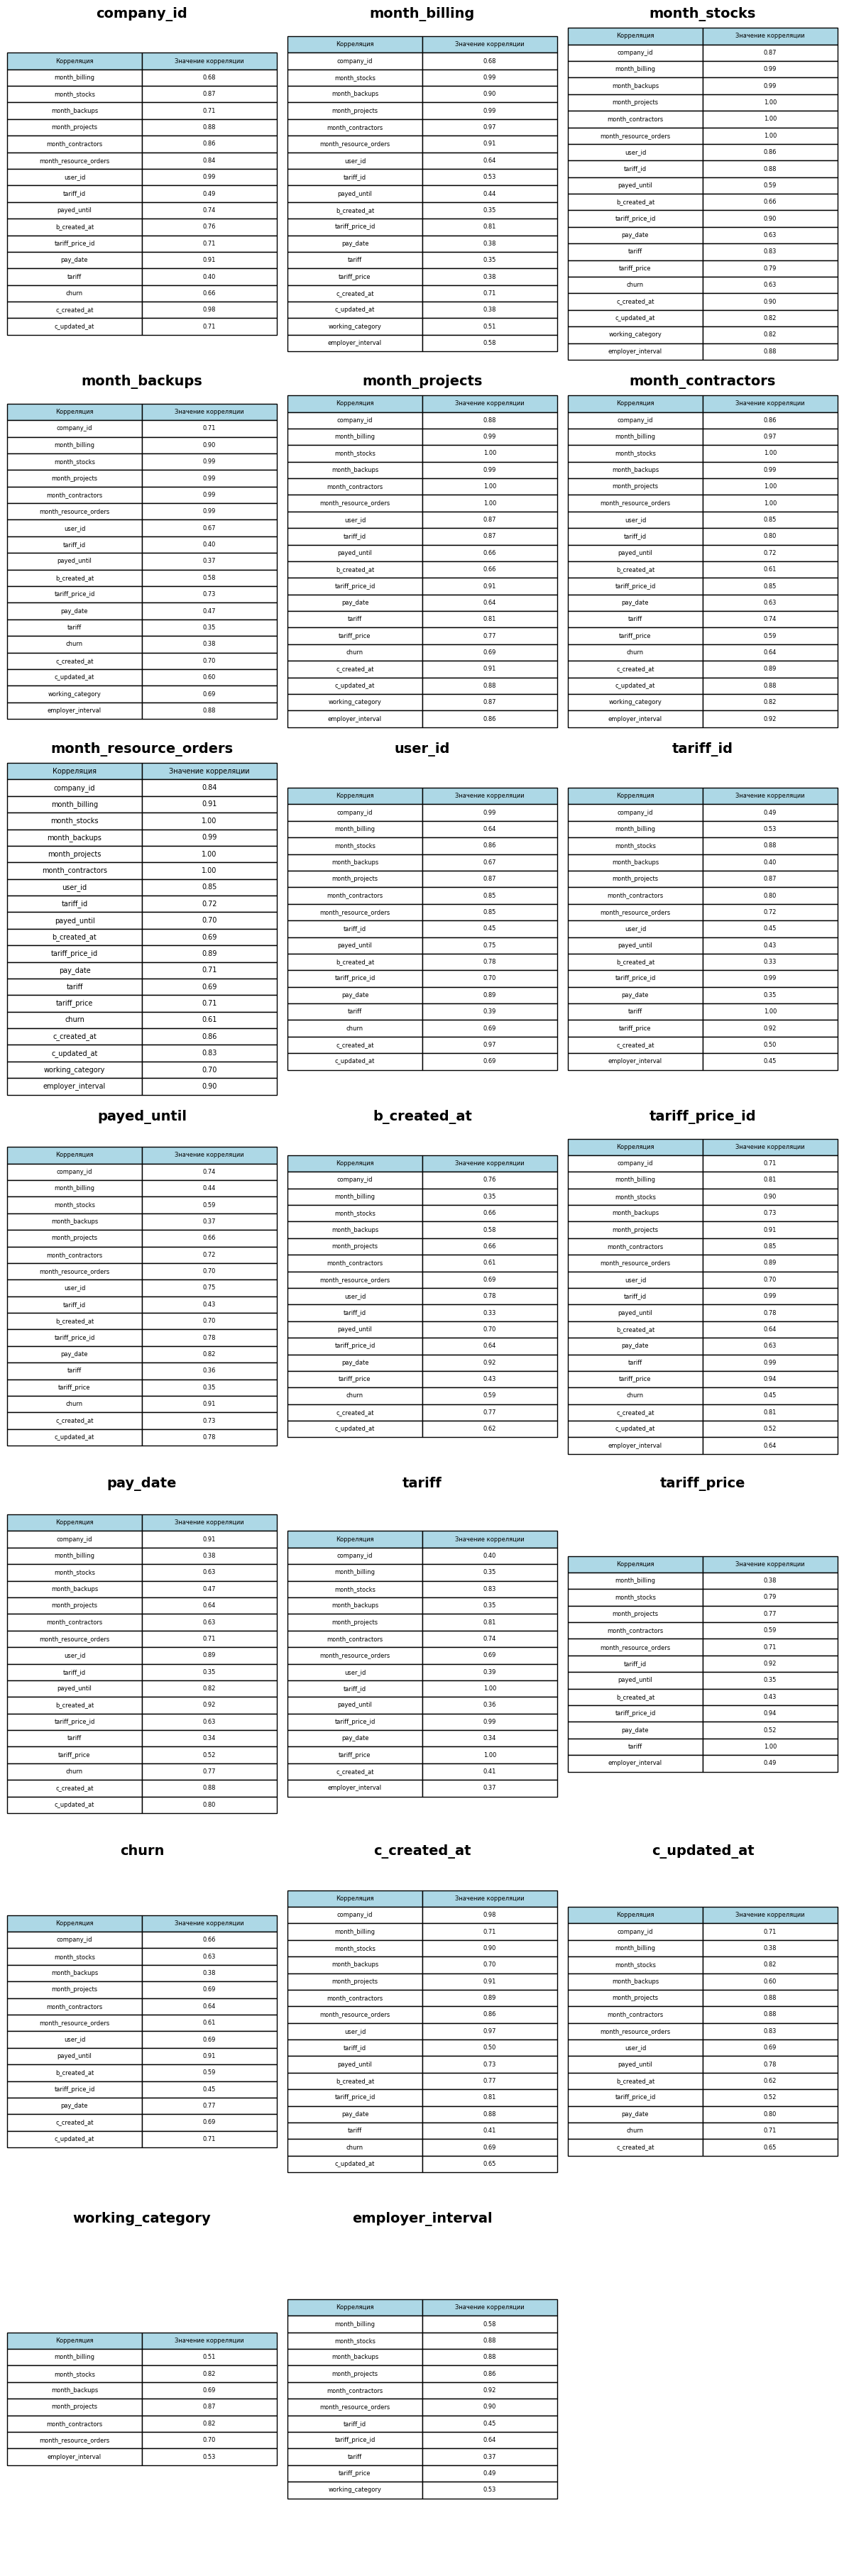

In [223]:
# Наша матрица корреляций
interval_cols=['company_id', 'user_id', 'payed_until', 'b_created_at', 'pay_date', 'c_created_at', 'c_updated_at']
matrix = all_data_dropped.phik_matrix(interval_cols = interval_cols)

# Задаем корреляцию выше или равно 0.3
high_correlation = matrix[matrix >= 0.3]

# Получаем индексы ячеек с корреляцией
high_correlation_indices = high_correlation.stack().index

# Создаем список для хранения таблиц
tables = []

# Создание таблиц для каждого столбца с высокой корреляцией
for column in high_correlation.index:
    correlation_descriptions = []
    for idx in high_correlation_indices:
        correlation_value = high_correlation.loc[idx].round(2)
        column1, column2 = idx
        if column1 == column and column2 != column: # удаляем корреляцию столбца с самим собой
            correlation_description = f'{column2}'
            correlation_value_str = f'{correlation_value:.2f}'
            correlation_descriptions.append((correlation_description, correlation_value_str))
    correlation_df = pd.DataFrame(correlation_descriptions, columns=['Корреляция', 'Значение корреляции'])
    tables.append((column, correlation_df))  # преобразуем DataFrame в таблицу и добавляем в список

# Фильтрация таблиц с высокой корреляцией (>= 0.3)
high_correlation_tables = [(column, table) for column, table in tables if float(table['Значение корреляции'].\
                                                                                     max()) >= 0.3]

# Определяем количество строк и столбцов на рисунке
num_cols = 3  # желаемое количество столбцов

# Вычисляем количество строк
num_rows = math.ceil(len(high_correlation_tables) / num_cols)

# Создаем фигуру и ось для отображения таблиц
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 5.2 * num_rows))

# Перебираем таблицы с высокой корреляцией
for i, (column, table) in enumerate(high_correlation_tables):
    # Определяем координаты ячейки с учетом размещения таблиц
    row = i // num_cols
    col = i % num_cols

    # Создаем таблицу для каждого столбца
    table_ax = axes[row, col] if num_rows > 1 else axes[col]  # определяем ось для таблицы в зависимости
                                                              # от количества строк
    table_ax.axis('off')
    table_ax.set_title(column, fontsize=14, fontweight='bold')

    table_ax.table(cellText=table.values,
                   colLabels=table.columns,
                   cellLoc='center',
                   loc='center',
                   colColours=['lightblue'] * len(table.columns))

# Скроем пустую рамку в конце вывода
for i in range(len(high_correlation_tables), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])


plt.tight_layout()
plt.show()

Итак, мы выявили следующие корреляции с нашей целевой перемнной (отток):
- payed_until - 91%;
- pay_date - 77%;
- user_id - 69%;
- c_updated_at - 71%;
- c_created_at - 69%;
- month_project - 69%;
- month_contractors - 64%;
- company_id - 66%;
- month_stocks - 63%;
- month_resource_orders - 61%;
- b_created_at - 59%;
- tariff_price_id - 45%;
- month_backups - 38%;
- month - 35%.

Что ж, наиболее высокии корреляции мы видим с датой окончания подписки, датой оплаты, номером компании и пользователя, и датой создания профиля компании и апдейта информации о ней. Это логично, но, к сожалению, они нам не сильно помогут разобраться в причинах оттока.

Подтвердились мои догадки о связи оттока со стоимостью услуги.

Выявилась высокая корреляция с активностями компаний. Изучу поподробнее зависимость оттока от активностей компании.

**Вывод:**

В рамках этапа исследовательского анализа данных:
- подготовили целевую переменную churn (отток) в датасете billing;
- выявили, что датасет billing содержит 1125 уникальных company_id, не представленных в других датасетах. Поэтому мы разделили billing на две части: matching_billing (где company_id совпадают с другими датасетами) и non_matching_billing (где не совпадают);
- сгруппировали датасет activities и people по уникальному номеру компаний;
- объединили датасеты activities_grouped, matching_billing, companies и присоединили к полученному датасету all_data стобец role_id из датасета people_grouped;
- проверили датасет all_data на пропуски, ожидаемо обнаружили их в столбцах role_id, pay_date. Оставили их без изменений;
- выделили в отдельный датасет left_clients ушедшие компании. Количество уникальных значений company_id - 318;
- проанализировали числовые признаки датасетов left_clients и all_data:
  - left_clients:
    - month_billing: медианное значение в районе 3-4 счетов за весь период присутствия компании в сервисе;
    - month_stocks: по медиане около 20, по среднему значению - около 80 за весь период;
    - month_backups: от 0 по медиане, до 10 посреднему значению за весь период;
    - month_projects: 10-15 по медиане, около 80 по среднему значению за весь период;
    - month_contractors: примерно 20 по медиане, около 55 по среднему значению за весь период;
    - month_resource_orders: от 0 по медиане до 20-30 по среднему значению за весь период;
    - в tariff_id у нас лидируют 2 (базовый) и 7, 4 (стартовые), в среднем 4ый встречается чаще всего;
    - payed_until: похоже, что много компаний ушли поздней осенью 2020 года, в июле-августе 2021 года, в мае-июне 2022 года, возможно, это связано пандемией Covid-19 и с политическими событиями;
    - b_created_at: больше всего счетов за услуги среди ушедших клиентов выставлялось в апреле-мае 2021 года. Этот период связан с массовой вакцинацией от Covid-19, люди стали выходить в оффлайн, число заказов на ремонтно-строительные работы могло вырасти;
    - tariff_price_id: лидируют судя по всему 7, 13, 23 id тарифов;
    - pay_date: пик оплат - апрель-май 2021 года;
    - tariff_price: судя по распределению цен лидируют стартовый или базовый тарифы в зависимости от даты;
    - last_date: видим три пика оттока по датам: осень 2021 года, осень 2022 года и начало лета 2023 года. Строительство, ремонты - область, сильно зависящая от сезонности. Лето - пик активности, возможно, к осени активность снижается, клиенты уходят. Отток летом 2023 года скорее всего связан с возможными снижениями темпов развития строительной отрасли в связи с экономической ситуацией в стране;
    - r_score: мы видим несколько пиков lifetime компаний: около года, чуть более 1.5 лет, затем около 3хлет;
    - c_created_at: в среднем, основная масса ушедших компаний регистрировалась весной-летом 2020 года. Снова вспоминается Covid-19 и изоляция. В этом случае облачный сервис был хорошим решением, чтобы организовать отчетность с удаленным доступом;
    - с_updated_at: пик апдейтов приходится на декабрь 2022 года, может быть начало 2023 года. Вероятно, сервис решил провести ревизию клиентов и актуализировать о них информацию.
  - all_data:
    - month_billing: медианное значение в районе 3-4 счетов за весь период присутствия компании в сервисе;
    - month_stocks: по медиане около 20, по среднему значению - около 125 за весь период;
    - month_backups: от 0 по медиане, до 20 по среднему значению за весь период;
    - month_projects: 15-20 по медиане, около 130 по среднему значению за весь период;
    - month_contractors: примерно 30 по медиане, около 90 по среднему значению за весь период;
    - month_resource_orders: от 0 по медиане до 100 примерно по среднему значению;
    - в tariff_id у нас лидируют 2 (базовый) и 7, 4 (стартовые), 10 (профи) почти догнал 4;
    - payed_until: похоже, что много компаний ушли зимой 2021, весной-летом 2022 и в конце 2023 года;
    - b_created_at: больше всего счетов за услуги среди ушедших клиентов выставлялось в апреле-мае 2021 года, зимой и летом 2022 года. Возможно, у сервиса конец года - это отчетный период, а весна-лето это сезонное время для строительных работ, количество проектов у клиентов увеличивается, соответственно, поток клиентов тоже растет;
    - tariff_price_id: лидируют судя по всему 9, 23-25 id тарифов;
    - pay_date: распределение по пикам в принципе совпадает с датами выставления счетов за оплату сервиса;
    - tariff_price: судя по распределению цен лидируют стартовый или базовый тарифы в зависимости от даты;
    - last_date: у части клиентов сервис оплачен до середины 2024 года, затем мы видим пик оплат до весны 2025 года, и более редкие случаи с оплатами до 2026 года и далее;
    - r_score: в среднем, разница между датой начала проекта и датой окончания подписки проходило около года или около 1.5 лет. Более длинные периоды - это уже аномалии. Но есть и компании, lifetime которых менее 100 дней. Вероятно, после некоторого тестого периода их что-то не устроило;
    - churn: оставшихся немногим больше ушедших, разница не выглядит значительной;
    - R: категория 1 - ушедшие, категория 3 - оставшиеся, их меньше;
    - c_created_at: основная масса компаний регистрировалась весной-летом 2021 года. Думаю, тут определенно есть влияние пандемии Covid-19;
    - с_updated_at: пик апдейтов приходится на декабрь 2022 года, может быть начало 2023 года. Вероятно, сервис решил провести ревизию клиентов и актуализировать о них информацию.
  - по данным столбца с разницей в дате окончания подписки и датой начала нашего проекта создается впечатление, что очень много компании - "однодневок", пришли, возможно, подключили пробный период, посмотрели и сразу ушли. Возможно, скорее всего их не устроил функционал платформы, показался недостаточным или, наоборот, избыточным;
  - изучили средние значения по признакам в разрезе оттока:
    - средние значения user_id, company_id растут от ушедщих к оставшимся. Это понятно, нумерация новых клиентов идет по порядку от 1 и выше (я надеюсь);
    - период ухода компаний плюс-минус 1.5-2 года от даты старта исследовательского проекта;
    - по активностям компании ситуация следующая: все активности, кроме выставления счетов растут от ушедших к оставшимся, при чем средние по складам, контрагентам и заказу материалов выросли существенно у оставшихся, тогда как среднее количество счетов наоборот упало. Возникает гипотеза ухода: бизнес плохо развивается, нет проектов, сервис не нужен. Это похоже на правду, так как среди клиентов много маленьких компаний численностью до 4 человек;
    - средние значения тарифа у нас так и или иначе склоняются к стартовому;
    - tariff_price_id скорее всего растут аналогично принципу в столбцах user_id, company_id, role_id. Меняется цена тарифа, ей присваивают новый id выше по порядковому номеру;
    - цена тарифа также относится или к стартовому, или к базовому в зависимости от даты. Уже явно прослеживается факт, что чаще уходят компании с начальными тарифами;
    - вероятно, самый большой отток был в конце 2022 начале 2023 года, возможно, по причине апдейта данных самим сервисом;
    - многие компании приходили в сервис с осени 2020 года. Пандемия Covid-19 опять же? В офис ходить нельзя, удобный сервис в облаке закрывает много вопросов;
    - большинство ушедших компаний пользовалось стартовым тарифом, большинство оставшихся пользуется базовым.
  - проанализировали категориальные признаки датасетов left_clients и all_data:
    - tariff: самый высокий отток в тарифе "профи" (77.6%), затем "старт" (72.9%) и "базовый" (56.3%), брать в расчет тариф "архивный" мы сейчас не будет, там слишком мало данных. Самый низкий отток у тарифа "бизнес". Надо посмотреть на размеры выборки, но  могу предположить, что если "профи" от "бизнеса" отличается (кроме цены и количества пользователей) только VIP-поддеркой, то либо поддержка нужна не часто, либо качество оказываемых услуг не стоит того, чтобы за это переплачивать. Тоже и со стартовым, но в другую сторону. Можно немного доплатить и получить чуть более расширенный пакет "базовый";
    - working_category: в категориях "Девелопмент", "Другое" и "Дизайн" крайне мало значений, поэтому их не берем в расчет при анализе. Таким образом:
      - cамый высокий отток в категории "Ремонт и отделка" - 75.8%. Возможно, ремонтом занимаются небольшие компании, ИП, живут от проекта до проекта, не до таких сервисов;
      - далее, отток  в категории "Отраслевое строительство" - 66.4%. Сюда входит, например, строительство рыбоводных ферм, домов из кедра, детских площадок и т.д. То есть область сама по себе довольно узкая. И отток клиентов может быть связан не с самим сервисом, а отсутствием заказов у клиента;
      - категория "Инженерные работы" - 64.5%. Тоже область сужена (электрика, монтаж фасадов, остекление, водопровод). Я, как заказчик строительных работ, при глобальном ремонте предпочла бы услугу под ключ, а не поиск 10 разных подрядчиков.
      - в категории "Строительство" отток тоже не низкий - 61.3%;
      - категория "Без категории", к сожалению, вряд ли поможет нам выявить причины оттока. Могу только предположить, что клиент, не заполнивший профиль до конца не выглядит серьезно настроенным на работу. Или его деятельность может быть настолько неспециализированной, он занимается всем подряд, что тоже не приносит стабильности.
    - employer_interval: чаще всего уходят компании численностью от 21 до 30 человек (71.8%), затем 1-4 (65.7%), на третьем месте 5-10 человек (63.4%). Самые стабильные компании от 51 до 100 человек (28.6%) и от 101 до 200 человек (25%). Возможно, чем меньше компания, тем сложнее ей выжить в конкурентной среде, обеспечить постоянный приток заказов, иначе оплата такого рода сервиса является ненужной тратой денег. Да и объемы работы может не те, таблички в MS Excel для их отчетности достаточно может быть. У очень крупных компаний >200 человек отток уже снова растет (53.3%);
    - R: компании с рейтингом 3 пока ожидаемо не ушли.
  - если рассматривать причины, не связанные с сервисом, могу предположить, что на отток могут влиять отсутствие проектов в связи с такими факторами, как высокая конкуренция, сезонность, Covid-19, отток людей из страны в связи с политическими и экономическими событиями, что снизило спрос на услуги, уменьшило возможное количество небольших проектов и др.
- провели корреляционный анализ наших смешанных по типам данных с помощью матрицы Phik:
  - выявили следующие корреляции с нашей целевой переменной (отток):
    - payed_until - 91%;
    - pay_date - 77%;
    - user_id - 69%;
    - c_updated_at - 71%;
    - c_created_at - 69%;
    - month_project - 69%;
    - month_contractors - 64%;
    - company_id - 66%;
    - month_stocks - 63%;
    - month_resource_orders - 61%;
    - b_created_at - 59%;
    - tariff_price_id - 45%;
    - month_backups - 38%;
    - month - 35%.

Что ж, наиболее высокии корреляции мы видим с датой окончания подписки, датой оплаты, номером компании и пользователя, и датой создания профиля компании и апдейта информации о ней. Это логично, но, к сожалению, они нам не сильно помогут разобраться в причинах оттока.

Подтвердились мои догадки о связи оттока со стоимостью услуги.

Выявилась высокая корреляция с активностями компаний.

[Возврат к описанию проекта](#toc)

<a id="13"></a>
## Проверка гипотез и анализ признаков оттока

<a id="14"></a>
### Портрет массовой компании-клиента

In [224]:
# Считаем среднее количество сотрудников в компаниях
average_employees = (people
                     .groupby('company_id')['user_id']
                     .nunique()
                     .mean()
                     .round()
                    )
print('Среднее количество сотрудников в компании:', average_employees)

Среднее количество сотрудников в компании: 5.0


Как много вообще, компаний, у которых количество пользователей больше среднего значения?

In [225]:
user_count = people.groupby('company_id')['user_id'].nunique()
user_count_median = people.groupby('company_id')['user_id'].nunique().mean()
selected_companies = user_count[user_count > user_count_median].index
selected_companies

Index([  21,  408,  541,  622,  628,  667,  688,  694,  720,  749,
       ...
       8862, 8869, 8899, 8900, 8955, 8968, 9148, 9257, 9278, 9331],
      dtype='int64', name='company_id', length=230)

У 230 компаний, внесенных в систему сервиса пользователей больше 5. Мы же все-таки остановимся на этой цифре, так как мы формируем портрет массовой компании-заказчика.

In [226]:
# Определим среднюю длительность использования сервиса по категориям
# Группируем данные по компаниям и вычисляем срок жизни для каждой компании, а затем берем среднее значение
mean_usage_duration_category = (all_data
                                .groupby('working_category')
                                .agg(avg_days=('payed_until', lambda x: (x - all_data['c_created_at']).mean()))
                                .reset_index()
                                .sort_values(by='avg_days')
                               )
mean_usage_duration_category['avg_days'] = mean_usage_duration_category['avg_days'].dt.days
mean_usage_duration_category

working_category  avg_days
1               Девелопмент       478
0             Без категории       485
7             Строительство       486
6          Ремонт и отделка       547
4        Инженерные cистемы       569
5  Отраслевое строительство       628
3                    Другое       656
2                    Дизайн       840

In [227]:
# Определим функцию для визуализации средних значений
def avg_days_viz(data, feature):
    
    plt.figure(figsize=(8, 5))
    ax = plt.gca()
    
    sns.barplot(data=data, x=feature, y='avg_days', palette='viridis', ax=ax)
    plt.xlabel(feature)
    plt.ylabel('Среднее количество дней')
    plt.title(f'Среднее количество дней по {feature}')
    plt.xticks(rotation=45)
    
    # Добавление числовых подписей на столбцы
    for i, rect in enumerate(ax.patches):
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.0f}', ha='center', color='black', 
                 va='bottom', fontsize=10)
    
    plt.tight_layout()
    sns.despine()
    plt.show()

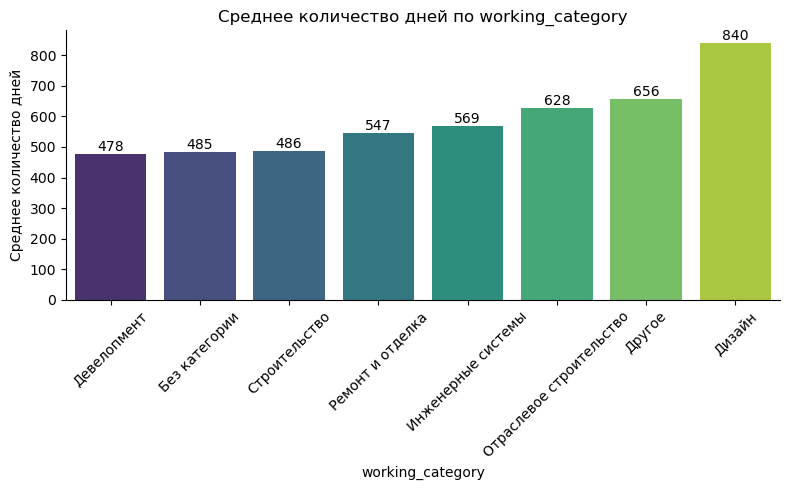

In [228]:
# Визуализируем средний lifetime по working_category
avg_days_viz(mean_usage_duration_category, 'working_category')

In [229]:
# Определим среднюю длительность использования сервиса по количеству сотрудников
# Группируем данные по компаниям и вычисляем срок жизни для каждой компании, а затем берем среднее значение
mean_usage_duration_interval = (all_data
                                .groupby('employer_interval')
                                .agg(avg_days=('payed_until', lambda x: (x - all_data['c_created_at']).mean()))
                                .reset_index()
                                .sort_values(by='avg_days')
                               )
mean_usage_duration_interval['avg_days'] = mean_usage_duration_interval['avg_days'].dt.days
mean_usage_duration_interval

employer_interval  avg_days
3             21-30       460
6            51-100       475
0               1-4       486
1           101-200       488
4             31-50       500
2             11-20       523
5              5-10       566
7              >201       640

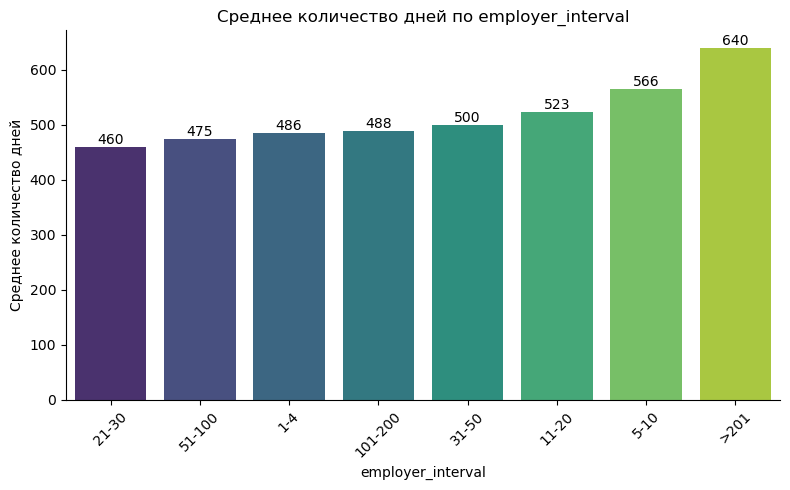

In [230]:
# Визуализируем средний lifetime по employer_interval
avg_days_viz(mean_usage_duration_interval, 'employer_interval')

lifetime компании на платформе различается в зависимости от рабочих категорий и размера компании. Один из самых низких лайфтаймов у компаний в категории "Строительство" и с количеством человек 21-30. Самый высокий из крупных выборок у категорий "Отраслевоес строительство" и "Другое", с количеством человек более 200.

In [231]:
# Добавим новый столбец lifetime в датасет
all_data['lifetime'] = all_data['payed_until'] - all_data['c_created_at']

Для того, чтобы понять стабильно ли платит компания, посчитаем разницу между датой платежа и датой создания счета. И если эта разница не превышает, к примеру, месяц, считаем, что компания платит стабильно.

In [232]:
# Определяем порог для стабильности оплат (1 месяц)
payment_stability_threshold = timedelta(days=30)

# Функция для проверки стабильности оплаты

def is_payment_stable(data):
    # Проверяем наличие пропусков в столбцах pay_date и b_created_at
    if pd.isnull(data['pay_date']) or pd.isnull(data['b_created_at']):
        return np.nan

    # Вычисляем количество дней между выставлением счета за сервис и оплатой
    payment_duration = data['pay_date'] - data['b_created_at']
    if payment_duration <= payment_stability_threshold:
        return 1
    else:
        return 0

# Создаем новый столбец is_payment_stable, где 1 - стабильно платит, 0 - нет
all_data['is_payment_stable'] = all_data.apply(is_payment_stable, axis=1)

Подсчитаем долю компаний со стабильными оплатами.

In [233]:
# Посчитаем количество стабильных и нестабильных оплат
payment_stability_counts = all_data['is_payment_stable'].value_counts()

# Получаем количество стабильных оплат
stable_payments = payment_stability_counts[1]

# Получаем общее количество оплат
total_payments = payment_stability_counts.sum()

# Считаем долю стабильных оплат
stable_payments_ratio = round(stable_payments / total_payments * 100, 1)
print('Доля стабильных оплат:', round(stable_payments_ratio, 2))

Доля стабильных оплат: 96.8


In [234]:
# Определим среднее время с момента последнего обновления по компаниям
mean_last_update_time = (analyse_date - all_data['c_updated_at']).mean()
print('Среднее время с момента последнего обновления:', mean_last_update_time)

Среднее время с момента последнего обновления: 368 days 05:01:11.606904908


Получается, что данные по компаниям без особой необходимости апдейтятся примерно раз в год.

In [235]:
# Проанализируем какой тарифной группой пользуется массовая компания-клиент
tariff_usage = all_data['tariff'].value_counts(normalize=True)
tariff_usage

tariff
старт       0.457904
базовый     0.410660
бизнес      0.066021
профи       0.059358
архивный    0.006057
Name: proportion, dtype: float64

In [236]:
# Определим наиболее популярный тарифный план
popular_tariff = companies['billing_tariff_id'].mode()[0]
print('Наиболее популярный тарифный план:', popular_tariff)

Наиболее популярный тарифный план: 2


Итак, у нас получился следующий портрет массовой компании-клиента:
- среднее количество пользователей - 5 человек;
- средний lifetime в сервиса чуть меньше полутора лет;
- платит по счетам в течении месяца стабильно (в 96.8%) случаев;
- апдейты по компании происходят в среднем раз в год;
- самая популярная тарифная группа - "старт";
- самый популярный тариф - 2 ("базовый").

Я считаю, что такой портрет получился вполне закономерно. Исходя из всего проделанного ранее анализа мы уже делали косвенные выводы, что основной клиент сервиса, скорее всего малый бизнес с небольшим количеством сотрудников. Так как ранее разница между стартовым и базовым тарифом была меньше, чем сейчас, люди выбирали чуть более дорогой тариф, но с большим функционалом, поэтому лидирует "базовый" тариф. Что касается lifetime, то мы также видели  некую волнообразную цикличность на графиках, когда шел сначала пик прихода в сервис, затем пик оттока и т.д.

<a id="15"></a>
### Формирование гипотез

In [237]:
# Удалим пропуски в данных перед проверкой гипотез
data_cleaned = all_data.copy()
display(data_cleaned.shape)
data_cleaned.dropna(inplace=True)
display(data_cleaned.shape)

(1651, 28)

(853, 28)

<a id="16"></a>
#### Первая гипотеза:
- общая формулировка: проверка гипотезы наличия зависимости уходов компаний от размера компании.
- $$
\begin{cases}
H_0:\text{отток для компаний разного размера одинаковый.}
\\
H_1:\text{отток для компаний разного размера отличается.}
\end{cases}
- $$

Для проверки гипотезы о равенстве двух категориальных переменных в разных группах мы использовуем тест хи-квадрат (chi-square test). Для проведения этого теста нам нужно подготовить данные в виде таблицы сопряженности, которая показывает количество наблюдений для каждой комбинации категорий.

In [238]:
# Создадим таблицу сопряженности между размером компании и оттоком
churn_by_size = pd.crosstab(all_data['employer_interval'], all_data['churn'])

# Проведем тест Хи-квадрат
chi2, p_value, dof, expected = chi2_contingency(churn_by_size)

# Выведем результаты теста
print("Хи-квадрат статистика:", chi2)
print("p-value:", p_value)
print('Степени свободы:', dof)
print('Ожидаемые частоты:')
print(expected)

# Проверим уровень значимости
alpha = 0.05
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: отток для компаний разного размера отличается.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: отток для компаний разного размера одинаковый.')

Хи-квадрат статистика: 18.119524220958326
p-value: 0.011442214864673573
Степени свободы: 7
Ожидаемые частоты:
[[387.92125984 683.07874016]
 [  1.4488189    2.5511811 ]
 [ 49.62204724  87.37795276]
 [ 14.12598425  24.87401575]
 [  7.24409449  12.75590551]
 [129.66929134 228.33070866]
 [  2.53543307   4.46456693]
 [  5.43307087   9.56692913]]
Отвергаем нулевую гипотезу: отток для компаний разного размера отличается.


Хи-квадрат статистика: 4520.305364511564 измеряет отклонение фактических частот от ожидаемых частот в таблице сопряженности. Большее значение указывает на более значимые различия между наблюдаемыми и ожидаемыми частотами.

p-value: 0, это говорит о том говорит, что существует статистически значимая связь оттоком и размером компаний-клиентов.

Степени свободы: 7 это количество независимых переменных в статистическом тесте. В данном случае степени свободы равны 7, так как таблица сопряженности имеет 8 рядов и 2 столбца, и степени свободы рассчитываются как (число_рядов - 1) * (число_столбцов - 1).

Ожидаемые частоты - это матрица с ожидаемыми частотами, которые были бы наблюдаемы в каждой ячейке таблицы сопряженности, если нулевая гипотеза была бы верна.

Таким образом, проверка статистическим тестом говорит нам, что мы можем отвергнуть нулевую гипотезу и предположить, что отток для компаний разного размера отличается. Проверим это.

In [239]:
# Cчитаем отток по employer_interval
churn_employer = calculate_churn_rate(all_data, 'employer_interval').sort_values(by='churn_rate', ascending=False)
churn_employer

employer_interval  not_churn  churn  churn_rate
3             21-30         11     28        71.8
0               1-4        367    704        65.7
5              5-10        131    227        63.4
2             11-20         64     73        53.3
7              >201          7      8        53.3
4             31-50         10     10        50.0
6            51-100          5      2        28.6
1           101-200          3      1        25.0

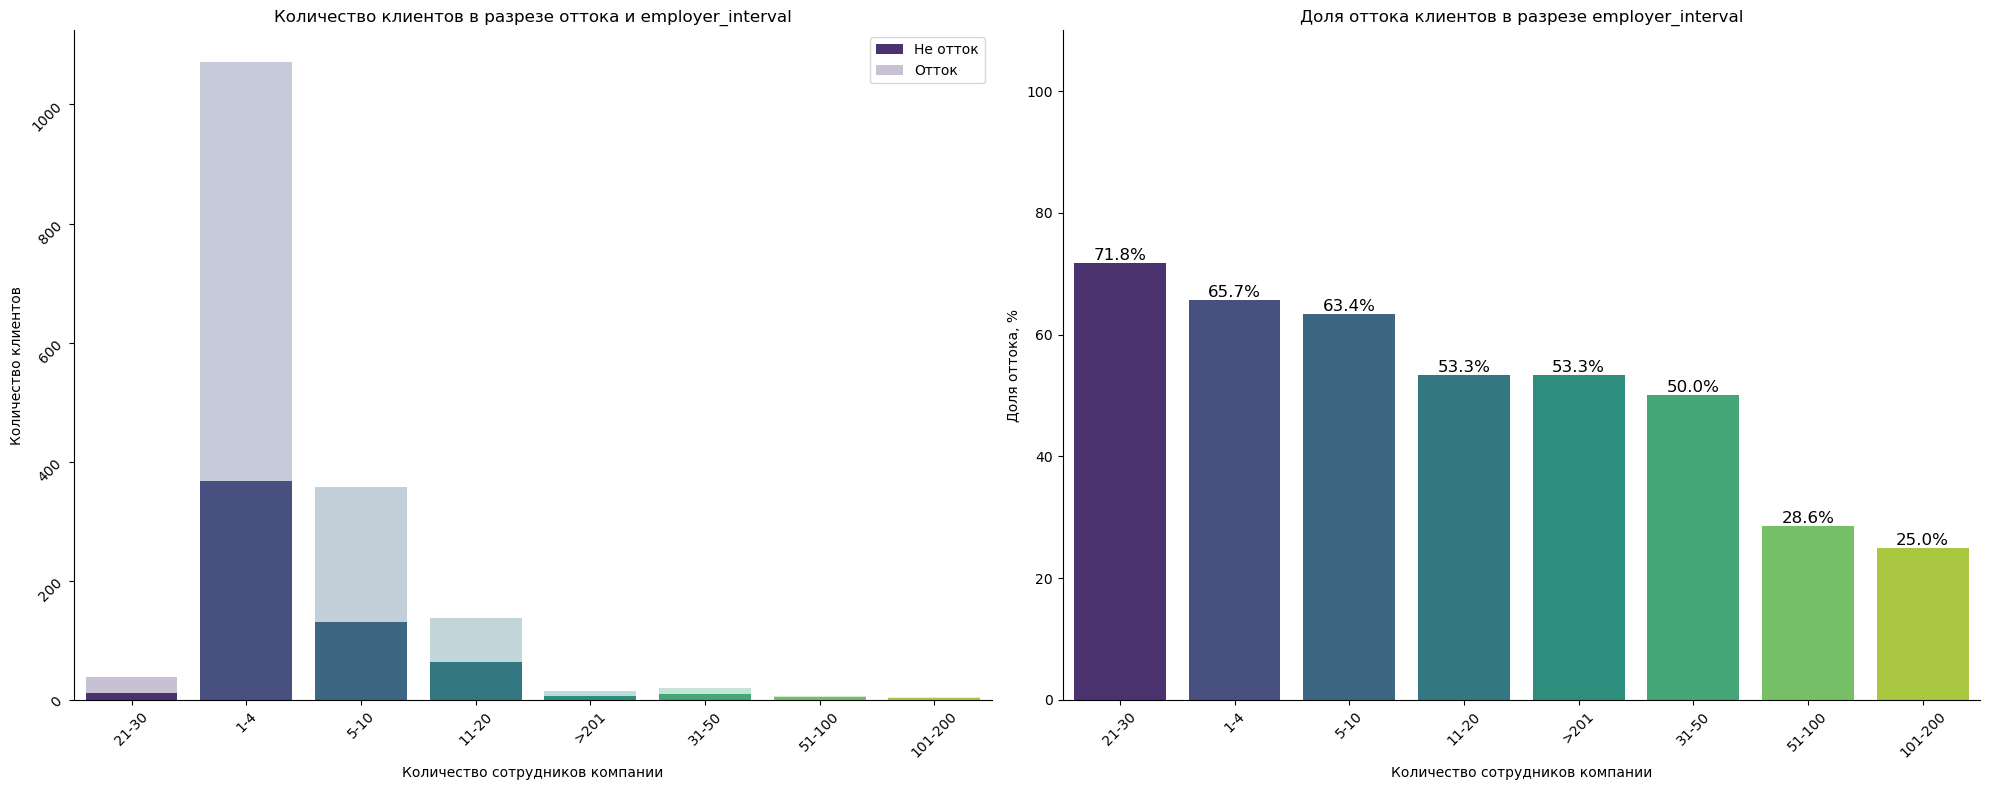

In [240]:
# Визуализируем распределение оттока по количеству сотрудников в компании
churn_viz(churn_employer, 'employer_interval')

Действительно, отток для компаний разного размера отличается. Самый высокий отток в группе "21-30", но она не самая крупная по размеру, далее идет группа "1-4", она самая крупная по размеру, далее группа "5-10", вторая поразмеру выборка. Думаю, что наша целевая аудитория по оттоку находится в группе с численностью "1-4" человека.

<a id="17"></a>
#### Вторая гипотеза:
- общая формулировка: проверка гипотезы наличия зависимости уходов компаний от тарифа.
- $$
\begin{cases}
H_0:\text{отток для компаний с разными тарифами одинаковый.}
\\
H_1:\text{отток для компаний с разными тарифами отличается.}
\end{cases}
- $$

Для проверки данной гипотезы воспользуемся аналогичным статистическим тестом хи-квадрат (chi-square test).

In [241]:
# Создадим таблицу сопряженности между типом тарифа, оплаченного компанией и оттоком
churn_by_tariff = pd.crosstab(all_data['tariff_id'], all_data['churn'])

# Проведем тест Хи-квадрат
chi2, p_value, dof, expected = chi2_contingency(churn_by_tariff)

# Выведем результаты теста
print("Хи-квадрат статистика:", chi2)
print("p-value:", p_value)
print('Степени свободы:', dof)
print('Ожидаемые частоты:')
print(expected)

# Проверим уровень значимости
alpha = 0.05
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: отток для компаний с разными тарифами отличается.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: отток для компаний с разными тарифами одинаковый.')

Хи-квадрат статистика: 162.77602425619426
p-value: 1.427018485722965e-28
Степени свободы: 12
Ожидаемые частоты:
[[2.40141732e+02 4.22858268e+02]
 [2.39055118e+01 4.20944882e+01]
 [6.48346457e+01 1.14165354e+02]
 [3.62204724e+00 6.37795276e+00]
 [2.06094488e+02 3.62905512e+02]
 [3.73070866e+01 6.56929134e+01]
 [7.96850394e+00 1.40314961e+01]
 [1.44881890e+00 2.55118110e+00]
 [3.25984252e+00 5.74015748e+00]
 [5.43307087e+00 9.56692913e+00]
 [1.44881890e+00 2.55118110e+00]
 [2.17322835e+00 3.82677165e+00]
 [3.62204724e-01 6.37795276e-01]]
Отвергаем нулевую гипотезу: отток для компаний с разными тарифами отличается.


Таким образом, проверка статистическим тестом говорит нам, что мы можем отвергнуть нулевую гипотезу и предположить, что отток для компаний с разными тарифами отличается. Проверим это.

In [242]:
# Cчитаем отток по tariff_id
churn_tariff_id = calculate_churn_rate(all_data, 'tariff_id').sort_values(by='churn_rate', ascending=False)
churn_tariff_id['tariff'] = churn_tariff_id['tariff_id'].apply(categorization_tariff)
churn_tariff_id

tariff_id  not_churn  churn  churn_rate    tariff
2           4         14    165        92.2     старт
1           3          6     60        90.9     профи
7          11          1      3        75.0     старт
3           6          3      7        70.0  архивный
4           7        186    383        67.3     старт
6          10          9     13        59.1     профи
0           2        287    376        56.7   базовый
9          17          9      6        40.0   базовый
5           9         66     37        35.9    бизнес
8          13          6      3        33.3     профи
10         19          4      0         0.0     старт
11         20          6      0         0.0    бизнес
12         21          1      0         0.0     профи

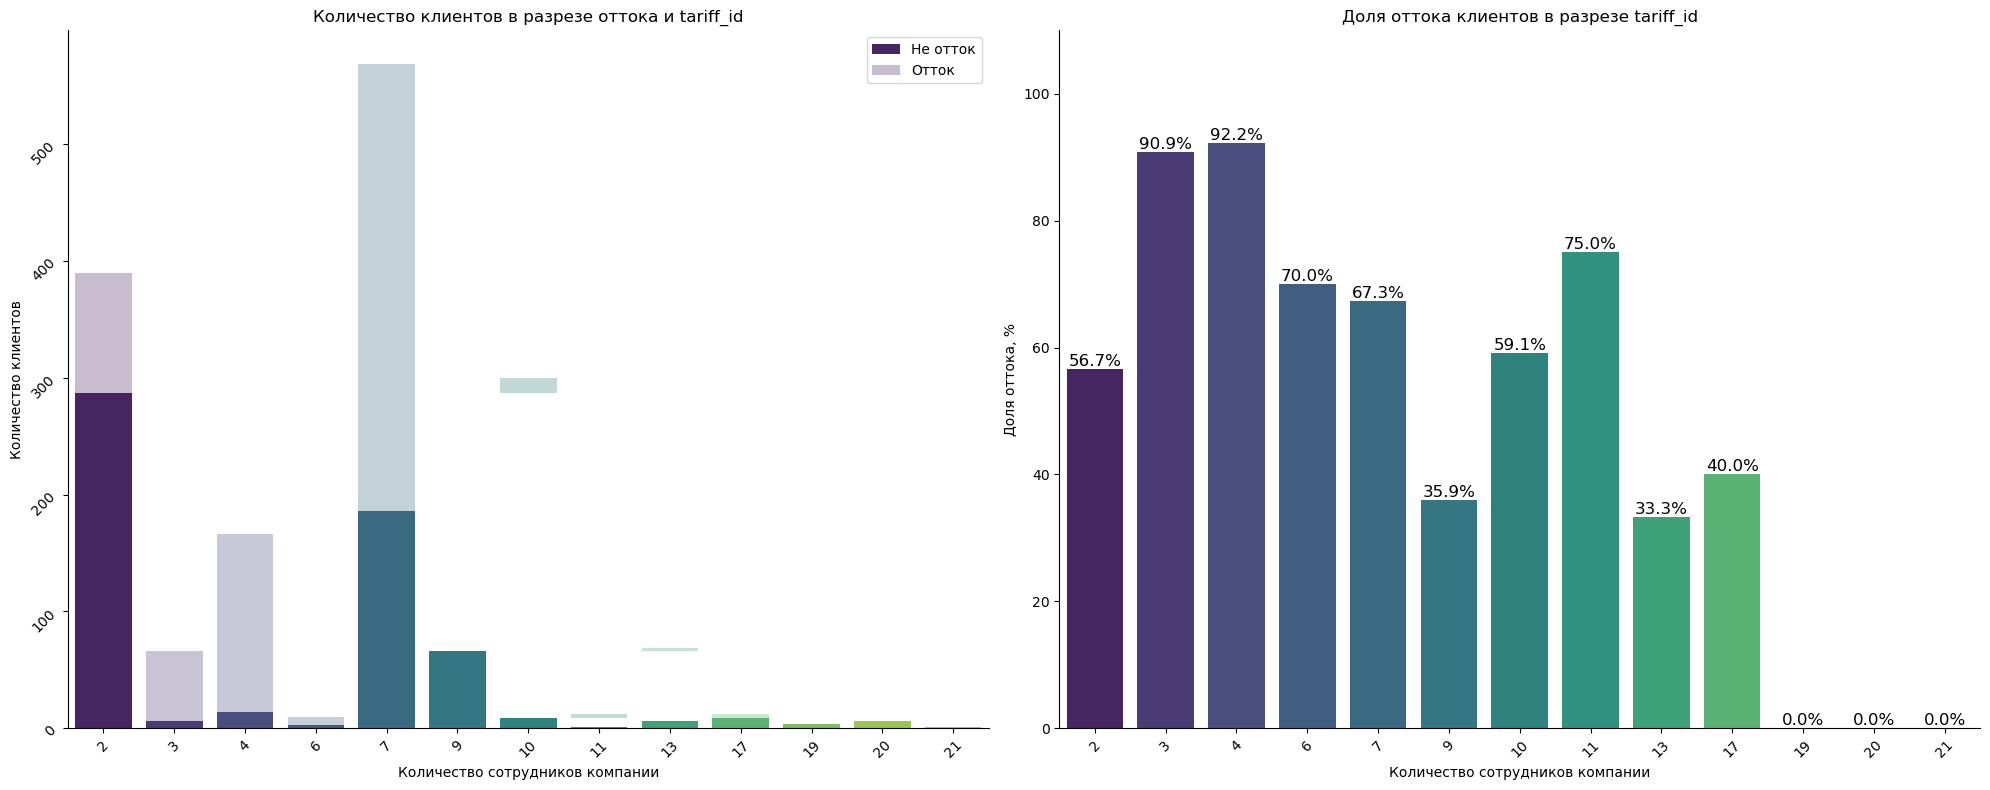

In [243]:
# Визуализируем распределение оттока по тарифам
churn_viz(churn_tariff_id, 'tariff_id')

Действительно, отток для компаний c разным тарифом отличается.
Одна из самых больших выборок с тарифом 2 ("базовый") имеет не самый высокий отток (56.7%), самая большая по величине выборка тарифной группы 7 ("старт") имеет отток выше (67.3%), далее 4 (тоже "старт") - очень высокий отток (92.2%). Замыкает наш лист по большим по размеру выборкам тариф 9 ("бизнес") - в нем отток один из самых низких (35.9%), если сравнивать именно размер выборки и отток. Также довольно высокий отток при небольших по размерам выборках мы видим на тарифе 11 ("старт") и тарифах 3 и 10 ("профи"), но на 13ом той же группы отток самый низкий (33.3%). Возможно, это связано с тем, что тариф обновился, и по новому id еще недостаточно информации, как и по 19, 20, 21 тарифам.

Таким образом, мы видим что с тарифов группы "старт" и "базовый" уходят чаще всего. Причины могут быть следующие:
- цена и условия тарифа: пользователи могут уходить из-за недовольства ценой или несоответствием цены и функционала. Но при этом совсем дешевый тариф также может не удовлетворять клиента, и если разница между ним и следующим по классу в цене небольшая, многие предпочтут купить более расширенный тариф немного доплатив;
- качество услуг: если качество услуг или предоставляемая техническая поддерка VIP - класса на более дорогих тарифах не соответствуют ожиданиям пользователей, это может привести к уходу с этих тарифов;
- конкурентная среда: возможно, на рынке существуют альтернативные тарифы от конкурентов, которые могут быть более привлекательными для пользователей. Это может привести к оттоку пользователей с текущих тарифов;
- кампании и скидки: различные маркетинговые кампании и скидки могут оказывать влияние на решение пользователей о переходе на другие тарифы;
- причины, независящие от услуг сервиса, такие как: нежизнеспособность компании клиента, отсутствие проектов.

<a id="18"></a>
#### Динамика ухода с разных тарифов по годам

Тарифы с течением времени появляются, исчезают и изменяются. Проследим динамику ухода с разных тарифов по годам.

In [244]:
# Добавим к нашему датасету activities_with_churn столбец tariff_id
activities_with_churn = activities_with_churn.merge(all_data[['company_id', 'tariff_id']],
                                                    on='company_id', how='left')

In [245]:
# Посмотрим на годы старта и окончания тарифов
tariff_year = (activities_with_churn
               .groupby('tariff_id')['year']
               .agg(first_year='min', last_year='max')
               .reset_index())
tariff_year

tariff_id  first_year  last_year
0           2        2019       2024
1           3        2019       2024
2           4        2019       2024
3           6        2019       2024
4           7        2019       2024
5           9        2019       2024
6          10        2019       2024
7          11        2021       2024
8          13        2021       2024
9          17        2020       2024
10         19        2022       2024
11         20        2021       2024
12         21        2023       2024

In [246]:
# Сгруппируем данные по тарифу и году, затем посчитаем отток
churn_by_tariff_year = activities_with_churn.groupby(['tariff_id', 'year'])['churn'].sum().reset_index()

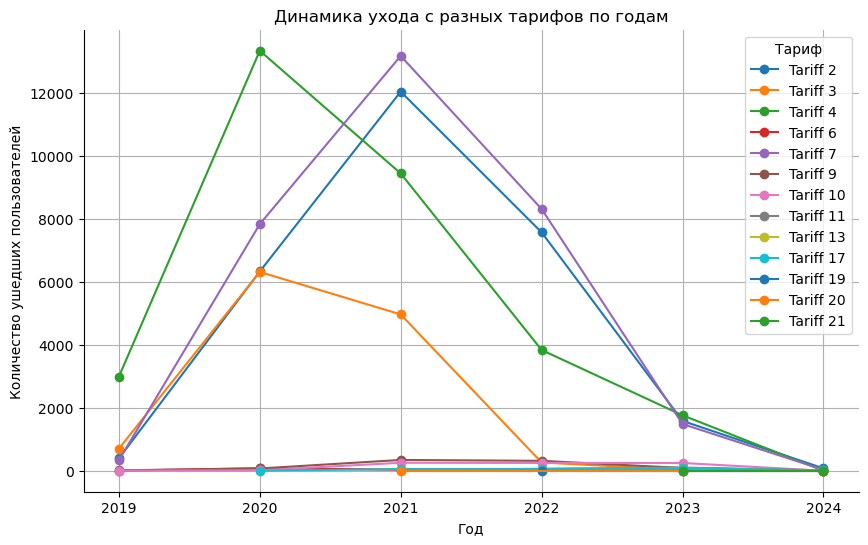

In [247]:
# Построим график динамики ухода с разных тарифов по годам
plt.figure(figsize=(10, 6))
for index, row in tariff_year.iterrows():
    tariff_id = row['tariff_id']
    first_year = row['first_year']
    # Выберем данные с года появления тарифа
    data = churn_by_tariff_year[(churn_by_tariff_year['tariff_id'] == tariff_id) & \
                                (churn_by_tariff_year['year'] >= first_year)]
    # Построим линию для каждого тарифа
    plt.plot(data['year'], data['churn'], marker='o', linestyle='-', label=f'Tariff {tariff_id}')

plt.title('Динамика ухода с разных тарифов по годам')
plt.xlabel('Год')
plt.ylabel('Количество ушедших пользователей')
plt.legend(title='Тариф')
plt.grid(True)

sns.despine()
plt.show()

Посмотрим на динамику, например, базового тарифа: 2 - появился в 2019 году, мы видим пик оттока в 2021 году, следующий в группе 17ый появился в 2020 году и был более успешным, судя по всему, чем 2 по оттоку.

Тарифы "старт" 4, 7 появились 2019 году, и пик ухода по 4му мы видим в 2020 году, а по 7ому немного позже - в 2021 году, и в 2021 же году вышло обновление тарифа под номером 11.

Тариф "бизнес" 9 появился в  2019 году, следующий тариф 20 появился также в 2021 году, мы видим пик оттока по 9ому  2021-2022 году, а 20 значимого оттока не показал.

Тарифы "профи" 3, 10 появились в 2019 году, и пик ухода по 3му мы видим в 2020 году, по 10ому - в 2021 году и он гораздо менее отточный, чем в 3ий, в принципе. Следующий 13ый - 2021 год, пик ухода по 10ому - 2021 год.

Таким образом, мы видим явную зависимость оттока от апгрейда тарифа. Насколько сильно отличаются новые версии тарифных планов от устаревших, мы не знаем. Возможно, сам сервис при следующей оплате меняет номер тарифа, а, возможно, этот вопрос все-таки согласовывается с компанией и, в случае, более интересного предложения в лице обновленного тарифного плана, компания совершает переход на новый.

<a id="19"></a>
#### Третья гипотеза:
- общая формулировка: проверка гипотезы наличия зависимости уходов от изменения цены на тариф.
- $$
\begin{cases}
H_0:\text{отток компаний с разными ценами на тарифы одинаковый.}
\\
H_1:\text{отток компаний с разными ценами на тарифы отличается.}
\end{cases}
- $$

In [248]:
# Посмотрим на price_id тарифов
display(prices_tariff)

tariff                                                  billing_tariff_price_id
0  архивный                                                         [17, 18, 19, 27]
1   базовый                                   [1, 2, 5, 6, 7, 8, 15, 24, 25, 35, 48]
2    бизнес                                         [18, 19, 28, 29, 30, 36, 38, 47]
3     профи  [9, 10, 11, 12, 25, 31, 32, 33, 37, 40, 41, 42, 43, 44, 54, 60, 61, 66]
4     старт                         [13, 14, 15, 16, 19, 20, 21, 22, 23, 26, 34, 38]

Для проведения статистического теста на значимость различий в оттоке между разными значениями tariff_price_id можно использовать однофакторный дисперсионный анализ (ANOVA). Используется для сравнения средних значений между тремя или более группами. Он определяет, существует ли статистически значимая разница между средними значениями какой-то переменной в разных группах.

В контексте анализа оттока, ANOVA позволяет нам проверить, есть ли статистически значимые различия в средних уровнях оттока между разными ценами на тарифы.

In [249]:
# Разделяем данные на группы по значениям tariff_price_id, "архивный" в расчет не берем
group1 = all_data.query('tariff_price_id in [13, 14, 15, 16, 20, 21, 22, 23, 26, 34, 38]')['churn']
group2 = all_data.query('tariff_price_id in [1, 2, 5, 6, 7, 8, 15, 24, 25, 35, 48]')['churn']
group3 = all_data.query('tariff_price_id in [18, 19, 28, 29, 30, 36, 38, 47]')['churn']
group4 = all_data.query('tariff_price_id in [9, 10, 11, 12, 25, 32, 33, 37, 40, 41, 43, 44, 60]')['churn']

# Проводим однофакторный дисперсионный анализ (ANOVA)
f_statistic, p_value = f_oneway(group1, group2, group3, group4)

# Выводим результаты анализа
print('F-статистика:', f_statistic)
print('p-value:', p_value)

# Определяем, есть ли статистически значимые различия
alpha = 0.05
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: отток компаний с разными ценами на тарифы отличается.')
else:
    print('Нет оснований отвергнуть нулевую гипотезу: отток компаний с разными ценами на тарифы отличается.')

F-статистика: 29.28363521088542
p-value: 1.8879215396592703e-18
Отвергаем нулевую гипотезу: отток компаний с разными ценами на тарифы отличается.


F-статистика: 1876.4255748732285F измеряет различия между средними значениями групп и их дисперсией. Чем больше F-статистика, тем больше различия между группами.

p-value: 0, это говорит о том говорит, что существует статистически значимая связь оттоком и разными ценами на тарифы.

Таким образом, мы можем отвергнуть нулевую гипотезу и предположить, что на отток компаний влияют разные цены на тарифы. Проверим это.

In [250]:
# Добавим к нашему датасету activities_with_churn столбец tariff_price_id
activities_with_churn = activities_with_churn.merge(all_data[['company_id', 'tariff_price_id']],
                                                    on='company_id', how='left')

In [251]:
# Определим год появления каждого изменения по tariff_price_id
tariff_price_first_year = activities_with_churn.groupby('tariff_price_id')['year'].min()
tariff_price_first_year

tariff_price_id
1     2019
2     2021
5     2021
6     2019
7     2019
8     2019
9     2019
10    2019
11    2019
12    2019
13    2019
14    2019
15    2019
16    2019
17    2019
18    2020
19    2021
20    2019
21    2020
22    2019
23    2019
24    2019
25    2020
26    2020
27    2020
28    2020
29    2019
30    2021
32    2019
33    2022
34    2020
35    2020
36    2020
37    2021
38    2021
40    2021
41    2021
43    2022
44    2023
47    2024
48    2024
60    2023
Name: year, dtype: int32

In [252]:
# Сгруппируем данные по tariff_price_id и year, затем посчитаем отток
churn_by_tariff_price_id = activities_with_churn.groupby(['tariff_price_id', 'year'])['churn'].sum().reset_index()

Уникальных значений tariff_price_id немало, получится очень шумный график, поэтому разобьем визуализацию на 4 части.

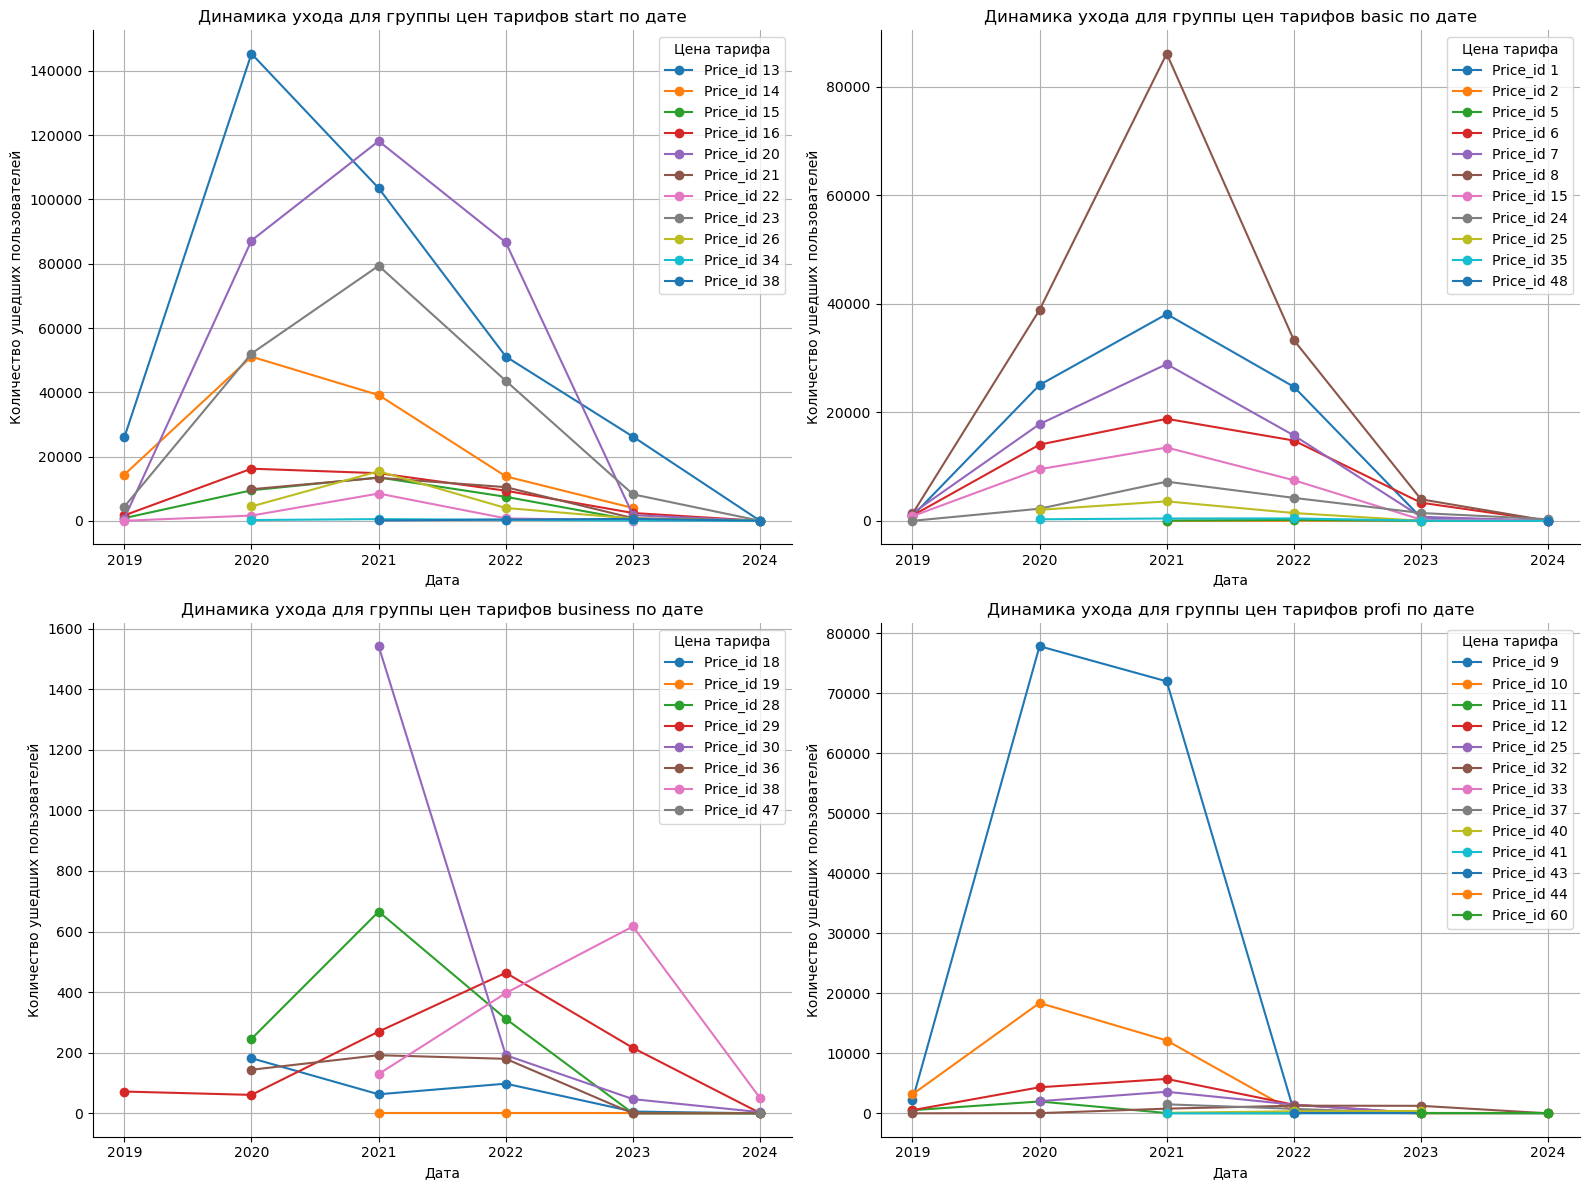

In [253]:
# Разделим данные на четыре группы в зависимости от цены тарифа
start = [13, 14, 15, 16, 20, 21, 22, 23, 26, 34, 38]
basic = [1, 2, 5, 6, 7, 8, 15, 24, 25, 35, 48]
business = [18, 19, 28, 29, 30, 36, 38, 47]
profi = [9, 10, 11, 12, 25, 32, 33, 37, 40, 41, 43, 44, 60]

# Построим графики для каждой группы цен тарифов
plt.figure(figsize=(16, 12))
for i, groups in enumerate([start, basic, business, profi], start=1):
    plt.subplot(2, 2, i)
    plt.title(f'Динамика ухода для группы цен тарифов {["start", "basic", "business", "profi"][i-1]} по дате')
    plt.xlabel('Дата')
    plt.ylabel('Количество ушедших пользователей')
    for tariff_price_id, first_year in tariff_price_first_year.items():
        if tariff_price_id in groups:
            data = churn_by_tariff_price_id[(churn_by_tariff_price_id['tariff_price_id'] == tariff_price_id) & \
                                            (churn_by_tariff_price_id['year'] >= first_year)]
            plt.plot(data['year'], data['churn'], marker='o', linestyle='-', label=f'Price_id {tariff_price_id}')
    plt.legend(title='Цена тарифа')
    plt.grid(True)
    sns.despine()

plt.tight_layout()
plt.show()

На графиках мы видим следующее:
- рассмотрим категорию цен в сегменте "бизнес". Присутствует некий элемент хаоса, например цена 29 стартовала на год раньше 28, а цены 36 на год раньше 30ой. Хотелось бы понять логику...Тем не менее, цены уходят в пик по оттоку через год-два после появления, в некоторых случах пики оттока приходятся на старт новой цены. Цены 18, 19 выглядят крайне удачными, отток, можно сказать нулевой. 36ая также неплохо себя показала;
- по остальным графикам примерно такая же картина из чего можно сделать вывод, что цена тарифа определенно влияет на отток компаний.

<a id="20"></a>
### Исследование активностей

<a id="21"></a>
#### Анализ суммарной активности компаний по признакам за весь период времени исследования

In [254]:
# Посчитаем суммарную активность компаний по признакам за весь период времени исследования
cols_for_sum = ['company_month_billing', 'company_month_stocks', 'company_month_backups',
               'company_month_projects', 'company_month_contractors', 'company_month_resource_orders']

activities_grouped['total_activity'] = activities_grouped[cols_for_sum].sum(axis=1)

activities_grouped['mean_activity'] = round(activities_grouped['total_activity']/activities_grouped['month'], 1)

In [255]:
# Посмотрим на минимальные, максимальные, медианные значения суммарной активности и моду
print('Минимальное количество суммарных активностей:', activities_grouped['total_activity'].min())
print('Максимальное количество суммарных активностей:', activities_grouped['total_activity'].max())
print('Медианное количество суммарных активностей:', activities_grouped['total_activity'].median())
print('Мода суммарных активностей:', activities_grouped['total_activity'].mode())

Минимальное количество суммарных активностей: 4
Максимальное количество суммарных активностей: 11060
Медианное количество суммарных активностей: 98.0
Мода суммарных активностей: 0    33
Name: total_activity, dtype: int64


Разница между минимальным значением и максимальным, конечно, колоссальная. Посмотрим на 95ый и 99ый перцентили.

In [256]:
# Посчитаем 95ый перцентиль для стобца total_activity
percentile_95 = np.nanpercentile(activities_grouped['total_activity'], 95, axis=0)
print('95ый перцентиль:', percentile_95)

# Посчитаем 99ый перцентиль для стобца total_activity
percentile_99 = np.nanpercentile(activities_grouped['total_activity'], 99, axis=0)
print('99ый перцентиль:', percentile_99)

95ый перцентиль: 984.25
99ый перцентиль: 3037.6500000000083


In [257]:
# Посмотрим, у скольких компаний суммарная активность выше 984
len(activities_grouped.query('total_activity > 984'))

36

In [258]:
# Посмотрим на  компании, суммарная активность которых выше 3037
activities_grouped.query('total_activity > 3037').reset_index(drop=True).T

0                                                                                                    1                                                                                                    2                                                                                                    3                                                                                                    4                                                                                                    5                                                                                                    6                                                                                     7
company_id                                                                                                                    1255                                                                                                 2771                                                                                                 3224                                                                                                 3518                                                                                                 3623                                                                                                 3654                                                                                                 6341                                                                                  7211
year                           [2020, 2020, 2021, 2021, 2022, 2023, 2024, 2020, 2020, 2020, 2020, 2020, 2021, 2021, 2021, 2021,...  [2021, 2022, 2023, 2023, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022,...  [2021, 2021, 2022, 2022, 2023, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022,...  [2021, 2022, 2023, 2023, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022, 2022,...  [2021, 2023, 2021, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,...  [2021, 2021, 2022, 2022, 2022, 2023, 2023, 2021, 2021, 2021, 2021, 2021, 2022, 2022, 2022, 2022,...  [2022, 2022, 2022, 2022, 2022, 2022, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023,...  [2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2024, 2023, 2024, 2024]
month                                                                                                                           46                                                                                                   38                                                                                                   36                                                                                                   34                                                                                                   34                                                                                                   34                                                                                                   21                                                                                    14
company_month_billing                                                                                                           14                                                                                                    7                                                                                                    5                                                                                                    8                                                                                                    2                                                                                                    8                                                                                                    2                                                                                     5
company_month_

Таких всего 36 и 8 из 716. Мы можем предположить, что большинство этих компаний приходили в начале периода нашего исследования. И если у них lifetime долгий, то такие цифры вполне оправданы по активностям.  Посмотрим  интереса ради на отток в компаниях, у которых активность выше 99 перцентиля.

In [259]:
activities_with_churn.query('company_id in [1255, 2771, 3224, 3518, 3623, 3654, 6341, 7211]')['churn'].unique()

array([0])

In [260]:
(activities_with_churn
 .query('company_id in [1255, 2771, 3224, 3518, 3623, 3654, 6341, 7211]')
 .groupby(['company_id', 'churn'])['year']
 .agg(first_year='min', last_year='max'))

first_year  last_year
company_id churn                       
1255       0            2020       2024
2771       0            2021       2024
3224       0            2021       2024
3518       0            2021       2024
3623       0            2021       2024
3654       0            2021       2024
6341       0            2022       2024
7211       0            2023       2024

Можно сказать, что я была права. Большинство из исследуемых компаний пришли в 2020-2021 году и не ушли до сих пор. Поэтому суммарное количество их активностей такое большое.

In [261]:
# Определяем функцию для визуализации активности компаний
def viz_activities(data, feature):
    fig, axes = plt.subplots(nrows=2, figsize=(8, 5))
    axes = axes.flatten()
    #data = activities_grouped.query('total_activity <= @percentile_95')['total_activity']

    # Построение гистограммы

    sns.histplot(data=data, bins=70, kde=True, lw=0.25, ax=axes[0])

    axes[0].set_xlabel('')
    axes[0].set_ylabel(f'Активность по {feature}')
    axes[0].set_title(f'Распределение активности компании по {feature} с 2019 по 2024 гг.')
    axes[0].tick_params(axis='x', labelrotation=45)

    # Построение диаграммы размаха
    sns.boxplot(data=data, palette=['lightblue'], showmeans=True, orient='h', ax=axes[1])
    axes[1].set_title(f'Диаграмма размаха для признака {feature}')
    axes[1].set_xlabel(f'Количество активностей по {feature}')

    sns.despine()
    plt.tight_layout()

    plt.show()

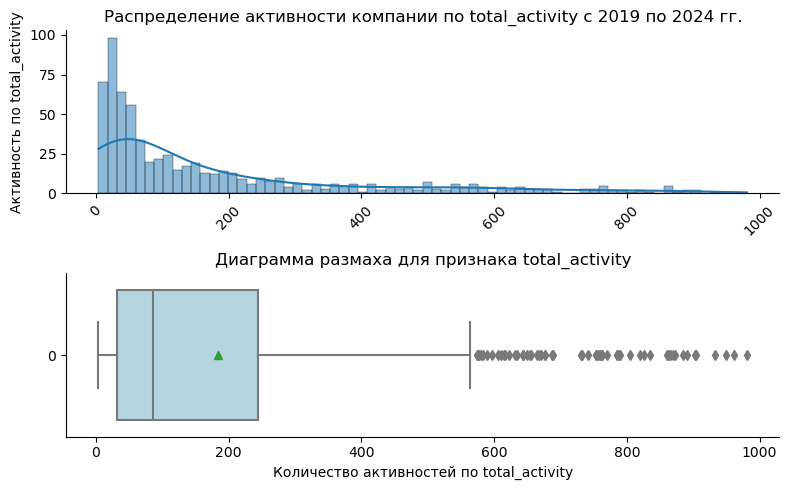

In [262]:
# Визуализируем суммарную активность компаний за весь исследуемый период
data = activities_grouped.query('total_activity <= @percentile_95')['total_activity']
viz_activities(data, 'total_activity')

Итак, мы видим, что какие-то аномальные активности это скорее редкость. Среднее значение у нас в районе 190 активностей, медиана и того ниже, может около 90. Выбросы начинаюся после 590 тыс.  Посмотрим на среднее количество активностей для каждой компании.

In [263]:
# Посмотрим на минимальные, максимальные, медианные значения суммарной активности и моду
print('Минимальное среднее количество активностей:', activities_grouped['mean_activity'].min())
print('Максимальное среднее количество активностей:', activities_grouped['mean_activity'].max())
print('Медианное среднее количество активностей:', activities_grouped['mean_activity'].median())
print('Мода среднее активностей:', activities_grouped['mean_activity'].mode())

Минимальное среднее количество активностей: 1.2
Максимальное среднее количество активностей: 314.9
Медианное среднее количество активностей: 15.0
Мода среднее активностей: 0    6.0
Name: mean_activity, dtype: float64


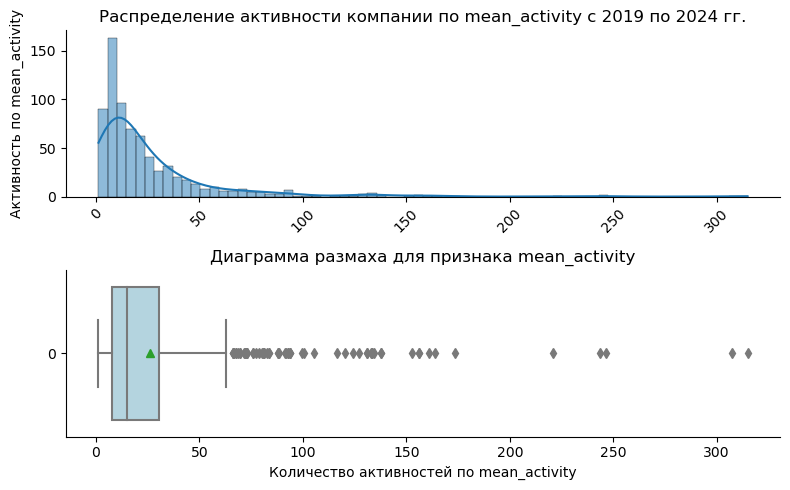

In [264]:
# Визуализируем среднюю активность компаний за весь исследуемый период
data = activities_grouped['mean_activity']
viz_activities(data, 'mean_activity')

Средняя активность, конечно, не такая высокая, как суммарная. Около 25 активностей в среднем и 15 по медиане, выбросы после 60.

<a id="22"></a>
#### Анализ суммарной активности клиентов помесячно

In [265]:
# Посчитаем суммарную активность каждого клиента помесячно
month_activity = (activities
                   .groupby(['company_id', 'month'])
                   .agg({**{col:'sum' for col in cols_for_sum}})
                   .reset_index())

cols_for_sum = ['company_month_billing', 'company_month_stocks', 'company_month_backups',
               'company_month_projects', 'company_month_contractors', 'company_month_resource_orders']

month_activity['month_activity'] = month_activity[cols_for_sum].sum(axis=1)

In [266]:
# Посмотрим на минимальные, максимальные, медианные значения суммарной активности каждого клиента и моду
print('Минимальное количество активностей по месяцам:', month_activity['month_activity'].min())
print('Максимальное количество активностей по месяцам:', month_activity['month_activity'].max())
print('Медианное количество активностей по месяцам:', month_activity['month_activity'].median())
print('Мода активностей по месяцам:', month_activity['month_activity'].mode())

Минимальное количество активностей по месяцам: 1
Максимальное количество активностей по месяцам: 1259
Медианное количество активностей по месяцам: 13.0
Мода активностей по месяцам: 0    1
Name: month_activity, dtype: int64


In [267]:
# Посчитаем 95ый перцентиль для стобца month_activity
percentile_95 = np.nanpercentile(month_activity['month_activity'], 95, axis=0)
print('95ый перцентиль:', round(percentile_95, 1))

# Посчитаем 99ый перцентиль для стобца month_activity
percentile_99 = np.nanpercentile(month_activity['month_activity'], 99, axis=0)
print('99ый перцентиль:', round(percentile_99, 1))

95ый перцентиль: 131.0
99ый перцентиль: 320.9


In [268]:
# Посмотрим, у скольких компаний помесячная суммарная активность выше 321
len(month_activity.query('month_activity > 321').reset_index(drop=True))

63

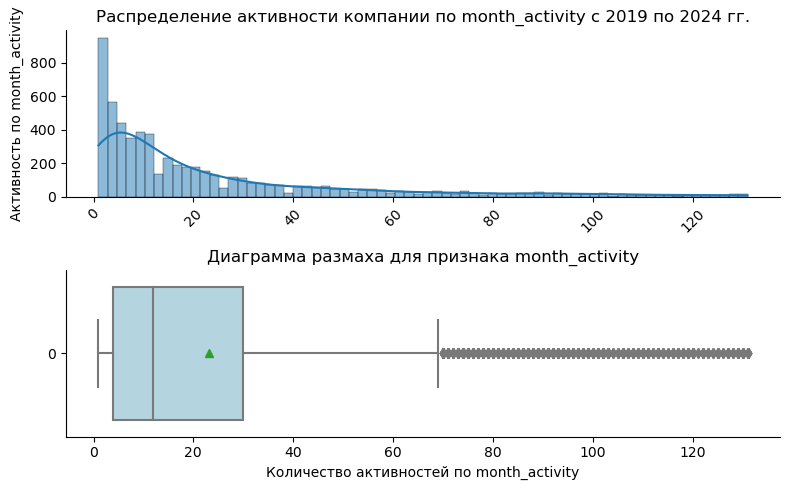

In [269]:
# Визуализируем помесячную активность компаний за весь исследуемый период
data = month_activity.query('month_activity <= @percentile_95')['month_activity']
viz_activities(data, 'month_activity')

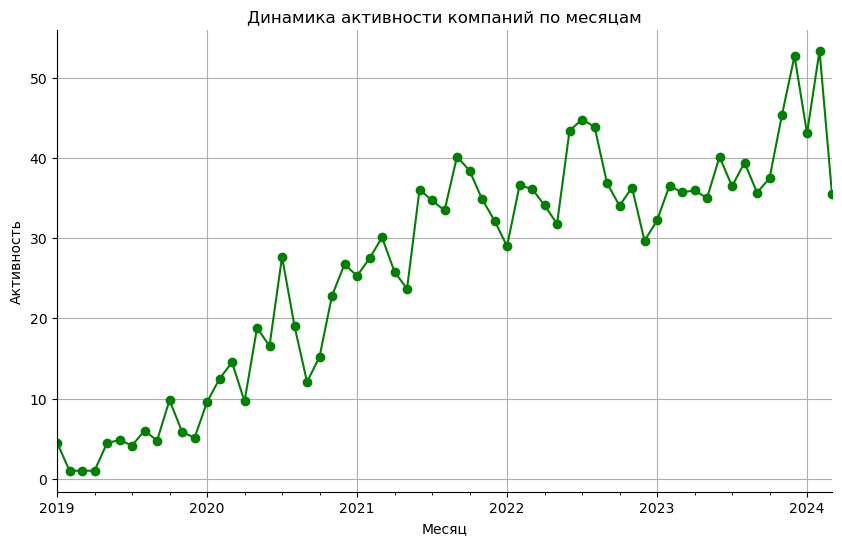

In [270]:
# Группировка данных по месяцам и подсчет cредней помесячной активности
churn_by_month = month_activity.groupby('month')['month_activity'].mean()

# Визуализация динамики активности по месяцам
plt.figure(figsize=(10, 6))
churn_by_month.plot(marker='o', linestyle='-', color='green')
plt.title('Динамика активности компаний по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Активность')
plt.grid(True)

sns.despine()
plt.show()

Итак, по большому счету, суммарная активность компаний лежит в пределах 30 в месяц. Прослеживаются определенные периоды (середина года), когда мы видим рост активности. Летний период - отличное время для старта новых проектов, в том числе и в строительстве, особенно для крупного строительства и среднего строительства (рытье котлованов,  закладывание фундаментов домов и т.д.). В целом, мы видим ежегодный волнообразный рост активностей, который зафиксировался в районе 35 - 40 с 2022 по 2024 годы.

In [271]:
# Посмотрим на долю помесячного оттока
month_churn = calculate_churn_rate(all_data, month_activity['month'])
month_churn['year'] = month_churn['month'].dt.year
month_churn

month  not_churn  churn  churn_rate  year
0  2019-01-01          0      2       100.0  2019
1  2019-02-01          0      2       100.0  2019
2  2019-03-01          0      1       100.0  2019
3  2019-04-01          0      1       100.0  2019
4  2019-05-01          0      9       100.0  2019
..        ...        ...    ...         ...   ...
58 2023-11-01          2      5        71.4  2023
59 2023-12-01          2      4        66.7  2023
60 2024-01-01          2      3        60.0  2024
61 2024-02-01          3      3        50.0  2024
62 2024-03-01          2      3        60.0  2024

[63 rows x 5 columns]

In [272]:
# Определим функцию для визуализации динамики оттока во времени
def churn_viz_time(data, feature):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Линейный график
    data = data
    x = data[feature]
    y1 = data['not_churn']
    y2 = data['churn']
    sns.barplot(data=data, x=x, y=y1, label='Не отток', palette='viridis', ax=axes[0])
    sns.barplot(data=data, x=x, y=y2, label='Отток', palette='viridis', ax=axes[0], alpha=0.3)

    axes[0].set_title('Динамика оттока клиентов во времени')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Количество клиентов')
    axes[0].legend()
    
    # Столбчатая диаграмма
    sns.barplot(data=data, x=feature, y='churn_rate', palette='viridis', ax=axes[1])

    for i, rect in enumerate(axes[1].patches):
        height = rect.get_height()
        axes[1].text(rect.get_x() + rect.get_width() / 2, height, f'{height:.1f}%',
                 ha='center', color='black', va='bottom', fontsize=12)

    axes[1].set_title(f'Доля оттока клиентов во времени')
    axes[1].set_xlabel('Количество клиентов')
    axes[1].set_ylabel('Доля оттока, %')
    axes[1].set_ylim(0, 100)
    
    plt.tight_layout()
    sns.despine()
    plt.show()

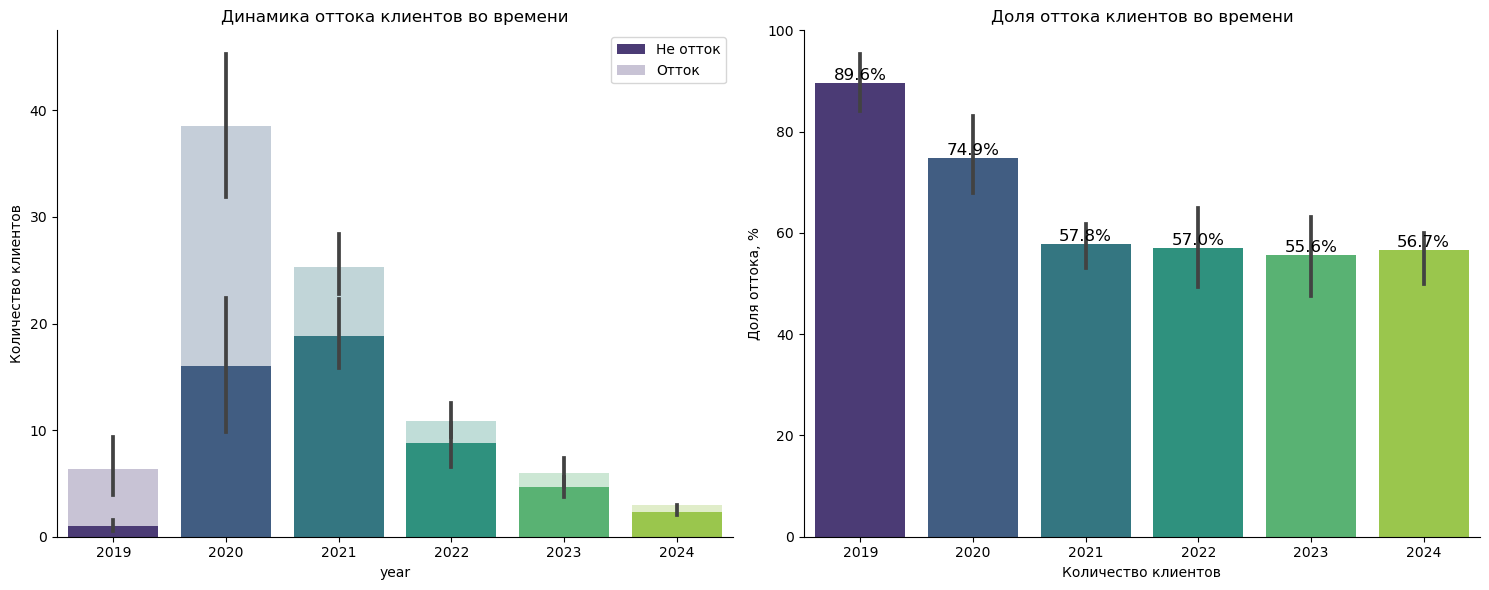

In [273]:
churn_viz_time(month_churn, 'year')

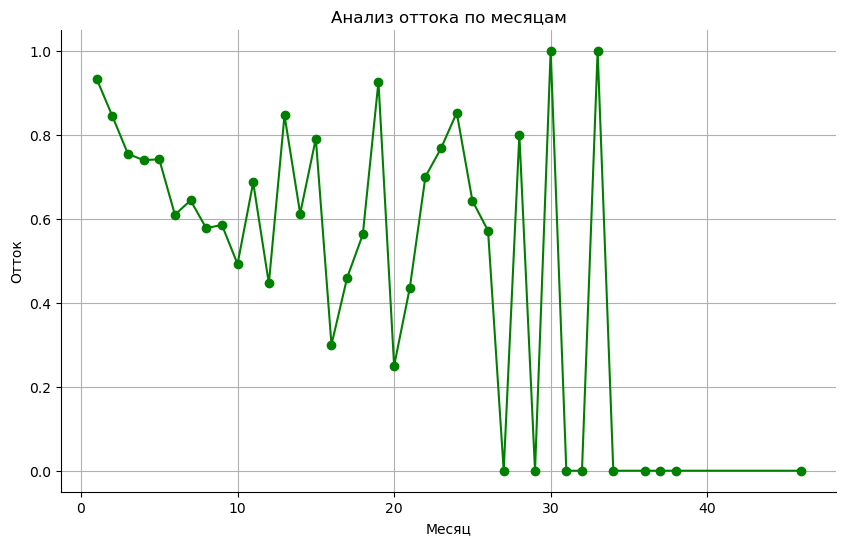

In [274]:
# Проанализируем средний отток по месяцам
churn_by_month = all_data.groupby('month')['churn'].mean()

# Визуализация динамики оттока по месяцам
plt.figure(figsize=(10, 6))
churn_by_month.plot(marker='o', linestyle='-', color='green')
plt.title('Анализ оттока по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Отток')
plt.grid(True)

sns.despine()
plt.show()

Мы видим, что отток с течением времени у нас снижается. Стабильное снижение идет с 2021 года. Что же произошло? Covid-19 закончился опять же? Или качество сервиса сильно улучшилось?

<a id="23"></a>
#### Анализ связи между активностями компании и оттоком

In [275]:
# Определим функцию для расчета среднего оттока по активностям компании
def calculate_churn_rate_activities(data, features):
    all_churn_rates = {}

    for feature in features:
        # Сгруппируем данные по признаку и оттоку
        data_churn = (data
                          .groupby([feature, 'churn']).size().unstack(fill_value=0).reset_index()
                          .rename(columns={0: 'not_churn', 1: 'churn'})
                          .rename_axis(None, axis=1))

        # Добавляем столбец для доли оттока
        data_churn['churn_rate'] = round(data_churn['churn'] / \
                                             (data_churn['not_churn'] + data_churn['churn']) * 100, 1)

        all_churn_rates[feature] = data_churn

    return all_churn_rates

In [276]:
# Вызываем функцию
features_to_analyze = ['month_billing', 'month_stocks', 'month_backups', 'month_projects', 'month_contractors',
                       'month_resource_orders']
all_churn_rates = calculate_churn_rate_activities(all_data, features_to_analyze)

# Получаем результаты в виде таблиц
for feature, table in all_churn_rates.items():
    tabulate(table, headers='keys', tablefmt='fancy_grid')

In [277]:
def visualize_churn_rate_activities(data, feature):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Линейный график
    x = data[feature]
    y1 = data['not_churn']
    y2 = data['churn']
    sns.lineplot(data=data, x=x, y=y1, label='Не отток', marker='o', linestyle='-', color='blue', ax=axes[0])
    sns.lineplot(data=data, x=x, y=y2, label='Отток', marker='o', linestyle='-', color='green', ax=axes[0])
    axes[0].set_title(f'Количество клиентов в разрезе оттока и {feature}')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Количество клиентов')
    axes[0].set_xticks(x)
    axes[0].legend()
    axes[0].set_xticks(x[::80]) 
    axes[0].tick_params(rotation=90)
    
    # Точечный график
    sns.scatterplot(data=data, x=x, y='churn', color='red', label='Отток', ax=axes[1])
    sns.scatterplot(data=data, x=x, y='not_churn', color='green', label='Не отток', ax=axes[1])
    axes[1].set_title(f'Распределение оттока и не оттока по {feature}')
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel('Количество клиентов')
    axes[1].set_xticks(x)
    axes[1].legend()
    axes[1].set_xticks(x[::80]) 
    axes[1].tick_params(rotation=90)

    plt.suptitle(f'Распределение оттока для признака "{feature}"', y=1.02, fontsize=12)

    plt.tight_layout()
    sns.despine()

    plt.show()

                                   Распределение оттока для признака "month_billing"                                   


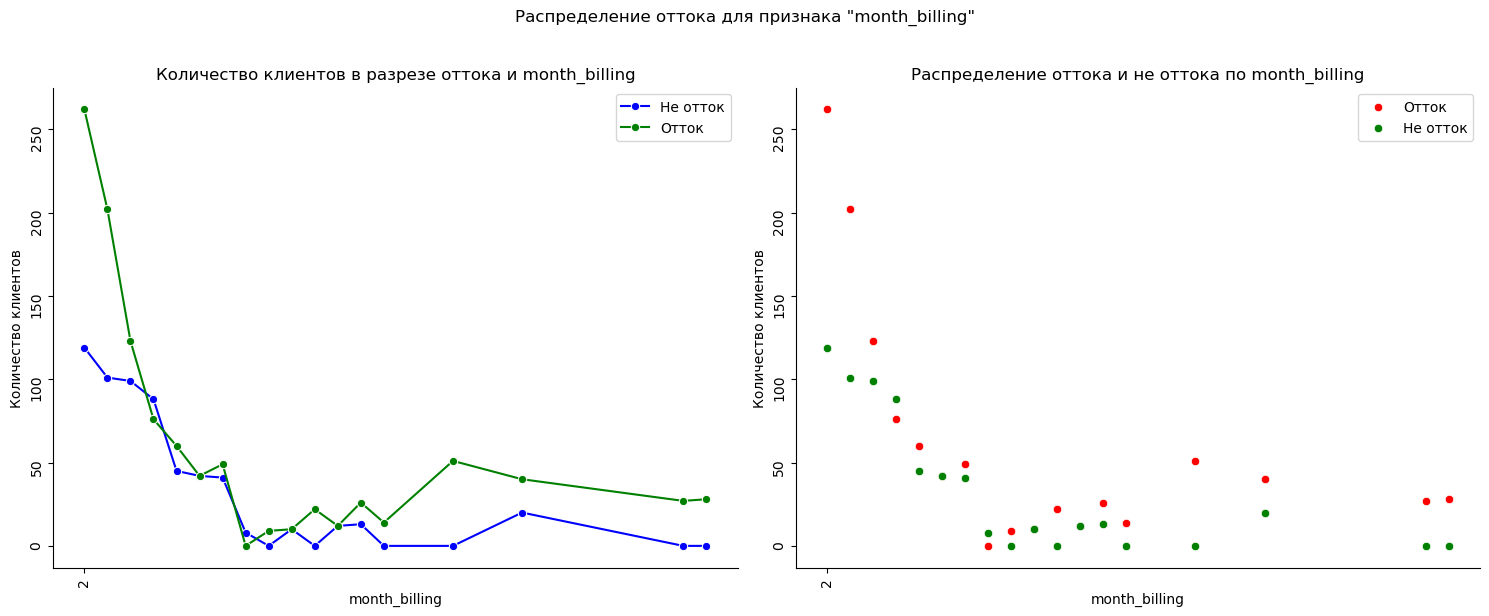


                                   Распределение оттока для признака "month_stocks"                                   


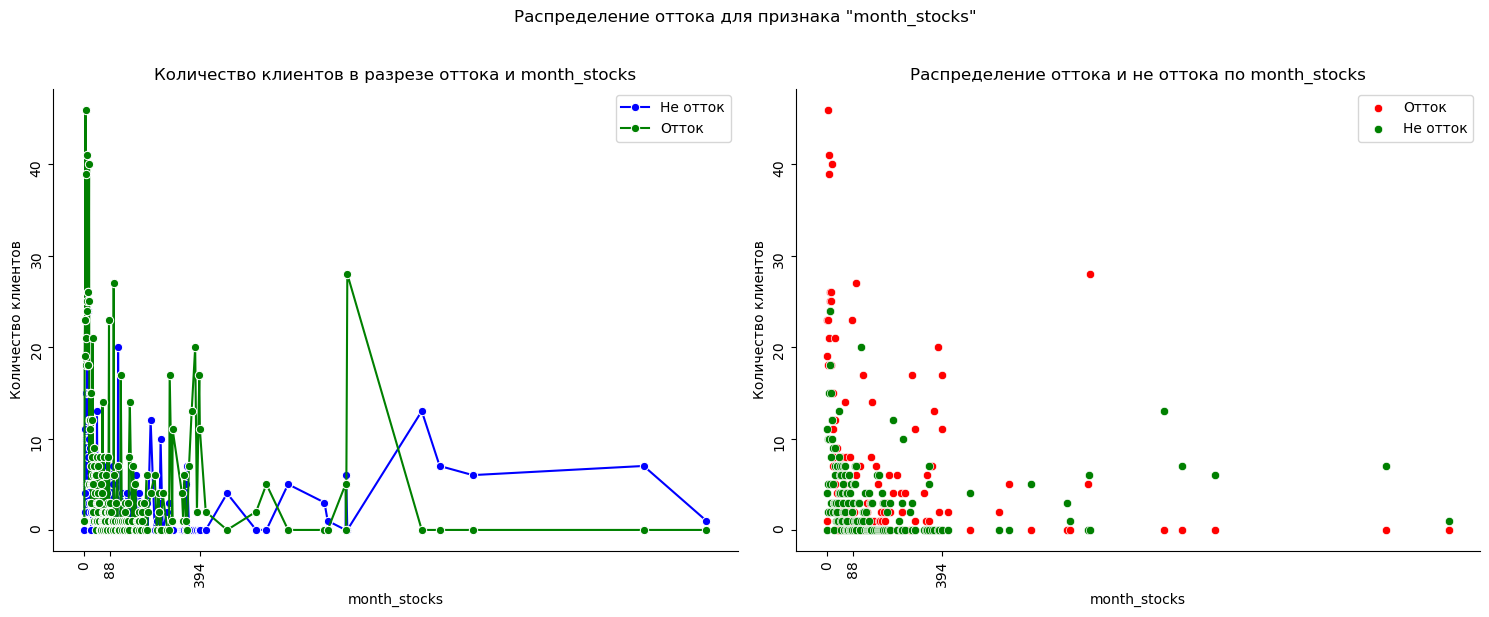


                                   Распределение оттока для признака "month_backups"                                   


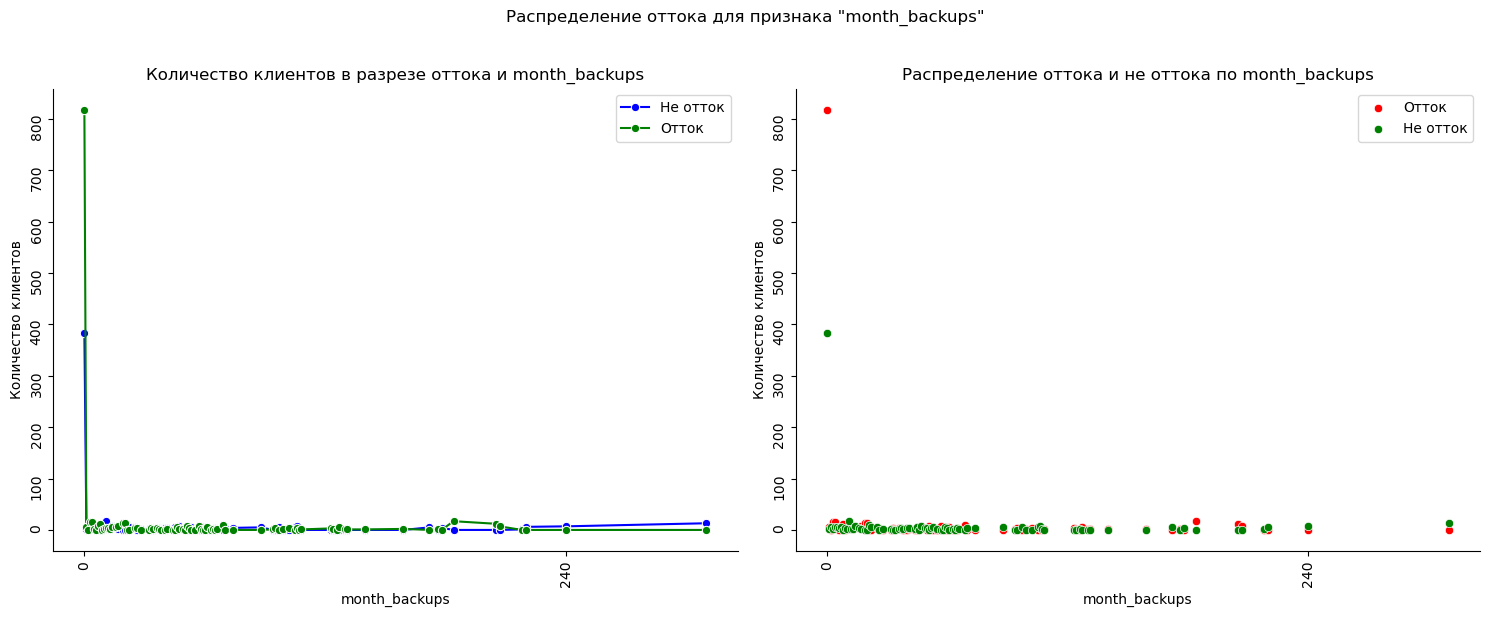


                                   Распределение оттока для признака "month_projects"                                   


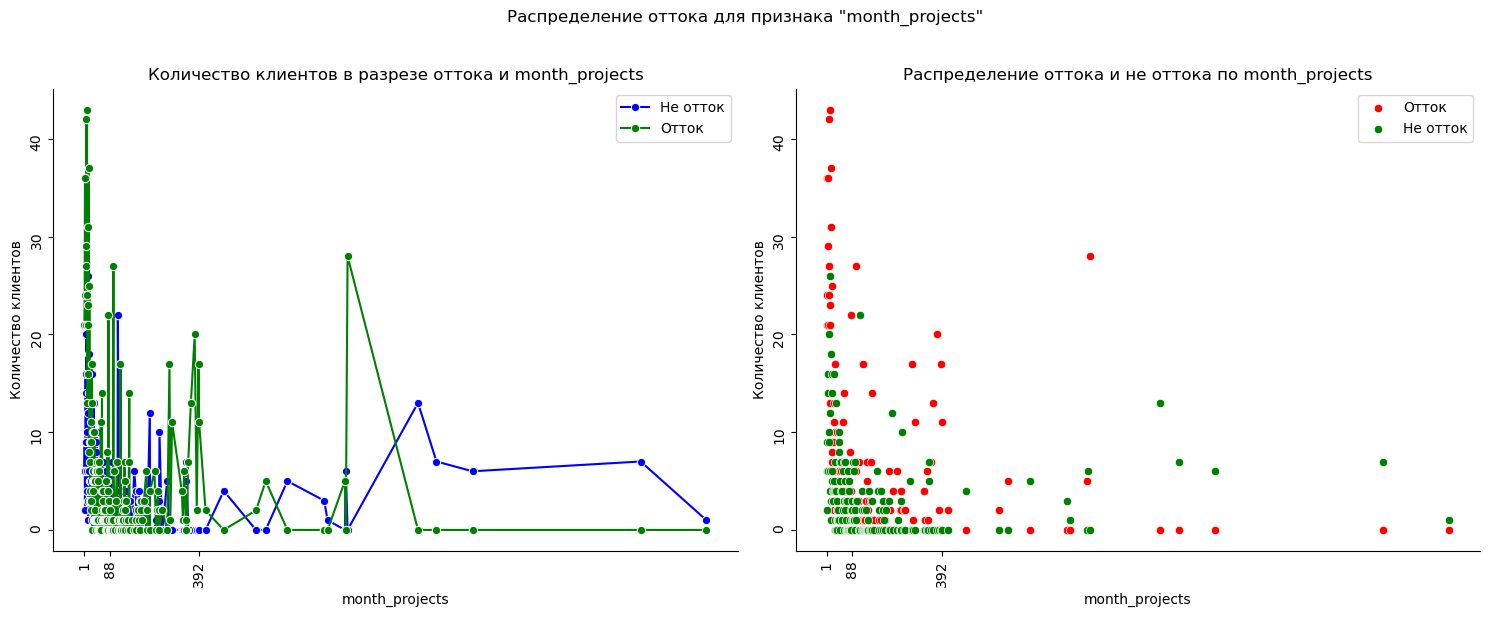


                                   Распределение оттока для признака "month_contractors"                                   


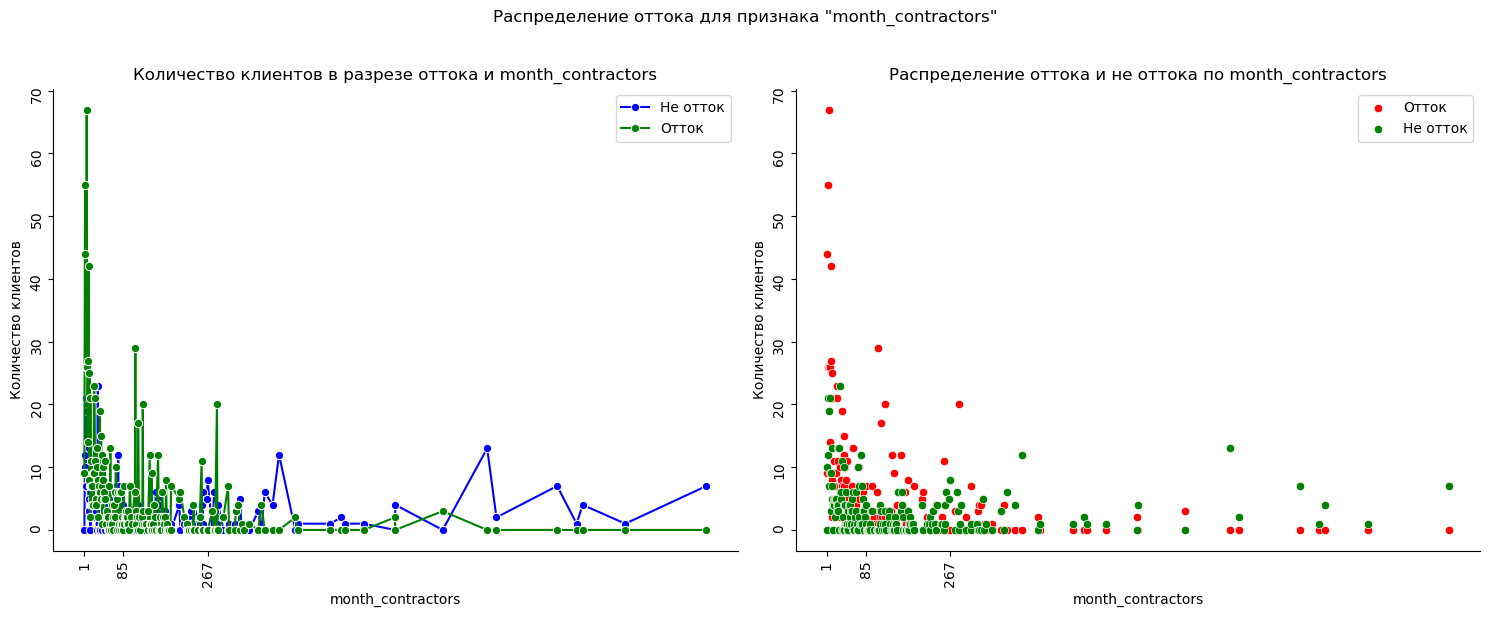


                                   Распределение оттока для признака "month_resource_orders"                                   


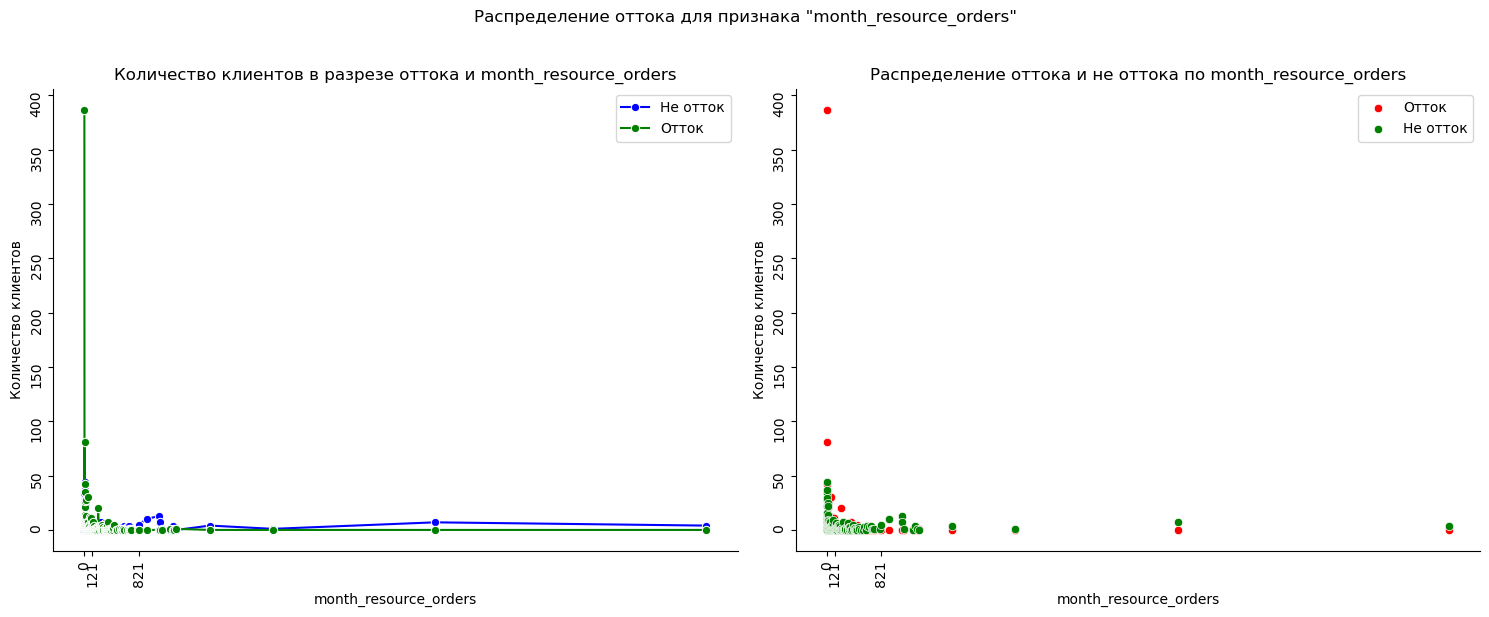

In [278]:
# Вызовем функцию для визуализации
for feature, table in all_churn_rates.items():
    title = f'{"Распределение оттока для признака"} "{feature}"'
    print(title.center(len(title) + 70))
    visualize_churn_rate_activities(table, feature)
    print()

Мы видим довольно яркую картину зависимости оттока от некоторых активностей. Прослеживается некоторая зависимость оттока от количества счетов: чем их меньше, тем отток выше. Возможно, все-таки, возможность загрузки счетов есть не у всех тарифов, и уходят те, для кого наличие этой опции имеет значение. Далее, чем меньше арендованных складов, проектов, контрагентов, тем отток выше. Вероятно, отток меньше, у тех компаний, у кого бизнес идет активнее и есть стабильность. Количество бэкапов и заказа материалов не особенно вилияет на отток. Поэтому мы и получили в матрице Phik корреляцию между оттоком и активностями компаний. Но эта зависимость скорее непрямая. Компания не уходит из сервиса, потому что у нее хорошо идут дела, много данных уже внесено, переход на другую платформу всегда связан с лишней "головной болью" по переносу данных и затратами, поэтому работают с сервисом и дальше, ну или сервис, действительно, прекрасный для таких больших объемов строительства. Так что мы можем использовать активности компаний  по складам, проектам, контрагентам для прогноза скорого ухода. Особенно вкупе с данными по working_category и employer_interval.

<a id="24"></a>
#### Четвертая гипотеза:
- общая формулировка: проверка гипотезы наличия зависимости активности компаний от разных тарифов.
- $$
\begin{cases}
H_0:\text{активность компаний в зависимости от тарифа одинаковая.}
\\
H_1:\text{активность компаний в зависимости от тарифа отличается.}
\end{cases}
- $$

Для проверки данной гипотезы используем Тест Стьюдента (t-тест). Применим t-тест для сравнения средних значений активности между двумя группами тарифов. Так как у нас более двух групп, то применим множественные t-тесты с поправкой на множественные сравнения методом Бонферрони.

Метод Бонферрони - это один из методов коррекции уровня значимости в множественных сравнениях. Он используется для контроля ошибки первого рода (ложноположительных результатов) при множественных проверках гипотез.

Когда мы выполняем несколько сравнений, вероятность совершить хотя бы одну ошибку первого рода (ложноположительное отклонение) увеличивается. Метод Бонферрони корректирует уровень значимости для каждого сравнения, делая его более строгим, чтобы компенсировать увеличение вероятности ошибки при множественных сравнениях.

In [279]:
# Подготовим данные для анализа и удалим пропуски

month_activity_test = month_activity.merge(all_data[['company_id', 'tariff']], on='company_id', how='left')

# Уровень значимости
alpha = 0.05

# Проводим t-тест для каждой пары групп тарифов
groups = ['старт', 'базовый', 'бизнес', 'профи']
for i in range(len(groups)):
    for j in range(i+1, len(groups)):
        group1 = month_activity_test.query('tariff == @groups[@i]')['month_activity']
        group2 = month_activity_test.query('tariff == @groups[@j]')['month_activity']

        # Проведение t-теста
        t_statistic, p_value = ttest_ind(group1, group2)

        # Коррекция p-value методом Бонферрони
        corrected_p_value = p_value / len(groups)

        # Вывод результатов
        print(f't-тест между {groups[i]} и {groups[j]}:')
        print(f'p-value до коррекции: {p_value}')
        print(f'Скорректированный p-value: {corrected_p_value}')
        if corrected_p_value < alpha:
            print('Отвергаем нулевую гипотезу: активность компаний в зависимости от тарифа отличается')
        else:
            print('Нет оснований отвергнуть нулевую гипотезу: активность компаний в зависимости от тарифа одинаковая')
        print()

t-тест между старт и базовый:
p-value до коррекции: 6.040967741397064e-53
Скорректированный p-value: 1.510241935349266e-53
Отвергаем нулевую гипотезу: активность компаний в зависимости от тарифа отличается

t-тест между старт и бизнес:
p-value до коррекции: 2.457175350036612e-215
Скорректированный p-value: 6.14293837509153e-216
Отвергаем нулевую гипотезу: активность компаний в зависимости от тарифа отличается

t-тест между старт и профи:
p-value до коррекции: 7.115191343614285e-33
Скорректированный p-value: 1.778797835903571e-33
Отвергаем нулевую гипотезу: активность компаний в зависимости от тарифа отличается

t-тест между базовый и бизнес:
p-value до коррекции: 9.58023016829512e-71
Скорректированный p-value: 2.39505754207378e-71
Отвергаем нулевую гипотезу: активность компаний в зависимости от тарифа отличается

t-тест между базовый и профи:
p-value до коррекции: 0.4110494240010334
Скорректированный p-value: 0.10276235600025835
Нет оснований отвергнуть нулевую гипотезу: активность ком

По результатам множественных t-тестов мы можем сказать, что между определенными группами тарифов есть различия по активности:
- у групп тарифов "старт" и "базовый", "старт" и "бизнес", "старт" и "профи", "базовый" и "бизнес", "бизнес" и "профи" мы отвергаем нулевую гипотезу и предполагаем, что активность у этих тарифов разная;

Посмотрим на среднюю активность по группам тарифов.

In [280]:
# Посчитаем среднюю помесячную активность клиентов по тарифам
mean_activity_by_tariff = (month_activity_test
                        .query('tariff != "архивный"')
                        .groupby('tariff')['month_activity']
                        .mean()
                        .reset_index()
                        .round()
                       )
mean_activity_by_tariff

tariff  month_activity
0  базовый            43.0
1   бизнес            88.0
2    профи            45.0
3    старт            30.0

In [281]:
# Создаем пустой список для хранения средних значений каждой пары тарифов
mean_activity_pairs_data = []

# Составим пары тарифов
tariffs = mean_activity_by_tariff['tariff'].tolist()

# Вычислим среднее значение активности для каждой пары тарифов
for i in range(len(tariffs)):
    for j in range(i + 1, len(tariffs)):
        tariff_1 = tariffs[i]
        tariff_2 = tariffs[j]
        mean_activity_t1 = mean_activity_by_tariff.loc[mean_activity_by_tariff['tariff'] == tariff_1,
                                                       'month_activity'].iloc[0]
        mean_activity_t2 = mean_activity_by_tariff.loc[mean_activity_by_tariff['tariff'] == tariff_2,
                                                       'month_activity'].iloc[0]
        mean_activity = round(mean_activity_t2 / mean_activity_t1 * 100, 1)

        (mean_activity_pairs_data
         .append({'tariff_1': tariff_1, 'tariff_2': tariff_2, 'mean_activity_tariff_1': round(mean_activity_t1,1),
                  'mean_activity_tariff_2': round(mean_activity_t2,1), 'mean_activity': round(mean_activity,1)}))

# Создаем DataFrame из списка словарей
mean_activity_pairs = pd.DataFrame(mean_activity_pairs_data)

# Выводим таблицы средних значений для каждой пары тарифов
print('Средние значения активности для каждой пары тарифов:')
display(mean_activity_pairs)

Средние значения активности для каждой пары тарифов:


tariff_1 tariff_2  mean_activity_tariff_1  mean_activity_tariff_2  mean_activity
0  базовый   бизнес                    43.0                    88.0          204.7
1  базовый    профи                    43.0                    45.0          104.7
2  базовый    старт                    43.0                    30.0           69.8
3   бизнес    профи                    88.0                    45.0           51.1
4   бизнес    старт                    88.0                    30.0           34.1
5    профи    старт                    45.0                    30.0           66.7

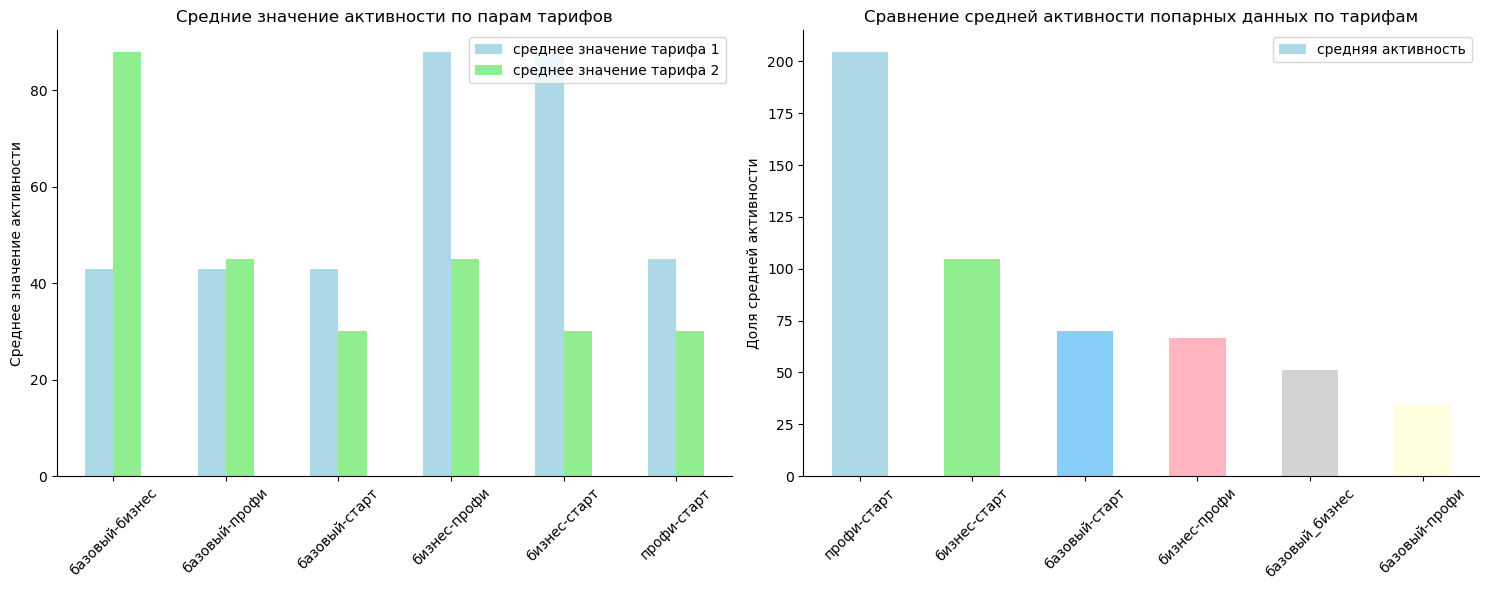

In [282]:
# Визуализируем полученные данные
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# График сравнения попарных данных по тарифам
mean_activity_pairs.plot(kind='bar', y=['mean_activity_tariff_1', 'mean_activity_tariff_2'], ax=axes[0],
                         color=['lightblue', 'lightgreen'])
axes[0].set_title('Средние значение активности по парам тарифов')
axes[0].set_xlabel('')
axes[0].set_ylabel('Среднее значение активности')
axes[0].legend(['среднее значение тарифа 1', 'среднее значение тарифа 2'])

# Добавляем попарное сравнение к оси x
pairs_comparison_labels = ['базовый-бизнес', 'базовый-профи', 'базовый-старт',  'бизнес-профи', 'бизнес-старт',
                           'профи-старт']
axes[0].set_xticklabels(pairs_comparison_labels, rotation=45)

# График средних  значений
(mean_activity_pairs
 .sort_values(by='mean_activity', ascending=False)
 .plot(kind='bar', y='mean_activity', ax=axes[1], color=['lightblue', 'lightgreen', 'lightskyblue', 'lightpink',
                                                         'lightgrey', 'lightyellow']))
axes[1].set_title('Сравнение средней активности попарных данных по тарифам')
axes[1].set_xlabel('')
axes[1].set_ylabel('Доля средней активности')
axes[1].legend(['средняя активность'])

# Добавляем попарное сравнение к оси x
pairs_comparison_labels = ['профи-старт', 'бизнес-старт', 'базовый-старт', 'бизнес-профи', 'базовый_бизнес',
                           'базовый-профи']
axes[1].set_xticklabels(pairs_comparison_labels, rotation=45)

plt.tight_layout()
sns.despine()

plt.show()

Итак, компании на разных тарифах проявляют разную активность. Самая большая разница в активности между тарифами "профи" и "старт", "бизнес" и "старт", "базовый" и "старт". Это довольно легко объяснимо: тариф "старт" выбирают в основном компании с небольшим количеством сотрудников, вероятно, с небольшими оборотами, тогда как более дорогие тарифы выбирают более крупные и стабильные компании с большим количеством проектов, контрагентов и заказов материалов. Отсюда и разница в активности.

**Вывод:**

В рамках этапа анализа признаков оттока мы сделали следующие выводы:
- составили портрет массовой компании_клиента:
  - среднее количество пользователей - 5 человек;
  - lifetime компании на платформе различается в зависимости от рабочих категорий и размера компании. Один из самых низких лайфтаймов у компаний в категории "Строительство" и с количеством человек 21-30. Самый высокий из крупных выборок у категорий "Отраслевоес строительство" и "Другое", с количеством человек более 200.;
  - платит по счетам в течении месяца стабильно (в 96.8%) случаев;
  - апдейты по компании происходят в среднем раз в год;
  - самая популярная тарифная группа - "старт";
  - самый популярный тариф - 2 ("базовый").
  - такой портрет получился вполне закономерно. Исходя из всего проделанного ранее анализа мы уже делали косвенные выводы, что основной клиент сервиса, скорее всего малый бизнес с небольшим количеством сотрудников. Так как ранее разница между стартовым и базовым тарифом была меньше, чем сейчас, люди выбирали чуть более дорогой тариф, но с большим функционалом, поэтому лидирует "базовый" тариф. Что касается lifetime, то мы также видели  некую волнообразную цикличность на графиках, когда шел сначала пик прихода в сервис, затем пик оттока и т.д.;
- сформировали средующие гипотезы:
  - первая гипотеза: проверка гипотезы наличия зависимости уходов компаний от размера компании.
    - отток для компаний разного размера отличается. Самый высокий отток в группе "21-30", но она не самая крупная по размеру, далее идет группа "101-200", но в ее случае размер выборки еще меньше. Наша целевая аудитория по оттоку находится в группе с численностью "1-4" человека.
  -  вторая гипотеза: проверка гипотезы наличия зависимости уходов компаний от тарифа.
     - одна из самых больших выборок с тарифом 2 ("базовый") имеет не самый высокий отток (56.7%), самая большая по величине выборка тарифной группы 7 ("старт") имеет отток выше (67.3%), далее 4 (тоже "старт") - очень высокий отток (92.2%). Замыкает наш лист по большим по размеру выборкам тариф 9 ("бизнес") - в нем отток один из самых низких (35.9%), если сравнивать именно размер выборки и отток. Также довольно высокий отток при небольших по размерам выборках мы видим на тарифе 11 ("старт") и тарифах 3 и 10 ("профи"), но на 13ом той же группы отток самый низкий (33.3%). Возможно, это связано с тем, что тариф обновился, и по новому id еще недостаточно информации, как и по 19, 20, 21 тарифам..
     - таким образом, мы видим что с тарифов группы "старт" и "базовый" уходят чаще всего. Причины могут быть следующие:
       - цена и условия тарифа: пользователи могут уходить из-за недовольства ценой или несоответствием цены и функционала. Но при этом совсем дешевый тариф также может не удовлетворять клиента, и если разница между ним и следующим по классу в цене небольшая, многие предпочтут купить более расширенный тариф немного доплатив;
       - качество услуг: если качество услуг или предоставляемая техническая поддерка VIP - класса на более дорогих тарифах не соответствуют ожиданиям пользователей, это может привести к уходу с этих тарифов;
       - конкурентная среда: возможно, на рынке существуют альтернативные тарифы от конкурентов, которые могут быть более привлекательными для пользователей. Это может привести к оттоку пользователей с текущих тарифов;
       - кампании и скидки: различные маркетинговые кампании и скидки могут оказывать влияние на решение пользователей о переходе на другие тарифы;
       - причины, независящие от услуг сервиса, такие как: нежизнеспособность компании клиента, отсутствие проектов.
  - проверили динамику ухода с разных тарифов по годам. Видим явную зависимость оттока от апгрейда тарифа. Насколько сильно отличаются новые версии тарифных планов от устаревших, мы не знаем. Возможно, сам сервис при следующей оплате меняет номер тарифа, а, возможно, этот вопрос все-таки согласовывается с компанией и, в случае, более интересного предложения в лице обновленного тарифного плана, компания совершает переход на новый.
  - третья гипотеза: проверка гипотезы наличия зависимости уходов от изменения цены на тариф.
    - изменение цены тарифа определенно влияет на отток компаний.
- исследовали активности компаний:
  - суммарная активность компаний лежит в пределах 30 в месяц. Прослеживаются определенные периоды (середина года), когда мы видим рост активности. Летний период - отличное время для старта новых проектов, в том числе и в строительстве, особенно для крупного строительства и среднего строительства (рытье котлованов,  закладывание фундаментов домов и т.д.). В целом, мы видим ежегодный волнообразный рост активностей, который зафиксировался в районе 35 - 40 с 2022 по 2024 годы.;
  - отток с течением времени у нас снижается. Стабильное снижение идет с 2021 года. Что же произошло? Covid-19 закончился опять же? Или качество сервиса сильно улучшилось?
  - мы видим довольно яркую картину зависимости оттока от некоторых активностей. Прослеживается некоторая зависимость оттока от количества счетов: чем их меньше, тем отток выше. Возможно, все-таки, возможность загрузки счетов есть не у всех тарифов, и уходят те, для кого наличие этой опции имеет значение. Далее, чем меньше арендованных складов, проектов, контрагентов, тем отток выше. Вероятно, отток меньше, у тех компаний, у кого бизнес идет активнее и есть стабильность. Но эта зависимость скорее непрямая. Компания не уходит из сервиса, потому что у нее хорошо идут дела, много данных уже внесено, переход на другую платформу всегда связан с лишней "головной болью" по переносу данных и затратами, поэтому работают с сервисом и дальше, ну или сервис, действительно, прекрасный для таких больших объемов строительства. Так что мы можем использовать активности компаний  по складам, проектам, контрагентам для прогноза скорого ухода. Особенно вкупе с данными по working_category и employer_interval.;
  - четвертая гипотеза: проверка гипотезы наличия зависимости активности компаний от разных тарифов.
    - компании на разных тарифах проявляют разную активность. Самая большая разница в активности между тарифами "профи" и "старт", "бизнес" и "старт", "базовый" и "старт". Это довольно легко объяснимо: тариф "старт" выбирают в основном компании с небольшим количеством сотрудников, вероятно, с небольшими оборотами, тогда как более дорогие тарифы выбирают более крупные и стабильные компании с большим количеством проектов, контрагентов и заказов материалов. Отсюда и разница в активности.

[Возврат к описанию проекта](#toc)

<a id="25"></a>
## Дополнительное исследование

#### Исследование датасетa non_matching_billing

In [283]:
non_matching_billing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   user_id                  1827 non-null   int64         
 1   company_id               1827 non-null   int64         
 2   billing_tariff_id        1827 non-null   int64         
 3   payed_until              1827 non-null   datetime64[ns]
 4   is_payed                 1827 non-null   int64         
 5   created_at               1827 non-null   datetime64[ns]
 6   updated_at               1827 non-null   datetime64[ns]
 7   billing_tariff_price_id  1827 non-null   int64         
 8   comment                  24 non-null     object        
 9   pay_date                 245 non-null    datetime64[ns]
 10  tariff                   1827 non-null   object        
 11  tariff_price             1827 non-null   int64         
 12  last_date                1827 non-

In [284]:
len(non_matching_billing['company_id'].unique())

1125

In [285]:
# Посмотрим, сколько у нас в этом датасете компаний в разрезе оттока
non_matching_billing.groupby('churn')['company_id'].nunique()

churn
0    189
1    936
Name: company_id, dtype: int64

В датасет попало 189 компаний, не ушедших в отток, но покоторым у нас нет никакой информации в других датасетах.

In [286]:
# Посмотрим на тарифную группу этих компаний
non_matching_billing.query('churn == 0')['tariff'].value_counts()

tariff
базовый     284
старт       203
бизнес       67
профи        43
архивный      2
Name: count, dtype: int64

In [287]:
# Посмотрим на максимальную дату, до которой оплачен сервис у этих компаний
non_matching_billing.query('churn == 0')['last_date'].max()

Timestamp('2029-08-07 23:59:59')

In [288]:
# Выделю id этих компаний
non_left_companies_from_non_matching_billing = non_matching_billing.query('churn == 0')['company_id'].unique()

Итак, вопрос к заказчику: почему получилась такая выгрузка, что в датасете billing оказалось 1125 уникальных компаний, которых не оказалось в других датасетах, при чем у 189 компаний еще действует подписка на сервис?

#### Сегментация пользователей (RF-анализ)

In [289]:
# Рассчитываем параметры RF по датасету all_data

# Первый и последний платеж по каждой компании
first_payment = all_data.groupby('company_id')['pay_date'].min()
last_payment = all_data.groupby('company_id')['pay_date'].max()

# Разница между первым и последним платежом - период жизни компании
lifetime = (last_payment - first_payment).dt.days

# Количество платежей по каждой компании
num_payments = all_data.groupby('company_id').size()

# Рассчитываем частоту
frequency = num_payments / lifetime

# Добавляем значения в RF датафрейм
all_data['frequency'] = all_data['company_id'].map(frequency)

rf_data = (all_data
            .groupby('company_id')
            .agg({
                'pay_date': lambda x: (analyse_date - x.max()).days, # Recency
                'frequency': lambda x: len(x.unique()), # Frequency
            }).reset_index())

# Переименовываем столбцы
rf_data.rename(columns={'pay_date': 'recency',
                         'tariff_price': 'monetary'}, inplace=True)
# Выводим результат
display('RF_data:',rf_data.head())

# Рассчитаем квантили для последующего расчета показателя RF
quantiles = rf_data.quantile(q=[0.25,0.5,0.75])
display('Quantiles:',quantiles)

'RF_data:'

company_id  recency  frequency
0           1      NaN          1
1          21    306.0          1
2          30   1008.0          1
3         108    485.0          1
4         116    968.0          1

'Quantiles:'

company_id  recency  frequency
0.25     2563.75   306.75        1.0
0.50     4410.00   667.00        1.0
0.75     6625.50   937.50        1.0

In [290]:
# Определяем функции для выделения классов R и F

# Функция R_Class используется для выделения класса R на основе значений показателей RF (recency, frequency).
# Эти функции принимают аргументы x (значение), p (название показателя), и d (словарь квантилей).
def R_Class(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# Функция F_Class используется для выделения класса F на основе значений показателей RF (recency, frequency).
# Эти функции принимают аргументы x (значение), p (название показателя), и d (словарь квантилей).
def F_Class(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Примененяем функции к данным и созданием столбцы для квантилей и RFM-сегментов.
# Для каждого показателя R, F создаются отдельные столбцы R_quantile, F_quantile, в которые
# записываются значения квантиля. Затем создается столбец RF, в который записывается комбинация
# квантилей R, F в виде строки.

rf_data['R_quantile'] = rf_data['recency'].apply(R_Class, args=('recency',quantiles,))
rf_data['F_quantile'] = rf_data['frequency'].apply(F_Class, args=('frequency',quantiles,))
rf_data['RF'] = rf_data.R_quantile.map(str) + rf_data.F_quantile.map(str)

# Gереводим тип данных в столбце RF к целому числу
rf_data['RF'] = rf_data['RF'].astype(int)

# Выводим результат
rf_data.head()

company_id  recency  frequency  R_quantile  F_quantile  RF
0           1      NaN          1           1           1  11
1          21    306.0          1           4           1  41
2          30   1008.0          1           1           1  11
3         108    485.0          1           3           1  31
4         116    968.0          1           1           1  11

In [291]:
# Лояльные клиенты
loyalty_clients = rf_data.query('RF >= 33').sort_values(by='recency', ascending=False)
loyalty_clients_id = loyalty_clients['company_id'].unique()
loyalty_clients

company_id  recency  frequency  R_quantile  F_quantile  RF
1            21    306.0          1           4           1  41
617        7985    306.0          1           4           1  41
526        6519    303.0          1           4           1  41
618        7988    303.0          1           4           1  41
616        7971    301.0          1           4           1  41
..          ...      ...        ...         ...         ...  ..
710        9742     26.0          1           4           1  41
706        9623     21.0          1           4           1  41
350        4334     20.0          1           4           1  41
392        4875     20.0          1           4           1  41
596        7526     14.0          1           4           1  41

[155 rows x 6 columns]

In [292]:
loyalty_clients_table = (all_data.query('company_id in @loyalty_clients_id')
                         .groupby(['company_id', 'churn'])
                         .agg({'tariff': lambda x: ', '.join(x.unique()),
                               'working_category': lambda x: ', '.join(x.unique()),
                               'employer_interval': lambda x: ', '.join(x.unique())})
                         .reset_index())
loyalty_clients_table

company_id  churn          tariff          working_category employer_interval
0            21      1  старт, базовый  Отраслевое строительство               1-4
1          1088      0  старт, базовый          Ремонт и отделка               1-4
2          1317      0         базовый          Ремонт и отделка               1-4
3          2002      1  старт, базовый  Отраслевое строительство              5-10
4          2391      1  профи, базовый             Строительство             11-20
..          ...    ...             ...                       ...               ...
150        9777      0         базовый             Без категории               1-4
151        9802      0           старт             Без категории               1-4
152        9815      0         базовый             Строительство             11-20
153        9817      0           старт             Без категории               1-4
154        9931      0         базовый             Строительство               1-4

[155 rows x 5 columns]

In [293]:
loyalty_clients_tariff = calculate_churn_rate(loyalty_clients_table\
                                              .query('tariff in ["базовый", "старт", "бизнес", "профи"]'), 'tariff')
loyalty_clients_tariff

tariff  not_churn  churn  churn_rate
0  базовый         50     10        16.7
1   бизнес         14      2        12.5
2    профи          3      1        25.0
3    старт         33      6        15.4

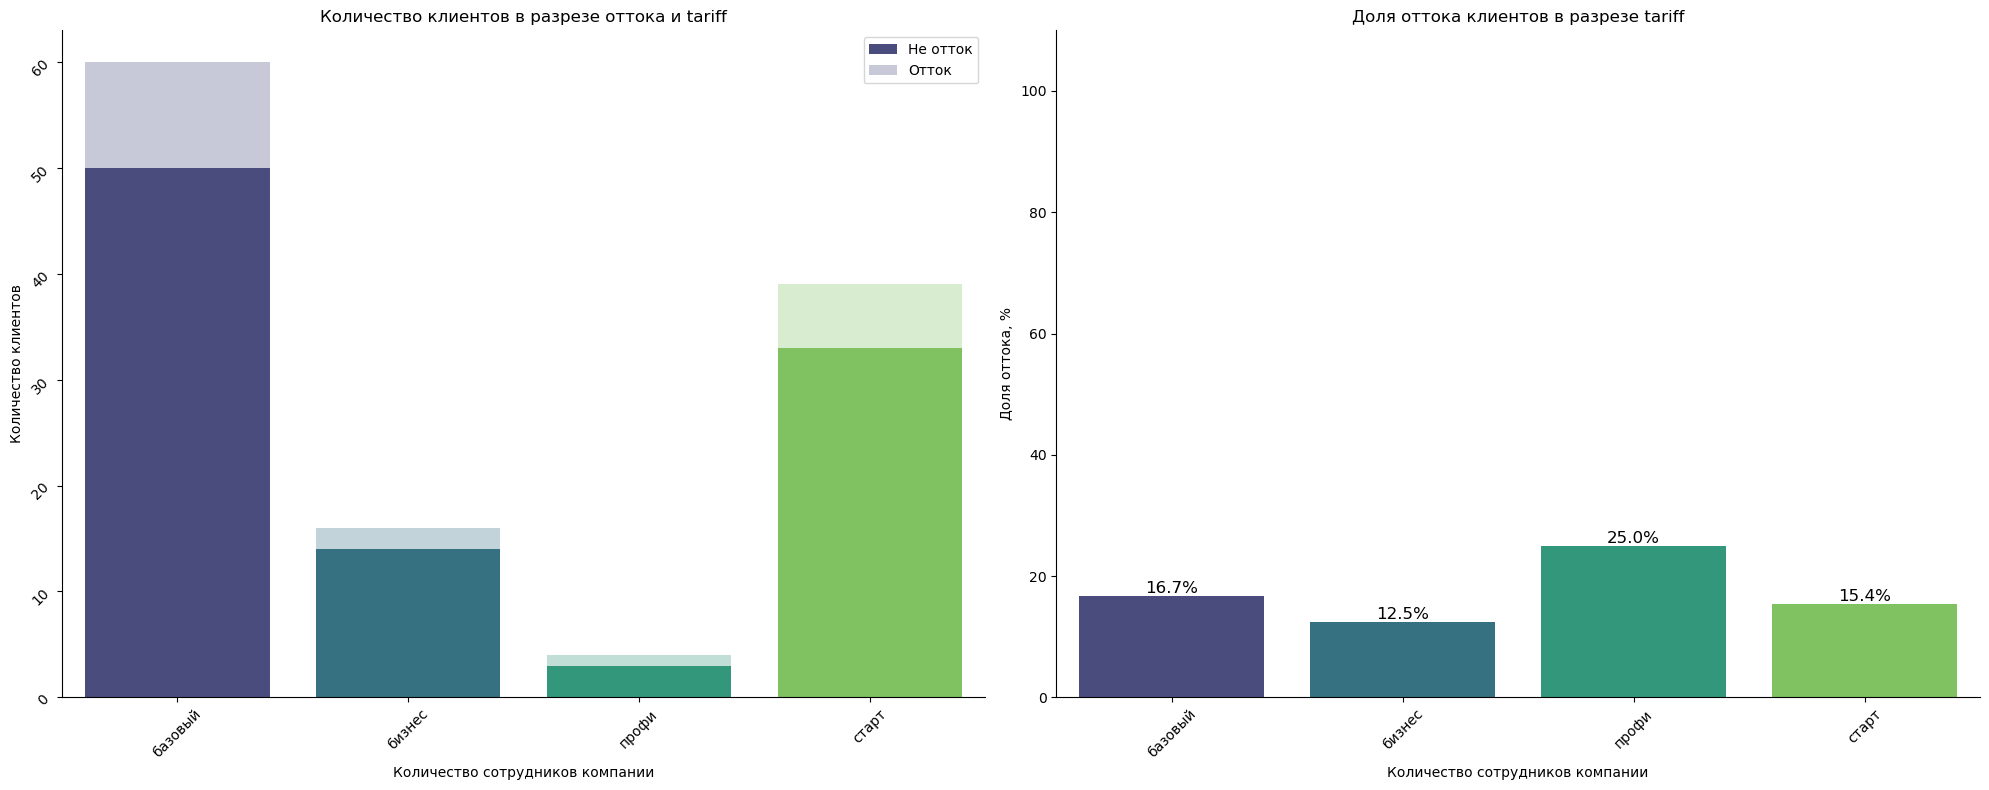

In [294]:
churn_viz(loyalty_clients_tariff, 'tariff')

In [295]:
loyalty_clients_work_category = calculate_churn_rate(loyalty_clients_table, 'working_category')
loyalty_clients_work_category

working_category  not_churn  churn  churn_rate
0             Без категории         85     15        15.0
1                    Дизайн          1      0         0.0
2        Инженерные cистемы          1      1        50.0
3  Отраслевое строительство         12      2        14.3
4          Ремонт и отделка          8      3        27.3
5             Строительство         24      3        11.1

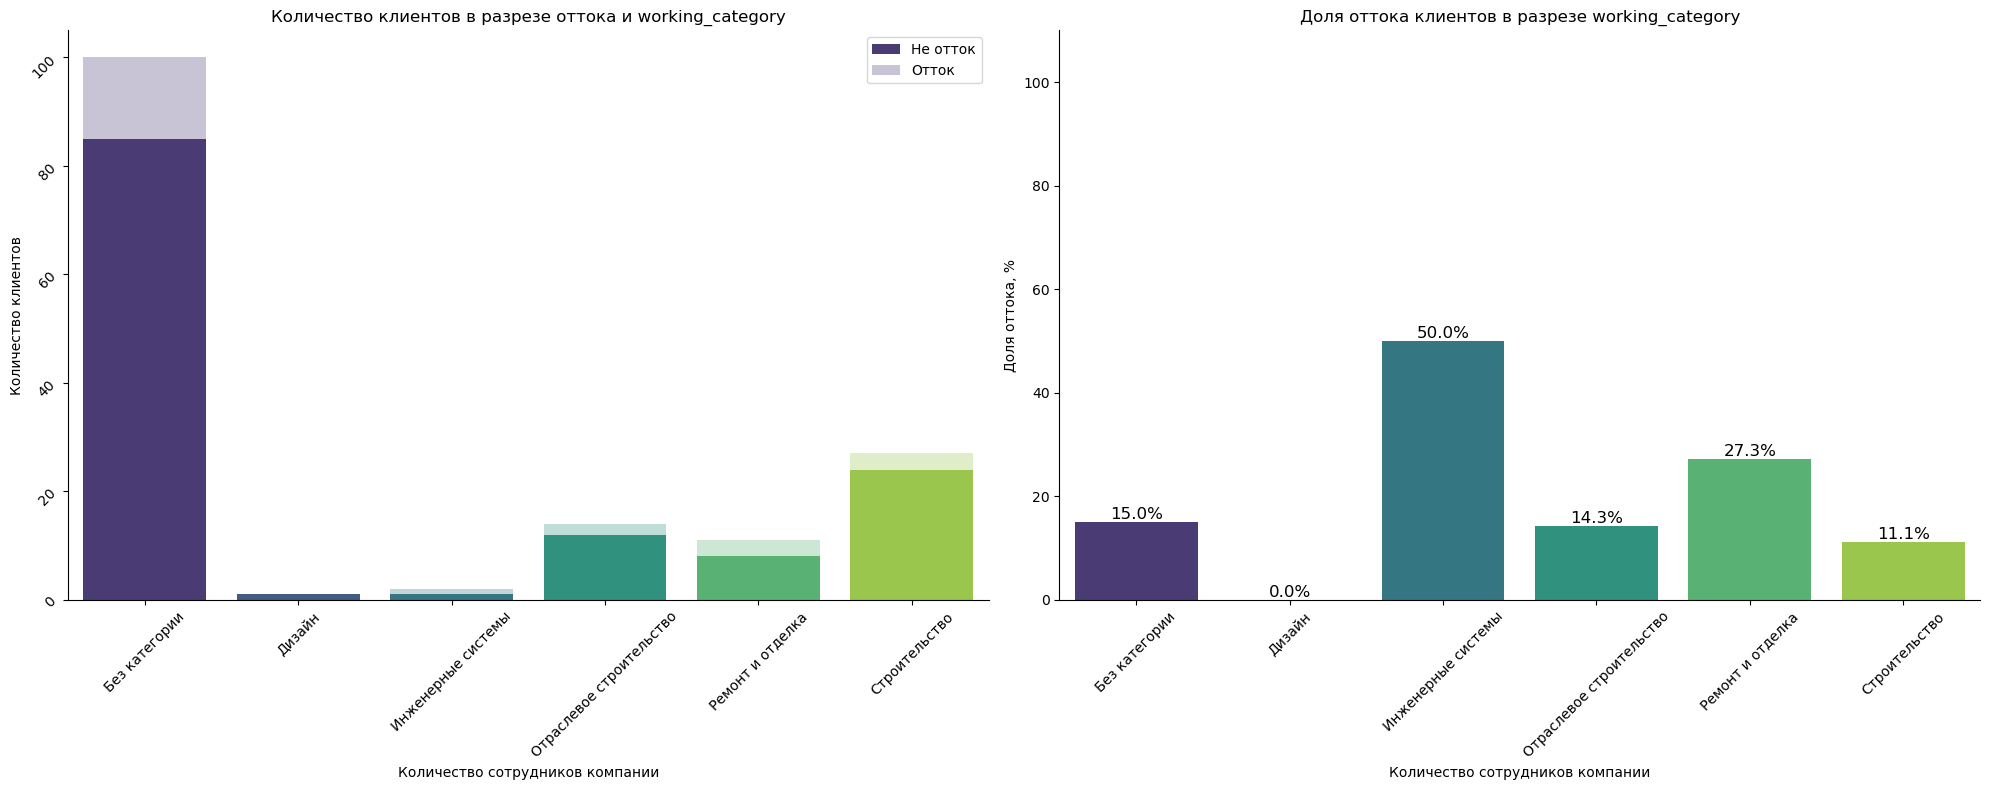

In [296]:
churn_viz(loyalty_clients_work_category, 'working_category')

In [297]:
loyalty_clients_interval = calculate_churn_rate(loyalty_clients_table, 'employer_interval')
loyalty_clients_interval

employer_interval  not_churn  churn  churn_rate
0               1-4         84     15        15.2
1           101-200          1      0         0.0
2             11-20         11      2        15.4
3             21-30          4      0         0.0
4             31-50          2      0         0.0
5              5-10         27      7        20.6
6            51-100          1      0         0.0
7              >201          1      0         0.0

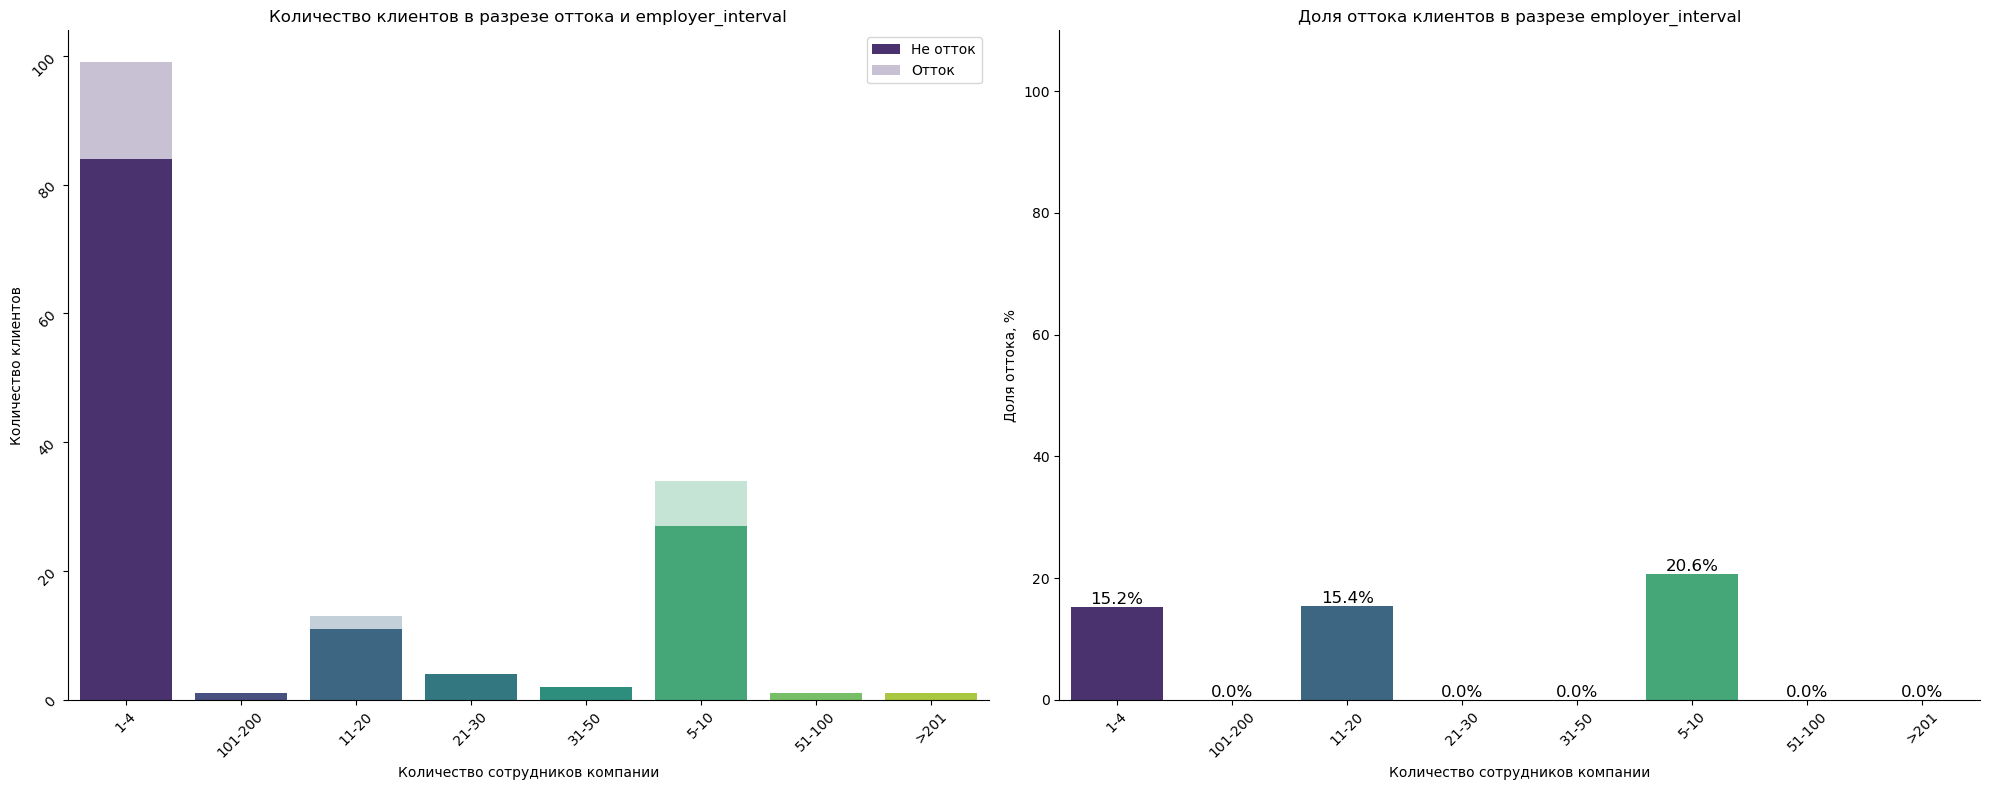

In [298]:
churn_viz(loyalty_clients_interval, 'employer_interval')

Среди лояльных компаний:
- самый высокий отток среди тех, кто пользуются тарифными группами "профи" и "старт", самый низкий - "бизнес";
- самый высокий отток среди тех, кто занимается инженерными работами и ремонтов, самый низкий в категории "строительство" или "отраслевое строительство";
- самый высокий отток среди компаний численностью до 20 человек.

In [299]:
# Клиенты находящиеся на пороге оттока
threshhold_clients = rf_data.query('R_quantile <= 2').sort_values('recency',ascending=False)
threshhold_clients_id = threshhold_clients['company_id'].unique()
threshhold_clients

company_id  recency  frequency  R_quantile  F_quantile  RF
159        2310   1197.0          1           1           1  11
53          905   1197.0          1           1           1  11
37          694   1196.0          1           1           1  11
163        2353   1185.0          1           1           1  11
184        2620   1169.0          1           1           1  11
..          ...      ...        ...         ...         ...  ..
157        2298      NaN          1           1           1  11
162        2348      NaN          1           1           1  11
164        2354      NaN          1           1           1  11
169        2441      NaN          1           1           1  11
172        2463      NaN          1           1           1  11

[405 rows x 6 columns]

In [300]:
threshhold_clients_table = (all_data.query('company_id in @threshhold_clients_id')
                         .groupby(['company_id', 'churn'])
                         .agg({'tariff': lambda x: ', '.join(x.unique()),
                               'working_category': lambda x: ', '.join(x.unique()),
                               'employer_interval': lambda x: ', '.join(x.unique())})
                         .reset_index())
threshhold_clients_table

company_id  churn          tariff    working_category employer_interval
0             1      1           профи       Строительство             11-20
1            30      1    старт, профи    Ремонт и отделка               1-4
2           116      1  старт, базовый  Инженерные cистемы               1-4
3           218      1           старт       Строительство              5-10
4           257      1  старт, базовый       Строительство             11-20
..          ...    ...             ...                 ...               ...
400        5916      1  старт, базовый       Строительство              5-10
401        5935      1         базовый  Инженерные cистемы               1-4
402        5961      1         базовый       Строительство              5-10
403        6031      1           старт       Без категории               1-4
404        6110      1         базовый       Без категории               1-4

[405 rows x 5 columns]

In [301]:
threshhold_clients_tariff = calculate_churn_rate(threshhold_clients_table\
                                              .query('tariff in ["базовый", "старт", "бизнес", "профи"]'), 'tariff')
threshhold_clients_tariff

tariff  not_churn  churn  churn_rate
0  базовый          7    129        94.9
1   бизнес          4     14        77.8
2    профи          0     10       100.0
3    старт          8    165        95.4

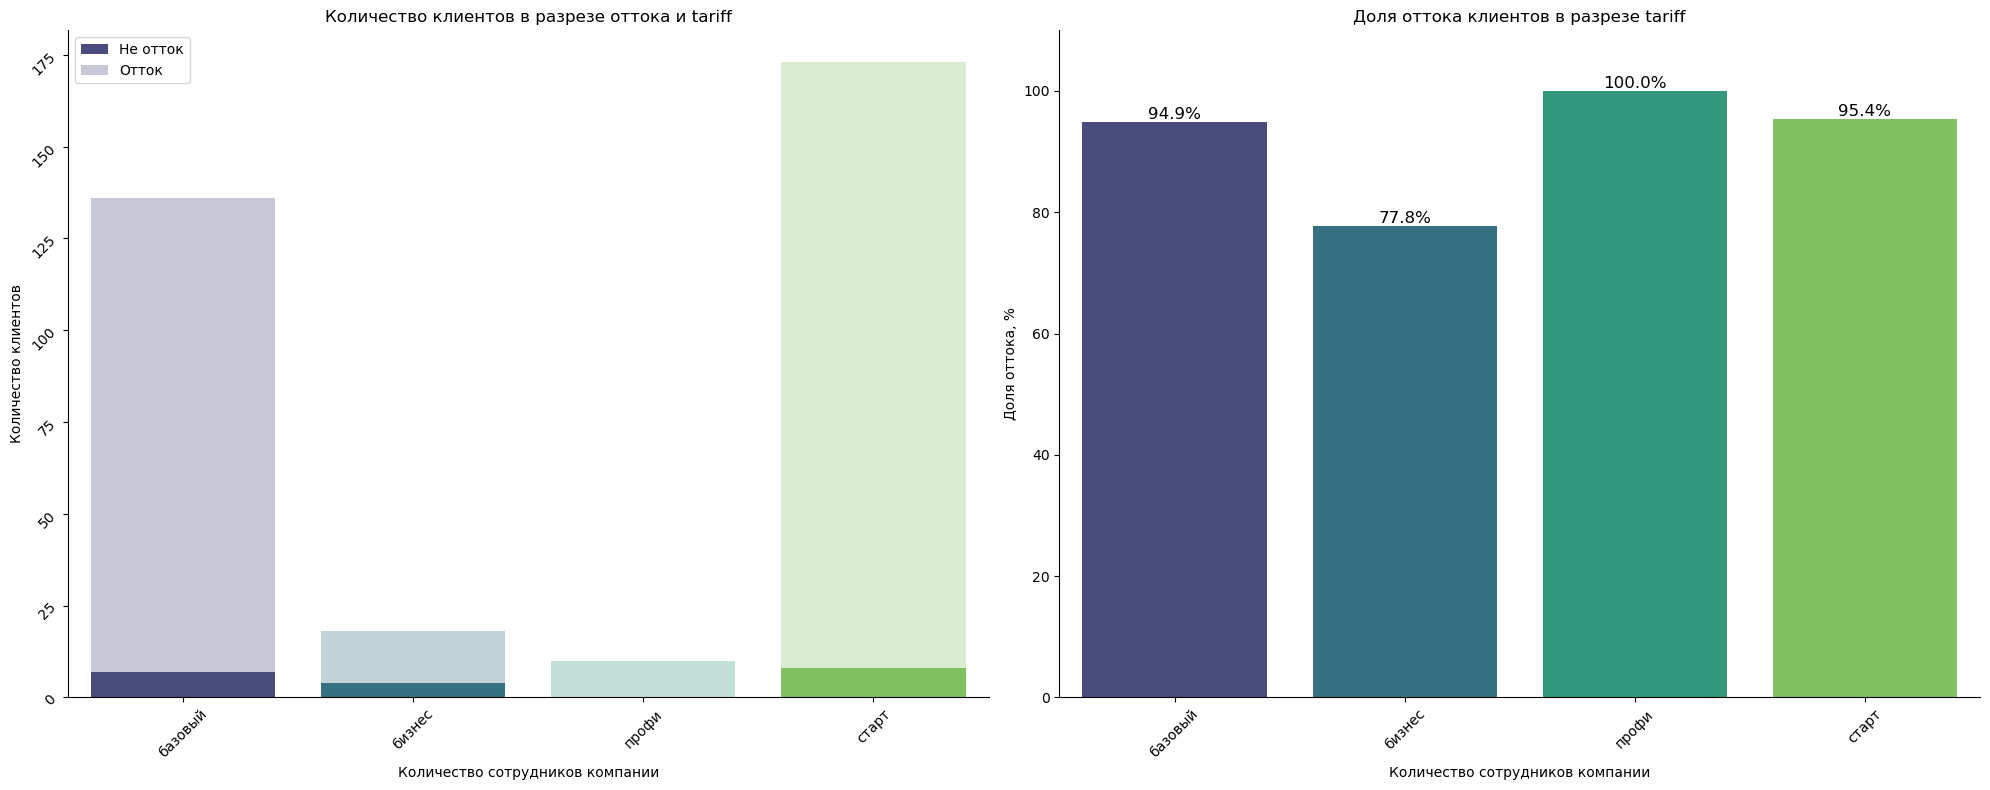

In [302]:
churn_viz(threshhold_clients_tariff, 'tariff')

In [303]:
threshhold_clients_work_category = calculate_churn_rate(threshhold_clients_table, 'working_category')
threshhold_clients_work_category

working_category  not_churn  churn  churn_rate
0             Без категории         17    251        93.7
1               Девелопмент          0      3       100.0
2                    Дизайн          0      2       100.0
3                    Другое          0      4       100.0
4        Инженерные cистемы          3     18        85.7
5  Отраслевое строительство          1     23        95.8
6          Ремонт и отделка          3     25        89.3
7             Строительство          2     53        96.4

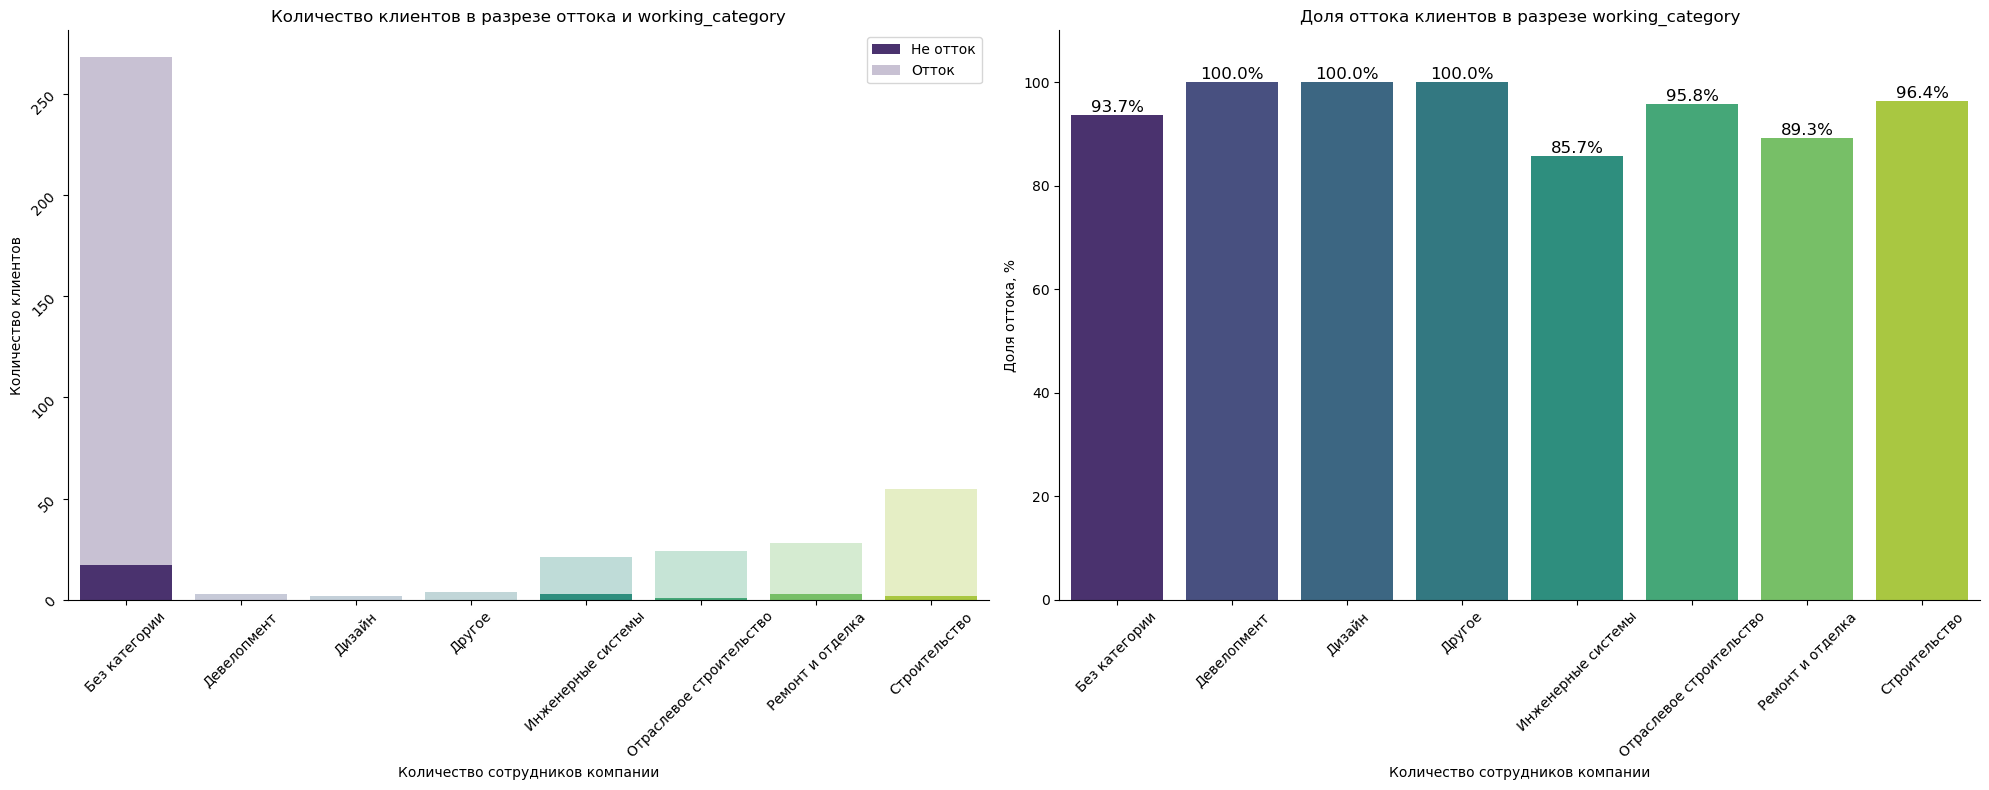

In [304]:
churn_viz(threshhold_clients_work_category, 'working_category')

In [305]:
threshhold_clients_interval = calculate_churn_rate(threshhold_clients_table, 'employer_interval')
threshhold_clients_interval

employer_interval  not_churn  churn  churn_rate
0               1-4         19    277        93.6
1             11-20          3     21        87.5
2             21-30          0      8       100.0
3             31-50          0      3       100.0
4              5-10          4     68        94.4
5            51-100          0      1       100.0
6              >201          0      1       100.0

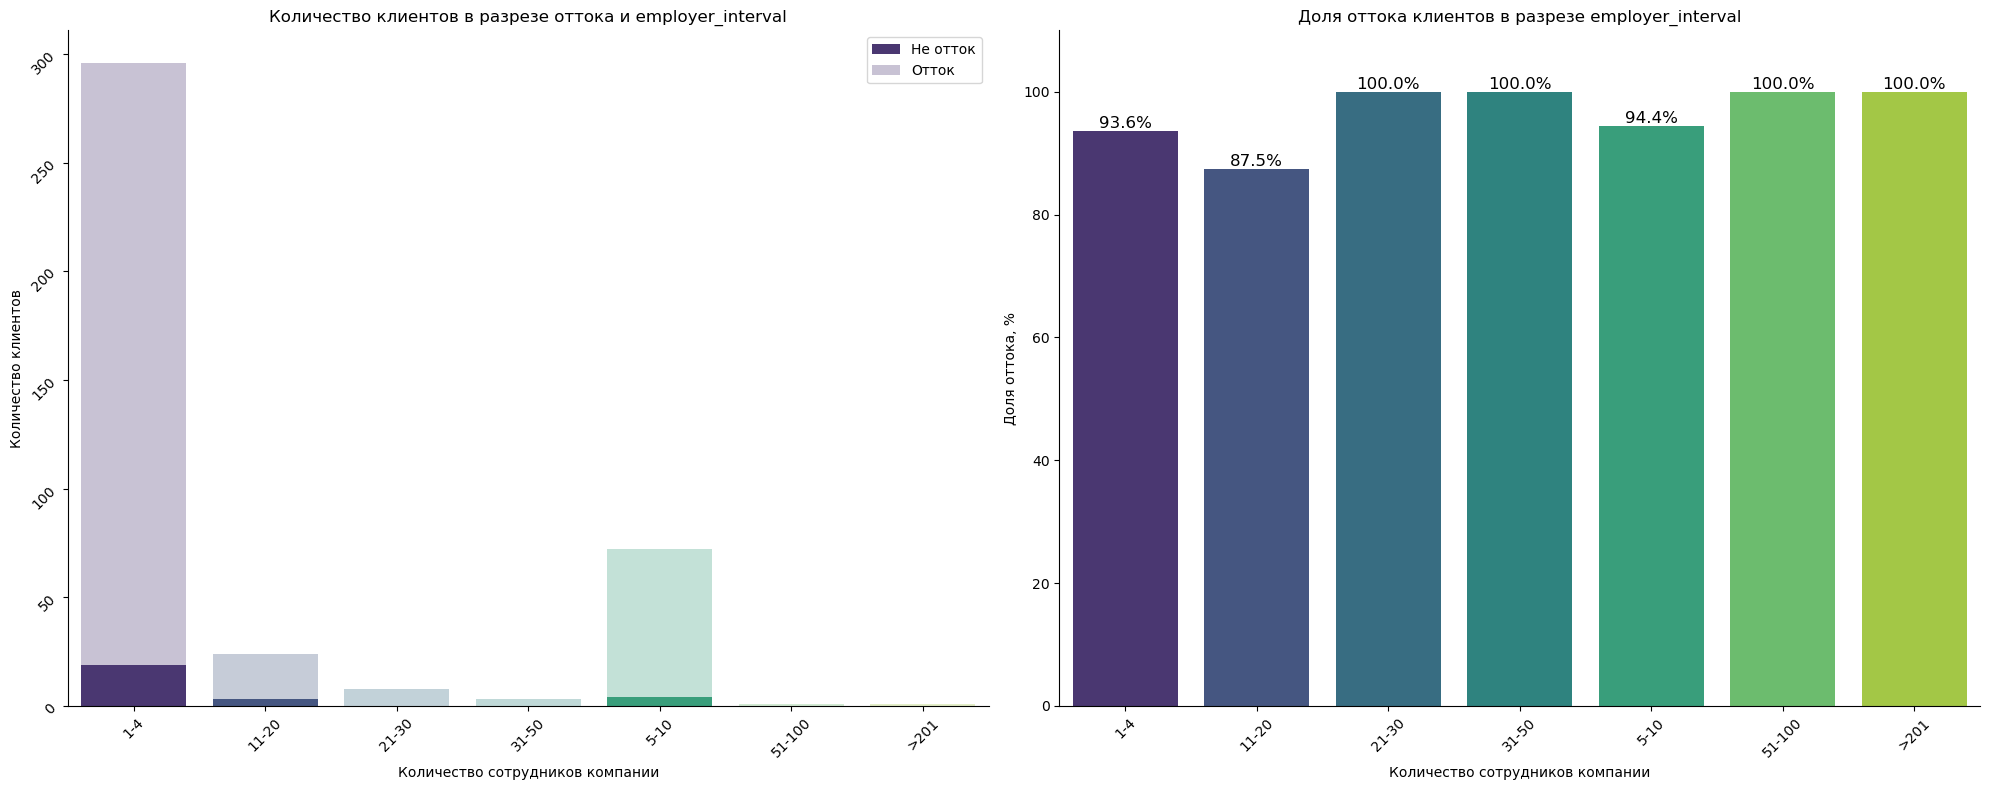

In [306]:
churn_viz(threshhold_clients_interval, 'employer_interval')

Среди компаний, находящихся на пороге оттока:
- самый высокий отток среди тех, кто пользуются тарифными группами "профи", самый низкие - "бизнес";
- самый высокий отток среди тех, кто занимается отраслевым строительством, самый низкий в категории "инженерными работами";
- самый высокий отток среди компаний численностью до 20 человек.

<a id="26"></a>
## Общий вывод

Мы проанализировали данные облачного сервиса для автоматизации управления строительством и ремонтом с целью составления портрета наиболее типичных клиентов, поиска причин оттока клиентов и решений по их минимизации.

***Исследование состояло из следующих этапов:***

- ***Загрузка и базовый анализ данных:***
  - прочитали файлы с данными;
  - вывели и изучили общую информацию о них
  - проверили данные на пропуски. Проупски обнаружены в датасетах billing, companies, people.
  
- ***Предобработка данных:***
  - В рамках этапа предобработки данных были сделаны следующие изменения:
  - датасет activities:
    - был изменен тип данных в столбце month на datetime, в столбцах company-month-billing, company-month-stocks, company-month-backups, company-month-projects, company-month-contractors, company-month-resource_orders на integer;
    - названия столбцов приведены к единой стилистике;
    - данные проверены на явные и неявные дубликаты. Дубликаты не обнаружены.
    - изучены уникальные значения в столбцах;
    - добавлен столбец year с выделенным из даты годом;
    - потенциально наиболее полезные столбцы: company_id, month, company_month_billing, company_month_projects;
    - потенциально наименее полезные столбцы: company_month_backups (кто-то делал каждый день, даже при отсутствии проектов, кто-то не делал вообще).
  - датасет billing:
    - yдалены столбцы 'Unnamed: 0' и 'id';
    - данные проверены на пропуски. В столбцах comment и pay_date обнаружено большое количество пропусков (78.6% и 68.2% соответственно);
    - проведен корреляционный анализ данных на предмет поиска зависимостей между признаками и пропущенными значениями с помощью phik_matrix:
      - пропуски в столбце comment имеют весьма высокую корреляцию с такими признаками как id, payed_until, craeted_at, updated_at, billing_tariff_price_id и заметную с признаком is_payed. Эти пропуски явно можно отнести к категории MAR. Пропуски скорее всего зависят от статуса оплаты очередной подписки. Комментарий вносится в случае поступления оплаты или необходимости зафиксировать каки-либо договоренности, но сам пропуск на другие признаки не влияет. Поставлена заглушка;
      - пропуски в столбце pay_date имеют весьма высокую корреляцию с такими признаками как id, user_id, company_id, billing_tariff_id, payed_until, created_at, updated_at, billing_tariff_price_id. Эти пропуски также можно отнести к категории MAR. В случае, если счет оплачен, но в столбце payed_id информация не зафиксирована, это может вызвать проблему с доступом к аккаунту, например. Но пропуски скорее всего зависят от факта оплаты компанией очередной подписки, чем от какого-то умышленного сокрытия информации. Если заполнение данных об оплате происходит автоматически, то пропуск означает, что оплаты нет. Если вручную, то возможны варианты, могли не успеть внести, могли случайно пропустить, ну или опять же оплаты нет. Оставили пропуски без изменений.
    - был изменен тип данных в столбцах payed_until, created_at, updated_at, pay_date на datetime, в столбцах is_payed, billing_tariff_price_id на integer;
    - данные проверены на явные и неявные дубликаты. Обнаружен и удален один неявный дубликат;
    - изучены уникальные значения в столбцах. По результатам изучения записей в столбце comment можно сделать следующие выводы:
      - можно опатить счет, но активировать тариф по запросу;
      - с компаниями идет постоянная работа, поддерживается связь, видимо, происходит обзвон должников и сервис довольно лояльно относится к небольшим задержкам в оплате;
      - при необходимости возможен перерасчет и возврат денежных средств;
      - бонусы в виде дополнительного бесплатного периода, например, за видео-кейс (явно какие-то маркетинговые акции);
      - бывают скидки;
      - доступ могут заблокировать при невыполнении каких-то обязательных условий пользования сервисом;
      - тариф можно заморозить по запросу;
      - можно оплачивать тариф частями;
      - есть пробный 7-дневный базовый тариф;
      - тариф можно поменять уже после оплаты с доплатой и без доплаты (по какой-то личной договоренности с сотрудником компании);
      - компенсация недопонимания между клиентом и службой поддержки в виде бонусных месяцев;
      - можно перенести доступ на другую компанию по запросу и т.д.
    - добавлены столбцы tariff (тарифная группа) и tariff_price (цена тарифа);
    - потенциально наиболее полезные столбцы: company_id, tariff, billing_tariff_id, billing_price_tariff_id, payed_until, pay_date;
    - потенциально наименее полезные столбцы: user_id, is_payed (не является достоверным фактом оплаты услуги), updated_at (назначение столбца неясно);
  - датасет companies:
    - данные проверены на пропуски. В столбце working_direction 3 пропуска и 7 пропусков в billing_tariff_id;
    - проведен корреляционный анализ данных на предмет поиска зависимостей между признаками и пропущенными значениями с помощью phik_matrix:
      - пропуски в столбце working_direction имеют заметную и высокую корреляцию с created_at (54%), employer_count_interval (71%). Вероятно, эти пропуски из категории MAR, сфера деятельности зависит от того, насколько компания крупная по численности сотрудников. Возможно, мелкие компании не знали, как определить сферу деятельности. В любом случае, пропусков слишком мало, чтобы делать какие-то выводы. В данном стобце, в целом по данным, либо определена сфера деятельности, либо стоит прочерк (дефис), поэтому заполним пропуски дефисами;
      - пропуски в столбце billing_tariff_id не показывают сколько-нибудь заметных корреляций с другими данными, скорее всего это случайные пропуски. После проверки id компаний из строк с этими пропусками выяснилось, что 6 из 7 этих компаний присутствуют только в датасете people, пользователей c id этих компаний также нет нигде. Были удалены 7 строк с пропусками.
    - определили, что столбец company_id в датасетах является первичным ключом в случае объединия датасетов;
    - был изменен тип данных в столбцах created_at, updated_at на datetime,  в столбцах billing_is_over, employer_count_interval, billing_tariff_id на integer;
    - данные проверены на явные и неявные дубликаты. Дубликаты не обнаружены;
    - изучены уникальные значения в столбцах. В столбце workind_direction были исправлены орфографические и пунктуационные ошибки, что позволило сократить количество уникальных значений со 169 до 140;
    - добавлен столбец employer_interval с интервалом количества сотрудников, столбец working_category с категорией деятельности компании;
    - потенциально наиболее полезные столбцы: company_id, working_category, employer_interval, created_at, billing_tariff_id;
    - потенциально наименее полезные столбцы: billing_is_over.  
  - датасет people:
    - удален столбец 'id';
    - данные проверены на пропуски. В столбце user_id 25.2% пропусков, в deleted_at - 57.2% пропусков;
    - проведен корреляционный анализ данных на предмет поиска зависимостей между признаками и пропущенными значениями с помощью phik_matrix:
      - по обоим столбцам user_id и deleted_at обнаружен весьма высокий уровеь корелляции со всеми признаками кроме is_deleted. Столбецы user_id и deleted_at несут довольно важную информацию о том, кто представляет компанию на платформе. Поэтому я бы отнесла данные пропуски к категории MAR или даже MNAR. Оставила пропуски без изменений.
    - был изменен тип данных в столбцах created_at, updated_at, deleted_at на datetime, в столбцах is_deleted, user_id на integer;
    - данные проверены на явные и неявные дубликаты. Явные дубликаты не обнаружены. Обнаружено и удалено 7 строк с неявными дубликатами;
    - изучены уникальные значения в столбцах;
    - выяснили, что role_id = 1 есть у каждой уникальной компании. Остановлись на мысли, что 1 - это главный представитель клиента/владелец/директор/главный бухгалтер/человек, уполномоченный принимать решения. Также понятно, что нумерация идет не по порядку, есть пробелы. Возникла мысль, что эти id могут быть id ролей, выгруженных из какой-то другой системы, например, "Общероссийского классификатора профессий рабочих, должностей служащих и тарифных разрядов (ОКПДТР)" или "Национального реестра специалистовв области строительства"(https://nrs.nostroy.ru);
    - считаю, что данный датасет наименее полезен для нашего анализа. Максимум, что мы можем получить из него, это количество представителей компании, которые менялись на платформе и возможно, как-то связать их role_id c оттоком.
  
  - в результате предобработки было удалено 0.06% данных из датасета billing, 0.97% данных из датасета companies, 0.26%  данных из датасета people.

- ***Исследовательский анализ данных:***
  - В рамках этапа исследовательского анализа данных:
   - подготовили целевую переменную churn (отток) в датасете billing;
   - выявили, что датасет billing содержит 1125 уникальных company_id, не представленных в других датасетах. Поэтому мы разделили billing на две части: matching_billing (где company_id совпадают с другими датасетами) и non_matching_billing (где не совпадают);
   - сгруппировали датасет activities и people по уникальному номеру компаний;
   - объединили датасеты activities_grouped, matching_billing, companies и присоединили к полученному датасету all_data стобец role_id из датасета people_grouped;
   - проверили датасет all_data на пропуски, ожидаемо обнаружили их в столбцах role_id, pay_date. Оставили их без изменений;
   - выделили в отдельный датасет left_clients ушедшие компании. Количество уникальных значений company_id - 318;
   - проанализировали числовые признаки датасетов left_clients и all_data:
     - left_clients:
       - month_billing: медианное значение в районе 3-4 счетов за весь период присутствия компании в сервисе;
       - month_stocks: по медиане около 20, по среднему значению - около 80 за весь период;
       - month_backups: от 0 по медиане, до 10 посреднему значению за весь период;
       - month_projects: 10-15 по медиане, около 80 по среднему значению за весь период;
       - month_contractors: примерно 20 по медиане, около 55 по среднему значению за весь период;
       - month_resource_orders: от 0 по медиане до 20-30 по среднему значению за весь период;
       - в tariff_id у нас лидируют 2 (базовый) и 7, 4 (стартовые), в среднем 4ый встречается чаще всего;
       - payed_until: похоже, что много компаний ушли поздней осенью 2020 года, в июле-августе 2021 года, в мае-июне 2022 года, возможно, это связано пандемией Covid-19 и с политическими событиями;
       - b_created_at: больше всего счетов за услуги среди ушедших клиентов выставлялось в апреле-мае 2021 года. Этот период связан с массовой вакцинацией от Covid-19, люди стали выходить в оффлайн, число заказов на ремонтно-строительные работы могло вырасти;
       - tariff_price_id: лидируют судя по всему 7, 13, 23 id тарифов;
       - pay_date: пик оплат - апрель-май 2021 года;
       - tariff_price: судя по распределению цен лидируют стартовый или базовый тарифы в зависимости от даты;
       - last_date: видим три пика оттока по датам: осень 2021 года, осень 2022 года и начало лета 2023 года. Строительство, ремонты - область, сильно зависящая от сезонности. Лето - пик активности, возможно, к осени активность снижается, клиенты уходят. Отток летом 2023 года скорее всего связан с возможными снижениями темпов развития строительной отрасли в связи с экономической ситуацией в стране;
       - r_score: мы видим несколько пиков lifetime компаний: около года, чуть более 1.5 лет, затем около 3хлет;
       - c_created_at: в среднем, основная масса ушедших компаний регистрировалась весной-летом 2020 года. Снова вспоминается Covid-19 и изоляция. В этом случае облачный сервис был хорошим решением, чтобы организовать отчетность с удаленным доступом;
       - с_updated_at: пик апдейтов приходится на декабрь 2022 года, может быть начало 2023 года. Вероятно, сервис решил провести ревизию клиентов и актуализировать о них информацию.
     - all_data:
       - month_billing: медианное значение в районе 3-4 счетов за весь период присутствия компании в сервисе;
       - month_stocks: по медиане около 20, по среднему значению - около 125 за весь период;
       - month_backups: от 0 по медиане, до 20 по среднему значению за весь период;
       - month_projects: 15-20 по медиане, около 130 по среднему значению за весь период;
       - month_contractors: примерно 30 по медиане, около 90 по среднему значению за весь период;
       - month_resource_orders: от 0 по медиане до 100 примерно по среднему значению;
       - в tariff_id у нас лидируют 2 (базовый) и 7, 4 (стартовые), 10 (профи) почти догнал 4;
       - payed_until: похоже, что много компаний ушли зимой 2021, весной-летом 2022 и в конце 2023 года;
       - b_created_at: больше всего счетов за услуги среди ушедших клиентов выставлялось в апреле-мае 2021 года, зимой и летом 2022 года. Возможно, у сервиса конец года - это отчетный период, а весна-лето это сезонное время для строительных работ, количество проектов у клиентов увеличивается, соответственно, поток клиентов тоже растет;
       - tariff_price_id: лидируют судя по всему 9, 23-25 id тарифов;
       - pay_date: распределение по пикам в принципе совпадает с датами выставления счетов за оплату сервиса;
       - tariff_price: судя по распределению цен лидируют стартовый или базовый тарифы в зависимости от даты;
       - last_date: у части клиентов сервис оплачен до середины 2024 года, затем мы видим пик оплат до весны 2025 года, и более редкие случаи с оплатами до 2026 года и далее;
       - r_score: в среднем, разница между датой начала проекта и датой окончания подписки проходило около года или около 1.5 лет. Более длинные периоды - это уже аномалии. Но есть и компании, lifetime которых менее 100 дней. Вероятно, после некоторого тестого периода их что-то не устроило;
       - churn: оставшихся немногим больше ушедших, разница не выглядит значительной;
       - R: категория 1 - ушедшие, категория 3 - оставшиеся, их меньше;
       - c_created_at: основная масса компаний регистрировалась весной-летом 2021 года. Думаю, тут определенно есть влияние пандемии Covid-19;
       - с_updated_at: пик апдейтов приходится на декабрь 2022 года, может быть начало 2023 года. Вероятно, сервис решил провести ревизию клиентов и актуализировать о них информацию.
       - по данным столбца с разницей в дате окончания подписки и датой начала нашего проекта создается впечатление, что очень много компании - "однодневок", пришли, возможно, подключили пробный период, посмотрели и сразу ушли. Возможно, скорее всего их не устроил функционал платформы, показался недостаточным или, наоборот, избыточным;
   - изучили средние значения по признакам в разрезе оттока:
     - средние значения user_id, company_id растут от ушедщих к оставшимся. Это понятно, нумерация новых клиентов идет по порядку от 1 и выше (я надеюсь);
     - период ухода компаний плюс-минус 1.5-2 года от даты старта исследовательского проекта;
     - по активностям компании ситуация следующая: все активности, кроме выставления счетов растут от ушедших к оставшимся, при чем средние по складам, контрагентам и заказу материалов выросли существенно у оставшихся, тогда как среднее количество счетов наоборот упало. Возникает гипотеза ухода: бизнес плохо развивается, нет проектов, сервис не нужен. Это похоже на правду, так как среди клиентов много маленьких компаний численностью до 4 человек;
     - средние значения тарифа у нас так и или иначе склоняются к стартовому;
     - tariff_price_id скорее всего растут аналогично принципу в столбцах user_id, company_id, role_id. Меняется цена тарифа, ей присваивают новый id выше по порядковому номеру;
     - цена тарифа также относится или к стартовому, или к базовому в зависимости от даты. Уже явно прослеживается факт, что чаще уходят компании с начальными тарифами;
     - вероятно, самый большой отток был в конце 2022 начале 2023 года, возможно, по причине апдейта данных самим сервисом;
     - многие компании приходили в сервис с осени 2020 года. Пандемия Covid-19 опять же? В офис ходить нельзя, удобный сервис в облаке закрывает много вопросов;
     - большинство ушедших компаний пользовалось стартовым тарифом, большинство оставшихся пользуется базовым.
   - проанализировали категориальные признаки датасетов left_clients и all_data:
     - tariff: самый высокий отток в тарифе "профи" (77.6%), затем "старт" (72.9%) и "базовый" (56.3%), брать в расчет тариф "архивный" мы сейчас не будет, там слишком мало данных. Самый низкий отток у тарифа "бизнес". Надо посмотреть на размеры выборки, но  могу предположить, что если "профи" от "бизнеса" отличается (кроме цены и количества пользователей) только VIP-поддеркой, то либо поддержка нужна не часто, либо качество оказываемых услуг не стоит того, чтобы за это переплачивать. Тоже и со стартовым, но в другую сторону. Можно немного доплатить и получить чуть более расширенный пакет "базовый";
     - working_category: в категориях "Девелопмент", "Другое" и "Дизайн" крайне мало значений, поэтому их не берем в расчет при анализе. Таким образом:
       - cамый высокий отток в категории "Ремонт и отделка" - 75.8%. Возможно, ремонтом занимаются небольшие компании, ИП, живут от проекта до проекта, не до таких сервисов;
       - далее, отток  в категории "Отраслевое строительство" - 66.4%. Сюда входит, например, строительство рыбоводных ферм, домов из кедра, детских площадок и т.д. То есть область сама по себе довольно узкая. И отток клиентов может быть связан не с самим сервисом, а отсутствием заказов у клиента;
       - категория "Инженерные работы" - 64.5%. Тоже область сужена (электрика, монтаж фасадов, остекление, водопровод). Я, как заказчик строительных работ, при глобальном ремонте предпочла бы услугу под ключ, а не поиск 10 разных подрядчиков.
       - в категории "Строительство" отток тоже не низкий - 61.3%;
       - категория "Без категории", к сожалению, вряд ли поможет нам выявить причины оттока. Могу только предположить, что клиент, не заполнивший профиль до конца не выглядит серьезно настроенным на работу. Или его деятельность может быть настолько неспециализированной, он занимается всем подряд, что тоже не приносит стабильности.
     - employer_interval: чаще всего уходят компании численностью от 21 до 30 человек (71.8%), затем 1-4 (65.7%), на третьем месте 5-10 человек (63.4%). Самые стабильные компании от 51 до 100 человек (28.6%) и от 101 до 200 человек (25%). Возможно, чем меньше компания, тем сложнее ей выжить в конкурентной среде, обеспечить постоянный приток заказов, иначе оплата такого рода сервиса является ненужной тратой денег. Да и объемы работы может не те, таблички в MS Excel для их отчетности достаточно может быть. У очень крупных компаний >200 человек отток уже снова растет (53.3%);
     - R: компании с рейтингом 3 пока ожидаемо не ушли.
     - если рассматривать причины, не связанные с сервисом, могу предположить, что на отток могут влиять отсутствие проектов в связи с такими факторами, как высокая конкуренция, сезонность, Covid-19, отток людей из страны в связи с политическими и экономическими событиями, что снизило спрос на услуги, уменьшило возможное количество небольших проектов и др.
   - провели корреляционный анализ наших смешанных по типам данных с помощью матрицы Phik:
     - выявили следующие корреляции с нашей целевой переменной (отток):
       - payed_until - 91%;
       - pay_date - 77%;
       - user_id - 69%;
       - c_updated_at - 71%;
       - c_created_at - 69%;
       - month_project - 69%;
       - month_contractors - 64%;
       - company_id - 66%;
       - month_stocks - 63%;
       - month_resource_orders - 61%;
       - b_created_at - 59%;
       - tariff_price_id - 45%;
       - month_backups - 38%;
       - month - 35%.

   - наиболее высокие корреляции мы видим с датой окончания подписки, датой оплаты, номером компании и пользователя, и датой создания профиля компании и апдейта информации о ней. Это логично, но, к сожалению, они нам не сильно помогут разобраться в причинах оттока.
   - подтвердились мои догадки о связи оттока со стоимостью услуги.
   - выявилась высокая корреляция с активностями компаний.
   - на мой взгляд, основными признаками оттока являются изменение цен на тарифы и размер компании, как следствие ее активность.
          
- ***Проверка гипотез и анализ признаков оттока:***
  - В рамках этапа анализа признаков оттока мы сделали следующие выводы:
   - составили портрет массовой компании_клиента:
     - среднее количество пользователей - 5 человек;
     - lifetime компании на платформе различается в зависимости от рабочих категорий и размера компании. Один из самых низких лайфтаймов у компаний в категории "Строительство" и с количеством человек 21-30. Самый высокий из крупных выборок у категорий "Отраслевоес строительство" и "Другое", с количеством человек более 200.;
     - платит по счетам в течении месяца стабильно (в 96.8%) случаев;
     - апдейты по компании происходят в среднем раз в год;
     - самая популярная тарифная группа - "старт";
     - самый популярный тариф - 2 ("базовый").
     - такой портрет получился вполне закономерно. Исходя из всего проделанного ранее анализа мы уже делали косвенные выводы, что основной клиент сервиса, скорее всего малый бизнес с небольшим количеством сотрудников. Так как ранее разница между стартовым и базовым тарифом была меньше, чем сейчас, люди выбирали чуть более дорогой тариф, но с большим функционалом, поэтому лидирует "базовый" тариф. Что касается lifetime, то мы также видели  некую волнообразную цикличность на графиках, когда шел сначала пик прихода в сервис, затем пик оттока и т.д.;
    - сформировали средующие гипотезы:
      - первая гипотеза: проверка гипотезы наличия зависимости уходов компаний от размера компании.
        - отток для компаний разного размера отличается. Самый высокий отток в группе "21-30", но она не самая крупная по размеру, далее идет группа "101-200", но в ее случае размер выборки еще меньше. Наша целевая аудитория по оттоку находится в группе с численностью "1-4" человека.
      - вторая гипотеза: проверка гипотезы наличия зависимости уходов компаний от тарифа.
        - одна из самых больших выборок с тарифом 2 ("базовый") имеет не самый высокий отток (56.7%), самая большая по величине выборка тарифной группы 7 ("старт") имеет отток выше (67.3%), далее 4 (тоже "старт") - очень высокий отток (92.2%). Замыкает наш лист по большим по размеру выборкам тариф 9 ("бизнес") - в нем отток один из самых низких (35.9%), если сравнивать именно размер выборки и отток. Также довольно высокий отток при небольших по размерам выборках мы видим на тарифе 11 ("старт") и тарифах 3 и 10 ("профи"), но на 13ом той же группы отток самый низкий (33.3%). Возможно, это связано с тем, что тариф обновился, и по новому id еще недостаточно информации, как и по 19, 20, 21 тарифам.
         - таким образом, мы видим что с тарифов группы "старт" и "базовый" уходят чаще всего. Причины могут быть следующие:
           - цена и условия тарифа: пользователи могут уходить из-за недовольства ценой или несоответствием цены и функционала. Но при этом совсем дешевый тариф также может не удовлетворять клиента, и если разница между ним и следующим по классу в цене небольшая, многие предпочтут купить более расширенный тариф немного доплатив;
           - качество услуг: если качество услуг или предоставляемая техническая поддержка VIP - класса на более дорогих тарифах не соответствуют ожиданиям пользователей, это может привести к уходу с этих тарифов;
           - конкурентная среда: возможно, на рынке существуют альтернативные тарифы от конкурентов, которые могут быть более привлекательными для пользователей. Это может привести к оттоку пользователей с текущих тарифов;
           - кампании и скидки: различные маркетинговые кампании и скидки могут оказывать влияние на решение пользователей о переходе на другие тарифы;
           - причины, независящие от услуг сервиса, такие как: нежизнеспособность компании клиента, отсутствие проектов.
      - проверили динамику ухода с разных тарифов по годам. Видим явную зависимость оттока от апгрейда тарифа. Насколько сильно отличаются новые версии тарифных планов от устаревших, мы не знаем. Возможно, сам сервис при следующей оплате меняет номер тарифа, а, возможно, этот вопрос все-таки согласовывается с компанией и, в случае, более интересного предложения в лице обновленного тарифного плана, компания совершает переход на новый.
      - третья гипотеза: проверка гипотезы наличия зависимости уходов от изменения цены на тариф.
        - изменение цены тарифа определенно влияет на отток компаний.
    - исследовали активности компаний:
      - суммарная активность компаний лежит в пределах 30 в месяц. Прослеживаются определенные периоды (середина года), когда мы видим рост активности. Летний период - отличное время для старта новых проектов, в том числе и в строительстве, особенно для крупного строительства и среднего строительства (рытье котлованов,  закладывание фундаментов домов и т.д.). В целом, мы видим ежегодный волнообразный рост активностей, который зафиксировался в районе 35 - 40 с 2022 по 2024 годы;
      - отток с течением времени у нас снижается. Стабильное снижение идет с 2021 года. Что же произошло? Covid-19 закончился опять же? Или качество сервиса сильно улучшилось?
      - мы видим довольно яркую картину зависимости оттока от некоторых активностей. Прослеживается некоторая зависимость оттока от количества счетов: чем их меньше, тем отток выше. Возможно, все-таки, возможность загрузки счетов есть не у всех тарифов, и уходят те, для кого наличие этой опции имеет значение. Далее, чем меньше арендованных складов, проектов, контрагентов, тем отток выше. Вероятно, отток меньше, у тех компаний, у кого бизнес идет активнее и есть стабильность. Но эта зависимость скорее непрямая. Компания не уходит из сервиса, потому что у нее хорошо идут дела, много данных уже внесено, переход на другую платформу всегда связан с лишней "головной болью" по переносу данных и затратами, поэтому работают с сервисом и дальше, ну или сервис, действительно, прекрасный для таких больших объемов строительства. Так что мы можем использовать активности компаний  по складам, проектам, контрагентам для прогноза скорого ухода. Особенно вкупе с данными по working_category и employer_interval;
      - четвертая гипотеза: проверка гипотезы наличия зависимости активности компаний от разных тарифов.
        - компании на разных тарифах проявляют разную активность. Самая большая разница в активности между тарифами "профи" и "старт", "бизнес" и "старт", "базовый" и "старт". Это довольно легко объяснимо: тариф "старт" выбирают в основном компании с небольшим количеством сотрудников, вероятно, с небольшими оборотами, тогда как более дорогие тарифы выбирают более крупные и стабильные компании с большим количеством проектов, контрагентов и заказов материалов. Отсюда и разница в активности.

- ***Дополнительное исследование:***
  - В ходе дополнительного исследования мы сделали следующие выводы:
   - датасете billing оказалось 1125 уникальных компаний, которых не оказалось в других датасетах, при чем у 189 компаний еще действует подписка на сервис. Вопрос к сервису: почему такая выгрузка данных?
   - проведена сегментация пользователей по частоте обращений и дате последнего обращения, выделены два сегмента:
     - лояльные компании:
       - самый высокий отток среди тех, кто пользуются тарифными группами "профи" и "старт", самый низкий - "бизнес";
       - самый высокий отток среди тех, кто занимается инженерными работами и ремонтом, самый низкий в категории "строительство" или "отраслевое строительство";
       - самый высокий отток среди компаний численностью до 20 человек
     - компании на пороге оттока:
       - самый высокий отток среди тех, кто пользуются тарифными группами "профи", самый низкие - "бизнес";
       - самый высокий отток среди тех, кто занимается отраслевым строительством, самый низкий в категории "инженерными работами";
       - самый высокий отток среди компаний численностью до 20 человек.

- **Рекомендации по минимизации оттока:**
  - прежде всего, судя по качеству данных, особенно в датасете billing, рекомендуется провести системный анализ для систематезации собственной отчетности. Необходимо разнести данные по дате оплаты (полная, частичная), апгрейдам (что именно апгрейдится), фиксировать сроки действия подписки по основному тарифу и бесплатные (льготные) добавочные периоды фиксировать отдельно и т.д.;
  - необходимо точечно работать с каждым клиентом, чтобы определить его потребности в функционале, исходя из его данных, и предлагать тот тип тарифа, который максимально подходит клиенту;
  - пересмотреть показатели системы KPI сотрудников отдела продаж (или разработать данную систему, если она отсутствует), чтобы замотивировать сотрудников более тщательно подпирать тип тарифа, тем самым можно снизить отток и недовольство клиентов, попавших из-за недопонимания не в свою целевую тарифную группу;
  - разработать акции и систему бонусов для компаний, представляющий малый бизнес, с небольшим количеством сотрудников до 4 человек, которых в сервисе большинство;
  - разработать программы для привлечения клиентов, интересующихся тарифом "бизнес", как перспективных с наименьшим оттоком;
  - выстроить четкую тарифную сетку, не должно быть личных договоренности между клиентом и сотрудниками отдела продаж о скидке. Скидки должны быть обоснованы и четко прописаны;
  - то же самое касается дополнительных бесплатных периодов, предоставленных по разным причинам. Если клиент недоволен, это не повод компенсировать его недовольство дополнительным месяцем присутствия в сервисе, это повод посмотреть на причину недовольства и найти решение;
  - повышение ценности сервиса: конкуренты не дремлют, необходимо постоянно совершенствовать сервис, добавлять новые функции, улучшать пользовательский интерфейс, предоставлять полезные инсайты или расширения списка поддерживаемых интеграций;
  - персонализация: можно использовать данные о клиентах, чтобы предлагать им персонализированный контент и рекомендации, соответствующие их потребностям и интересам. Это может включать в себя персонализированные отчеты, уведомления о событиях или рекомендации по оптимизации процессов. Снова вернемся к пункту о систематизации собственных данных сервиса;
  - улучшение обслуживания клиентов: при поиске в интернете встречаются негативные отзывы клиентов о качестве поддержки и обслуживания. Думаю, тут есть над чем поработать, тем более, что отток в категории тарифов с VIP-поддержкой высокий. Можно разработать систему обратной связи, чтобы понять причины оттока и предложить решения для удержания клиентов;
  - обучение: предоставление своим клиентам обучающих материалов, вебинаров и онлайн-курсов по использованию  сервиса поможет им получить максимальную пользу от сервиса и уменьшить вероятность оттока из-за неудовлетворенности результатами;
  - мониторинг и анализ данных: постоянный мониторинг данных о клиентах и анализ показатели оттока, позволит более эффективно и быстро выялять тенденции и проблемные области, принимать своевременные меры для удержания клиентов и улучшения сервиса.
  - непрерывное улучшение сервиса и внимание к потребностям клиентов помогут снизить отток и удержать клиентов на платформе.

[Возврат к описанию проекта](#toc)